In [236]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:

df = pd.read_csv('https://raw.githubusercontent.com/JeffSackmann/tennis_MatchChartingProject/master/charting-m-points.csv', encoding = "ISO-8859-1", dtype='unicode')


In [238]:
tennis_serve_direction = {'4':'out wide', 
                   '5':'body',
                   '6':'down the T', 
                   '0':'unknown'
                  }
tennis_serve_faults = {'n':'net',
                'w':'wide',
                'd':'deep',
                'x':'both wide and deep',
                'g':'foot faults',
                'e':'unknown',
                '!':'shank',
                'V':'time violation',
                'c':'let',
                '+':'serve and volley',
                '*':'Ace',
                '#':'forced error',
                '@':'unforced error'
              }
tennis_shot_type = {
    'f':'forehand groundstroke',
    'b':'backhand groundstroke',
    'r':'forehand slice',
    's':'backhand slice',
    'v':'forehand volley',
    'z':'backhand volley',
    'o':'standard overhead/smash',
    'p':'"backhand" overhead/smash',
    'u':'forehand drop shot',
    'y':'backhand drop shot',
    'l':'forehand lob',
    'm':'backhand lob',
    'h':'forehand half-volley',
    'i':'backhand half-volley',
    'j':'forehand swinging volley',
    'k':'backhand swinging volley',
    't':'all trick shots, including behind-the-back, between-the-legs, and "tweeners."',
    'q':'any unknown shot',
    '*':'winner'

}
tennis_shot_direction = {
    '1':'to a right-hander''s forehand side or left-hander''s backhand side',
    '2':'down the middle of the court',
    '3':'to a right-hander''s backhand side or left-hander''s forehand side',
    '0':'unknown'
}
tennis_shot_depth = {
    '7':'within the service boxes',
    '8':'behind the service line, but closer to the service line than the baseline',
    '9':'closer to the baseline than the service line'
}
tennis_court_position = {
    '^':'Stop volleys/drop volleys',
    ';':'hits the net cord',
    '-':'shot took place at the net',
    '=':'shot took place at the baseline',
    '+':'approach'
}

In [239]:
df.head()

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,2ndIn,isAce,isUnret,isRallyWinner,isForced,isUnforced,isDouble,PtWinner,isSvrWinner,rallyCount
0,20211121-M-Tour_Finals-F-Daniil_Medvedev-Alexa...,1,0,0,0,0,0-0,1 (1),1,0,...,NaN,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,1,1,5
1,20211121-M-Tour_Finals-F-Daniil_Medvedev-Alexa...,2,0,0,0,0,15-0,1 (2),1,0,...,1,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,1,1,7
2,20211121-M-Tour_Finals-F-Daniil_Medvedev-Alexa...,3,0,0,0,0,30-0,1 (3),1,0,...,NaN,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,1,1,1
3,20211121-M-Tour_Finals-F-Daniil_Medvedev-Alexa...,4,0,0,0,0,40-0,1 (4),1,0,...,NaN,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,1,1,1
4,20211121-M-Tour_Finals-F-Daniil_Medvedev-Alexa...,5,0,0,1,0,0-0,2 (1),1,0,...,1,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,1,0,4


In [240]:
df.shape

(573103, 30)

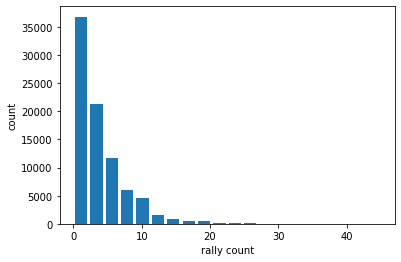

In [35]:
plt.hist(df1['rallyCount'].apply(np.int64) , bins=20, rwidth=0.8)
plt.xlabel("rally count")
plt.ylabel("count")
plt.show()

In [36]:
df1.match_id.describe()

count                                                 84201
unique                                                  476
top       20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer
freq                                                    436
Name: match_id, dtype: object

In [37]:
df1.Pts.describe()

count     84201
unique      109
top         0-0
freq      13511
Name: Pts, dtype: object

In [140]:
for i, j in df.iterrows():
    if len(j['1st']) > 10:
        print(j['1st'])

6b28f2b2b1f1d#
4f;18f2b1f1f1f1d@
6b37b3b3b3b3b3b3b1f2b1r2f-1*
6b19f2f;1f3s2f3b2f1f1f1f1f3b3b2f1f2b2d@
6f37b+3b1v1f3*
4b38f3s2f+3b1d#
c6f17f1f2b1f1f3s3n#
6f38b1f1f3b2s1f3b3b3f3b3f3b2f1f1f1f3b1f1f1f1f2b1d@
6b18f1f1f2f1f1f2b3b2b+3s2v1f1n#
4f28f1r2f1r1w#
6b28f2f1f1f1f2y1f3d#
4b27f+1f2n#
4f;27s+2m3o2f1f1f3d@
6f29f1f3s2f-1*
4f18f3b1f1f3s2u3s3*
4f18f3b3b+1f1*
4r28k+3m3d#
4b37b2b3b2y1r2f1*
6+s38o1l2o3*
6b28f+3b1v^1*
6b28b3b2f1f2f1f2b2b1f1f1f1f1d@
6f28f1f1f2b1r2f1f1f3b3b1f1f3b3b3s2f3s2f1f1f1f1f3d#
6b29b;1r2n#
4f28b2s2f1f3s3n#
6f18f3b2b2n@
4f28f3b3b3b1f1f1f1f3w@
6r27f+1l1d#
5f27f18f29b28s38s38s38s19f19f28f28b38b38w@
6f29f38b37b38b29f28f2f29b28b38b38b28f1d@
5b39f28b18f18f19f28f+38b1v17*
6b29f29f27f18f17f18f3n@
c6b38s38b37s38s38s19f18f17f19f28f18r27f+38b3n#
5b37y+27r-1n#
6f27f37b29f29b2n@
4b38f28f1n@
6b29f38b38b29f3n@
6b29b28f+18*
6b27f+39b1n#
6b39s28f+18l2o37*
6f29f38b28b37s18f18f28b38b3x@
5s27f+18f38*
6s18f+38b3z#
5s18f17f3n@
5b29f18f19f18f38b38b27f38*
6s39b38b39b39b+37s18f17f39s39b38f39b39f29f1

5+f2v38b1v^17*
6f28f+38b2n#
4f19f29b37b38b38b38b38b39b38b38b39b37b38b37b39b37b18f29b39b39b38s38b;38s19f18f29f19f28f38w@
5b27f38b38f38s18w#
4r28f38b38b39b38b38b28f18f18f18f18f17f38w@
4f28b28b38b28f18f;27f+19f3z3n#
4b38f28b29f3n@
6f39b38b39b39b38b38b39b38b39w@
5f38f18r1n#
5f27f39b29f38b19f18f39*
6f28b39b28b38f38b38f39b17f27f+38s2v^3n@
5f28f17f28f37b37f39b29f3n@
6f27f+39s1n#
4b37b38b37b+19r27f-38b18*
6b39b39b39b1d@
5b37f29f27f1d@
4f28f+38b2z19*
5b27f17f19f29f38b39f38b37f38b38b38b28b18f39b19f18f1d@
5b38b28f18f18f28b18w@
4f29f29b28f37b38f39b38b29f27f29f37b37b38b38b39b38s38f37s39f38b39f19w@
5b28f18f18f28b38b38b39b38b38f37b29f18f18f28b28b19f18f28b39w@
6b29f39b39f19*
6f29f18f29f18f29b;38b28f2k=+38b18*
6b38b29f38b38b3n@
6f27f39b37b39w@
6b28f28f29f17f18f29b38f38b28f18f17f19r27s+39m3o17f2o17f2v37s3z19*
4f28r28s39f29b38f38b18r29f28f17f38b38b38b39b39b29f18f18f29b28y37b-19*
6b29r27s38s39f39b29f18f18f29b29b29f38b38f39b29f27f+38b3x#
4f18f28b38f19r18f28b29f38f+37s2d#
5b29f37s38b18f28y;17*
5b38b38b28b28

4b38f19f1n#
4f29b38b37b38b39f39b28f19f3n#
5b38b38b37b28f29f18f18f28b27b28f18f38b28f39s39f38b38w@
4b18f18f29f29b39b3d@
6f29f38b38b39b29b18f2d@
4f29b+37m39f3d@
5b39b38b38b37s39f38s3n#
4b39f39b18f18f29b38b38f18f19f29b39b37b27u37y-37s-37w#
5f18f18f28f18f18f29s38b19*
4b37f38b3n#
4s28f+39b27f-28f38*
4r29f28f39b37f1n@
6b29f37b3n#
4b39f27f18f3n@
4f39b38f29r28f+39s19w#
6f29f37b29f37b37b2d@
6b19f17f29f28b39b37b39b39f28f18f19f18f2d@
4f27f+38b2v18r1v39b2v17*
4f29f39b29b39b2n@
4b38b39b38f19l27o37m1o=17l19o=2d@
6b29b27f17f39w@
6f38b39b38b38b38b3d@
4f29f28f27b38b37b38b39b39f38b+39b2z1n#
6b18f29b38b28f17f28b39b38b19w@
4r29f38b38b37b28f18f3d#
6b27b39b38b39b38b39b28f18f18f38b19w@
4f29b39b38w@
6f18f38b37b29b29f39*
4b39f38f38b38y37b-19l2d#
4b29f18f18f38b37s28f1n@
4f28f+39b2v^17l-39m3v37s3z19w@
5f28b18f18u37*
5b29f17f28u3n@
4b39f37b38f37b38b29f28b1d@
4+f27i^37s-18f1v37*
6f28f19f18f18f19w@
4f28f28b38b29f38s27f+18f1v37*
6f29f28f18f28b37b38f38b39b29f17f18f28f38b37b19w@
6b29b39b37b38b1n@
5b18f39s38f28f37b38s39

6b28b18f18f39m27o=17*
6b29b37s38b38b1n@
4b39b28f37b29f29f27b28b28f38w@
5f38b39b18f18f28b37s37y17*
5b28f39b38b18f18f28f28b38b29b29f29f28s39b27s38b3n@
4f19f39b37y17r-29m2o17*
6b27s39b38b29b38b39b38b19*
6f28f+18r1d#
4s38b18f18f19f3n@
6f28b19f2n#
6m29f27b38s39b38b29b1n@
5f39b17f19f18f3n@
6b29b39b38b19r28f+39b27b-2n#
4b37b+38s37b-38*
5f17r29f38b38f39*
6s29l38f28b19r27b+38b3z19l2o2n@
c6f27f+38s1v^17*
5b38b2b2b2b3b2f1f1f1f3n@
4f38b3b3b1f1f2f2b3w@
6f29b2f1f2b3b3b1n@
4b38f2f3b2f3b3n@
4b37b+1f2v3*
4f18f1f2f+2m2o1*
5b28b3s3f3b3f1f1f1f2b3s3f1f3b3b1*
4f28b2f2b3b3b3b2b3b2b1w@
4f18f1f3b2d#
6f28f2f+3b2zf2v1w@
6b37b3b1f3n@
c6f37b+3s2n#
5b17f+3b1w#
c6f29f1f1w@
6b28b2b2b1f2d@
4f27f+3b1n#
6f29f2f2b2b1f1f1f2b1f1f3w@
4b38b3f3b2d@
6f38b3b1f1f1f1f2d@
4b28f1f2b+3n@
4s38b1f1f2b1f2f3n@
4f18f1f2b3b3b3s1f1n#
5b27f+3s2v3w@
4b39b3b3b2f3b3b3b1f2f1f1f1f1f2b3b2f3b2f1r#
5f18f3b2f1f2f3b3b3b2b3b3b2f2f3b3b3f3s3f1f3k3d@
c6f27f1f2f2f1r1f3b2u3b1*
4f29b3b2f2f3b3w@
4f17f+3m2d#
6f37b+1f2n@
6b28f+3s1f1*
4b38f1f1f1f2d@
6f28f1f2f2b

6b29b27u+37s-37w#
4r28f+18f3z39*
4f28f+39m2o38m18w#
4r38f+38m2d#
4r29f39b18u+37s-3z18*
6f28f39f38f38s29f1n@
6b37s38u3n@
4r19f38b37f39b39f1n@
4b29f29f17f38s39w@
6r28f+38s1v17f2d#
6b39b29b38b29f18w@
6b;27b28f28f18f18f28b38b28b29b39b37f38b18w@
4b29f27f+18f2d#
4r18f+38b3z3t3n#
4f29f29f37b38b37b37s39f3n@
4b27f+39b2v19f3z28f+18*
6r37f19f28f37b38b39f39b37f29f19f2d@
6b27b38b38b28f39b!@
5r27f38f18f28f+37m1d#
6b27f38b39b37b28b29f28f39b27f+38b2v18*
6b27f18f29f17f3d@
5r27s39f19f1w#
5f38y37y-17*
4b38f39s2d#
6b17f19f2d#
6f28f18f18f28b28f38b37b38b39f28f19*
6f27u37s-19f2z^37m3v=27f-27f27f-38b3z29b18*
6b28f19f27f17r27f+39b3z29f17*
4r29f18f19f38f27f+18l19o=2n@
4b37b38s38f38b18f27f17r2n@
6r37s+39b1v^17r-1n#
6r39f38b29f18f28f29f28f29f17f18f39f18r28f+38s2n#
4b27f+19l2o37m2o3n@
4b29f38b2d@
5r28s+;37b18*
6r38b29f38b27f37b1n@
6b27f+38b1n#
4b38f19r27f+39b1n#
6f39b27s19f28b39s27u+37s-37*
6b27u17u-37m-39m2o17*
6b28f39b29f28f3d@
4b28f18r28f1x@
4f39b38b38b38b29f39b2n@
6r27f+19f37*
c4b38b19f27f+28b28f29f39b28f39b29

4f19f28f18b1n@
4b28f38f39f18s27f+18*
5r28f+38b2z1n#
6b27f19b29f28b19f27f39b19b19f2d#
5b29b28f18f1x@
6b39b27s38s18s38s3n@
c6+r37f-38b1z3n#
6f27f+28f2n#
6r28f18b28f38l2n#
6s28f18f3n#
6b29f38s2n#
6s29f18f17f17*
5b29f18b38s28f28f1n@
6s27f-18m28f28b28f17s39s18s18f17s29s19s28s29f28f29f28u37f-19l1o17*
4b29f19b27f+38f3n#
6b29f17b3d@
6b19b28f+;19b1x#
4r28f+18m19f29f28f18b28f+39*
6r29f18b19f19b27f38f29f18s19f18b3n@
6b28f19b29f1d@
6r27f+27b2n#
6b27f39b19b18f1d@
6b27f+19f1z39m19o=29f28b17f18b29b29f29b27f2d@
5f28f28b18s27f-19*
6r37b+39f1v^17m-19l2v37*
4s27f+39f37*
5s27f+18b2z37*
6r28f+38b2v^27r-17s-1v37*
6f29f17b1d@
6s29f39f2d#
5b29b28f17w@
6r27f+38b1n#
4s28f+39l2o37*
5r18f38b28b17f18f39s29f38s18b1n@
4+s27f-19f1z38m2o19f2n#
6b28u37s-38m39*
6f29b28f19f19f18f38s29b38s38b19f17f19f28b39*
6f29f28b39b27b3n@
6f27s39b29f39b2d@
4f28f39b29f18*
4f29f27f38b38s3d@
6f38b18f17f2d@
6f38b29f17f18f29b38b38b38s2d#
5r38b+37s17*
4b37b29f1d@
6b17u+27b-3x#
5b29f28f19f38s27f-18l28o=19r17u-27*
6b28b39b1n@
5f27f38b29f28s19f

4b18f2b+3s2d#
6f38b1r2f3b3f2f3s#
4f18f2f1r1d#
4b38b2f3b3b2f3w@
4f19f3b3b3b2f1f3f3*
6f38b3s3f1f1f3b2f1f1f1f;2f-3*
6b28f1r2f-3*
4f28b2b2f1C
4b37b3b2f1f3b2d@
4r29f2b3b1f1f2d#
6f28f2b3b3b1w@
4f28b2s3b3n@
5b28f1f1f1f1f3b2b2f3b3f3*
4b37f3b3b3b2f3b3b3b1f1f3n@
6f28f1f3b2n@
6b28b3b3b3b2f1r1f1f2b1r2f3b3b3f1f2f3*
5r17f+3b3z1n#
6f;27f2f2b1w@
6s28f1f2f3b3b3b3b3b1f1f1f;3s3f1*
4b38b39b38b28b28s39b38b1d@
6f29b28b38b29f37b39f38b39b39b38b1n@
4f28b+39b3d#
6b28b38s28b38b28f19f19f19f3d@
6f28f18r27b+38*
5f28f18f29f28f17r2n#
5b28b28b29f38b38b18w@
6b39b18f17f;39b38b18*
4b28f37b18w@
6b27f+39b3z3n#
5b29f19f38w#
5b29f18f28f18f19f39w@
4b28b18f28b28b19w@
4f27f+27s2z38*
6s27f+39b3z#
4f39b27b+18f3n#
6s29f38b27s39b38s38s39s39b38b39b18w@
6f38b38b18r18f+38b3z^37s-37*
4f19f28b38b2n@
4b37s38b29f17f17r18r39b18f19r28b+38s27f-19*
5f27f39b37b38s2d#
6b28b29b29f29f18w@
6s27u-17r-3d#
4b28f38b38b28f29f19f3n@
6b38b39b29f29f+39s3n#
4f29b+39b3z38w#
6b28f1f2f2f1f1f1*
6s27f+3b3z3d@
5b27f1f1f2b+3s1h1f3*
6f27f1f2f;3f1*
4b29f2f1f1f3s3b1

6f37f38b29f29f18b18w@
6b28f38b29f18f17b27f28f19r19b28b28f39s28s28s18s28f19w@
4q28u+17s-2z37*
4q29f27r39f18b18r18u37s-3n#
6b28f19f2d@
4q28f38b27f37s39r38u17b-1n#
6b29f38b29f28f38f38f38w@
4r37f-19m3p37*
6l39f28b29f39f18r17f-39m2v17*
6b17f28f38s28b18f28b28f18b28f18b38b28b39s29b38s39f38s28b28f28b19w@
4b28f17s29f17b18f18b39s18w@
6b27f29b28f28b38f2f39r27f-19s#
4f29f39f29f18b2n@
4q29f28b28f18b27f29f18f1d@
c5q17f17q29s+38r3z18*
6b29f38f18*
4q28f38r27f+38*
6r28f+18b18h#
4b28b28f38f37f1d@
5f28f29b18b28b29b28f18b18f18b18f+38r2v18*
4s29f+18m17o19b#
4f27f+17m1o28*
5+f2z39f1x#
4r29f37s39f38b1n@
4s28b18f38f38b39w@
6s29f37s19f28b29f37b28f19w@
4f29f39s29f38b2d@
4b28f18b19f18b29f19b1n@
6f27f-18b3d#
6r29f27f19f18b19f27f3n@
6r18f17b18f27f39b2n@
5f28s29f+37r37y-17*
4+s2z19f2n#
4b17f19b;27*
4f17y+37b-29*
6b28f39f37y37r-1w#
5s37r37f-37f19*
6s28f29b29f27f+18m19w#
6f28b18f2n@
c6b19r18b+3n@
4r17b+38b1n#
c6r2j=+17s2n#
6r28f+39f17h2z=38*
4s39f28f29b2n@
4s18b18f38w@
6b27f37b3n@
4b17f;18b+39s3v18*
4b39f18s17f-19b2z

6b29f39b38b39b38b39b29f;37b28f29f19f1x@
4b37f-19l27o27*
5f29f27b19*
4b28f+38m2o29b18w#
5f27f28f28f29q27f19q28b38y1n@
6b19f17f38*
4r28b+38s2z19f17*
6f27f+17f2v38m39f3z18f18w#
6b2f+2l2o3*
5f2f2s3b3y1w@
4f2b3b3b1f1f;1f1f3s2b3b3b3w@
4b2f2b3s3s3s1f2y1v3m2o1*
4f2f3s2f3w@
4f2f2f2f2b2s2b3b3w@
6+b2v2b2z3*
6r2f1r2f3b;3y3s-3s-2n@
6f3b2b;+2f;1w@
6b2s2b2s2s3s2s3n@
4+b3s1f3z3*
6+s2z^3m3w#
4f3s2b+3s2d#
4+b3z3b-1v1*
5b19f3s2s+1*
6f28f;3b3zn#
c5b28f+3s2f1f3n#
6f;29f1f2b2b1v1*
5s28b3b3b3b;1*
5b28f2f1f3s3b1f1@
6s38b3b3b1w@
5b37b2b2b3w@
5b27b+1f3z1*
4b28f1r3b3d@
6f39b2f3s1f1w@
5f18f1f3b2n#
5b29f2b2b2b1f1f3w@
6b38b+3b3y1f1x#
6b28f3b2b1f3b3b3b2s2b3s1d@
6b29b3b3b3b+3s1f;1r-1r2*
4f18f3s1u-3*
6r27f+2f2z1n#
6b37b+1f3z2b1n@
6s37s-3b-3*
6b29f3b2f3b2f1r1n#
6b38b3b3f3b1f1f1f1f2b2b3b3b3b1f2f1w@
6b28f1f2f+3m3f3f1f2f3s2n@
4f28f1f2f1f1f1f3w@
4b38f1r1f+1f2v3*
4f28f3b3b3b1f1f1f1f1f+3s2v1*
4b28f1r2f+3b2d#
6b28f1f3b3s2f3s2f1*
6b37b3b3b2f1f1f2b1r3f3b2f3x@
5b38f3b3b2f3b1f2f1d@
6b17f3b3f1f2f1f1f3b3b3b3y3*
4f28b3b3b1f1f1f1*
c6

6f2f2f1f3n@
5f2u2b-2f3*
6b2b1f2f+1f2v2f2v3b3z1f-3*
6b2f1f1f2f2b2b2f2f2f2b2b2f2u1*
4f2f1r3b3n@
5b29f38f39b39f38b39f37b38f39b29f28b38b38b37b38b39b28f1n@
6f27f28b29f28f19f19w@
6l27o28b2z39m3o39*
6f28u17r-2z=37*
c4f39b28b29b39b3d@
5b28f+19l2o=28*
6f28u17u-37*
6b29f37b28b38b29f38b37b39b38b28b28b37b29b18f3d@
4b29f19f17f17f28y1n@
4b38b;38b39b39b38b39b29b19f29f28b28b38b28b2n@
6b38b39b28f28f17f28b39b29f18f27f38b29f18f18f39w@
6b28f39b3x#
5b27f17f29f2d#
4b38f18f18*
5b39b38b28b38s3d#
4f28b38b27b29b28f!@
6r29f38b27y37b-39s2n#
6b29b28f38b38b19r19f39s38f39m19f18f19f28b29b38b38b39b39b18f28f38b27f19l39f39b37f38b38u37b-18l2o37*
5f38b38b19r3d#
6b28b28b39b38b39b29b3d@
6f28f18f39b37f38b19l28f3x@
4l28f+18f2d#
6f18u17u-37s-37b-1v2n#
6b37f38b28f28f37b17f3n#
4b28f19l2o38*
5b38b39b29f29f29f29f27b27f3n@
4b29b27f39b38f38b28f3d@
4f29f37s39f19f18*
6f39b28f29f29f18f19f29f17f18f28f28f1d@
5b39b37b38b19f18f39*
5b28b39b37b18f28f38b27f19f19f18f1x@
5b28b39b38b39w@
6b28b38b37f+18f2v37*
5b28b38s39f37b38b38b28f29f18w@
5b28f1

6b19f38b19r28f+1d@
5f37b38b29b37y+17*
5b19f28f38b37f+27f1v28b2z1n#
6b29b18f18f39w@
6b28f38b37f39b38f37b19f37b18f27f28f18f19f39b37s+18r1v39*
4b29f18r37f1n@
4f27f+19l39o=27b28u27*
6b19f27b38w@
4b38b37b19*
6b38f+37s1v1n@
5b29f38b39b38f18r2n#
6f37b28b1n@
6b28f28b28f18f37b37b39b37b39w@
5b39b38b39b38w@
5f27b18f27b+38b19*
4m29f29b28f39b28f1n@
c6b29b27s27f+38*
6f28f38s38f1n@
4f29f38b29f18f1n@
4f38b38s2n@
6b28f38b29f1n@
4f28f39s29f18f29b28b+38m28o=18*
5b28f38b28f37b28f27s39b38b37b38b18r1n@
4f28b+38m2o=29*
4b38b18f38b39b3n@
5b28f38b38b1n@
4f28b+38m2d#
6b28f38b37u27r-19f17*
4b39b29f28f39b28f38b38b1d@
4f27f;38b29b28f;29b28f38b38b37b37b39b18*
6f27f38b28b27f28f18f39*
4f28b19f28f17f18f18f18r29f17r28f1n@
5b28f39b38y37*
5f28f19f18f38b37b+39b1v28b1d#
6b29f38b18f18f28b37b38b3d@
5f27f39s29f18r28f18r29f18r17f+19f3z3n#
4b29f38b19f3d#
4b29f17u37b-38s1v17*
4s28u+37s-37b-18*
4r27b+38s1x#
4s38f+18f39*
5b18f18f17f38b28f38b28b37f28b28f38b28f39b38f18*
6m27f-37b2n#
6f37f38b37y1n@
5b28f38b27b27f37b38f18w@
5f29f18f29

4b28f2f2f3b2f1*
5b38f3s2f3b2f2f2f3b3f3b3f3f3b3f3b3b3f2f1f2b3b3b1w@
4f28b+3m3o1*
4f29b3b3f3b3f3b2f1f3s3b+3b3*
4f28b+3b2v1n@
4b38f3f3b3w@
6b39f3b3f3w@
6s17f+3b2v1f1*
4b37f+1f2v3m3o3s2d#
4f28b+3s2v1n@
4b3b2f3s3f2b2f2f3w@
6f2f3s2f1f2f3*
6f2s2f2s2f3b2f1l3w#
5f2f3s3f2b3b1w@
5f3b2f3b2s3f3s2f1f1f3b1f3b1w@
5b1f1f1f2f1f1r3b;3s3f3b3b2n#
4b2f3b3b3d@
4b2f+1l2o2*
4f2f2b3f1f1r3w#
5b2f1f2f3b2f2b3f3s2f3b3d@
6b2f3b2f3b3b3b3b3b3b2b3b2f2d@
4f2f2f1f2d#
4b2f1f1f1f2s2f+3s2v3*
5f2f3b3b2b2b2f3b2y-1f-1*
4f2b3s1f1f1n@
6b1f1f1f3b3b2f2f3b2f3s2f1r2n#
5b2f+3s3z3z1v1*
6b2f+3l2o3*
4f2f3s2f3n@
4b3o=1l2o3m2o3*
6f2f3b2b2f3w@
6f2f3f2r1f+1d@
6b2b3b2f3w@
5b3f2f3b3d@
5b2f1f2f1f1f2f+3s1z1*
6b2f1f2f3s3b+1f1v2n@
6b2f2f+3b1v1*
6f2f+3b3z1*
4f1f3s2f+1f3n#
6b2f1f1f2u+1*
4f2f3+s2f-1l2d@
4b3b2f1f1f3b3n#
4f2b2b3b3b3b3n@
4b3f2f+2f2v2f-3*
6f2b2b2f2d@
6b2f1f2b2b1f3s2n@
6b18b2f2f1s#
4b18u+3f-1m-3f-2v#
6f28f3f3f3x@
4f37f2s1s3f3f2f1b1s1n@
4s19f3f1b1w@
4b17s1f1b2f1b2b1b2n@
4f28f3r2f1*
6f27f1b1b2f3n@
5f28f3f3f1b1b1s1s1f1*
6s18f+1m2d#
4f29f1b2

4b38b3b2f+1d@
6f39b2b2f2d@
4f28f2b3b3s3b1f3b2b;2b-1*
4f2f2b3b3b2b1f2b3s3s1f3w@
5b2f3b3b2b3s2f3b2f2f2f1w@
4f2f2f2f2f1f1f1f2n@
6b1f1f1r2b3s3b3s3b3b1n@
6f2f1f2f3b2f1f1f1f1f2b3b2b1f1f3s3b+3b3*
4f1f2r2u3n@
5b2f1f2f1f1f1f1f1f3*
5b2b2b2b2b2s1f2f3b2f1f1f3b3f3s3b3b3b3s3f+3*
4b2b3b3b1r2f2b2b2b3s3s3s3s1r3s3f;1f2f2b1f2f2f2b2f2f2s3s3s;3b;3w@
6b1f1f2f2f1f2f1f1f2b1f3b3b3f3*
6f3b3b3b3b2f1f2f2n@
6b2b1f2f2b1f1f2d@
6f2f1f2f3b3n#
6r3f3m1o=1f2f2b2s3b3b1n@
4f2f2b2b2b2b2f2f2f1f2f1r2y1n@
4b2f1f1f3b2b2b2s2b2f2f1r3b3w@
6b1u3y-1l-1l1w#
6f1f1b3y1v1v3*
4b3b3b1f2f1*
5b2f3s2f;3d@
6f2f2f1f2f2f1f1f2f3s2d#
4f1f1f1f3n@
4b2f2f2f1w@
4f1f2b1r2n@
6b3b2b2b3s1f2f1f2f2f1w@
6r2f1f1f3s2v2*
4b2b2b3b3b2f2n@
4f1f1f2f3b2b3b3b3b2b3b3b2f1f1f1d@
4b2b3b3b3b2y3b-1f1v3b3b-1f3n#
5b3b2s3b1f3b3b3s1f1*
6f2b+3b1v1f1n@
4r2f3m2b3b2b3b3b2f1f1f1d@
4f2f3b2f1f1f2u3n@
5f2f1f1f3b2s2f3b3z1*
4b3b1f1b3s-2n@
5b3b1f3b3b2u+3z3b-1*
4f2f3s2f1w@
4s2f3s2f1f2n@
4b3f2f1f2f3b1n@
6b2f3b1f1f1f3d@
4f2b2b2b1f2u3b-n#
5b2f2b2f1f1f2b1*
4f1u+3z3z1*
6f2f3s3f3b1f1n#
6s2f3b1

4f28f+38b37i^27*
4f28f28b38b39b29f29f18f19f18f39b27f-18*
4s18f+38m39b39b2d@
5f29b19r2d#
4f18f29s29f18f18f29b29b38b39b2n#
4r29b18l39b38b27b29f38b37u+37s-1v29l2o18*
5b29f39b39b29f28b39b28f37b37b38b28f28f18f1n@
6b29f18f29f28b39b39b28f18f17f39b19f17f2d#
4b39f37b38b29f38b38b1n@
4b29f27b28f29b28f38b39f29f19f29f3n@
5b29f39s39b39b39b29b38b28b18f28f+;38b2v18*
4f29b38s37s39s39b28f38b2d@
4f28f39b3n#
4f28f+38m3o37*
4b27f19f2d@
4b38b29f28f38s39b39b29f28f19f29f29b37s37b+19l29*
4s29f39b28f2d@
4f29f28b18w@
6r18f17f29b38s28b39b29f17f18f29b29b28s38b38y27b-39m3o27f2z27b3z2v17*
4b28f19f2d#
5f27f17f17f+39b2n#
4f17f+39s2v38*
5f38b38b38b38b19f19f28f18f39b2n#
4f29f;19f19f29b19*
6f28b29b28b29f19w@
5b29f28u3n@
5f29f27f38b39b18r29f18f18f28b38b38b28f27f19f17f38b39b29f1n@
4f28b+38b19*
4f29b29b28b29b27s28b39s39b37s38b19w@
4f29b29b29b39b29f29f29f19f18f18f27b28s18f17f18f27f;37b28r19f18f18f18f+38b3z37*
4f27b18r28b19r29f29f39b39f27f18f1d@
6b28f19f29f28f38b38y17u-1n#
4b28f39b27f38b18f18f+38m3d#
6b2b3b1f2f2f3b3f3b1w@
4b2

4f29b3b3b3b3b3s2n@
4b28f1f;1f1f3*
4f18f1f1f3*
4b38b1f1f2n#
4f29b+3b3w#
5r28f1f3b2b3b2f1f2d@
5s29f3b3f2f1r!#
6s18f3b1f1f!#
4f27b3s3f3b3b2f3b2f1f1f1n@
6f29f2f3b3d@
4b29f2f1r1d@
6b18f3s3b1f1f1f1f1f1d@
4r29f+1f1v1f1*
4b28f2f3b3w@
c6s29f1r2f3b3b3b3b3b3b1f3d#
6s17f1f1f2d@
4f28b2b3b3f3b1f1f1f1r3f3b2d@
6s39b1f3s3b3w@
6r18f+3m2d#
5f29f1f1f3b1r3s+3b3n#
5s38f3s3f3b1w#
4b38b3b3b3b2f3n@
5s29b2b1f3b3s3s1f3*
5s39f3b3f1f1f1f1f2d#
4b37b1f3b3s3f+1n@
5s28b3s3f3b1*
6s29f1f1f1f2f1f3s3b3*
5s18f1f2f3b2f3b3b1f3b3s1f3b3w@
4s38f3s3b3b3b3b3b1f1f1f1r3b3*
c4r19f;1f3b2b2f1f2b3s3f1f3b3s3b2f+1r1v3m2o3*
6f28f+3s3f3*
4b27f;3s2r+3b2v1*
6s28f3b3b3s1w#
6s28f1f3b3s2f+3s3z3m3d#
6f19r2f1f3s3f1n@
4f38b1r2f+3b1x#
4s37f+1f1v^3*
6s39s;3s1f1d@
5s19f3b3s3b3b3s1f1f2b2s2f!@
4r18f+3s3z1*
5s39s3s3s3s3s3s3s1f2s3s3s3s3s3s1f3s2y+1s3w#
4b37b+2t2o3*
6s27s+3b1n#
4s37s3s1f3s3f1f3n@
5s29f1f1f3w#
4r19f2b3s3n#
4b39f3s3b3b2n#
4s37f3s2f3b3f1f2b2f2f3b1r2f+3b1w#
4s38b3s3s3b3b2b3b3b3b3b3s1f1f1f1f3b1*
5s29f3b2b2f3b3b3s3b1*
4r29f+3s2v^1*
4b39b1f1f2b2n

6f38f38b29f29f29f39b28f28f17f19w@
6s28f28f39*
6f29f38s39b3n@
6r29f38b29f18f18f39b29f37b29f39w@
6r27f+19f2v18*
5b27f37b3d@
6f17f38b29b28f29s29f38s29f19f28f28s38b39w@
4f29b29s2n@
4+b3v38s2v^17*
5b19f29s27f19f2d@
4s39b37y17*
5+f27h38m39w#
4f29f39b;18f1d@
4r27s+39m2v27f18*
6f29f18f3n@
6s39b19f29f28f39*
4s38f39s28f+18*
6m39f38b38f38b29f19*
6f29f28f19f3n#
4r28f+38s1v17*
4r17f+39qq#
6m27o37b3o17*
5f18f38b3n@
0qf39s28f18*
0q3b38s38s28f39b28f38s37r+38b2v17*
4r27f-17l2o39q3f18w@
5r29f37b28f38s29fq#
4f28s28b3n@
6b27f18f28f1q#
6b29b28f1d@
5f28b28b2qqqf1n@
4qqqz29s2v17*
0q29f18r18f+39b2n#
6f2q2ff3b2z39b1n#
6s37b-19l3n#
c0qf28f39b19f1q#
5f17f28b29b2f#
4r28f37s37b18*
6f19f18f3q#
4f28f+38b1n#
4f29s18u17qq#
6f37b37b37b29f28b38q#
0qq3s39f19f17f37*
0qq27s28f19*
0qo38s2o18*
5r27s38b29qq#
4b28f38b29f38f1x@
5f29f39b27f+19*
4r17f+38m27o18*
6s28f+19f37*
4r39s38f3n@
4r27s+39m3p37*
6b28f38b29f19r2n#
6s29f28b27f1n@
5r28f37b3d#
0q39s38f38s39f38w@
5s27s+38b3n#
4r27f+39b1x#
6b27f19f39s37s+39f18*
6b29f38b37s38f38b39

6b19s28f39f18*
6b29s37s+2n@
6f27b+39f2v^17*
4s38b+19s2v37*
4f29b+18b1n#
4bfffffbsfbsfw@
5fffbbbfbfbbsfbn@
6fbsffbbbfbd@
4sfbffbsffd@
6fffbsfffsfbfrfbn@
6bsffffbsbbbb*
6f37b2f3b2f1f1f+3b3n#
4b38b3b3b1f1f3b3f1*
6f28b3b3b1f3b2b2b2b3b3b3y1r3b3*
4f18f+3b1v1*
6s38f3b2f1f1*
6b28f3b1f1*
4b38b3b2f3b3w@
6f17f1f2b3b1f2b1f1f1f2f1d@
4f28f3s3b+1n@
6b28b2b2b1f3b3b3b3b1f1f1w@
6s28f3b3f+1f3b2f+1f3z^3*
6b38b3b3f2f1d@
6f28f1f1f1*
4b38f1f3b3b3w@
c4b29f3b3b1d@
6b27f1f1f1f2f1f1f1f1f2b3b3b3b3b3b3b3w@
4b28f2f2f1f1f1r3y+1n@
6b28f1f1f2f3b3b3b1f1f3s3b3b3b3b2f1f1n@
6f38f1r2r+3b1v1*
4b28f3s2f3b3b3b3b2f1*
6b27f3b2f3b3f1f1f2b2b3b3b3b2f1f1n#
6f28f1f1r1f-1f3*
4f29b2b1f3d#
6b28f1f3b3b2f1*
4f28b3s3f;2f+1f2v3*
4f28f1f2b2f2f2f1d@
4f28f1f1f1f1f3s3y1n@
4s27f+1l1o=1w@
4f28f+3m2o2n@
4f29b2f3b1w#
6f27f+3m3o3b2f+3s2n#
6b28f3b2f1f2f3n@
4f28f2f1f1f1f;3b3n@
6f27f1f1f1f#
4f18f1r3f3b3b1n@
6b28b2f3b1r1n#
4b38b1f3b3s3y+1*
6f28f1f1f1f1n@
6f28b3b3b1r3b3b3y3n@
c6b28f1f2b3b2f1f1f1n#
6s27f+1l2o3*
6b28f3b3b3w@
4s38f+1f1v3*
6f28f1r2j3*
6b29f

4b38f3b2f1w@
4b37b3b1f1f2f3b3b3f3b3f3n@
4b28f1f1f3b3b1r1d#
4f17f1f1f2f1f2f1f2b3b1w@
4b38b3b3b3d@
6f28u3i3k1*
4b37y+1f3n#
6s27f+3m2o3w@
4b28f1f2f+3s1j1*
5b28f2f1f3f3b3f3b1d@
4b38b3b3b3b3b3b3y1h1w#
4f17u3i^3i1w#
c6b28f1f1f3d#
6b28b3f3b1f3n#
4f39b3b3y1f3*
4b38b1f1f1f1f1u3s1r3z2l3d#
4f28f1f2f2f;1f3b3d@
4b38b3b3b2f2f1f3b3s3f3b1*
6f37b1r3b3s3w#
6b38f3b2f2f1f2f1f1f2s3b3b2f1n@
4b28f1f1f3*
6s29f1r3f3s2f1f2b3y3b1l3o3b2v3b3z1n@
6f38b3f2f1f2b3d@
4f18f3b3f1f3s3b1*
4s29f3m2f3b3f2d@
6b28f1f2f2f2f1f2d#
6b28f1f1f3s2f1*
6f29f3b2f3s3b2f3b2b2u3*
4b28f2f2f3b3b3b3b3b1n@
4b37f3b2y3n@
6b19f3b2f1f1f2f+3m2o2d#
4b38b3f1r2f3m2o1f3d#
4f17u1f3m2o2f2f3s3f3b3f1*
6b28f2f2f2f1f1f1d#
6f28f3s2f+3s2d#
4f28f3b3f3b3b3f3b3b3b3b3b1w@
4b27f1f2f1f1d@
6b27b3b3b1n#
6f28f1f1f3b3s1f3b3y1*
4b38f1f1f2b3b3f3b2f3w@
6b27f3b3b3b3f3b3b3b3w@
6f28f1f1f1w@
c4f28f2s2f3s2d@
4b28f2b3f3b3b2f2f3b2f3b3b3x@
4s29f1r2f1*
4f18f1f3b3w@
4b28f3b3f1f1d#
4f18f1f2f3*
6f28f2b3b2f1f3b2f2b3f2b2f3b3b1d@
4+b37i2f-1*
6f28f2f3b3b3y3s1w#
4b28f3b2f+3b2i2n#
6f28f3s3f

6b28f1f2f1r2f+3m2o1*
4f39f1r2f+3b3n#
4s28f+3b2z1f-3!@
4b29f3s2f1f1f2s3b3s3f3b3b3s1f2s2f3b2f3f3b3s3b1f2f3s3s+2f3n@
4f17f2s3b3s3f3b1n@
6b19f2f3b2f+3b1w#
4b39y1f-2b3*
6f28u3b-3z1*
6f27b3s1f3!@
4f29f2b3s3b3s1f2b3b2f3b3w@
4b28f1f3b2*
4f19f2b3f1n@
6f29f2b2f2f3b2f1f2b3s3f1f1n#
6b29f1f2f1n@
4b28f3m2o;3*
4f28b3s3f3s2v1f1v3m3w#
4b18f1f1f+3m2i3b3s1f2n@
4f39b3b2f1f3s3s1f3b1w#
6b28f3b2f1*
6f28f3s3f3n@
5b29f2b1r2f+3m2d#
6b38f3s2f3*
4b17f+1f3w#
6b17u3b-1l3t2n#
4f28b2s3b;3s3b3s3f3s1f3s3b3b3n@
4b28s3s3f1f1f2f+3m3o2f1n#
4f29f1f2f1f3s3f1*
4b29f2f1f2f2s3f1r2f3b2d@
6f27f2b2f1*
4f29s3f3b2f3s3f2f3!@
6f29f3s1f1*
5b27f1f1f3n#
6b29f1f3s2f3s3f3f3n@
6b29f3b3b3n@
6b19f1f2f2s3b3s3b1w@
6f27f+3b2n@
6b27f3s3b3s3b3s3w@
6b29f2f3s2b1d@
6bfbsbbffbbbbv*
6fffbsbssloffw@
4fffffffbw@
6fffffbfffbszn@
6bbbbffbbzfvmtv*
5fbsbsfffsbb*
4ffbfffffsfffsbfb*
5bfbbrffvvvvzn@
6bfffffffffbfffn@
6b29f2f3f3f1b3n#
6r29f1b3b3f3f3f2j1b3w#
4b28f3f3b2f3b3f1w@
4b29f2b2f3f3*
5f28f3b2f2f1*
4b29f2f2b2f1b1f2f2f2f2f1d@
4r38b3r3f2f2f2f3b2f2f1b2f1s3f2b2

6b19f1f2b2n@
4b27f2f3b3s2f1f2f2s3b3b3*
6r38b3b3b1f2n#
5b28f2b1f3w@
6f28f3f3b3b3b2f3s2o2*
6b28f2f2f1f1f1f3s2n#
5b27f3s2f3*
6b28f1f3b2f3b2f2b2f3w@
5f29b2f2f2f2s1f3b2b1fn#
4b29f2f2f2f2f1f1f2b2f2f2b2f2f2f2b2f2f1f1f1f2b2b2s1f1f3b3s3s3f1f1r1f1f3*
4f28f+1f2v3b1v1r-3z3*
4b28f3b2b3b2bn@
4r28f1f1f1f2b3*
4f38b3s3f3s3f3w@
5b38b3s3b3s3s1n@
4b38b2f1f3w#
5b38s3b3s3f3b3b3s3b3b3b3s3n@
5r27f+3m1o3*
4+f2z3m2z1*
4b28f1f3s3f3s3f3s3b3b3b2f1f3d#
4f17r3s+3b#
6s38b1f2b1f1f3b1f1f1f1f2f3s1f3s1n@
6s38f3b3b3b3b3b3b3s3f3b3b3b3b3s3b3s2f1n@
6b37b3b3b3b1f1f3b1*
4b38b3s3f1f2f3b3f1f1f3s3f3b3b1f1f3n@
c4f28f3s3f3b3f1w@
5b28s3b3s3f3s3f1f2f+3*
4b38f3b1f3b3b1f3s3f3s3f3b2f3b1*
5f28f2f2s2f3s3f3s3f3b3b3b3b3f3f3f1*
5f28f2b3s1f1f1f3b2f1w@
4b38f3b3s3f3s3s3f1f1f2b3s3f1f1n#
5b28f3b1l1j3m3o3b3w#
5b28f+3b2n#
4b39f3b3f3b3s2f3s3f3s2f+3b2z^3b-1v3z2z1x#
4+b3;z^3i3n#
6b18f1f3s3b3s3f3s3f3s3b3f3b2f+3s1j1f2b=3s3s1r3b1d@
4b38s3b3b3b3s3f3b1f3s3f1f1f2b1f3s3s3f3b1w#
4f38b+3s1v3;b1v3n#
c4b28f1f1n#
5r28f3s3f3b3b3s3f3;s3f3s3f1f1f2f1*
4f28f1f1f1f+3b1

6b29f2b2f1f2b2f#
4b28f2f2b2b3b3b1f1r3b1r3n#
4f27f+1f2v2f1v3*
5b28f3b2f3b3#
6f27f2f1f2f1f2b2b2f3b2f1f2f;1@
4f18f2b+3m#
4b37b3b3u3b-3b2f-1r3b3b3b1@
6b28f2b2f2b1*
6f27f3b2f3b3b2f2f2u3b-1l3d#
6b27f+18m37w#
5b27f38f17f19w@
5b27b29f37f39f37b29b3d@
4b28b38f17f19m29f17b19f19b28f3d@
6b38f28b17f17b;28f18s27f+18b2n#
6b37f19f18b29b38f38f18*
6s27f+18b1n#
5b17f38b28f38b28f39b37f18*
6b28f38f29f28b17f28f38b38f39b1x@
5b27f18b27f19b29f37f39f38f38b37f2d@
5b17f17s27b38f38b37*
5b27f18b27b29f38b28f38b38f37b28b37b39f18f1d#
4s38f38b19b28u+17s-3z17*
6b18f18f!1d#
c4b28f29f28f18b27f29f18w@
4f39f17s17f38*
5f28f18b29f!1x@
5f29f18b27f17b37s28f38b3d@
4s27f-38f1n#
4b29f28f28f29f2n@
6m29f38b29f38b18b17f18b39b39f18w#
6b18b28b19b38y17s-39b37*
6f28f39b3d@
5b29f18b29f27f39b1x#
5b37f29b28f37f2n#
6s27f-38s2n#
4b29b18f18b27f39f37b+19*
4b38f38b28f19f18y3n@
4b27f19b19f18b28b38f27f+18*
4b29b19b28f38f38u37*
5b38y+17s-17*
5f28f18b27f+38*
4f29f18b29f19b29f38f3d@
4b29f18f38f37f1n@
6b29f38b37*
4b28f38b39f37b38f38b19s39u17*
6b29f39b3

4r28f+38b38w#
5f28f19b28f+38r3n#
4q28f28b3d@
6b28f18b1n@
4s29f+19l19*
6q19f38b27f18l1j27m2d#
6b19b18f19b28b17s18f19b19f!@
c4b29f38b38f38b39f19*
4b29b28f18b19f28b18f2d@
6f28u37u-1n#
5b27f17b17f1d@
5q28f37b37f38b37f37s28f18q1n#
6q17b18f18b18f1n@
6b27f18r19f3n@
4b17u17s-3z2p38*
5q18f19f29f29f29f39f29b18f17b18f3x#
4b29b19f17s19f17s38s29f18f18b1d@
4q29f38f38*
4s28f+38f3d#
6b29f29f29f29f18f17b18f18b38s28f19w@
6b18b18f17s19f18b1n@
4b37b28b18f18b17f19b17r29f38s1n#
6f17u37r-38s+17s3n#
6b27f18q28f!@
6f27f38f37s2n@
6b38f18b19f17s39s19b1n@
4q39f389f37f18f27f39w@
4f28f29b18f17m2v38*
4b28b17s27f-39*
4f28f19b18w#
4b18b18r1n#
5b29f18b29f37r27f+19b17*
4b27u37u-1n#
6q27f+39f39w#
6b28f18b28f19b29f27f38b27f29r19f39s3d#
5b27f19f29f39b28f39s27f-39m19f39b2d#
5b27f+39b2v^37s-37w#
4b28f18b29f17b29f17y37s-2v=2d#
5b37f29b28b29f18b29f17b29f28f28b29f39b37w@
c6s27f+38b2z^27*
6q17f+38b2z17*
6q19b19f18b19f17b2d@
c4q29f38b28f38b18w@
4q27f+19l2o37*
c6f28f27b18f19b!1x@
4f28b1r2f+3b1v2n@
4f29f3b1f1f1f2f3b2f3b3b1f3b3b3b3b

4f27u+37m-3o17*
6s29f19b29f18b18f29b;18f39f38b37f28r2n#
6f27f29b38s29f38b38u27r-39f;1w#
5f17u+37r-3z19*
5f28f38b29f39b18s19f28b3w@
5b27f+19r2v37*
6b28f38f38f28b28b;17s-2d#
c6s19f18b38s27r-38m29f18*
5f27u+17s-3m-29*
5b27f39b29f19f19f18f38f38b28b19f18b17r17f+39m2d#
6f17f38f38b29b28f29f38b39f39f19b1d@
6b29f+18r1z37m1w#
6s27f+18b3z^37r-1w#
4b39f18r29f18f17b18f3n#
4s29f38s19f18*
6b27f18b18f!2@
6b29f18b28b37f38b19s28f+19b3z!3#
4s39f18b18f38*
4f39f28b2n@
4+b2z37f1n#
5f28f19r17f+38s1w#
4b38f18f18s29b38f18r17s29f29f38b18s18u+37f-37*
c6b37b37f17f;3w@
4b18f38f38b39f38f38*
c6b27f19b29f39f18f29f37b29b17r17y37y-37*
4b37f18f39f37b29b28f39f28f+19b39*
4b29f37f19f3w@
5s38f37f1d#
4f18b38b19b18f28f37b37f1d@
6f28f+19f2z^37*
4f18s39b28f+19r!1#
5r28f38b18b18r17f+39m1o17*
c5b38f18f18b19f37f2d#
5f28s29u+37*
5f18f38b38f38f29b28r18s39b19b29f38r39f18s19f38f37y3n#
6b38f19s2n#
4s37f+18f1z3w#
4r17b+29b3v^37*
4+b2z^37f-1x#
5b29f18s18f+1d@
4+b3z^37r-19l1p27b1z38b1z2k=2n@
6f27r+19s3w#
6f18f28f29b19f17f18s39f38f37b19s18

5b28b29b29f29b37s28s39s27s38s38f38b2n@
6b28f18b3n#
6b37u+37f-3n#
4f29f38b38f38b27f28f28b28f29b3n@
4s29f38b27f39b29f38b29f!2@
6s28f38b38f37s28s39b28b18f19b18f29r!3#
6s27f+39l!3#
5b28f28f+37s3v18l+19t1v37*
6s28f19f18b28f18b28f18b39s37f3n@
6f28f39b27f38b28b18f18b29b2n#
4f17b+19l1d#
5s27f-38f1d#
5b28b+38r3j1n@
6r28f+19b2z39f1w#
6r29f19f28f3x@
6b18b29f18b19f18b29f39f29f3d@
4s38f+38s3v^37b-1n#
6s29f38f39b38f38b38f19f18b18f18b19f18f38b38f37s28f18r17y1n@
4f38y37f-1n#
6b29f38f38b18s19f38f37y37r-27*
4s28f+38f3z18*
6b29f28f28b28f2d@
4b29f18f17s28b39f1n#
6s29f+38b37*
5b29b38f39b27f18f18b17f18b29b28f39b39f38s29f18f19b18f39f38b3w@
6s39b18b1d@
5r19b19f3n@
4f17b+19f17*
5b29f19b29f17b3n@
4b19f18b18f17b17f18b3w@
6s19b38b2n@
5r28z37s-19m+39l19o=1x@
4+s3z18f1n#
c4s39f38b38f37s29f38s37f3w#
5f28f17b17f3n@
6r29f17b29f39f38b28b17f18b18f38f19r27s+27*
4+s2z39f1w#
6r28f39f28f29f28f39f38f19s17f+39l2o29s38f18b18r2n#
6r27f39b29f3n#
6s18z37b-37*
4s29f19f18f3d@
5r27s18s19f18b28f18b+17r!1#
6s28f38f29f27b29f2n#
6s28f38

6f28f2b2f2f2f3n@
4f28f1r2f1n@
6f29f3b3f3b2f2f2f3*
4f27f3b2f3s2v1*
6b28f1r1f+3b1w#
6r29f3b2f1f1f2b3b2f1f1f2b3s3f1r2n#
4b27f+2f2v3m2l1w#
6f27f+3b2v2l3o3b2f+1f2z3s3n#
5b27b3b3b1f3b+3b1w#
6f29f3b2b3b3s3s+3b3*
4b27b+2f3z1w#
4+r3z1l3o1*
4b28f+3s3z;1*
6b27f+3s2v1*
4f18f2s3f3s2f+3b3z2d@
5r28f3b2f2f;1f1f1f2f3b3b3b2f3s2f+1f2z3m2o2*
4b28f1f2f1f2f3b2f1f2f1f1f2b2f3b3f1w@
6f18f+3m3o=3*
4b39b2f+1r2d#
5b28b3b3b3b2f3w@
4b37b+1f2z2b3z2f1*
6b28b1f3b1d@
4f18f3b3b3b2b3b3b2b2f2f3b3b1r2n#
6f28f1f1f1r2f3b3f2d@
4b37b2f3b3b3s2d#
6f38b1f1f1f2d@
6s29b+3s3z3*
6b29b3f3b2f1f1f1f2n@
5b18f+3m2o2*
4f27f1r3s3s2f3*
6b27b+2f1v3m3w#
4b29f1f1f2f2b2b2b3s2f3b1*
6b28b3b3b2f1f2f1f1f1r2y+3b-1*
4b29f1f1r1r+2m2o1*
4+b17r-3m2o3*
6s28f+1f2v3m3*
4s27f-1l2o3*
5b28f3b2f1d@
6f27f3b2f1f3n@
6b28f3b3f3w@
c6f37b3s2n#
6s27f+3b2v1*
6r27f2b3b2f1*
5b28f1f1f2b1*
4b28f1f1f2b2f2d@
5+r2v3m3o1*
6f27f1f2f3s2u3n@
c6b38b3b3b1r2b3b2f1f1f1n@
5b28f1f2f2s3b2f2f1f2f3s2f1f1f3s2b1r2s+2b1v3b1w#
4+r2v1l2o3*
4f18f1r3f+1r1v^3m-2v2*
c5b28f+1f1v^3b-2n#
4r28b+3s1v1f

4f27f29b38y17r-38b3z1d#
6f29b29f39b38b39b28b39b29b19f18f17r1d#
4+f2z38b1v18*
6b19f38b39b18f18*
6r29f18f18f29f39s29f18r29f19f17f1d@
5f28b28b39b37b29f39b39b38b38s29b28b18w@
6f29f19f39b39s28f18f2n#
6b27f18f27b3n@
6r27f-18f3z^27y-27m-3z27h38s1n#
4b28b19f39b37b39b19f17f28b18*
6b27f38b39b38b39b28b18f1d@
4b28f+18f3n#
4b28f18f18f28b28b28b39b29f29b18f18f39s28f+19f1n#
5b28b28b38s29f18f18f2d@
6b18r19f37s27f39b29b19*
4f18f18f2d@
4f;18f18f17f28b38b19*
6f38b39f38b19l39w#
5b28b39b29f1w@
4f27f29b29f18f3d@
5b28f38s27f-19l38w#
4f19f39s28f18f19f18f18f29f29b28b18r27f+39*
6b17f19f29f28s3n#
4f28f28b19f28f28b29f39b38b3n@
4f28f29b3w@
4b29f29f1w@
4b29f28f27f39b38b39b1x@
4f27f29f29f18f19f29f38s38f18l19o=18r38b38b28f17f+38s27h^17*
4+s3z17f1v38*
4f29f28b27b38b19f28b38b39b29f1n@
4b37b+28l2o17*
4f18f18f28f39b28f18f19f28f38b29f28f1w@
6r29f38b39b38s37f39s29f18f29f+38s1v^17*
4r18f+39m19w#
5b39b37f39b3z=18f3z3z2v19*
6r18f18f19f39w@
4b29f39s37s1d@
6f28f18f18f28b28b29f19f18f29b3n@
6f28f39b28f38b37b38b29f18f18f29b19r38b18

5b28f18r18f3d@
6r18f19f;18f39*
c4r18f+28b3n#
6f37b19f18f2d@
c4s29f28f18f19f29b39b39b39b37b37b28f18r18f27b28b28s39s39b37s39b39b38b18f1n#
6r27f+38m3o17*
5b29b18f3n@
4s37f-19l2o28r27f-1d@
4b37s38f38s29f38b18f18f28b39b38b37s19f17f18f29b37b2d@
4f19h=2f+3b3z1w@
4b27f+1f1v3n#
5r19f3b+3b3i^1f-1v2*
6s39b1f2b2d@
5b28f+3b1h^1f-1*
4b28f1f1f;3b2d#
6+r28z1f3n#
6s29f+1f2h^3*
5s37b+1f2z3m2d#
4f37b3b3b+1r1n#
6f;37b3b3n#
4+f27h3b3n#
6f27f+1f1n#
6s37f-3b2v^1*
c6s38f1r2f+3b1d#
6f28f19f28f39*
c4b29f39b27f38b39b29f39b18f18f3w@
6b29f38s29f38b;27f37s39b38b28b18f1x#
6f38b38b3d@
6s29f+38b2v37b1v38*
5b29f28b29f38b1w@
5f38b28f28f29b28b39b37y1n@
4b!19f39b28f38b39b28b1n@
4b38b38s38f1d@
4r29f38s39f38b39b19f18f29b27f38b38b38b39b28f28f18f3n@
6f28f38b38b38s38s28s18f38b3w#
6f29f38b38b2n@
4f19f29b39b3n@
6f38b39b28y17u-3n@
4b29f18f19f29b3n@
6s27f-38m3o37*
5b38b39f;28f17f19f;19f3w@
6s27f+39b2v^17r-1n#
4b19f19fb38s39f37b18f3w@
6b28b38s39f38*
4f18f+28s2n#
6s37b39b2z=28f+39b2v17f19*
4f28f+29b3z3n#
6f29f38s29f19f28f38b18f17f17

6b29f38b+38b3z28m29t3!#
5b29f19f29b39b38b37b2n@
4b37b28f3!@
6s38b+39b2v17*
5b39b38s38f19f19f39b39*
5r29f+38s3z19l2o38*
5b27f+29m3p17f1v2n#
c6b29f27f19*
5b28f19f18f39b37f19f2d#
4f28s37s+39b1w#
5b29f38b39b29f38b28f38b29b1n#
4f19f27f+38s1v17*
4s39f28r17f+38b2d#
5b28f38b29f29f29b37b19f18f18*
5f29s37b-38b1v18*
6f38f+19r3z38m2o27*
4b38f39b19f27f28b27f38b29f39s39f37s39f19*
4b28f38s39f38b39b28f18f2d@
4r18f39b17f+38s2v38m3d#
5b37f+19r2z19*
6s37s+39b37*
6f28f+38b1v18f38*
5f37s29b39b29f38s18f+39b2v18*
4r19f+28b3d#
6f37f27f+39b3d#
5b19f39b37b27b29f38b1w@
4s37f+19f2v28b3z28f3z27r-37*
4b38s38s38s29f38b19*
4b29f19r2n#
4f28f+38s1v1n#
5b39f29f39b28f3d@
6b37f+18f18*
6s17f-39s3!#
6f28f18f38f39b2n@
5b28f+39b2v37b-18*
5f18f+18r2z37m3o17*
5b28f+39b3z27l18*
5b39s29f+38*
6f17f+19l2o19f37i37b-38*
5b28f1f1f!@
4f28b+39b2v19f3x@
6b28f39b2d#
0q28f29f39b3w@
4f29b27r29b29f38b38b18f19f27b38b28b29f19f28b39b38b18f3d@
5f38b38b28f18f2n#
4f28f18r2!#
5b28b38b27b18f2d@
5b28f19f28f29f29b2d@
c6f38b28s3n@
4f29b38s1n#
c6b38b38s

6r18f+3m3o1*
6f18f1f3b2b2f1f2b3s2f1f2f3n@
4f29f1r1f1r1f2s2f1f2b3s3n#
6b29f1r2f+3b3z1*
4b19f1f2f3w@
4f39b3s3b3b2d@
4b28f1f2b+3b3z1*
4b28f3s2f2f1f1f2n#
6b27f+2b2z1f-3n@
4f29f3s3z3n@
6b38y1f-3d#
6r37b1l3o3m1d#
6b28b2b3b2b2b2b2s3n@
6f38b2b3b3b3*
4f18f+3b3z3s3z2f2n#
6f28f1f2b2b3b2f+1f1v^2*
6b28b2b3b2f2f1f3b2b1f2f1f3b3s2v^1f-3m3*
6b27f+1f1n#
4f29b2b3b2b3b3w@
4b37b+1l2o3*
4f19f3b1r2f3b1w@
6f29f2b+3s2o1*
4f29b2s3b2f1f2f3d@
4b29r2f3b1r3b;3b3w#
4b39f1f1f3n#
6b28f+3m2o1*
4f27f2f2f1f2f3b2f1w@
4b29f2f2f3n@
6b19f2f2b3b2b1r2f1f2b3b+3z2n#
6f37b3b2f1f1f3b3b2f1f3n#
4b27u-1f-1w#
6f28f1r2f3*
6b29b2b3b3w@
4b29f1f1f1f2f1*
4f27b+3m2o2*
4f38f1s2v3f1n#
6f28f1b1v3*
6b27f1b1f2b+2s1z1f-3*
4b29b2b2f1b3s2f-1*
6s27f+3f1v^1b3n#
4f27f+1s1h2f3z1w#
6b27f+1b3z3*
5f28f3f3b3f2b1s2f3f2f1b1f3f3b1s2n@
6f29b2f3b2f3b3f3n#
4f28f+1v2v^3*
4b38b3r3f3r1f+1b1v3f-3z2*
5f29f1r2o3*
4f29f2b3b2b3b3f3d@
6s37s2f2f3f2f1n@
4b28b+3f3z1*
6b39b2b2f2f2b1b1f2f3*
6f28f1b1f1b+3s3v1*
6b38b2s2f1b2f1f1d@
4b29f21b1f2b1f2f2b3f3b1s2f3n@
6b27f1b1v3f1v2b2d#

4f18f+38m2o17*
6b29f19f29b29b38b39b39b19r18f18f3n#
5f38b39b38b3x@
6s27f+39b3z^17*
6b38s29s38s38s19f18f1d@
4f27f+38m3o17*
4b37f+39b3z17l2d#
6f39b37f39b17f+39b2v^3n@
4f28b38b18f+39m2d#
4b18f18f38s37s+39b1d@
6b38b19f38b+37s1w@
5f38b37b28f19f17f19f1d@
4f38b+38s37y-17*
4b37f+18f3z38s3n#
5b29b29f19f39b;38b+18*
5f19f17f18f18f39b19f19f38b39b19f38b+38s3n@
5b28f19f19f38b18f29b18f19f18f19f19f18f17f38b3d@
4f27f+38b3z2n#
c4b28f18f29f38s37f+19f3z37*
4b28f37s39f38b3n@
4f19f28b39b29f18f17f1w@
6b28b38b28b39b39b18f17f17f38b18f29f27f38b38y2n@
4b29f38b29b3w@
cc5b39b29f37b18*
6f17f18f38s3!#
6f18f18f38b37s39f18f2d#
6f27f19f29f18f19f27b+38b1w#
5b28f18f28b19*
cc6f38b39b19f18f38b3w@
5s39b29f18f28b19r2d#
6r38b38b37s3w@
4f18f+37s3z39b37i18f18*
5f29b18f17f27b38b28f18f19f28f18f18f38b39b39b29f3w@
6b37b18f39b1w@
6f27f18f29f17f19f29b39b29f19f28f;19f17f17*
5f18f19f18f29y17f-39*
6f28f38b38f38*
6f27b28f37b39f38b39b39b18f39b3w@
5f19f28f38s38f+3n@
4b39f18r18f38b39b28f27s28f38s18f+38b3v^3n@
6f29f18f19f3w@
4f27f38b38b18f3w@

4f19f28f39s3w#
5b28f38b29f29f38b29f37b39b38b29f17f18f28b29b27s39s38s38s18f18f18f28s38s38s+39b3z38b38*
6f28f18f17u+37*
6f39b29f29b38f19f28f39b38f38s37b-1w@
6s29f+39b18*
4f19f38s39b38s38f38b28f1w@
4f29f29b29b18f39b28b1d@
6f29b29b29b19f19f38s39b38b38b29f29f18f17r29f19f18f17r#
4b37b39b38f18f1n#
5b19f18f39s28f19f1w#
6b28f18f18f1w@
5f28f37b28f38m28f37s29f18f28b38b29f38f3w@
4b38b38b2n@
4b29f27f37b39f38y3n@
4b28f38s38f;39b3d@
5b28b27f39b29f38s19f19f18r19f17f19f37s39f17f19f1d@
4b37f38s27f-18f3w#
4q28f38b39f1n@
4q19f19f27f39b38y3n@
6b18f17f39s38f39*
4b29f29l18f17f38b39s3n@
5b18f39s3d@
5f37f+38m29f38b28f+38s3v38*
4b29f39b28f29*
4f19f38b18f27f39*
6b28u17r-27f1v17f-19*
6f28f28b38b1d@
5b18f38s38s39b2d@
4b29f18f18u+3n@
4f28f29f38b3w@
6b17f+39b2z28f38*
c5b28f38s38f19r19f39s2d#
4q29f+38s2z19f3w#
4b18f18f27f37s38u37y-37b-19*
4b28f19f1x@
4+r2z28l2o17*
4b38b29f28f18f18f19f28b38s39f38y17r-3d#
6b27f18f29b39b19r1d#
4b28f39b28f19f18f19f28b18r29f38s29f38s38f38s38f19f39b39y37s-19f1C
4f17u+37s-3w#
4b29f28f28b28f

4f17f29b2n@
4b37b39b29f19f27f-19*
5b28b39b18f18f17f+38m2o18*
4b37b38b37f37*
4b38b37s29f18f28f+39s2n#
4q38f28f18f19q28f+38m1o17*
6b29b38b39b3n@
5b29f38b1w@
4b29f28f3n@
c4b39b18f38b38b38b38b28f1n@
6b37b37b38b39b38f38s27f18*
4b29f17f18f18f19f3w@
6b27f+19f1n#
4b28f18f18f19f39s3d#
4b29f2f3b3f3b3f1f3s#
4b19b1r-1n@
5f29f2f2f2b3f3b2f3b1b3b3f2f3f2f2b1f3b3b3f2r2f3*
4f28f1b2f3*
5b29f2f2f2f2f2b3b3n@
6b28f3b2f2f3f3f1n@
4b28f;1r+2b3*
5f28f;3f2b3f3b1s3b+3f2v^3*
4b27f2b2f2f2f3b3f3b3f1b2s3b2d#
6b29f3f2b1*
c6f38b2f3b1f2b3f2f2n@
6b28f1s2f2b1n@
4b39f3s2f2f2f3b;3f3w#
6b28f+3f2h1n#
5b18f;2f3b1b2u1s3m1w#
6f37b2f3b2b3s1b2b3b2f3w@
4b28f3f1f3f2b2b2f3f2n#
4b29f2b2f1n@
6f28f2f3b1f3b2f2f1f3b3f2f2b2f2b1f2f3b1f2u2*
6b28f2b3f2f2b2b1b1f1b2f2d@
4s29f2b1b1f1b3b3f3b2f2u1s2n@
6b18f3s2b1f1b3s1b2b2d@
6f28f2b2f3f2f2f2f2f3w@
4s18f3m2o1*
6b28f1f1b3n@
4b29f2f2b3f1d#
4f27f2b1b2f2n@
5f38f1o=1b2f2b2b2f2b1b1f1b2b3f3b3f3f+2b1v^3*
4b17f2f;2b3f3n@
6f28f1b2f3w@
6b28b2b2f1s1f1s3b1d@
6b27f3b2f3s2f1f1b1f2f2b2b2f2f3s2n@
4b38f3b1s1f;+2f2z2n

5f29f19f18b18f38f;29s1w#
4b29f27s18s39b38f1x@
6f29f28b37f39b27s+18f2v37*
5f28b18f38b39b38f37s29f18f18b18f18s#
4b28f38b3w@
4r38b38f3d#
5r28f+19s27f-38*
6b18b28b28f28b28f2d@
5r19b29b28b+28f1z#
5r27f+39b3n#
5f28f18f17b+29b2z37b37*
5b27f+18r3d#
5f29b28s19b18f3w#
5b28f29f3w@
4b38f18f38r29f3w@
6b28f+18f1d#
6b27f18b17f39f28f39f28f1n@
5f28b289f28f19f18b19f38f19*
4b29b29f18f29f27s18b+18*
6f37b29b27f38b3n#
4f19f38b19f18r27f+38b39*
4b28f38b38b39b38b28b28f28b38b2d@
5b17f17f17f29f37b39b17f27f+3n@
6f37b27s29f18f18f28b2d@
6f38b37b38b19f39b2n#
4b27f+18f2v28*
4f29f38b3w#
5b28f29b38f38b39f38b38f18f18f18*
4f18f29b29f38b39b38f28f19f27f+38b1v17*
4b38b17f19f27s3n@
6f29f37b39f38b2d@
6s28f-18f2v^17f-1n#
4b37b39s28f38b38b38s29f38b38b38b28f18f28f+38s3z^37b-19*
6f27f17f28f38b28s38b38b38b38b28f19f+38b37i29f19*
5f28f+39b2n#
6f27b39b39b28b38b28b19f29b29f38b38b19f28b27s38s29f38b28f18f19f39b18f18f29b28s38b38b38b38b29f38b29b38s3n@
6b27f+39m2o28*
4f18f28b;37b+38b1w#
6s28f+38b3w#
6s27f+38b1v19*
4f18f39b38f18f18f28b+39m1

6b28f1f2z2f3d@
5b27f3f3b3f2f2b1f2n@
5f27f3f3b2b2b2b2f2f1f2b2b2f3b2f1f1b+3s3v3n@
4f27f+1b1v3f-1d#
5b28f+3b3v1f-3t2f3f2f2f2b2f1f2b3b2u1f-3n@
5f18f1b2f3r2f-1m1o2*
4s27s+3l3w#
5f27f+2f1v2f-1w#
6b27b2b2b2b3f3!@
6f27f+1l2o1*
6f29f2f2b2f2b2f1f1b1f3*
5b28b+3b2z^3*
5f28b1f2b1f3f3b3f+3b2z2n@
6b27f-1b1v3l2d#
4b19f3f2f3*
5f29f3f3b2b1f3f3b2n@
6f29f1b1f3f2f2*
4b39f2f2f3b1*
4f28f3b2f2f3f3b1b1u2n@
5b28f3f2f3*
4b29b2b2f1f2n@
5f27s3s3f2f+1b3z3*
5f27f1l1o2*
6s29f1b2f3f3y1b-1n#
6b17b-3b3v1*
5b19b2f+3f1v^2*
4b38f1f1b1f2f3b2f2f2b2f3f3b1n#
5f28f3b2b1f1b2b1b2b2b2b1b1f3f3b2f3b2f+1l1d#
4b28b1f1b2s1b1f1b2f-3m3o3d@
6b18b3b2f2f3f3d#
4b37f+2f3v2m3d#
6b29f3b2f2f2b2f3f3f3w@
4b29f3b2f2f2f2f3f2f2b1f1b1f2f2b3f3b2f3b3f3f2b2f2b1w@
6b27f3b1r2f+3b1d@
6b28f1f3b3b3f2f1r#
6f27u1u+3s-3w@
4b38b1r2f+1f2d@
6b28b3b2f1f3w@
6b27f1f2f3b3b2f1r1f1r2f3s2f1f1n@
6f37y3s+3b1n@
4f27f+3s3n#
4b39b3b3b2f3n@
6r27f+1f1w#
4b28f1f1f1f3b1f1w@
4b37b3b2f3b2b2b3b3b3b3b2b2f1f2f3b3y3n@
6f28f3b2f1r2b+3b1v1n@
4f18f2f2b2b2f3b2f1f1f3*
6r28f1f2b2d@
4b29f3b2f3

5b28f2f2f2b2b2b2f2f1f3b1n#
6f29f3b3b2f1w@
4b29f2f1f1d@
4b27f3s2f-1*
6b29f2f2b2f2f3b3b1w@
5b27f2f2f2n@
4f29b2f1f1f2f2f1f1f3s2f2f2f1f2f3b3b3b3b2f2f2f2n@
5b28f3b3b2f2f+1f3z2d#
4r28f3s2f+1f1*
6b29f3b3s2f1d@
6f29f3f1f+1r2i3s#
6m29o=1f2b+3s2n#
4b37s2f2f3n@
6b17f+3b3w#
6f28f3b3b3b1d@
5f37b1f3b2f1f1f2f2f1f1f2f3d@
5r27f+1l2o3*
6f17f3b2b2f1n@
4f37b2f1f1w@
4b29f1f2f+3m2o1*
6f39b1f2f3b3b3b1*
4f37b3b2f+3s2n#
6b28f2f2f1f1f1f2b3w@
6f27f3b2f1f3b3s3b3b3f1r1f1f1f2b2f3n@
4f28f2b3b3s3b3;w@
6b27s3b3f3b3s3f1r1w#
4b28f3b3b3f1f1f2f3b2f1w@
4f28f1f1f3b3b3b3b1f1f3b3s3f3b2f3b1f3y3n@
4f28f+3m2d#
4b37u3s+3l3*
6f28f2f3b3b2f1f2b3b3n@
4b38b3b1f2f1f1n@
6b29f3b3f1f1f3d@
6b27s3b3b3b2f1f1n@
6f28f2b3b3b3f1f#
4f28f2b3f3b3s3f1f3b2f1w@
4b28f3b3f3b3f1w@
6b27f1f1f1f3b3s2f3w@
4b38f3s3f1n@
4b29f3b3b2f1f2f1n@
6b28f1r2f3b3n@
6f28f3b1f+1f1n@
4f27f+3b3z2v+3w@
6b28f3b3b2b3b2f3b1f1f3s2n#
6b28f1f3b3b3f3b3b1*
4b27f+3b2v1*
6b28b3f3b2d@
4f27f+3b3n#
4b38u3s+1l3@
6b28f3b3f1f1f3*
4b28f3b2f1n@
4b38f3s3r3n@
4b28f3b3f1*
4b28f3b2f1d@
6f28f3b3f1f;

6s27f-3b3z1x#
5b39b3b3b3b3b3b1n@
4f29b3b3b3f3b3f2f2n#
4b39b1f2f3b1f1f2b2f+3m2o1*
4b39f3s1f1f2d#
6f28f3b2f3*
6b27b+3b3z1l1x#
4f29b2b3s3f3b3b2f1f3b3b2b1l3o2*
4b37b3b3f3b1w@
4b37b1r2f3b3n@
6f29f3b3f3b3f3b2f3b3f3n@
4b38f+3s2v3m3o2f1f3d#
4s3j1f1v2n#
c4+s3z1l1o3*
c6b27f+3b3*
6b28f1r3f1f1d@
6f27f+1f2d#
6b19f1f3s2f+1f1w#
6b29f1f1f2b2f1f2f3b2n#
6b29b3b2b2b2b2b3b3b3b3b2f1r2b+3s1f-1*
4f;29f3b3b1*
5b18f2b3b3b3b3b3b2b3n@
5b28f3b3b3b3b1r3n#
4b38f2f1f1d@
6b29b2f2f1f3n@
4f29f1f1f1f1f1f3b2f3b3b3b3b3w@
4b39b2u3s-1f1w@
4b28f1f2u3b-1f1*
4f18f3s3f3b1f2f+3*
4f39b3b2f2f3b2f+1f1n#
4b39b2f1f2b+3s3z1*
6b28f+1f3n#
4b38b2f3b2f3*
4b38b3f1f1f3b+3b3z1n@
4f28f2f1f3*
4f27b2b2f3s1w#
4f28b2b3s3f1w@
4b37b3s1f1w@
5b19f1f1f2f1f1f1f2f1f1f1f1f3n#
4b37b;2f-2v1v3*
6r39f3b2f1r3w#
6b28f1f1f1f2b2f1f1f1f3w#
4b38b3b3f1f1f1w#
4b39b3f3b3b1f2f3b2b3b3b3b3b1f1f3b3b3d#
4f27f1f1f1f1f2f1f3b1f1f1w@
5b19f1r2f1w@
4f29f1f3b3b2b2b2b3b3b3b2f1f2f2b3b3b3n#
4f28b2b3b3b3b3b2b3b3s3w@
6b27b;3b1d@
4b38y1f-1n#
4b28f1f3b2f3w@
6b28f3b3f3b3f3*
4b29f3b3b3f3

6r29f3b3b2b3s3b3b2b2f!2f1n@
6s37b3b2f1f3b3y1*
c6b28f1f2f3y+1f-n#
6r27f+3b3n#
6s37f+1f1v3*
4f28f3s3f3s2f1*
6f18f1f2b2f3b1n@
6f39b2f1f3b3d#
4f28f2b3b2f3b3d@
5b27f+1f3n#
6s38b3b3b1f2n#
4f27b+1r3w#
6s38f3b2f1*
5s28f3s3b3b3b3f2f3s2f3s1f1f1f2d@
6r18f1f1f2n@
6s28f1f2f2f1f2s2b3b2b3s3f3b2d@
4s27f-1l3d#
4f18f3b3b1f1f3s3b+1*
4b28f+1r1v1l2o=3b3b3b3s3b3s1f1f1r2n#
6s27b2s2b3b3b1f3b3s3b3b2f1f2f3s1d#
6f;28f3b1f1f1f3*
6f28b2f1f1f1f1f#
4s28f3b2f1f3s2f3b2f3b3s2f1f3s2v1*
4f38b2s3b3s3b3b3b3f3b3s2f1f;1r2f1f2f1f3s3s3s1r2f3*
5r28f+3s3w#
5s37b3s3b3f;1f2f+3b3z^1*
4s37b+2f1v3m3o2*
6s38b3s2f1f2f3s3f3s1d@
4s28f3s1f1f3d@
4f28f+2b3z3b-1d#
4+s3b-3b1v^3*
4f19f3s3b3b3b1f1w#
4f37f3f;2f3f3s1s1f1b2f1b1f1d#
4f18f1b2f3*
6b29f2f1b;1f3d@
5f18f2b2f3f1b3b1b;1f+1b3n#
6f29f3s1f3s3f3s2f1f1b2s2f3b3f3b2f3b2f3s3f3b2n@
6b29f1b1f1w@
6b!37f1s2j3f2v1*
4f28f1f1f3b3f3b3f3f1w@
5b28f1f1s2b2b2n@
4+s39f3f3s1n@
c4b29b2f+1b1v1m3d#
6+s27f-3f1o2*
6f;27f1f1b1f3*
c4b29b2f3f3b3n@
6f29b2f1b;1f!#
6f18f1b2f+1b1*
6f18f3f3b2f1w@
4+b1v3f3z3b-1*
6b27f+1m2o3

6f38b28f37s39f;37s19f17f3n@
6b37f39b29f17r27f-39b1w#
6f39b39b28f1d@
5b28f39b3n#
5b27y37s-3z1w#
4b29f29f29f19f37b29b38b3d@
6s28f18+l17o18*
6f29f37s39f39b37b39b19f18f19f29b3w@
6b19f17f19+f2z^37*
c6s;27r-37m-2o37*
4f27b28f19f38f38b38b39b38b39b1n@
5b38b39b39b39f18f37b39b38b38b18*
4r28f39+m3o37*
6f37b39b38b38b38b28f38b29f3d#
4f29f38b38y37*
4f29f38+s37b-38*
4b38b39b38b28f38b3d#
4f39f18r38f38s3j=39*
6f29f17f19f38s39f38*
6b18f39b38f39b2d#
5b38b37b39b38b38b38b39b28f38b39b38b38b37s3n@
5b29f39b29f39b19r19f39*
5f27f28b38b29f38b19f17f18f1d#
6b28f39b1x@
4r28b38b38b38b38b39b39b39b2d@
6f19f18f39f38s18f18f38s29f38b28f19f1n#
6f28f19+r2z18*
6b18f18f19f39b39b38b38b38f38s3w#
4f29b38+b37i1n#
5f18f38b38f19f17f19f38b28b38b38b37s39f18f1n#
6f27u37+s-1v18*
4f28f18l2j3n@
6f38f37b18f38b37*
4b18f18+r3n#
c5r28b39b39b39f19f28u37b-19l29*
c4b39b38b38b38b19*
4f28f38b28f18f2d#
6f18r29f39b39f1n@
6r27f19+f38*
4f28b39b2n#
4f17f2s2f2b2f3s2f+2b3*
c5b18f1f2b+3s;1h#
6f29f2f3b3w@
4r28f+3s2d#
6b27s+3b3z1*
6s28f2b3b3w@
5b28b3s3b3s

4b37f28f38f39b3d#
4b17f39f37s28b3d@
6b28f39b38f19f1n#
4s29f38b37f37b18s29f1n@
5f17f39f39b38b38b19s38f39f28f19b18f18b1w#
4b39b39f1n#
6b28f39b18b28f18b19f19b3n@
c5b29f38r27u17*
6b38f39b29f19f3n@
4s37f-29b2z27f2d#
4b17f-28f1v1w@
6s39f18b2n#
4r19f18b28f38f38b29f;38b18s27u37*
cc6b28f19f3!#
6r28f38b2n@
4b19f39f2n#
6f19f17s2n#
4b29f38f38b19s29f39r38y17+r-1v28*
4s29b19s29f18b19f28f3!@
4f17f39s29f28f18b18f19b3w@
c6b27f29+b37*
4f27f3b;3s3s3b3s3f3b1*
4f28f1f2f1f2f2b3b3b2b3b1f3b3s2f1f2f3d@
6s28f+3m3d#
c6s29f1f1d@
6s29f1r1f2s2f+1f3n#
4r17f+3b2v1*
4s18f3s2f3s2f+3b1w#
6s28u+3y-3n#
4r18f+2b3z1f3*
6f28f3s3s+1l2o3*
6f27f+1f2n#
6f29f1f2f1f1f3w@
6f38b1f2u+3b-3n#
4f18r2b3s2f1f3b1r3n#
6f29f3s2j=+2f2v3y3z1d#
6b28f3b3s3f1f1d#
6f29f3b3f1f2f2b1w@
4b38b1r2f+1f1x#
6s28f1f1f3s2d#
6r28f+3m3o2*
6f29f3b3s2f+1n@
4f29f3s3f3s3f3b2f3d@
4s39f3s3f+3s3n#
4b28b3b2f!2f3b2f3n@
4r29f+3s3z1*
4b37f-3s1d#
6f29f1f2f!1f2d@
6b27s+3b1d#
4m29f+3b2z2f1*
6f27b3s3f1f1f3s3b+3b2v3x#
4f18f2f3b1f3b1f1w@
4f29f2b3s3b3b3n@
6r29f3b3s2f2y1f-1w#
4f

4f28f+3s;3z2d#
4f17f+3m2o3b1w#
4b38s1f1f2s2d#
4f17f2b+3s1n#
4s39f3b2f1f3b2b3b3n@
5s37b3b2f2b3n@
6f28f1f2b3s3b3f3f1r2d#
4b37s3f3b3b3b3w@
6s38b3s1f1f1n@
4+b3z1f2z3*
6s28f1r2u3*
4f17f+1f1v2f1v#
6s28f1f1f1f2f3s3f1*
6f39b3b3s3f3w@
5s38f3b3f3*
4s39f3s2f2f3b2f2f1f3b2s2f3*
5b27f+3s2v1*
6f28u+3y-3s-2*
6s38f3s3f3b2f3s2f3s2f1f3b2f1f1f2b2s2f3s3f3*
4b37s3f3b3f2f1s2f+1b1v3*
4b27f+1f3w#
6b28f3s1b1f1b2b2f3s3f3b2f3s3f1f1w@
6b29f2f3b3f3b2d@
4f18f2f3f3w#
4b28f2b3f3b3f3f3f3f1s2f+3f#
4b28f1b2f3f3b2b1n@
4f27f3f2f1b2f2s3f1b2n@
6f28f3s3f+1f3*
4b28f3b1f+1n@
6b28f3b2f3b2f1f2u1*
4b28f3b2f3b3f3b3f3w@
4b37f3b2f3b3f3f1b3b3f3b3f3b2d@
4b27f3s2f+3m2o3*
6b29f2b3f1b1f2f1*
6f28f3f3b1x@
6b17f3b2s3b+3f3*
4b37f3b1f3w@
6b28f3f3b3f3s1d@
6b38f3s3f1f2f1*
4b37f3b1b2f1b2f3f#
4f28f3b1f1f1b3s2f1f3f2f1s3*
4b38f2f1b2f1b3w#
5b18b1f1f1n@
6b28f3s2f3n@
4f28f3b2f2f3f3b3f2f1*
6f28b1f1b3s3w@
6b29b2f1s3b3f3f!@
6f28f3b3f2f1f3r2z1n1o1b1f3*
4b37f3s2f1f1b2n@
4f28f2f2b1r2f3*
4b28b1f3f3s3f2f1*
4b18f1s2f+3*
6f29f2f1s3f3f2f2f+3*
6b28b3b3f3b2b1d@
6b2

6+f2z19b1x#
4+s37i27f-3z1z#
6+s2z29m3d#
6+f27f-39f2v18m3o39*
5+f27h39f3w#
6+s1z37b1z17*
4+s2z39b1n#
4+f3z27s-1n#
4+f28h17b1v29h=3v^37*
6+s28z39b3v18*
4+s2v38f2v28b1v29*
6+f28i27f1v#
6+f38i28f37*
4+f17f-19b2n#
4+b38i28f1v2n#
6+f27h18b38*
6r19s18f1x@
5+r2z28f18*
5+f37s-19b18*
6+s3v19l2d#
4b38f18f17f1d@
5b29f39b38f37s38b38s38b19*
4f19f29b39s3n#
4b19r27y17f-38*
6b27f39b39f38b38b39b38b38b2n@
6f18f29f29f39b39f39b29f39b39b1w@
6r27f+19f1v38*
6b27f+39b18*
6b28f19f17f17f29f3w@
5b29b29b38b38b29f39b29f+38s3j39*
5b39f18f!1#
5b28f38b28f18f19f18f38*
5b27b18r29f38b39b18r27f+18l2o17*
6s27u17f18*
5r28f39b39f19f17f+39b3w#
4b19f38b27b39b39b29f39b29f17b;38b39b28*
6s39f38b29b39b37b1d@
4f29f+38m2o17*
6f29f37b37s29f39b37b37b39b29f18r1d#
4b28f18r3n#
6b28f19r1n#
4b37b+19f1d#
5b37b19f18f39s38f39*
6s38b+38b1v17*
5b28f+38b2z28f19*
6f29f19f29f38b38b29f19f29b29s38f1n@
6r39f38s2n#
6b29f38b19r28f39*
6r27f+38m3o17*
c6s29f18l2f37m1o18*
6f28f39s38r17*
5b29f19f29f2d@
6f27b19r38f19*
4f29f39b38f19f29f39*
4r28f+39b2v17*
5b29

6b37b28b18r3n#
6r28f+38b1v17*
4f19f28b2d@
6b29f19f19f37b38b37b3d@
4b39b29f29b29b38b2d@
5b29b29b39b38y17f-17*
4b38b18f19f38b3n@
c4s27b+37b3z19*
4f18f38s3w@
4f17r29f18f18*
6r27f+19l3d#
6s38f38b29f18r29f3w@
5b27f19f28f38b29u17*
6b28f+39m39f27f17f1w#
6f29f29b28f19f17f1w@
4m3o18l3p17l37o18*
6r38f39b38f29f37b37b29f19f29f39s28f19*
5b39b38u1w@
4b38y17r-17*
6r27u37s-27f39*
4f38f39s28f39*
4b37b19r28f+39*
4r27f+39m18f19f18f19*
6s28f38b38f1w@
4s29f28b38b38b39b37b3d@
6f28f+1f2z3*
6f29f2f3b2f3b2f2f3*
4f18r+2s-3*
6f28f1f3b+3b1*
6b37y3s+2f3z1f1*
6f27b3b3b2f3b2f1f2b3s2z1f1v2*
4b37b2f2f+3b3*
6r27f+3b2v1*
4r28b+3b1f-3*
6b29b2f2b3f3b3s3f3b2d@
4b38f3b3s2f3b3s2f3b2f2d@
6r27f+3b2n#
4f29b2b1r2f1*
4r29f3b3f3*
6f28f2b1f1f1f2f3b2d#
4b38b3b3b3w@
4b28b2b2b1*
4f28b2b2f3b2b2f1f1f3*
4b29b2f2b2f3b3f3b3b3b2f2f3b2n@
4r37s+3b3z3s-1v2*
4b38b2f3b3b+1f3*
6f18o+1f3s+1f#
4r18f3b2v3*
4r28b3b3b3b3b3b2f1f1f2b2b2f3w@
6b28b1f2f3b3b3b3n@
4b37b3b2f2f2f3w@
5b27b+3m2o3b3n#
6b39b3b2f1f3s3f3b3b2f3b1r2u+3@
5b19b1f1b1f1d@
5b29b1b1f1b3b2f3

6b38b1f2f3b3b3n@
6f28f3b3b3b3b2b3b3w@
4b39b2f1f1f3b3s1f1f1n@
6b28b1f2f2n#
4b28f3b3u3y-1n#
4f29f3b3b3b3b3b3b3b3b2f1f1f1f3s2v1f1w#
4b28f1f3b3b3b1f1u1u-1f-1v#
5f38b2f1f1f1w@
6s28f3b2f2f2f2f2f3b3b3b1*
4f27f2b2f1l1x#
4f29b3b1f1f2f2d@
6f28f2f2b1n@
4f29f1f1f2f3b3b3b3s3s1r2b1f2f3b3b2n@
4b19f2f2f1f1u1r-3m3o3b1f1f3*
4f39b3b3b3w@
4b;27b-3m2o1f1v2*
6f28f2f1f;3f1f2f1n@
4b29f2b3f3b1n@
6s37s2b3b3b1r2n#
4+f1v3m3o1*
4f18f1f2b1w@
6f39b3b3b3b2f1f1f1r2n#
6b17f1f1u1n@
6b28f+3b2z1f3*
5f18f2b1f2n#
4b19f1r3b1f+3b3z1f1v3*
6b29f3b3b2f2d@
5b28f1f3b2f2f2f+3b2b-1f3z1*
4b28f3b3b2n@
4f29b2b3b3b3b3b3b3f3b2d@
6f27f3b3b3f1*
4b38f3f3b2f2n@
4b39b2f1f3b2b2b;3b2f2f1f1f3w@
4f27f3b3f3b3b2f+3b2v3*
4b37b3b3b3b3b2f1f1f1f2d#
4b38b+1f2v3m3*
5b28f3b2f3b3b3b3b3b2f1n@
6f39b2f3b1f1f1f1f1n@
6b27f+3s2v1*
6b19f1f1f2b2b3b2b3b3b3b2f1f2f3b2f1f2n#
5f37b1f2f3b2b3b3s2f3b2s2u3*
4b29f3s3u3*
4f17f1f1f2f2b2f2f1f1f2f3b3f1*
4b39b2u3s-3z=1v1*
4b37b3f2f2b3b3b3w@
4f19f2b2f;1f1f2f3b1f1f2b1f1f3n@
6s37y3s-1l2*
5b19f2b3f2b2f1f3f3b1n@
4b28f3b2u3s-1n#
6f37y

6f28f3f1b1b1b3x@
6f28b2b3f2u1*
4f39f1b2f2f3f1b3w#
4b17f3f3f3f2d@
6b28f3f2f3f2f3f1b1s2f1w@
4b29f1b1b2b2f1b1f1b3f2f3*
4f29f2b1b3f2b+1b3d#
6f27f2b2f1b2f1b2f+3l2o3f3w#
4b28f2f2f2f2f2b1b1b3f3f2b2b1b1b2f3f3f3*
6f28f3f3f3n#
6b28f1s2o3f3*
4b17f3f3f1*
4f39f3f3r1d#
6r39f3f2f1b1w#
5b29f2b1b2b2f1b1b1b3f3f3f1s2n#
6b29f1b1b1f1b1b1b3f2f1b2b1s2d#
5b29f2b1b2f3r3f3f1*
6f28f3f3f2b1*
4b17b1b2f3d@
6s28b1b1b2f1w@
4f27f2b3f3f3f1*
5b28f3f3f1w#
4b19f3f3f3f3r1n#
4f37f+1b1o1v2h3n3@
5b29f1b2f3f3f1b2f3r1f3*
4b27f1r1f1f1w@
4b29f1f2f+3s3z^3*
6s27f+1f1w#
4r18f+3b2n#
4b39f2f2f1r1f3s3f3b2f1f2u2y-3z3n@
6b27f+1f1v3b3*
5b29f1f2b2f3s3f3s2d@
4r29f3s3f+3b3z1*
6f27u1f-3b3z^1*
6s19f1f2f+3s2v1*
4f29b1u1u-1u-1f-1*
4f39b2b+2f#
4b28f1f2f+3b3z3b#
4f19f3b3b2f2b2f2b3f3b2f1f1f2*
4b39f2f1f1*
6s27f+1f3z2b1*
5f38b1f1f3b1n@
5f29f3f2f+3b2v^1*
5f28f2f2f3b2f1f1f1f+3s3z1f1*
5b17f1r2f+3s1w#
5f28f1f1f1x@
4b28f1f;2f1*
6b27f+1f3w#
4b29f3b1f1f1f1f2n@
6r27u3s+3n@
4b29f2b3b3f3b3f3f2b2f2b2f!@
4b28f;1f1w@
4b38f1f1f3s3b3s3f3s1f3s3o3b2f2f3w@
4b28f3b2f2f

6f17f1f2b+3m2o3*
5r28f3s3b3b2f2s2f3s3s1f3s3y1n#
6b28f2b3b1f3s3f3b1*
4b39f2b3b3b3f1*
5f37b3s3b3s3f1w@
4r28f3b3f2f1n@
4b37b+1f1d#
5b17f+3m2d#
6f37b3b2f1f1n@
4f29f+3s2z1*
4f39f3s3u3*
5f29f3f3s1b+1f1n#
4f27b2f3b2f1f3b2d@
6f38b3f2f2f2f3b3b!@
5b28b2s2s2b3b3b1f1d@
4b28f1f1u2n@
6b28f1f2f2f2b2f1f3f1d@
5b18f1f2f3*
4b37f+3b;1v1w#
c4f29f2b2f1f2f1f3b1f3b2b2f3b1u3y-1u-1f-3w#
6b18f3b3s1f1*
5b29f1f3b3b3f3b3f3b2f1n@
4q27u1f-3k=2z2v3z1*
4f28f3b2f3b2f2b2f1f1f1f1f2b2f1u2n@
6b28f3b3b1r2b3b3*
4f27f2b2f2f3b3b;3s1f+3b3*
6b28f3b3f1f2f2b3f3b2n@
4f17f+3b2n#
4f29f2f2f2f3b3f3s2f1f1f1f3b2f3b2f1f1n@
4q19f+3m1o=1f1f3b2f1f2f3b2b2f2f3b3n@
6b27f+3b;3z1f1v3*
6f39f3f3b2f1f3f2b1r1f1f1f3d@
4s29u3b3b;1u3n#
4f28b3b2u3s-3b2*
6b28f3b1f2f3b1n@
6b27u+3b-1v3z#
4b18f1f2f+3*
4f29b2f2f1f3b3f3b1f3b3u3y-3s-1v3n@
6f28f3b1f1f2n#
4f17f1f1f1f3b1d#
5f37b3b3b2n@
4b29f3b2b1f3w@
6s28o=1f3y3y-1f-3b3w#
4f28f3b1f2f3b2f3b2f1f3b3b1d@
6f38f2f1f3b2f3*
6b28f1f1f1w@
4f19f3b2b3n@
5f29f3b2f1d@
6f39b3f2f2f3n@
4b29f1f1f3b2b3b2f2f3b3f3b3b3w@
6r28f3m3f3b2n@


6s28f+1f2z2f3*
5s39b3b3b3b3b3b3b3b1f3n#
6f28f+3s2v;1f3*
6s39b1f;1f2f1f3f3b2f3b3w@
6r29f3s2f1f2f3n@
6f38b3f2b3f3b2C
6s29f3s3f3b3b3b2f;2f3s3f1f3s3d@
4f29f2b2f1f2f3s3f+1r3z3*
c4f38s3f3b2*
4+m2v1f1v3s#
6s27b+3b3z1f3z3*
6s29f3s2f+1f3z3k2v3n@
5s38f2f3i=3b+1v3z3*
4f29f2b2f3b3b2n@
6s29b2f3b2f3w@
5s28f1r1f3s2f+1r2n#
4s27b3b3b3b2b1d@
4f29b2b3b2b3y1*
4f27b+3m2d#
4f28b2b3b3b3b2f1f1f1f1f2f+3w#
5b38b1f1f2b3b1f2f3b3b1r1f+3m1w#
6s28b+1f3w#
4b18f1f1f3b3b1*
6b29f1f2f3b3b3y1*
6b37b2b2f1f2n@
5f28b2f1f1f1*
5b28f3s2f+3b1n@
6f28u+3s-1v^1f-1*
4b38b1f1f2d#
6f28f1f1f1d@
5f27f1f1f1f1*
4f28f3b3b2s3b3b3b3b3b1f3b2b3b3b3b1w@
6f39f3b+3b2v1f-1n#
4b29f2b2f1f1d@
5f29b3y2u-2*
4b28f1f3b3s2f+1l2o=3*
4f29b2s2u3n@
6f27u3s-2n#
6f29f1f1f2f1f1f2f1f3d@
6b18u3s-2v1*
6b27b3y2f-1f1v3m1o3*
c4b37b3y1w@
c6b39b1r1f3b3b1f1n@
6b27f2f1f3b3b+1f2*
c6f38b2f1f2f2s2u3y-1l-1l3d#
4f38b+3s3b-1*
4b29f2f+3d@
6f39b3y1f-3b1v2b;3w@
5b28b2b2f1f1*
6f28r3b+1f2i3b-1*
4s37b+3b2v^1*
5b39b2f1r3n#
6f39b2f3b2n#
5f28b3b3b1f2b3b3b1r2f+3m2o2b2b3s1w#
4b29f+1f1n#
4

4b37b+2f2v3*
4f27f3b3f1f3f-1f#
4b29f1f2f2b1d@
4b37s3f2f3b3n@
4s2d9f1f1f3s3f3b3f1f2f2f3b3b2f1f2b2y1w@
c4f29f3b2d@
4b37y3s3z=1*
4f39b3f3b1*
6f38b3s1f1f2b2f2b2f1f3*
6r27f-1l1t2n#
4f27f+2b1v;^3*
4b28f3b3f1f2d#
c4b28f2l1o=1f2f3s3f3s3f+2b2z2l2p3n#
4f27f+3s2z3m3p#
6r28u2s+2f3z1w#
6f38b2f1f3f2f2f2f2f3b3b3b2f2f3b3b3b2u3s-1l2z3b1*
4b37f3b2f3b3n@
4b29b2f+3b;2b-3*
4b29f3b3b2f1f1f2s3b3b2f3x@
4b28f3s3s1f2b2f2b3b3w@
6s29f;2s3f2b3b2f2f2n@
4f28b2f3b2f3b3n@
c4b237f3b3b1f3w#
4b29f3f2f2f1r1f1*
4f27f+3m2o=3n@
4b37f2f+1r1v3n#
6f39b2f3b2f1*
6f38b2f1f2f+3m2f3b2f3b1n@
4r27f+3m2o3*
4b28f1f2f1r1f2f2f2b3f3w@
6r28f1f1f1f1f3s3f2f1f1f3b3n@
6b18f3s3f3b3f2b;1f3s3f+3b1*
4f18f1f2s3f1f1f1f2b2f3b2f3b2f3d@
4f39b3s+2f3*
4b38f3b2b2f1r2f+2b1v3m2o2r3f3b1f2b+2f1v3b3*
6b28f+3m2n#
6f37s1f1f2f3b2f1f2f3m3f1n@
6r28f1f2f+3d@
4r28f1f2f3b3b3y1w@
6f37y3s-1d#
6f29f2f1f2f3b3s2n#
5b28b3s3b3b3n@
5b28f2b3s1u+3s-1*
6s28f3b2f1n@
4b37b+3b3d#
6f38b3b2b3s1f+3*
6s39f3s3u3s-3b1v^3w@
4b39b1r1f1f2u3*
6b28b1f1f1*
4f28b3b3b3b3b2b2f2f3b2f1f1f3*
5r28f+3b

4f38b1f2f3b1r3b-3*
6f39b3y1f-1h=3*
6b39b3b3b3b1n@
6r28b1f2b2f2d@
6b27f+3m2o2m2o2f3b3b2f+3b3z1*
4b19f1f2b2f1f1f1f2b2f1u1f-3*
5b38b3b3b3b3s3b3b3b2b3w@
6b18f1r2f1f1f2b3b3b2f2b1w@
6f28f3b3b2f1f1n@
6f38b3b2f3b3b3b3b3s3f3b1w@
4b29f1f2f2s2f1r2f1*
6f18u3s-3n@
6f38f3b3b3f1rn#
4f29f3s3b3s3f2b3b2f1f3b1*
4f29b3b2f1f1f3d@
4f18f1f+3m2o2l2o2n@
6f18f1f1f3b3b3b3d@
6b28f3b3b2f1f1n@
4b28f3b3f3b3b2b3b3b2b2s1f1f1f3w@
4f28f2b2f2b1f1f3*
6b28f1f2f3b2f3b3b3s3b3b3b2f1f3*
4b28b3b2f2f3s3f;3s2f1f1n@
4b27s3b2b2f2b2f3b3d@
5b38b+3s2i3m3*
6s38b3b3b3b2f1f1d@
4b38b3s3f1f2f3b3s3f1w@
4f28b3s3u1l-3m1v1*
6b28b2f3b3b3s2f3b3b2s2f1f;1r-1f3*
4f28f+2s3n#
6f28f1r2f1*
6b27b3b2f1f2f3n#
6r27f+3m2f1f2b3b3b2f1f1f2b3s3b1f2d@
5b29f2b3s3b3b3b2f1r1*
6+r2z3m2o2r1r1f1f2b3*
4b38f3s2f1*
6b28f2b2f3b3b2f2f2d@
6b28b3b3b2f2f3m2o2*
6b37y3s-1v=1*
4b28f1r3b+3b;1s-3*
6b29f3s3f1*
4r28f3s2f3d@
4b29f3b3f3b3f1d@
6s38b3s3b3n@
6b28f2b2b3b3s3f1f1n@
6f28b2b3b2s3b3b2s3b2f1f1f2b1f2f3d@
5b28b3b3b1n@
4b38b+1r2h3*
4+b2z3b;1w@
6b28f1f2f3b1*
6f29f2f2b2f+3b2v3n@
6r2

5r39f3f3b3r2f+2b2z3r1x#
c6s28f1s2f+3r3n#
6r37s+2f2v1m3d#
4+b37h1f-1s3s#
4s17f+3l2o3f3z1m3d#
4r29f3f2f+1b2v3*
4s18f2f2f1s1w#
5f28f3f2f2s1f2s3s3r3f3f3b2s1f1s3b3w@
6r37s+3f1v^1n@
6r28f+3f2z1w@
4r28f+3m2o3*
6f38f3s1f3*
c6b28b+3s3z3b3n#
5b37f1l2o3*
6s28b+3b3z#
4s39b3s3b3f1f1f2f3s3b3s3b3s3b3d@
4r28f+3b2v^1*
4s28f+1l3o3m3w#
4s38b3s3b3s3s2n@
c4r27b+3m2o1*
4r38b+2f1v^3w#
6r28f1l2f+3*
4r29b3s3b3s3b1f1f2f3s2f+3*
4s28f1f1f3s#
6r18f1r3b+3b2v@
4r27f+1f3n#
4s39b2f1f2s2d@
4s38b1r1f1n@
4s27f2r2f3*
6s29f3s3b3s3b3s3b3s2f3n@
6r28f3s2f3s2f3s3b3s3b3s3b3s3b2f3b3f1f1f2f+3d@
4f39s3b2s2r+3f3*
6s29f+3s3z1*
4s38b+3b2z1f3n#
6f28f2b3f3b3b3b3b3y3s-1f3*
4f29f2f1f1f3d@
6s28f1f2f+3s1w#
6f17f1f1f2b1x@
4f29f3b2f+3b3n#
4f19f1f3b3f3b3f3b3b2f2f3s3b+3b3*
6b29f;1f1f2b+2m1d#
6f38b3b3f2f2f2b3b3b1f1n#
4b29f2f3b3f3b2d@
4b29f2f2f2b2f3b3m2f3b2f3n@
4b39b3f3b3b2f1f3b2b2f3s3s+3d@
5b19f2b2f+1f1v3m2o1*
4b29f2f3b2f2b3f3b2f1*
4b39f3f1f2f1f2f3b1r1f+3m2o1r2v3m+3t2z2n@
6b39b3f3b3s3b1f1f3s3b2f2b2b1f1f2b3d@
4f28b2b2f2f1f1x@
5b28f3s3b3b+3s3z@
6

6f18f1b2f2b2f2b2f1b1f1w@
4f38f1m1v3*
4r17b1f3f2b2b1f1b;2s1s1f2f3*
4+f2v2b2z3f-1l-2b2d@
4b17f1s3s+3w@
4f38b+1m2d#
6f27f+1m2o3*
5b38f3b1s1f1s1f1b1w@
4s28f+1f2n#
4b29f3f3b3f3b1b1f1b2d@
6b29f1b1f3n#
4b29f3f3y3f-1*
6s27u-1m-3f2d#
4b28b1f1b3d@
4b18b1f1f2b2f+1f2v3*
6r28f3b2f2f+2b2z3d@
5b29f2b3f2f2n@
4f37b3f1f3f+3s2z@
6f28f2f1u3n@
4b17f+3f3z1x@
6f29b2f3b2b1f1f3b3w@
4f38b+1b1v^3f-2v#
6b;27f+3b3v1*
5b38b3f3b3f2d@
4b29f1b1f1b2n#
5f29f3f3f2f1f1w@
6b38b3b1f3b3b3b1f1n@
6f39b3b3b2f2f2b3b2f1d@
6b38s3b2f3b3b1*
4b29f3s3f3b1l1j3b3z^1*
6b19f2b3b3b1n@
4b38y3s-1f1n@
4f39b2f1f2f3b2n@
6b28b3b1f1f1n@
6b19f1f1f3b2y+1f-1n#
6b28b3b2b2f3b3b3b1f1f1f1f1f2b1f2b3s3b3s2n@
c4f39b3s3d#
4b37b2f1f1f3b3s3f1f1f3w#
cc4r28f1l2d#
6s38y1r-1f-3z3b-2*
4b39b2f1f3s3s3y1r-2m2o3b#
4b39f2f+3b2v^3*
4f18f3s2f3b3f3w@
6b37f1f2f+3*
4f27f2s3f3s2f1f1n#
c6f27b1r2f+1w@
6b28f3s3f1*
4s18f+1f3i@
6b28f3b2f1f2f3b3b2f3b3b2b3b1f1f3*
6b29f3f1f3f3n@
6b28f1f2f1f3r1f3*
6b19b2f1b1f2f2b2b2b3n@
4b38f3b2f3b2f1f1b2n@
4b28f1r1f2C
4s38f+3b3z1f3w#
6b17b2f2f3b3n@


4b28f3b1b1f1b2f2f1f3*
6b18f1f1b3b1b1f1b2f3f3b1w@
4b28f3b1b1f1b2f1w@
5b29f3b2f1*
6b28f3b1f1f1b1f1b3b1b1f2f2b1b2f1b1f1b3b1b2f3w@
4b28f1b1f1d#
6b29f1b1f1n@
4f17b1f1b2b1s1*
6b29f1f1b2b2n@
4b29f3f1b1f1b2f1b2f2f3b3f3b3f2d@
5b29f3b3f2f2b1f1f3b3f3b1s1f3f3w#
5f27f2b2f1f1b3b1b1f1b+3w@
c4f28f1f2f1f2f3b3f3b2d@
4f27f+3b2n@
4b17b2f1b2f3*
4f18b2b1b1f1s3s1f1r2n#
6f38b+1s2v1s2n#
4b38f3b2f+1f1z3*
4b28f3b1b2f+3l2d#
c4b27f+1f2z3*
4b38f3b3f3f1b2f1s3b3*
4b28f;2f3w@
c4s28f1f1b1f1b3b3n@
6f29f3b2f2b1n@
4b17f1s3f1s2f3f3b1s2u3n@
4f18f3f3f3d@
c6b38b3f3f1b1f1b1f1b3b2f1f1y3s1d#
5f27f2b1b3d@
4b38f3b1b2f3f2f2b1f3n@
4b29f3b3f3b2b2f1b1f1b3s2s3s1s1f1b1f1b3b3f3b1b1n@
4s18f1b2f1s2f1b1f3f3d#
4f28f1b2f1w@
6b38b3f1f1b+1f1*
4b27f1s1f1s3b1y3s+1b3z1*
6b28f3b2f+3b2v1n@
6b37f3b1f1*
4b38f3b1b1f1f3s2d#
4b28f1f1f1n@
6s27f+3f1w#
5f28f1b2f3f2f+1m1f=1b3b1b2f3f3f3f3f#
6b28f2b3b1b1f1b2f2f2f3f3f1b2f1b3f3f3b2f3b2b1f1n@
6f27f+1b1v1m+2l2o2b1n#
5f27f+;1m2o3*
4b18f3r3f3f2f2b1f2f3b3d@
5b29f2f3b2f3d@
4b37y1r-;3b-1*
6r28f1f1f1n@
6r28f+1f1v^3n@
4f

6r29f3b3b3s3b2s3b3s3b3s3b1f3n@
4r19f1f1f1f2f3b3b1f1f1r3s1f+3*
6r38b3s3b3s3b3s3b3s3b3s1n@
4f27s3b2f+1f#
6f28s2f3b3b2f1f+3s3z3m3o2d#
4r17f1f2b3s3b1f1f+1r2v3m1f3b2b1r2f3n@
6r29f3b2f3b2b3b2f3s1f3b3b2f1w@
4r18f1f3b3x@
4b38b1f1f1r3f3s2f1f3b2s+2b3w#
6f29f3m2f-2*
6r29f3s2f+3s1v2n@
6r28f1f1f2b2f3s3b1f1f3b3*
6f39b3f2f3b3f+3b3z1*
4+f1v3m3o1w@
6f18f2b3s3f3b3b+3s3z3b1v^1r-3d#
4b39b3s1f3b3b3w#
4r19f3s3s3s3b1f1f2f2b3s2f1n@
4f18f2f1f2f3s3b2f1f1u1u-1n#
4b38s3b1f3b1r;3b3n@
4f29b+3b3n#
4b39b1f1f3s2f3s3d#
4f18f+3b1x#
6f37s3b1f2f3n@
6s29f3b2b3s1w@
4b38b3b1f3s3f3b3b1r1f1f3b3w#
6b27f3s2f3b1w@
4r17f1f1f3b3b3s2f3s1f1f+3b3z2l3x#
4b28f1f1f1f2n#
6s29f3s3f3s2f3s2f3s1n#
6r37b3s3b3s3s3s2f3w@
4f38b+3s3z1f1n#
6f28s1f3s2u+1r-#
6r29f3b3b3s3b1f1f3b3b3s2f1f1f3s3d#
4f18f1f1f3b3w#
4r18f3b3b2s1f3b3b3s1f3b3b3s1f3b+3s3v1l1o3*
6r29f3b2f3n@
6b29b1f1f1f3b2f3b3n#
5b18r2f2b3f3b2f1f2f1f;1f-3*
6f29f1f1f2b2b2f2b2f2b2f2f2f3b1n@
6m2j1f2z3s3n#
6f27f2b2f3s3f3b2f2b1w@
5f39b2f+3b2v1f1*
5f19f2f1r2n#
5b39f2f2f2b2f2b1w@
6s19f1f2b3b2n@
4s38f1f2

4b39b3b3b3b3b2b2r2f3w@
6b29b2f+2b2v3*
4b27f1f2f2s2f1w@
4f29f1f1f1f3b3*
4f38b3s3f1f1f2d#
6b28f3b3b1n@
6f29f2f2f3*
5b29b2b3b3b2f2s1f+3b3n#
4f29b2b2f;3b2b1f3w@
6f29f3b3b3b3b2n@
6f17f1r3f3s2f3b3f;3s2f3*
6b28f2f3s2f+3m2*
6f29f2f;3d@
6b27s3b2b2d@
4b29b3b3b1w@
6f28f3b3b1f2n#
6f27f2f2f3s2s1f1w#
4f27f+2f2z2f;2*
5f28f2f3f2b3s3b3b1f1f2b3s3b3b3b2b1f1f1f2b;2s-2l2d@
6b38b2f3b2n@
5b29f1f3f2b2f1f3w@
6b28f3b3z1f-3*
4b37b3s2f1f1f3w@
4b38b+1f1v^3*
4f29f2b2f2f1f2b2b2f1f1f2b2f2b2f3b3b3b2f3b2b2f1w@
4b28f+3s3z1*
4f28b3s3b3b2b3s1f3b3b1f1f2f3b3b1*
6f28f1f3s2f2f2!@
6s27b+3b1n#
4b38b3s3b3s3b3w@
6s39f2f1f1f3*
6b27f+1r2z3n@
6b27b2b3b2f2f3b2f1r2v1f-3n#
6f27f2f1f3b3s3b3s3b3s3b2f1w@
4b27b1f2f3s2b1f3d#
6b28f+3b1n#
4f29f2f2f3b3f2f2f1f1f1r3b3b2f1f2f2b2f1f1f3b2b3b3d@
4f18f3s2b+3w@
6f29f2f2f3b3s1f3m1j1*
6b17f+3b;3b-3*
6b28b;3b3b2f3b1f2f1f3w@
6f27f+1l2f-2*
6b17b1f1b1f3f3b2f1*
4f38f3f3f3*
6f29f2f3b2f2f3f3b2n@
4b39f3f1s2u+1*
5f39f1f2f1*
6r27f+3m1o1f1d#
6b18b1f2f3b2n@
6s18f+3m3d#
4b29f2f3b2b1f2f3b2f1f1s3b1s2n#
6f38f3b2b2f1b2f

4b39f3b3f3b2f1f1w@
4b39b2f3b2f1r3f3s3f3b3y1s-3d#
6b27f1r2f+1f3z3n#
4f29f3s3z3n@
6f27f+1l3b3z2n@
4b37b3s3f3b3f2f2f1r1v3m2o2f2f3b1f1n@
6b29f1f1f3s2f3b3f2f3b1f1n@
4f28f2b1f1b2f1b1f3f3b3f3s1f1f1s3y1s2n#
6f28f3f3b3f1d@
4f28f2f3r1f+3w@
6b37f3f3f2f3*
4f18f3b1b3b1b3s1f3b3f1f2n@
6f27f1b1f1b1n@
4b38f3b2f1f1f1*
6f38f+1l3o2l1d#
6b28f+3s1d#
6b38f1s1b2b2f1b1f2f2d@
6b18b2f1s1f1s3f3f3b2f1d@
c4b29f3b3f3b1s2d#
6f28b3b2f3b1w@
4b37f1f1f3w@
6s29f3b1b2f1b2f3f3f3w@
4b17f+1f1z2b1w@
4b28f3b3f3f3f1w@
5f18b2f+3d@
4b28f1b1f3w@
6s28f+3f3z;1*
6b28f+1b2v3*
6b28f3f3f3f3f3f3s1d@
6f29f3b3f3b2b3b3f3f1d@
4b29f3b3b3b1b3b3f3b3n@
5b27f3b1b1f2f2f1b2f3r3f1b1f3w@
5b28f3b2f3b3r2f1b2d#
6f27f2f2f2f2b1b2f2f2d@
6f29f1b2f3f2f3f2b2s2f+1*
6f27f2f2b2f2b2b1s2f3f3n@
4f29b2b2b3f1b1b2f2f1b2f3f2b2b3f1b2b2b2n@
5r29f2f2f2n@
4f28f+1s2v3*
4f28f1s2f+3f!#
6r29f2b2b2b3f2f3f2f;1f3d@
4r27r+2m1f2f2f2d@
c6f27f2f2b2f3f1b2f2f2f3f2f1*
6f27b3f3f2n@
5b27b2f2f1s2f1s2f2n@
4f29f3f1b2b2f2f2f2b2b2f1w@
4s27f+3f2n#
5b29f2b2f2b2f3f2n@
6r28f2f2f1b2f;3f+;1*
4f28b1b2

4f29f1f1f+1f3*
5f37b3b3b3b1f3x#
4s38f3s3f+3b1r-3b3*
6s29f3b2f+1r3z1*
6+f2v1f2z2f;1x@
6f38f3b3m2f2f2f1f3b3f1f1f+3*
4s38f+1l2v3*
4b17f+3b3z#
4s38f+3s3z1*
6r;27f+3m1o1*
4f29f1f1f1f3d@
6f28f1f2f+3b3z1d#
6s29f1l2o1*
4s38f+3b1v1*
4f18f+3m2d#
5s38b+3b3n#
6f29f3f1f1d@
5f27f+1f;2z2f-1*
4f29b3b3b3w@
6r18f+3b2d#
6s29f1f2f+3b3n#
4s28f+3m2d#
4f39s2f+3b3w#
6s39f1f2b3b1f1f1f3d#
4f17r2b+2f3z1f1n@
6f29f3s3u+3s-1w#
6s27f+3m1w#
4r28f+3b3z3d@
4f29b2f1f1n@
6f37b+1f3d#
4f29f+2b3w#
6b19f1f2f2f3s3s3b1r1f+3s3z1*
6s28f+3b3z3b1v1*
6s29f3b3b3b3b3b3b3b3b3b3s3b3s3f+3s3n#
6f38b2b2f3b2f1f1f2n#
4r29f1f3f+3*
4r19f3b3b3b3b1d@
4r18f+3s3z1*
4s27f+1l3o1*
6s37s-3k=3z1n@
4f38b2b2f3b3b2u+3b-1*
6f28f1f1f1x#
6s27f+1l3x#
4r17f+3b2z1*
6f38s3b3b3f3b2f1f+3s#
6s28u+3s-3z1l2d#
4f39b2f3b3f3b1f1w#
6+s1j3b3z^3*
6r27f+1f1w#
6s28f+1f1v3b1v1f1z3*
6s38b1f3b3s3f2n@
6s2j=+2f1v^3*
4b29f1f3b1n@
4s39f1l2o3*
6f29f1f1u1r-3m3z1*
4b37f+1l+3f3w#
6s19f1f2f2b3b3f3n@
6s39s3y+1f-1v#
4s19f1f3s2n#
6f39b3s3s2f;3w@
4f19f2b+3s#
4r27f+3m2d#
6s28f+1f3n#
6f28f3b

6b28u3s1f1*
4b38f1f2f2f3b3b3s3b2f1*
6f27f1+f3z3*
4f29f2b1f3w#
4b29f2f2b3s3n@
6b28f2f1f2f3b2f1n@
6b29f1f3b3b3b2f1f1f3*
6f28b1f1f3b2b2d@
6f38b3b1f2f3+b3z3*
4b37f1f3b2b3s2f1d@
4f29b3+m2o3*
4b27f1f3b3b1*
6f28f3+b1n#
6b18f1f2b1f1f3+s3z1*
6f29f3y1f3*
4b17f1b3b+3*
4f27f+1b2v^3n@
6b29b2b3f1f2f1f1n@
4b38f3b2f3b3f2f1d@
4f28f+3m2o2*
6b37r1f+3r3v1b+3z2h2z2h2n#
6r37f+1f3v3*
4f28f1f3f3d@
4b39f3f1b1f1b3b2f3b2f1f2f3b3f1f1b3b2f3b2f1f1b1f1b1f2f3b3f1f1n#
6b29f2f3b;2f+3b2v2t2o3*
4s37b+3f1n#
6b29b3f1f1b3b3n#
4f39b2b1f1b1f3f2f3*
5r28f+3b2z2m1*
6r28f1f1b2f1b2d@
6r39b1b1f1b+3b3v3*
4f29f2b2f3b1b1f1b+3m2d#
c5f17b1f3f3n#
4f38r2b1b1f1b1f3f3b2f!@
4b17f1b2b2f1f1b1f1b1f1b1f1b1d#
6b19b1f1s3w@
6b18f3r1f1b2f1b3b2f3b2f2f3f2b3f3b3f1*
6r39f1f3f2f1*
6b29f1l2o3*
6r29f3l2j1b2v3w@
6r29f1b2f1*
4s1j=+2f2z3f1v#
4s28f+3f3z1b1*
4f37b3r2j=1b1f+3f3z1b3z3*
4b19s1f1s3b3f2f1b2b2f3b3f2f2b2b1w@
4s37b-3f1n@
6r27f+1b3z3f1d#
4b17f3f3b1b2b3f3f+1l1d#
4f29b2f+3b2v^1f-3*
6b28f2b3f1r1s1f2s3b1s1r2s3w@
4f28f1f2f2b3r3b3f1w@
5b28f3b3f3b3d@
6b28f3b3f

6f27f3s3s+3f3*
4s29f3s3f+3*
6r27f-1f1w#
4f29b2f3b2f1f1f2b3b3b3b1*
4r39f1r2f1s3f3b3b3b3b1n@
6b17r2b+3b3z1*
c5b28f2b2b2f2d@
4b29f3s3f3b3f;1r2n#
6f28f2f3b3s+1f3z^3*
6s28b3b3b1r1f1n@
6s37y+1r-3*
4b38b2f1f3b2f1n@
4r19f3s3f1d@
4b38b1f2b2s3s3f1*
c6s27f+3b3z1n@
c5f18f1f1f3w@
4r29f+3s1f-1f#
6b19f1r2f+3*
5b18f3s3s3s3f3b2f1f2f3s2f3s2f3b3f2f2f3s2f1r2f+3*
6b27f2f1f2f3!@
4+f37s-3b3z^1*
6b37b3b1r3f3*
4+f27f-3b3*
6+b3z1f1v3w#
6f28b2s2b2f1f1f1w@
4f29b2s+1f2d#
4f38s2s+1f3z3b3w#
6b37b3s+1f1d@
6b37b3b2b2f2b2b1f2f1f2n@
5b37b3s1f1d@
5b29f2f3b2f2f;1f2b3s2n@
4s27f+2f2z2b1*
6b28b1f1f3s3b3s2f1f1f3s3n@
4f27b+1f2v3*
6+f2h3b3z1*
6b37b-3b3v1w@
6r28b2f1f1d@
4+f2v3b3z^2*
6+f2z3b3z1f3z3w#
6+b27f-1f1v3m2o2l3f1*
6+b2s-3m2d#
4b29f2f3b3b2f2f2b2r1d@
4b29f1f-1f3n@
6s27u1f-3m3d#
4f28b2s3b3b1r2f+3b3z1f3w#
6s27f3b3f3w@
5s29f3b3f3b3b3b3*
4f29f2f1f1f+3b3w#
5f28f+3b3z^1f-1*
6s29f3b2f+3s#
6s39b3b1r2b2b3b3b3b3b1f1r2d#
6b28f+3b3z^3s-1w#
4f38s3b3s3f1f1f2s+2b3z3m3*
6s37b+3m2d#
6b38b3b3b3f3b3f1f1f1f2b2f3b1w@
5b28b3b3f1*
4f37s+1f1v3m3o3

6b18b18f18f28b!@
5f28f29f19f29b18b29b38f39b1w@
6b38b18b18f17b18f19b27f18b27f18b18f39f37b+19b3z^37*
5b28f37f38b19b19*
6s38f19b28f+3w@
4b17f38f39b19b19f19b18u+37f-3z27*
6b37b38f38b27b17f19f17f19b18f39f1#
6b29f28b28f29f37f38f38f27f+18b2z^37*
4s27s+39m1w#
5b29f2f2b2b2f1b1f2q#
4f28f38s39f39b28f1w@
c4b28f37b38f37b37f38s1x#
4f17b18f28f+38s3v37*
6s28f+18f2v37*
4b29b37b19b37f1w@
6f17f+28l2o1d@
4b28f18b28f+39f27i27*
6b29f39b28f28b28f38b18b18f19b28f39*
4f18f27s28f38b38f38b29f38b37f3d@
6f28y17s-39m2o18f3n#
6b28f28b18f18f28s28f18f38f38*
5b28f19f28f3n@
4s29f18f29f28f19b1d@
4f19b18f38f38f29b27f29f7y+17s-3z19f1x#
6f28f38s18b;19f27f38*
5f27f39s37f38b28b17*
4f27f+37m2d#
5b17s39b+18s27i^27r-18*
4b28f19b19f18b19f18f29b3d@
4f28f19b18f39f38s18b1w@
6s28f38b28b19f28f38*
4f18b17f39f27f18b17f19b17f19b29f38f37y37u-37s-19t3#
4b29b38f37f39b38f29f19f19*
4f28f+38f2z17*
5b28f28b17f29f3d@
4f28f37b38f38b38f17f18b38s37f-38b2v^27l-1p37*
4f19b29f18b29f28f28f18b18f3n@
6s29f39f2d#
6f2f3f2f1w@
6b28f18b29f27f19*
0qqqqb28f28f3

4s27f+18l19f28b29b17f17f38s37s-19f1w#
4f19f17f19f2d@
4b37b28f19*
6f29b29f39s38f38b38b29b2d@
6f27f39s28f19f39b38b38b29b18f19f1n@
6s39b29s28s29b2n@
6s29f18f18f27s38b39b38b1w@
6f27f+19f;27f38b39s39b37b38b38b18f18f38*
4f17r38s29b38s38b19*
4f18f27b18f17*
4f17f29b1d@
6s29f19r1n#
6f39b38b39b37b29f27b18r28f18f38b39b27f19r18f1n@
5b28b39b3n#
4f18f+39m27o17*
4f18f37s38b39s39b39f38s3n#
4r;27b+39b1v^17*
4s38b37s29b29f28b37b19f18f29b37b19f19f;38s39f19f1n#
5f39b39b29b37b19*
4f29f28b19*
5b28f28f29f39b38f38b37f19f17f+18*
4f18f39s37s38b39b38b38b39f19*
6f37f39b38b3d@
6r39b38b37b39f28f38b38b38b18f19f17f38s38b39s37b+39b2v39s3n#
4+s3z^37s-;17f-3w@
4f17f+39s1v18*
4b37b+18f3z!3#
4b29f19f18f38b38b39b29f39b38b37*
6s39f38s38f18f19f28b39s39b38b38b39f38b37b19f17f19f38s37b29f28f39b19f19f3w@
6f37b39b38b37b38b39b28f17f18f28b38s39s39b38b19f1w#
4s28f19r29f39b38f3w@
4f28f38s27f+18f1w#
4f19f38b39b38b39b38b39b29f19r28b29f19f29f27b19f18f29b38b3n@
6f39b39b38b38b38b38b37s38b39b37b19r1n#
4s37f19f!1#
4f19f29f29b3w@
5s28f+39m2o

5f18f1f;2f+1f1w@
4+b38z2f1w@
6b28f3b3b3b3b3b2f3n@
4b;38b3b3b2b3f1f1f1f3s3n@
6f38f1f2b2b2b2b3b2f3b1f1f1n#
6b28f1f1f3b2f1r#
6f37f1f1r2f+3b3z1f1w#
4f27f+;2f1v1*
4f28f1f2f1f2n@
6b29b3b3b2b2f1n@
6s29f2b3b2b3b3b3b3b2b2f3b3b2b2f1f1f3d@
4b17f-1f3d#
6b29b3b3b3b3b2f1d@
6f28f1f2f1d@
6f29f1f1f1f1w@
4f29f2f1f1f3s2v3s3w#
5b29b3b3b2f1f2f2b2b2f2f2b2f1f2f1f1f1r3w#
6r28f1f2b3s1#
4f29f3f3b3b3b3f1f1f1f2b3s3b3b1f3b3b3d@
c5b19f1f1f3*
6f28s3b3s3b1r1f3s#
5b39b1r3u1n@
6b28b3s2f+1f3*
6f29f2b2b3b1w@
6r28f1f2f3b3b3b2d@
c4l19f2f-1w@
5f28f1f2f3*
4b37y3y-1l3o2*
6b38b2b2b2s2f3b3b3s#
4f28f2b3+s2v3*
5f37b3b3b1f2f2b2b2f3s3b-2n@
6b28f1f1f+3s3z3*
6b27b+3b2v;1*
6f39b2f1f1f1f3b3s2f2f1w@
4f29f38b18b28f17b28f3w@
4f18f38s17f+38m3o18*
6f18f17s38f19b28f19b39f19b17r29f38s19f39b29f38b29f19f18f38s2d9f38s29f+39*
c6b18f18b38b19f1d@
4b28f39f18f29f19f18f17f37f38b28f1d@
4b28f18b38b19b38b19f39b29f38s3x#
6b29f18f18f28f3w@
6f29f28b17f38b38f37b1w@
6f27r-18s3z37r1d#
6f37b29b27f38f28f18b38b38f18r1n#
5b27f19b28f+38l39s28f19l2o2d@
6b29f28b28f38

4b29f1b1f3f3b3f2f1f1*
5b27f3f3f3f3f1s2f1b1f1s2f1b1f1s1f+1s2z3*
4f17f+1b3z3n#
5b37b2b1f2f+3b2v1*
6s27f+1b2v3f3z1x#
c6b39f1f1b1f1s3y+1s-3z1z1w#
6f28f3b3f1f1y1b-1d#
4f18b1f1s2b1s3b2f3b3f1*
c6b27f+1m3o1*
6f27f3f3f3f3b3f3d@
5f29f1f1f3b2f+1f3*
6b29f+3s2z1l1d#
6f19f1b+1r2z3*
4b29f3f3f3f3b2f2f2f3f2f2f1d@
5b38f3f3f3f1w@
4f18f1f1f3b3f1f1*
4s29f2f2f3f3b3f1w@
6b38f3s3f+3*
6f18f+1s3z3f1w#
4f37f3f2f1b3n@
5f28f3b3f3b3f+1f1i2*
4f28f1f1b1f1b2b1s1f1b3b3r3b3f3b1s2n#
5f39f3b1b2f1b2f1b1f1s3b1s2f1b1f1b2f1b1f1b2f1b3s3w#
4f38b1b1f1s2b1s1f1b1d@
4s39b3f3b3f1n@
5f28f1f1b1f1b1f1s2f3f#
6b39b2f+1l1w#
4f39b2f1f3r3b1s2b1s3b1s2f1s1f1b3*
5b39f3f3f3f3b3f1*
4b18f2f3b3f1f1s2b1d@
6b38f3b3f1f2n#
4b17f1s2y+1s1n#
5b28f3b2f1f1b1f1b1f3f3b2s2f1b1r1z+3b1*
5r18f3b2f1f2b1f1b1f3*
c6b38f1l1o-2l3w#
6b38f3f3f2f2f1s3b3f1f2f3w@
6s17u+3r-3z1*
4f18b3b1f1f1s2b+1s1v3f#
c6b38f3b3f1r2f3n@
4b28f1r1f+3b2z2f1*
6b27f1f1b1f3w@
6r28f3b2f3b3f3*
6r38f3b2f1f1b1n@
5f29f3b3f1f1n#
6b28f+1r2d#
6r38f+3m3o3b2u3s-1z3t=1z1*
4b28f1b1f1b2b1b3b3f3b2f1r3f+3s3v1n#


4f27f+38b3w#
4b29f18f28f3n@
4s38y37s-39b1n#
4b39s19f19f1x@
6f37b38s3w@
6b27f+39m38o=19*
4f19f37b29f18f19f17f19f38s37b18*
4f28s39b28f1d@
6f29f18f;1w@
5f18f29b28f2n@
6s38s39s38b39b39b38b+19f1v38b3x#
5f27f18f19*
4+f17u37b-39*
5b29f38b29f;17*
6f28f+38b1w#
4f19f38s39f19f1n#
c5f28f17f19f19f39*
6f29b29f39s!3#
6f29f38b39f28f28f38s39b38s39b38b29f19*
6b28f19f18f39b37b3d@
4s29f18f37b3d@
4b39s28f39b28f17*
6f28f+38s18h1n#
6s29f39b29f28f19f19f29b28b2n@
4b28f39s29f18f28f38m29o=3n@
6f29b19f!3@
6b27b+18f1n#
4b39s39f38b38s38s39b38b19f2d#
6s27f+19l2o37m27o28*
4s38f38s39f39b3d@
4b28f28f28b29b19f18f39*
5s29f37b38b1w@
6f27b19f17f1n#
4f17f28s19f17f+39b18*
6r17f+3b2v1n@
6s38b3s3f3s1f1f1f1f2f2s3n@
6b29f1f1f2d@
4r29f3s3f3b3b1*
6s27b+3m2o2f1v3*
4f29f2f2f2f2n@
4f28f2f+3b2v3s-3s-1f-3@
4b37b1r2f+3m2o1*
6f28f2f1f1f3b1f1d@
6r27f3s3b+1f3n@
6f29f3b3b3b2d@
4s28f2b1f1d@
6r27f+1f1n@
4r28f3b2f3s2f1f3y1n@
6s38b1f1f3d#
4f28b2s2b3s1f-3d@
6r27f+1f2z2*
4s28f3s3b2b2b3s3s3f2f1*
6f38b2f1f3d@
4b27y3s-3s1fx#
6s28b3b2f2f1d@
6s27f+3b2

5b37u+1r-n#
6s29f3b2f3s3f1f2u1r-1b3*
5f29f3b2f1f3*
4f18f+3s3v1r3*
6r29f3b3u1r-3f3z2n#
5f28f1f3f3w#
4b28f1f1s3f3f3b3f3b2b1s3f3b;3n#
5b17u1r-1n#
5b28f2b1b2f3f3f1b1n#
6s28f3b3f3s3f3b2f1r1f+3b1w#
6f38f3b1b1f3f3f2b1f3f3s3f1*
6b28f2b1s3s1s3s3f3b1b3b2d@
5f29f3f2b2f1s1f1s3f2d@
6f29f3f3f3f3r3f+1*
6b28f1f1f1f2b3b2f+1*
c4b38b2f1f3n@
6b19f2b3b2f3b1f1n#
4s28f+3s1n#
5b29b3b+3s2n#
6b28b1f1f2b1w@
4b38b3s3b3s2f1f3b3s3b3s1r1r1f2b3b3f3b!@
4f27f+3m2o3b2f1f1d@
6f28f3s3b1f2b3w@
5f;27s1f3b3b3b1f1f3b2b1*
6r28f+1r1v3*
c4r18f1r1f+3*
6r28f3b3f2f1f1f3b1f1f;1r2b1w@
6f38b3b3b1f!@
6b29b1f3b3b1w@
4f;27f3b3n#
4s38b3b3b1f1x@
4f28b3b1f1f1f3b3b3s3b3s3f3b3s3s+3s3s-1*
4f29h=2b3b3b3b3b3b3s3b3x@
4+f18v3m1o1*
4b38b2f3b2f1n@
6r28f+1f1n#
4f27f3b3b2f1f1f1f1r1f1f1f1f1f3b1f2d#
c6f17f1f3s3b2f1*
6b18f+3b2v^1*
6f29f3b3f3b2f1f3b3w@
c6b27f+3b3n#
6f28f1f3b3b1*
6+f27h3b2z#
4f17f+3b3w#
6f28f3b2f1f1f3s1f1f1f3s3b1r;3n#
4f28f1r3b3b2f1f1d@
6f29b2b2b1f2n@
6b38b3b2f1r2f+3*
6b29f1f1f3s3y+1*
4b39b2f1f1n@
4f18f+3b3i1r-3n#
4f29f2f3b3s3b3s3s3b1n@
4f

4b18f18+b17h!#
6b29f29b1n#
4r37s39s1v17*
6b29b27f28+b2z18f3z28*
4b37b19+f3i1w#
4r29h17f1n#
6r29f37s28f19+f1v!#
4b39f37u1n@
4f29f38s29f18f17f28b18s2n#
4b27b39b38b38b28b38b27s29+b1w#
6r18u37s1d#
6r29f18f18f38b38b29f37b29b37s28f18r37s38+b19*
4b38s1f2f3b3sn@
4b27b1+1f3z3b-2v2*
4+s2v3b2b3*
4f29f3b3s2n#
4s17b+1l1o3b#
4f28f2f2s2f2s1r+3b1v^3n@
4b39b3s+2f1n#
4b37b+3b2n#
4s27f+1f3z3n@
4f28b2s+2f3n@
4r27r+3b3u-1*
6+f2z2m2o2*
5+b2v3m2o1d@
5b29b2f2b2s2b3b2b2f2b3b3b1r1f1*
5s38b3s1f3b1r#
5s29b3s1f3b3b2f3s2f;3b3b2b+3b2z1f3*
5+f2i1l3p3w#
4b28f2f2f2b3f#
4f28b2b1f2n@
4b27f+3s2z1*
4b28f1+1l2o2*
6s28f+3b3z^1*
4b27u1f3b3z1*
6f28b1f1f2n@
5b28b38b38b28f28f19f39*
c4f19f18f19f2d@
4b29f37b18s29f18f18b18f39s28b39s3d#
4f29f37f39b1w@
4f18f19f1d@
6f29f18f17f39*
5b29f37+s1v3n@
4b38f38b38s29f27b3!@
4b27f19+f2z38*
6r38b38b18f19r29f19+m29f39s29f18f39b28b39b1d@
4f29b38b18b39b2d!@
6r29f19f18f19f39b3d#
4+b2v28f2v27*
4f27f28f28b3n@
4+f1v27l29*
6b28f39s28f18*
4f28s37+b1d#
c6r38f39s38f39*
4f19f27b2n@
6r27f18+f38*
4f28f39b1w#


6s28f1r2f3s3f-3z2v^1*
6b29f3f3b1f3f3b3b3f3d@
6b38b3b3b2b3b3b3f3s3f3w@
6+f27v^3m-2l1*
4f27y1f-3s3*
6f37b3f3b2d#
6b28f1f2f1f3f3b2f3*
4b38b2f3s3f+1l2n#
5f19f2f1f1f3b2f2f2f1f2f1f1f1f2b2b3y3b-3*
6b29f1f1f3m2o3*
6b37b3b2f1f2f2f1f1f1f1f1f3b2b2b3b3b2f1f1f3b3b1n@
5b27f3s3f1*
4b37b2f1f3n@
5f28f1f3b2b3b2f2f1f2f2b3b2f1f1f1f3d@
6b28f;1f1f2f3s3f3b3f1*
4f19f3b2f2f1f2b3b3b2f1f3s#
6f39f3b3f3b3f1f1f3d#
4b38y3b-3b2*
6b38b2f1f3w#
6s37y-1f-1*
c6b38s3f1f2f1d@
6f28u3s-3b1w#
6b27b3b2f1f2f3*
6b27f3b2f3b3b3b3w@
c4f28b3b3b3b3b2f2f3b3b2f1f1f3*
5b38b1f1f1f3*
6f29f3b2f1f3m2d#
4b39b3b2f3b1*
6b28b3b3b;3w@
4f28f1f1f3b2f1f1w#
4b39f3f2f2f3f3b2f2f2n#
4b38b2f1f1f2d#
4f29b2y3s-1*
4b37f1f2f3b3b;3y2n@
6s37b2f2v^3b-2z1*
5f29f1r2f-3s3o1*
6b37f1m2o3*
4s28f3b3f3*
4f19r2f3b3b3b3b3b2f1f2f2b#
5f28f3b3f1f2f1d@
4b28f2f1f1f1f3b2f1f1f3s3f3b3f1n@
6s27f1f3z3*
4f19f2b3b2f3b2f1f1f1f1f3b3w#
4b37b2f1f2n#
c6b39s2f3b3b3b3x@
5b38f1f1f3b3s3f1f1f3b1*
6f29f3b2f2f2f2d@
4f19f2b1f1f1f2b3s2f1f1w#
6b39b2b1f2f3b2d@
4f29b2b3b3b3b3b3b3d@
4f29b3s2f;3w@
5f1

4b28f1f2f3*
6b29f1r2f1*
5b18f1f1f2f1*
5b38f2f1f3b3m3o1*
6b19f1f1f3*
4b29f1f2b2b3b3b2f1*
6b29f3b2f3s2f3*
c6r19f3s2d#
6b28f+3b1v1n@
5b19f1f2f3b3n#
4+s27o1f1w#
5f19f1f2f1f1f3b3b3b1n@
5f28f1f3b3f3b2f3*
6f28f3b3b3f1f1f3b3b3b2b3f3b3b3b2f;3s3#
5f28b3b3b3b3b3b3b3f3*
5b37b1f1f1f3b2f1w@
5f28f1f1f2f3b3b3b3f2d@
6r18f3b2f3*
6f28f1f2f3b2f1f3b3s3f+1f3z3n@
5b29f1f2f3b2b-3d@
4f29f3b3b3b3b3f2f3b3b3b1n@
6f28f3b2b2b2b3b3b3b3w@
5f28fb3f3b3w@
6f27f1f2f1f3f+1l3o3b1v^1*
6b28f3b3b3b3b3b2f1f1r3b3b1n#
6f39b3f3f1f3b3b3b3b3b3b3b3f1f2f1n@
6b29f1f2f+3b3z2*
6r38b1f3f3b3b3b3b2f1r2f1f3b3s3n#
6b28f3m2o3*
6f1f3b3b3b2b3b3b1d#
4b37f1f1f1f2f3b3f3b3w@
4b38f3b3b3b3n@
5b29f1f1f1f3b;3s3f3s3s-1f-1*
4f28f2b2f3b3f3b3b1*
6f29f2f2f1f1u3*
5f28f3b2f3m2o1f3z3*
5b38f1r3f+1f;1*
6f29f1f1f1f3d#
6r29f3b3f3w@
5b38b3b;2f1*
5b38b1f2f3b2f2f+1r2j3*
6s29f;1f1d@
6f28f1f2f3b3b3s3f1f1f3w@
5b38b3b3s3f3s3f3w@
6b27f3b3f3s3f3s1f1f+3s3n#
6b29f2b3b1*
c4f18f2b2f3b3f1f1d#
6b39b3f1f2f3b2f+1f;3z3*
4b39f3f3b3f2b3s3u3*
5f17f+3b3z^1*
6s29f1f1f2b3f2b3f3b3s2f3s3x#

4f27b3s3b3f1f2f1f3w@
c6f28f+3s2f-1f3n#
5b18f1f1f1f1*
6f27f1f1f1f2f1f2b3w#
4f28f1f1f1f1f3s3b1f1w@
5s38f+1f3z1w#
5f39f3f1f1w@
4f17f+3s2z1*
6b29f3b2f3b2f1f1f3b3f3b3f1w@
4s37b+1r1v1*
6s39b3b3b2f2f3f1f1n@
4f38b+3b1n#
6b19f1f1f1f1f+3m1o3*
4b37f+3b1w#
4f19f1f1f3s+3b3n#
4f17f1f3y+1f1v3x#
4b38f1f1f2b+3s3z^3n@
4f28s3b2f1w@
6f28f1f1f+3s2o3*
6+f28v3b3w#
4s39f3s2f3b;2f1f+3m3o3*
6f27f+1r3b-3l3d#
4f+38s2v3m3x#
6f28f3b2f1f3b;+3b3*
4f;17r2f+3*
6f39b3b2f3b1f1f1n@
6f18r2b3b1*
6f28f1f3s3n#
6f29f3b3b3x@
4f29f37s3n#
5s29f38b38b27f2d@
4+f2v18f3;9*
5b27f-18f1z37m3o17*
4f18f39+s2v17l1v37*
6f29f37f38b29f38b39f3d@
6f39f29f18f29f29f38s39f39s37f39+b28*
4r27s38+b3v3d#
6s28f19f27f1d@
6s29f;39b3n@
6r37b-28l2o17*
4b38f38b1n@
5b28f19f2n#
4f18f28s39f38b28f18f18f3n@
5b39f39f29b29f38b37b39f19*
6s29f39b28f29f28f1n@
c4f18f39+s3z17f1x#
6f39f29f18r39f38+s1v17*
4b38b37b38f39b28f17f18f29f38b38s38f28f1d@
5f28f18f17f39b28b38b39b28f37b29f38b28s38f17f1n@
c4b38f38b29f37b38b39b38b38b39b38b37s39f39b1x@
6f29f37f37b39b38b38b39b39f38b39b

6f38b2b2r2b2f3y3s2b1h2b3z2l2z3*
6f29b3y3s1n#
4r27f+3b1v1f1*
5b27f+1f3n#
5b28b2b2f2b2f1f1n@
6f29f2f2b2b2z3b1v1n#
6b27f+1f3w#
6b28f3b2f2f3b+3b3z1*
4b28b2b2f2f3b2d@
6b28b2f1f1r2b3b2f+1o2d#
4b28b2f2f2f1f1f3s3w#
6b38b2b2f3b2f1f3b3s2d#
6b38f2b2f2b2d@
6b29f2s3b2f3b3b1f2f1*
4f28b2b2f3b2f2f1f1f2b3b+2d@
4b28b3s3f1n@
4r28f1f2b3s2v1w@
4b28f3b2f+3b3*
6f2f3b3b2b1f3b2b2n@
6s3b3b2f1f3d#
6f3f3b3s3f+1f1n#
5b2f1f1f3s1f1f1f2f3b2f2f2s2s1f3s2f3x@
5s3f3b3b3b2f!@
6s2f1f3b3s3f3b3w#
5b2f1f1f3b3b1f3s2f3*
6b2f3s3f3b3f1w@
6f2f3b3b2f1f3b2b3b2f1f!#
6s2f3b3b3b!#
6f3b2f3b2f2f2f1f2f1*
4f1f2b3f2f3+s2z1*
5b3b3b3b3f3*
6f1f3b2z3b1*
6s2f1f2f1r3n#
6f2f1f3b3n@
4+f2h1h1u-3b1w#
6b2b3b3b2d@
4f2b2b3b3b2b1f1f3b3s3f1*
6f2f2f2f3f1f2f2b2f1f1n@
4b2f1f2f2b2f1*
c4b2f1f2f3s2z3b1v1*
4f1f1f1r2f+3s1w#
5s37s38b39s2n#
6r29f19f27f+39m1o17r2n#
4s37f+18l2d#
6f29f38b3w@
6f37s39b39s38f3n@
5f38f;18f27f18*
6r29f28f1d@
6s29f28f39b37b3d@
4s39f39f1w@
4r29b39s29f1n@
4s39f39s37s39s37s39b1x@
6f28f19f17f+18f2n#
6s29f38s29f38s29f18f18f18r3w#
4s39f38b37b39s3

4f29f39+s2z18f3z37*
6b38s37s19+r1v37*
5y;27s19f!#
5b39b28b19*
6s29f38s38f18r19f39+s!#
4r27f39+b2v17*
c4b29f19r18f39b27y17r37s-3n@
6b37s39b37y37s19+f19*
6s29f39s37f19*
4f28f28s19f17f19f3x#
4f29b37s39b38f19f17f19f37s38b18f29f28f39f38f38b19f17r28s39+b3n@
6s29f38b39b39b29f38b38b19f19f19f39s3w#
4s19f19f17f18+s1v17*
6f39b38f19f19f39b3;n@
5b29b27f18+f2n#
4b37b28f3w@
6b28f29f18*
4b29f17f19r19f18f18*
4s28f19s2d#
4f19f18f18*
4b19f17f38b3n@
4f29f39s27f-18*
4b38f17f19f18f3n@
6s18f+3m2o3w@
6b28f1r3f1f2f1f1d@
6f28f3b3b2f3*
6s28f+3b3z1f-2v#
6f27f+3s3n#
6b18f+3b1n#
4+f27v3b3d@
6f27f+2f2v3b2d#
6+s27z3b2z1*
4f39b2s2j+1f3n#
4s27f-1l2d#
6f29f1f1f1f2b3w@
6f18f1f1f1f2b3b1f2s2y+3b2*
6f28f2b1f1n#
6f;27f+1f2z1*
6b27s+2f1n@
5s27f+1f3z3i=1d#
4f39b2b3f3b3w@
6b27f+3b1n#
4+s27v3b2n@
4f28f3b3f3b3s3b3b3d@
5b;28z+3f1v#
4+s27h3b-1*
6b29f3s3u+3n@
4b28f1f2f1w@
6s27f+3b1v1n#
4b38f+1l3o3s2n#
5f38s3f3b2s3f1*
c4f17f+3b2n#
4f18f1f1f+1n@
4b37f3b2f3w@
4f28f2b2f3b2f2b2b2b2b3b3f2b2f3b2f3b3f1r2f1f1b1f1s3b1s2f1n@
4b28f+3b2v1n@
6r28

6f28f2s3f3b3n@
4s37f1f1f2f3n@
4b37f3b2f1f3s2d#
4f18f1r2f+3s2v1*
6s27f1r1f1r#
4f27f3s2f1f3*
5b29f3b3b2f1f3b2f2f1f1f2s+3s1w#
6s37s+1f1w@
5b29f2f2b3b3b2f3b2f2b2f3b3f3f1r3f3x@
6f17f+3b2z3n@
6s28f1f2f1x@
4s29f2s3f3b3b3f1*
4f18f2s+3b3z1*
4s29f3b3b3f1r2f-2*
5s28f1f1f2n#
5b28f1f1f1f2s3s+1n@
4b37s1r-3d@
5s38b2f2f1f3d@
6s28f3b1f1f1d#
6f29f3b3f3b2f1f1f2b3b2d@
6s27f+3b2z2l3o1*
6s38s2f3s2n#
4f18f2b+1f1v3d@
4b18b1b1b2f3f3f3f3f2b1s2f3f2d@
5b18f3f2f3f3f1b1b2f1b3f3f+1*
c5b29f3f3f;^3u-1w#
6f18b1s3f3f3f3f3f3f3f2s2f3f3f3f1d@
4s27f-3l3d#
4f27f1b1b1s1b1n@
4f37b+1s1o3*
5b18b1b1b3f3f3f2f2b1s1s1z3w#
4f29f1b1b3f3n#
5b28f3f3f3f3n@
4f29f3f3f2b1b1n@
5f29b3f3f1b2f2f3f3f1s2f3f2n#
4f38f3f+1s1w#
4s18y1s-+3l1*
6f17b1s1b1b1b1s3f3f2f2f1b1f3f3f2f3w@
6f17b1b1b2n@
5b18s1s1b1b1b2b1b1b1b3d@
4f29f2b1s2f3d@
6f18b3f2b3f3f3f1*
4f28b+1b2z^3f-1t=3w#
4r29b+1s1z3*
6r29f1b2b1s1b1b1b3f3f3f3f3f2f2s3f1s2f1b3n@
5b17s+3f3w#
4b17s2s1s2f3f1s1b1b2f3*
4b28f3f2f1s1f2d@
6f18b+3l3o3*
4f29b1b1i^3f-3*
4b17b1s2f3f3f1d@
4f38f3f3f2n#
5b29b2b3f3d@
6f19

4b38b2f3s3u3s+1f1n@
4b29f2f2f2b2d@
4f28f2b2f1n@
4b29f2f2b23b3b3b2b2b3b2f3b3d@
6s28u1u1r+3b3*
5b18b3b3f3b2f3b2f1r1f1f1b2f2b2f2s3b+1*
4b28f2f1b2f1b1f1b2n@
6b29f1r2u+1*
5f27f1f1b2s1b3b3f3f1b2f2y3s-3l2o1b1v3*
6r28f3b3f1w@
4f18b3b3f2f1b1fn@
6s28f+1l2o+1*
5b28f1r1f+3l2o3*
4b29f2f2b2f2b2f1w@
5b28f1b2b3w@
6f39b3f1f1b3f1f1r1f3s3f+1l2o3*
6b39b1s2r1s3b3f3b2d@
6f27b1s1f1s3b1*
6b27f1f1y1n@
5r29f3b2f3b3f3b2b3b3f3b3u3y3*
4f28f1f1b2f3*
6f28f1b1f3d#
6f38b3f3b2b1d@
5b28f2f2b2f1b2f3f2f2f1b1f1b2s1d3b2f1f1b3*
5b29f2f1b2d@
4b29f2f3f3b3f3b3f3f1b1f1b1d@
4b37f1f1b2f2f3y3f+1l2f2b3f3s1s3b3f3b1b2b2s2f1b1f2d#
4b28b2f1f1b1d@
6b37f+1f1d@
4f29f2b1f1b3w#
6b38f3b3b1f3b3w@
4s38b+3f3z2b1*
4f28f2f1r2r-1*
4b29b2f1b3w@
4+s3v1l2o2*
6b29f2f1b1f1b3*
4+b3v1f1z2b3*
6f27f1b3s2s2s2s1d@
6b38f3b2b1r1z3l2o2s2f+3*
4b28b1f1b2f2b2f3f2b2s+2d@
6b39b3f3b3f2f2b2n@
6f29b2f3s2f-3m3o1r1b2b2b2f3f3b1b3b2f1f1b1*
6b27f1f1b3s#
5b39f2f3f1n#
4f39f39f18s18s19f17s17f39-*
6f18s28b19b28b18+s1w#
4b29b39b29f28b19s2n#
6+f3v19b1v37*
6f39f28f38*
4f28f19s28f39

c4f38y37s1n#
6b17f17-f27b39*
6+f2z37^s3z28*
4f17f39+m37o19f!#
6s28b18s28b38+b37*
4f19f19f29b18f3d#
6b19b29f38b28b1n@
6f28b38b28f38b37b18*
4b29b17f18f39b19b37b38b18;s38+b39*
4f28b38+s1v19f1v37^*
6f28f38b2n#
6b29b37b37b18+f!#
4s37s19+f2v37*
c5f27f39b19f1w#
4f27b38+m2o39=*
4b28b18f28b38b29b!#
4f27f38+b1v17^*
4f17f18;f3w@
6s38b38s28f39;*
4f17f19f18f18r19f38b29f37b38b3d@
4f18f39b38s38f3d@
6f29f37s38s19f3n#
6b28f38+b37b28=f1w#
6s29f39s29f19f37b18+f17h3^*
5b27b18f17f28f39b19r2n#
6b29f18r28y17*
4s19f18+l2k29b27b19f1n#
c6f28b38s27f18+f1v29b29;*
5b39s29r38b37b19f18f29+f2n#
6+f27u17r3m38t2d#
c6f39b38b38s38f38s28f38*
4f19f17r39b38s39b38s38b38b18f18f3d#
4f27f38+s3n#
6b29f18f1w@
4s2f3f3z1w#
6b1b2f1b2f3w@
4b2b2f1b1f3f1*
6f2b1s2f1s1d@
4f1s3m1p1f3n#
6f2f3b1b1f1b3b1b!@
5r3f3s1z1f#
6s1f3f3z2l2o1l2o3*
6s2v2l2o3l2o1*
4f2f1f2f3s1w#
6f2b1b2f3f3s1z1n#
5f2f3b1b2v3n#
6f2f3f3b3f1f1b3b1b1f2f3b3f3n#
4s3f2f1b2f3f2z1n#
6f2f1s2f2b2f2b2f3f1x#
6s1b2b2z3n#
4b28f19+b1v37*
4f28b39+b19*
6+f27h17r1n#
4+f2i37m3d#
4f18f39+b37

4b28f18f28r27s+28b1v1w#
4b27f29f2n@
6f28f39b29f28f38b28f19f1n@
4f17u37b3n#
6b29f28b2d@
6f39b28y37*
4b37b38f18*
4b27f38b28f18f1w@
6f28f38s28r38b38*
4b29f28b38b27f37b29b18f18f28b38b28f18f18f17f28b28b38b28f27b28b+38s2v17*
5b28f18r2n#
6b27b17b38b28f19f17r27y17*
4b28f28b28f28b28f38s28f18*
6b28f37b38b38b38f38b39b38u37s+19f1n@
6b28f+38b2v3w@
4b28f18b29b28b28f17r17u17r+38b3zn#
6b29f28b;28s29f38b18f18r28y37b1v1n@
4b29b29f37s18r18f17r#
4f28b38b28f18*
4b28f18f18f3w@
6f29f28f28s38f1n@
6f2;8f+18l18o38*
c4b28f1f1b3b3f3b3f3w@
6b19f3b3f3b2f3b3f3b1n#
4s29f+3m2o2f2z2r-1*
4b27u3s1f3z3*
4b37f3b2f3b2f1f1f3b2n#
6b37f3r2f+1b1v3l3p3f3b2b1r2n#
5b28f+1b2z2n@
5f28f3b2f3b2f2f2b1fb2f3f3b3f3b1w@
5f28f1b1f1b3s3f1f2b3b2y1*
4f39f1b1f3f2f1b1f3r3f1n@
6b29f3b2f3f3f2f1b2f3f3b+1b2f3*
5f28f3b2f3b2f3b1f3s2f3b2b1f1b1*
5f29f3f2b1f2f2f2b2f1b1f3r#
4b18b1f1y+3s#
4+b27h2r1v1w@
4b29f2b1f1s3w#
5b28f3f3b2b1f1b3s1f1*
5f27f3b2f1f1b1f2f3s2f3b2f3s1f3b3f3s3w@
5b27f+1m2o3*
6b28f3b2f3b2f2b2f3b3f3b3f1f1b3b2b2f3r2n#
5b38b2f3b2f3f3f3f3f2f2d@
c

6f29f37b38b18f29b2d@
5s29b39s38s19f39*
5b38f38b29f39b3n@
6r19f28b38b18r17f+28m2o37*
5b27b37b38b38b1n@
5f27f19l3!#
5b29f38b39f28b39b28f18f29b38b39b3n@
6b28f38b39f18*
4b28f17f19f18*
4f19r18f18f2d@
4f29f29b28b38b38b19f29f37s39b39b2d@
5b28f19f29b29s39f39b27f19f1x#
6s39f39b28f39b37f3w@
4f29b37s18f18f38*
4f29b39b37b29f38b29f28f19r28f38*
5b29b29f28b3n@
5f18f28f28f29b18f28b2n@
6f28f28f38b1d#
c5b28f+39b3z1d#
4r17r-39b19*
6b38s29f18f2n@
4b29f19f17f18r29b18r1n#
6s29f29b29f28f29b38f27f1w@
5f37f+18l29o2d@
4f17r27u37*
6b28f19r3x#
5f28f37b37b2d@
5b28f19r17f+39s3z39m2o28f3n@
4r18f+38s1v;27l-2o2n#
5b38b39b3d@
5r29f39b38f38b2n@
4r;17r-39i27h3w#
4b38f29f1w@
6f29f39b38f28f19f29b2n@
6f29f19f39b39b38b1w@
4f39s37b19f2d#
5b38b37s38s29f38b28f29f1d@
5f29b29f18f29f19f3n@
4b38b29f39f19f29f29f2!@
6s28f+19f27i1!#
5s39b39b38f37b19f18f29f37b1w@
5b29f37f19f18*
5b29f19f28f29f28f17f17f38s37r+3w@
5f37b29f19f18f19f39s39b1w@
5b28f+38b1v^17f-18*
5f28b38b38b38b37b28f38b38b29b38b27b39b39f39s39b1w@
4s38f39s1d@
4f27f+39m2d#
6r1

4b27b+3b2v1f2z1b3*
6f28f3b2f2f3b3b3b1n@
5f27f2b3b2b2f2b1f2f1f1w@
6r27b-3b1n#
4b17f1s2f3b+1f1i3n#
4f18f1s3b3f3b1*
4s18f+3l3d#
6r28f1f2f2f1d@
4s27f+1b3n#
6f38b3f+1r2n#
6f29f;2f3d@
4s19f3f2f1b1f1b+3s2v1*
4s18f+1f3w#
4b27f2f3f2f2f+1w@
4s29f1b1f1s3f1b2f3f1f+3*
6b27f2f3f3b3f3f3f3s1x#
4f18b+3b1w#
4s38f3b2f1*
4r38f1b3f;1b1*
6f38f3f2b2f3f2d@
6b28f2f3f3b3f3b3f3b2b1f2f3s1f3s2n#
5r29f3b3f3b3f3b3f3b1*
4r29f+3m2o-2b1n#
5b19b2f3f3f3f2f1b1f1b2f3d@
4r28f+3s3n#
4f28f3s2f3b2f3b2f3s2f-1*
6b27f+3f1v#
4f19f3b3f1f1b3b1s1f1b1f1b1f3n#
6f28f3s2f3b2d@
6b37f+1b1w#
c5f27f+1b3z3w@
c4s19f+1r2v3*
6s29f+3s3v3*
4b29f1f3b2f1f2d#
6f29f1b2f3*
5f28f3b2f3b3f3b2b2f1f3n@
6s18f1f2f3s2f1r2f+3m2o=+1r1z3b1n#
4s28f+3f1n#
6f39b2f3b3d@
5f17f1f2f3b3f3b1*
4b18b1f1b2f3f3f1b2f+3f1w#
6b18b2f1b3f3f2f1b1f+1s3w#
4s38f3s2f1w@
6+s17v1s+3f2v2*
4f19f2f1f1b1f3r2n#
5f28f1b1f1b2f3f3f1n@
6s37f+3b1n#
4s29f3b2f3b3f1n@
4s29f1b2f1b3b3f1r2f+1f#
c6b39f3f3b1d@
4s29f2f1b1f3f3s3f2d#
5s29f2f3f3b2f3s1d@
6s28f+3b1z1n#
6b18b2f3f2f+3f3z1*
4f29f2f1b1f1f2b2f2f3f3f

4f28f2r2f3b3b1f1n#
4f28b2s2f3b3b1w#
6f27f1f2h2vn#
6b28b2b3b2f3b2b3b3f1f2f3b3b1f1f1*
5b29f2f2f2f3s3n#
6f28b2b2f1f1f1f2f3b3w#
4b29b2f1f1f1f3b2b3b3b2f1f2f1*
4f28b3b2b1n@
4r37f3b1v3n#
5b39f3b3b2f3n@
6b38b2b3b2f3b2d#
6s29f3s2f3s2j1*
6f27f1r3z3*
4f27f2f2f3b3b3b1f2f2f3n@
5b28f3b2b2f1f1f3*
5b38b3b2f3s2f3b2n@
6b27f3b2j2*
6s19f2f2f2f1f1f1f3b1f1f2f3b3b3w@
6b27f3b3in#
5f28f2b1f3b3b3b2f2f2n@
6f27f2f2f1f1f2d#
5b39f3b2s3b3b3b1f3b2s1f1f1f3s2n@
4b29b2f1f3b1f2n#
6b28b3b3b3f3b3b2f3b2f2f1f2f2f3b2f3b3b2f1f3b3b2b3b3b1w@
6b29f2f3b3b3b2f3b3b2b1f2f2f2b3b3b2b3b3b3s1f1d@
6f29f3b3b3b2f2f3b2f1f1n@
6s29u3s2l3*
4f27f1f1f1f3s3s3w#
6f28b2b3b2f3b2f3b3b3y3zn#
4f29f2b3b2d#
6b29f3b2f3b2f1f2f2b3b3b3b2b1f1f1f1d@
4f29b3b3b3b2f1f2b1n@
4f39s2f3b2d#
6f27f1f1f3*
4b38b1f2b3b1d#
6f29b2b3b2n#
6f39b2s2s2d@
6f29f1f2f3*
4b29b3s2f3s2f1f2s2s1w#
4b29f3b3b2f3n@
6b28f3b3s3y1n@
4f28f2f1f1n@
6f29f2f1f2f1f2f1f1v3w@
4f2b2s2f2b2n#
6b2f3b1f1f1n@
6f2b2b3b2f3b3d@
6f2b2f3s3s3s1f1f2b1x@
4f29f2b1f1f1r2b3s2b1*
6b27f1f2z3*
6f28u3b1f1z3s3w#
6b28f2f1f1f3

5b2f1f2f1n@
6b2f3b3f3d@
6r3f2s3f3b3f1f1f3b2z1*
4f2f2f3f1f2w#
5b3b1r2f1+f3*
5s2f2f3s3f1r2f3*
4b3f3s2h1f3z3*
4f27f1f3b2f3s2f3b2b2b2b1f1f2b2s2f+1l2o=1f2f1*
6f29f2b+2d@
4b38f1f1f2b2f3b1f1f3b3b3b2f2f1d#
4f28s3b3b3b2n@
5b29f3b3b2b2f3s2f+3b3i1*
6f38f1f2j+3m3w#
6f28f3f3b3b3b3b1w@
c5b28f2b3b2f1f2f3s1n#
4b37f+1l1d#
5f28y+3s3z1*
6f28f1f3b3s3b3b3b3b2b3b2b2f2b2d@
4f18f2b2s2s3s3w@
4b28f2b2f3b3b2y+3*
4f28f+1r2i2n#
6f27f1f1f3w@
c4b28b3f2b1f2b2b2f2f1f1f1f2s3b2b2f1f1n@
4b28f+3s2v1w@
4f29b2f2b3n@
5f237s2f3b2f3b2s2f2f3b2s3s3b3b2n@
4b+19r2z3s1w#
5f38s2f3b2b2f1f1f3b2f2n@
5b28f3b3b2s1f1f1f+2b2z2f2*
4f28f2s3b3b3b2b2b2b2b2b2s2f1f2b2b3b3b3b2b3b2s1f1x#
4f28f2b3b2b1d@
4b29f2f+3m3w#
5b28b2b1f1f1f1f2b2b3n@
4f28f+2b1v1*
6f28f1f2f1f2f+3m1o3*
4b38f19r2n#
5b38s38f38s3n#
c5b29b38b19f2n#
5f29f29f19f38b27f18*
4f18f29b38b29f19f29b28b29f18f28b37*
4b29f18f19f19f3n#
4b39b18f29b38b28b1w@
6f29f37b28b28b28b28b2n@
5b28f39b39b2d@
4f18f17f!3#
c4f18f29b39b39b18f28f18f19f39b28s38f38b38b29f29f19f18f18f1d@
6b19f19f1w@
4f17f+39s1w#
4f19

4b28f1f1f1f1f2s3s3f3b2f1f2f3s3d#
6s29s3b3b3d@
6r29f1f1f1w@
6b27f-3m2o1*
5b39b2f1f1f2s2s3n#
4f29b2s2b1d@
4b38b3f1f2f3w@
4b28b3s3b1r3f3m2n#
6b39s3f3b3b3b1*
4r19f1f1f1f2s3s3f3s3f3b3s2f1*
4b29b2f1f1w@
4s37b-1f3z3*
4r29f3s3f3s3f1*
4r18f1f1f1d@
4s27f+1f2v2*
4s17s-3b1n#
4b28f3b2s3f3b3f3w@
4b38b1f1f1f1f3s3f2f1n@
6s28f+1f2z3*
6b28f1f2f2s2f3s3f;3w@
5b28f1f1f-3f3n#
6f29b2f1f2f3b1d#
6r29f3s3v2*
6r29f3s1r2f+3m1o3*
6s38b3b2f3b2f+3b3z2s-3z3z1*
6s28f1f2f2b3b3b2f1f2d@
6s29f3b3f3b3b3b2f3s3f3b3n@
4b38b2f2f;2*
6s28f1f2b2b1f1f2d@
5b27f1f3s3b1d@
4b38b3s3b2b3b3s3b2f1f1f2b2b2b3b3b2f1f1d@
5b28b3b2b2f3n@
4r28r1f2u1*
6f28f1f1f+2s1v1f2v1*
6s28s3s1f3s2f+3b3v2l2o3*
6r39s3s3s3s3s3s1f3b2s3b2f1f2s3b3w@
6f27s+3b3z2*
6r29f3b3b3b3b3b1!@
4r28s1f3b3b3f3s1w@
6f29f2b3b2b3b3b3b3b2f1f1d@
6r29f1f3f1*
6r29f1f2b2b3b3b1*
6f27f1f2s3s3s3f2b2f3s3u1*
6f29f3s2u3s-3z1*
6f29f1f1f2d@
5s38s3s3s3s3s3s3f2b1r2n#
4f29f3s2b3f3b3f2f2f3d@
6f29f3s3f3s2f1f1f+2b1*
5b38b3b3b3s3s3s2s1*
4b28b3b3s2f3b1x@
4r27f+3b3z2*
6r29s2s3s3s3s3s3n@
4f;28b2s2b1f1f1f3

4b38b1l2o=3b2n#
6f29f2b2f2f3f2b3n@
6f29f2b3b1s2f3d@
6b29b2f3b1b1w@
5f27b1f2b2d@
6b29f3b2f1w@
5b28b1f1b2b2f2f2f2f3d@
4b29f3f3b1*
6b28b2f+3b1n#
4f39r2y1b3z3f-2n#
6f28f1b1f1b1f3f2b1b1f3d@
6b27b3f3b1b2n#
6b28f3b3f1f2f+3b3v1n@
5f289f1f3d@
6b28f3b3f3b1b2b1b1f2f+3b1z1*
6b29f2b3f2f+3l2o1*
4b28b1f1b1f3w#
4f37b3f3b1b1f1b1f1b1f2d@
4f39f3b3f2f1b1f1b1f1b1f3f3b3f1f1b1f3x#
6b17s3s1s3s1n@
4b28b2f2b3f3b3w@
5b27f+1b2v3*
6b28f2b2b1f3f1r2s3b3f3f3*
4b39f3f3r2f+3*
c4r27f+3m2o1*
5b28f3b2f2f2f2d#
6b28b1f1b2f2f2b3f1f1b1f1b1f3f3b3f2f1*
6b39b2b3b3n@
6s39b1b2f1b1f2f1*
4b28f1b1f1b1w@
4b18f1b3b1b2s3f3w@
5f18f1b1f1f3b1s1f3f1d#
4f17b1f2f3b3f2v1s2o3w@
4b19f3f3b3f1*
4f27f+3f1x#
6b28f1b2b3f3b2b1f3f1f3f1*
4f27f+1b1v2f-3z1w#
4f18b1f1b3s2f+3s#
4b28f2f3b2b2f2f1r2n#
6b28f1b1f3f2f1s#
6r29f3b2f2f2b2f2d@
5b19b1f2b3s1b1f1b1n#
6s19b1f1b3*
6b18f1b1f2f3n@
5r38f3b3f3b1b2n@
4r28l2f3f3b2b2b1b1f1b2d@
6s37f-3s2z1*
cc4b28b+1f3n#
4s27b+1f1b3*
5f28f1s3f3f3b1b2f3f3b2f2f1b1f3f1n@
6s29f3f1f1b2f+3f3w#
4b28b+1f3n#
4b29f2f1f2b3d@
4s37s3f3z=1b3b!

6f37b+3b1n#
4f17f+3s2n#
4b18f3b3b3w@
4f38b3b3f3b3f1f2u1f-1f2*
4f17f3b3s3f1f3b3b1f1f1r#
4b38b3!y3b-1l1o3*
6f17f1f2b2b3b1f1f2f1d@
6b39b3b3b3f3b3f3b3b1f2y1f-3m+3l=2o3!*
4f38b+3b3w#
4f+38s3z1l3l=1f=1f1u1f-1l2p3*
6f38b1r3y+1h3l-2o2h3k1v2h3b-2i1f=3z3d#
6+b38b+3m3d#
4b37b+3s3z1f3z3*
5s28f+1;f2v^1*
c6s29f1f3b1f1f1f3;f3b3f1f1f1n@
4f18f1f2b3b2f2d@
4b38b3b3y3i^3i1v3z3*
4f38b3s3b3b3b2n@
6f38b3b3f3f3b3b3b2f3b3f1n@
6f28f1f3b3!b3b2f3*
6b27f+1f1v3*
6f37b3b3b1f1w!#
6s38f1f1f1f1f3b3b2n@
6f28f+3s3z^3i2v1*
4s38b1l2o3m2o1*
6f28f1;f3b3b3b1n@
4f38b3b3b3b3b3b3n#
5f37s3f3b3b1f1f3b3y3b-1;f1*
4b38s3y+1h1f-3*
4f38b3b3b3w@
4b38b3s3f+1f1*
6s37b+3m3o2f1f=3b3s2n#
4f39b3b3b3b1w#
6s28f+3m2j1l2j3b1r=1f3x!@
4f18f3b3b3b1f1f3b2b3b3b1f1f3b3b3b3b3b2f1*
6b38b3s3b1r2d#
4s28f3b3f3d@
4b38b2f1f3d#
4f17r2f3b3f3s3f1d!@
4b38f3b3b3b3b3b1f2d#
6f28y1h1h2*
5s27h+3b1v1n@
5s38f3s2f3s2n#
c4f28b2b3b3b1f1f+3b1v#
c6f27f+3b3z2m3o1f1*
4f29b3b3b3b1*
6s28f1f1!f2f3s2f1f1u3n@
6b28b2b2b2b1f2f3*
6f39b2f1f2f2d@
4r27u3b-3w#
6b28b3s3b1f2b3s2z3b1v2f-3b3o

6s19f1s2b3f2f2f3b3f3f1s2f3w@
6b28f3b2b2f1d@
5s28s+1b3z3*
6f27s+1f3n@
4s17f+3l2o=1s1w@
4b18f1s3s3f3b1w@
6b27u+3m-2p1*
6b29f3f3s1s2b2f3b1b1f2f3w@
6f27f+1b1z2b3n@
6s29f3f2f2b2f3f2f3*
6b28f1f1f3s3f1*
5b28f1r3f3s3v2*
4s29f1b1f3*
5f37b3f3b2b1w@
6f28f3b2f1f1s3s1d@
6b28f1b2y1s-1f-3l2o1s2f-2f1f-1n@
5f28b2f3b2f2b2f1n@
4f27f+3m3v1*
6b37s2b1f1b2f1s1f3r3f1b1f3f3b2n#
5f38b3f2b2b2f2d@
4b29f3f3f3*
6f28f3b3f2f1n@
4f29f2b+1b1d#
4b28f1f2v2*
6b39b2f3b2d@
6b28f3b2f1f3f2f2b1f1b1n@
6f27f-1m3d#
6b27f+3b;1*
4b28f3f3b3w@
6s29f1s3b1b2f2f3b1b2d@
6b28f1f2f2b2f+1f2v3*
6b29f3b1f1n@
6b37f+3b3v1*
4b29f3b1f3b1b2f1b1f1b2b1b1d@
6b37f3s1f1w@
4b28f2f3f3n#
4b27f1r1z2b3*
6s29f3b2z1f3w#
6b28f2f1b1f1b1d#
4f37y1s-1f3v3s2v3z1n#
6f28f2f3f2f1f1b1f2b2y1s-3s3v3b2z1*
6b29f3f3f3n@
6r37b+1s1v1*
4f28f1b2f1b1f3f3b3d@
4b19b2f1b1f3r3s1s3f1b3b3f2d#
6b38s1s3b3*
4f38f3f3f1b1f1y3*
6f28f3b1b1f3f3b3f2f2f3b3f#
4b19f1b3b3f3b3f3b2b2f2f3b3w@
6f27y+3s-3w#
6s29f1b1f1b1f2f3w@
4b37f+3b2z2b3*
6f17f2f3b2f3b3f3f1b+3b1z1*
c6b38b1b3f1b1f2n@
6b27f+3r3v3*
6b19

4s39f1r1f+3b3w#
4s18f1f1f1f1f1f2b2f1d@
4f28f3b3f3b3s3b3f2f3s2f1n@
6r28f3s3b3b3b3s3b3s3s3b2f1u-3*
4f28f2b2f3b1f1f2f3b2f2f3f1f3s3b3f1d@
c4b37s1f2f2b2f3b1n@
4f28f1f2f2b2f1f1f1f3b2f2d#
6r37b3b3b3y1f-1*
6b29f1f1f2s3b3s3b1f1f2b2b3f3b3f2f1f3b3s3s3f1*
6r29f3s3y3*
6r39f3f1f2f2f3b1r3d#
6r27r3s3b3s3b3f3b3f3b2f3b1r3d#
4f28b2b2f3b3b3x@
6b29f1f3b2d@
6r29f3f3b3f1*
4r29f3s2f+1f1n#
c6r19f2s3b3f3b1r1f3s3b3s3b1f1f1r3b3s2n@
6r28f3s2f3s3f1*
5+b27z2b-2z3d#
4s18f+1f3n#
4b28f1f1f2b+1f2v3w@
4+f18h3b3z2f1*
6+b27z3s3w#
5+b37z3b-1*
6b39s3b3b3b3s3b3b3b3b1n@
6r17f+3b3w#
6f39b3b3b1r1n#
4b28f1f2f3b3f+1f#
4+f27z3m2o3*
6s39f3s3f1f1f1f1d@
6f28b2s1f2f1f3w@
6f37b3s1f3s2b3s2f1f3*
4f18f+3s3z1f1d@
5r28f+1f3n#
4f28f+3s3z3m2o1*
6f39b3b3b1f2f3b2f+1f1h1f3z2v1*
5b38b1f2f1f1f+3s3z1*
4f17f+3s3n#
5b28f2b1f2f3b3f3w@
4b39s3b3f1f1w@
4s28f+1f1v3*
6f37b3f3b1*
4f28y1r-3b3z1*
6b39f3b2f3b2f1f1f3b3f3b3f3b3f1r1b3b2f1f1b3b1s3b3*
6f38f2b2s3f3f3b2b1w@
5f18f1f2f3b1d@
4f27f3f3f3f3b3f3b3f3b1b1r2d#
c6b28b1f1b1f3f3f2b1f3*
4b39f1f2f2f1b2f1b3b3f3f3f3f1

4r39b39b19f19f3v+19f3w#
4b28f29f28b38b28b19f!#
5b28b38b39b38b28b39b29f18b38b39b39b3n@
6b28f18f18w@
5f28b39b18f18f18f38b38b38b19d@
4b28f18f37w@
4f17f17f1o-39m=3v-19f2n#
5r28f19f2v+17*
5b29b29b17f1v-19*
4f39b29b28f37b-3z-29*
6f27b19m=2o-19*
5f28f28f39b2y-37*
6f28f38b17f+2n@
6b28f+38m=28*
6+b28z3b2n@
4+b27h1f-3z3w@
4+s28v1f-3n@
4+f38z3s-3*
c6+f17u-3b-1v1*
4+f28b-1f3z3s-1v3*
6+b17v1r-3d#
5+b28z3b1n@
4f18f+2t1x@
6+r27h3s-3z1*
c6b28b3b2f3b3b3b3s3f-1*
4f38s3b3b2f1d#
6f27f1f2b1f2f1f3b3*
6s39b+3s2v1*
4f28b2b2f3f3d@
4f18f2b3s3n#
6b29f2b2f1d@
5b38b2f2f1f1*
4f19f1f3s3f3*
6f28f3b1f3b3s3f3b1d#
4s29f1f3b3b3b3b2f1f1f3*
6b28b3b3b3b3b3b1f1f1f3b3b2f3b3s2b3b1*
6f18f3b3b3f3*
c4f28s2b3b3f1f1f1x@
4b28b3b2f2b1f2b1d@
4f19f2b+3s2z3d@
4b28f2b3b3b1f2n#
6b28b1f1f2b3b3b3b2f1f3b2b3b3s3f1f#
4f27f+1f2v3d#
6b18f1f1f3b3b3b3b3b3b3b1f1f2b3b1f3b3b3b1f1f3n@
6b28f1f1f1f2f3b1w@
6s19f1r2f+3b2d#
5f28f3b3b3f1f2n#
6f17f+1f3w#
6f19f3f3b2f3b3f3w@
6f27f1f2b3f1f1f1f1d@
4b37f3s3f3b1d#
5b28f1f3s3s1r2f2f2f1f1*
6f27f1f3b3s2f3s3s3f3s2f3s3

4b29f2f3s3f3b2f1w@
4f18f1f2f2f3*
4b37y+1f2z2*
4f28f2f3b3b1r2f3b3b2d@
4s38f2b2b3f3s2f2f1f1f2s2d@
4f38b+3b3i1r1w#
6f28f3b3s3b1f3s2f1f1f1d#
5b28f+3s2v1*
6f38f2f2f+3s1j1*
6s28b2b2f1f2d@
4f18f1f2f+3s2v1*
4+b28h1f1v2*
4f28b2f2f2f3b3b3b3b3b2f3s3u3s2f3*
6s28b3b1f1d@
4f38f3b1f1w@
4s28f1r1f1w@
5s+27s+3z1v2z2b3z2*
6s28f+1f2v2n@
4b29f2f+3b3*
4f28f+3s1v1*
5s28b3b3b3b2b2f2f1f3*
5s28f2f2f1f2f3s1w@
4f29f3s3s3s2r2f2f3s3s3f3b3b3*
4+f17v2m3o1*
4f28b2f2f1f1f3w@
5f37s3b1f1n@
6s28b1f1f1f3b3b2f1f1f2s2f3b3b3d#
4b39b3b3b2b1n@
4f29f2b3b3s2j1*
5f28f1f2b2f2b2b2d@
5f37b3b3b2f2d@
4f29f2b3b2b2f1f2b3b1w#
5f29b3b3b3n@
4s39b2b2f2n@
6s27b-1l2o3b3*
6f28b2s2f3d@
6f28b3b2b1f+2f2b2v3b3n#
6f29f2f2b2b3b2d@
5b28b1f2f1f1n@
4b27b+1l2o2d@
5b27f1l2o=;1f-1f-3z3*
4f29b3s3b2b2b3b3b3n@
4f29b3s3b3s3b3b3b1r2d#
6f37b3b3b3b2f3b2f1f2b2f1w@
5f28f2f1f2b2s3b2b2f2f3n@
5f28f+1f1h3n@
4s17f;1f2f+1f1v3*
6s28u3s-1f3d@
6f29f2f2f2f1f2f1f2b2b3n@
4f29f3b3b3b3b3b2f2b2r2f3*
6b28b;2f-3b2v1*
4f;29f1f1f2n@
5b28f1f1f3*
6f29b2f2s2r-1*
6s38b3b2b2b2b2b2f2f2b2b2

4b28b3b2b3b3s3s1f+3s2z3s1*
6s38b3s3s1f3b3n@
6f29f2f+3m3o2f2f3o=3n@
4s27f1f1f1*
4f38b3s3f+1f2v1*
6b27f1s3b3f3b1b2b3f1*
5f38f1f2f2b2f2b2f2b3f3b3f3f3f3b1b3b3*
4f39b1b2f1s3b3f3b1s#
6b29f2f1m3o3f#
4f38f2f1b2b3d@
4f28f2b2f2b2f3b2d@
6f27f+1m2o1m2o1*
6b28f1s2f1b1f3f2f3f3x@
5s39b3f2b1b2b1b1f3w@
6b28f2m2o1*
4b29f3f2f3f3n@
6b28f1f1f3b1s2f+3f1n@
6f39f2f3f2f3f#
6b29f2f3f3b1m#
6b29b3b1b1f1b2b3f1f2z3m#
c5b27f+1l1o1r1f3b2v3n@
5b28f2f1b1f1b2f3f2f1s3b3f3b1b1f1b3b3f3b3f1f1b1f1s3w@
5f37f2f2b3f3f2f3f3n@
6b38b1s1f1s3b3f3b1s2f1*
6f17b1f3s1o1b#
4f29f3b2f3b3n@
4b38f3b1b1u1s3m2*
4b29f1f1b1f1b2y1s1l3t1v1*
5b29b2b1b2f3*
6b29f1f1b3b2f3b1*
5b29f1f1b1f3f2b3*
4f29f1f1f3w@
5b28f3s3f3b2d@
6f28f2b2b3s3s;+3b3z1n#
6f;28b3b2b2f2f2b2f2b2f3b3b3b2d@
c4f28f2b3b3b2f2f2b2f3b2f1f3b2n@
4b28f3s2f3f1f1f1f3*
4f17f2b3b3f3b3f2b3b3b3b3b3n@
6f38b3b2f2f3b3b3b3b2f3s3b3w@
6s38f3s3f3b3f3b2f2b3b2n@
4b28f3b2f2f3w@
4f29f2b3b3f3*
5s28b3b3b1f2d#
6f28f3b3s2r1f3i1n#
4b37b3f1f2f3b3b1f3b3b3y1r2j3z3z3z3b1*
4s38s3s+3b1n@
6s37b+1l3d#
4+b28z1f2z3*
6f28f3

6s27f+1b1v3d#
4b28f2f3f3f2b1d@
6b17b3s2f1f2f3b3w#
4b29b1f1s3s2v1*
6f29f1b1f2s2f3f3b2f3s2s1f1s3b1b1*
6b28f1f2f2b2n@
4f27b+3b3z1*
4b28f2f1f3b2b2f1f1f1f1f1f1f2b2b2d@
4f18f2b1f1n#
4f18f3b2f1f1f2b3n@
4f18f3b2b;2s2f2f1f2f3w@
4f17f1r2b3b3b3d@
4b29f1r2b+3b1v1f1*
4b19f3b3b2b1f3y1n@
4b29b1f1f1f1f1f1f#
6f28f1r3b+3b#
6f39b3b3b3b1f1f3b2b3f3b3b+2d@
4b37b3b2f1f2b2s3f1f3b3d@
6b37b3b2f3b2f1f1f3mo3b2v@
5f29b3b3b1f3b2s3b1f1f1d@
6f19f2b2b1f1f3s2f1f3s2f+3*
4f28f3s2f3b3z1f#
4f29b2f1f1f1f1f2f3b3b1f#
6f28f3b2f2f1f1w@
6f27f3b2f1f1f3w@
4f29b2b2b2b1f1f3b3b1f1f1f1f1*
4b29f3b3b3b1f1f1f2b2f3b3b2f1f1f3b3s2f#
4f29b3b3b2f2d@
6b29b3b1f3d@
4f28f3b3z1lo3*
4f29f3b1f1f1f3b3b2f3s3f1f1f3b3b3b2b2b3b2b3b3b3b3b1f1f+3b3z3b3*
6f27f3b2b3b3b3b2f1f1f1f3b2f3b3b2f1d@
6b38f3b1f1f+3m#
6f37b3b2f2f1f3n@
6f29f2s3b2f3b1r2f+3n@
c6f27f3b3b2f1f1f1f1n@
5f37b3s3b2f3b1f1f1f1r2f+3mo3*
4f28f3b2f2f1f1f3b2f1f3n@
6b29f3b3b3b3b3b3b1w@
4b29f1f1f1f2f2b2s3b3b3b2b3b1d@
6b29f1f2f+3b1v1f3*
c6f39b3b3b3b3d@
6b19f1f1f1f3b2f3*
5b17f1f3b2b3b2f3b3b1l#
4f18f2b1f1f1

4b38b3b3b3b2f1f1f2b2b3b2f3b1f1w@
6b29f3b2b2f3b3b3b2b1*
4b19f1f1r3d#
4f27f1f17f-3w@
5b28b3b3b1w#
4b38b3b2b2b3b2f3b2f1f1d@
6b28f1f2f3b2f2b1*
6f28b3b2f3b3b2b1f1f1f2n#
6b38b2b3b2b2b2f1f2b3b3b2b2b1n@
6b28b2b3b3b3b3s2f1d@
6f27f1f2b1w@
4b29f1f1f2b3s2b2f1f1f3w@
5b39f+3b2v1w@
5b39f1f2f3b+2z3n@
6f38b3b2f1f2f1*
6f37s3s2f3n@
5f18f+3b3y1v-1v3*
6r19f1f1f3s2z1n@
4s39b1f1f3m2o3s1v3*
6s29b3b3b3b3b1f1f1d@
6f29b3b2f3s3f3b2b3b2f1d@
4f29f3f3b3s3f1f1f1r#
4b29f3b2f3b2f3w@
6b39f1r2f1f1f3w@
5f29f3b2f3b2f1*
4f28f3s2f+3*
4f38f2b2f1f1f2b2f3b3d@
4f29f3s3f3s3s3s3b3s3b3s1f3b2f1f1f2s3s+3b#
5f38f1f2f3b2s3b3s1f1r2f3s3s3n@
5f38f3b2f1f1f+3b#
4f29f3b3s3b3b2f1u1f-3b3z1f;1*
4f39i3b1f1f1f2b2s3f3n@
5b39b1f1f3b#
5f39b3s3b3s2f3s3b3b2f3s2s+2f1v2l2v3*
5b29f+3b3z1n@
6f27f+1f3d#
6b28f1f1b3b3n@
4b28f1f1b1n@
6s18f+3b2v2*
5b28f3b1b1f1b2b3f3b+3f2z1n@
6b28f2b1f3b3f3b+1b1v^3f1v2n#
4b17f+2f3d@
6b17s1f3f3b1*
6s;17s-3m2o1*
4s28f1r2f1+l1o=2d#
6b38f3b2f3b1f3b3f1n#
4s37f+1s2v3*
6b28f3f3b2f3b3f3b3n#
4s38f+3f1d#
6b18f3b3f3b+1d@
6s28f+1b2h3n#
4b2

6+b28h3b1z1*
6f37s1s1f2s+2b2v3n@
6s28f1b2b3n@
6s27f+1s3b-1m2o3*
4+b3v3b1i2n#
4+s27s-1l2o2b2z1l2d#
6+b2z2f1z3m-1w#
6f28b2f1s2f+3*
4f37b3f2b2s3b1s+3b1w@
6s29f1s2f3f2f1s1n#
5s27f1s2f2s2f3r3f2s2f1s3w@
4+r2v3b1z1*
6f29f1s3b2s1f3f3b1s2f1s2f1s1f1s1f1b1f2s2f;3f2f1s1n@
6b28f2b2b1s2f2s1*
6+r27s-3m2o2f1x#
4+r2v3m2o2*
4s28f3f3b2f+3b3v1f3*
6s28f3f3b1s1w@
6f28b2s1f2o3*
4s29f+3l2o2f3n#
5s29f1s2f2s1f1s1f-3f1d#
6s38f3f2b1s1f1w@
6f27f-3f2v2f3*
6s28f1s2f1s1f1s3b-3f2d@
5b2v3b3v1n#
5f2z1f1z3w#
6s1f1b1f1f3x@
6b1f1s3s1n@
4s1f3r3f2s1f1s;2b3x#
4b1f2f1r2f3b3f1f1s1f3f3b3n#
6s2f1b2b1s3s3f3b2s3b3v1#
6b2f3s3b3b3n#
4f3b1b1f3d#
6b2f2f3f2n#
6b2f1s1f3f3b2s3w@
4s2b3f3b3f3f2s3b1s1f3f3b1s1f1s2b3v1*
6f2z3b1z2n#
6b2f1s1f1s3b3f1*
6s1f1b1f1s3b3f3d@
5s2f3f3b3d@
5b1b1f1b2d@
6b2f1b1f3f3b3f3w@
6b2f1s1f1n#
4s1f1b2z1b3z3w#
6s2f3f3f1s1f3f2f2s2b3f3f3r3u3*
6b2f3b2f3b1d@
6f2f3b3f3b3f3b3f1f2s2n#
5+b2v2f3z1*
4f3f2s2f1b2n#
5f3b1s3b3f3b2v3m2r2f2!d@
6b27f2f3b3b2f3*
4s29f3b3b3b2f3b2f3b2f1*
5b27b3b3b3b3b1*
4f38s2f1f2f1f2f1f2f1f3f3s#
6f39b3f3b

4b38b2f3s3n@
4f28f1f2f1x@
5f27f+3s3n#
4b29b2f1f1u3n@
6b27s+3m3p3*
6b29b2f2f2b2b3b2b2f1f2f2d@
4+f17h3b1w#
4b38b2f1f3b3w@
c4s28f3b3f1f1n@
6f27f1f2s3b2f2f2y2f1*
6b28b3s3b3b2f2b+3b2v2b1*
6f39b3b2b3b2f3b+3b1n#
4b29f2f2f2b2f2b2f3s2b3b2f1f+3s2v1f3z2*
6f28u3b+1f2v2m2o1*
5b29f3s2f3s2b3b3b1n@
c6+b28z2b3n@
4b29b1f2b3b1w#
4f28f2b3b3b+2f1*
4s29b3b2f2f1f2d#
4b28f2s3b3b3d@
4f27f+3m2o1*
6f28f1f3b2b1w@
6f28b3s2b3s2f2b2b2f1f2d#
6+b28z3b1v@
4f28f3s3f3s3w@
6+b27z1f2z3*
5+s28z3b2d@
4b37b+3b1v3r3m2d@
5b28f3b2f1f2b3b3s3f+1f#
c6+s27v3b3z2*
6f29f3s3u3*
4s38b1f1f2b3*
4f18f2s3f3b1n@
5f29f1s1f+3f1*
4s29f1s2f1s1f3l2o2*
6s38b3f2b3f2f2b2f3w@
5b18f1b2b2b2d@
4f37b3f2f+1m3o2*
c6s27f+3f1v1b3w@
6f28f2b2s2s1s2s1s3n@
6s28f3f3b1d@
4s19f1b1f2f2b2s+3b3w@
6f27f+1b1v2f3*
5b29f1s2f+3f2v2b3w@
4+b28z3m1r1f1s2n@
4+f28v3m2d#
4f29f3f2f2f2n@
4s19f2f2f3f3w#
6f28f2b2s3s+1b2n@
6f;27s3b2b2f2f2f2b1f1s2b3f2b2b1f3f2n#
6r28f1s2f1s2b2f2b2d@
6s29f2s1f1s+2b3*
4s29f3f3b1s1f1s3b3f3b+1s2z1*
4s28b2f2b3f3d@
4s28f3f2f+2b1n@
4s28f3m2o2m2o1m2o1*
4f17b+3

6b28f+1f1h1*
4r17f-;1f1f3m2o1*
4f28f+3m2v1*
6s29f;1f3b3d@
4s29f1f3b3s3f3s3n@
6f29f3b3b2f2f3b3s2f+1f1*
cc6b27f+3m2o1*
6f27f+1f1v3b-3*
4f38s3b2b2f2b2f2f3b3w@
4f28f3b3y1f-1f1n#
6f37s3f1f1f3s3b2n@
6b28b1f3b3b1f3*
6f19f2f1f3s3b3b2f2d@
6f28f3s2f1f3b3s1f1f1f3s3z1f-1*
4b29f3b3b2f2n@
5r38f3b1f1f1*
4b19f1f1f1f1f3b3b2b1f1f3n@
6f27f+1f1w#
6b27b1f+3b2z2f1*
6f27f1f1f3*
4s29f1r2v3s2n#
4f29f3b3b3z1f3*
4+r27z3s2n#
4f28b2f2f3b2f2b2f1r1f3s3s2s1n@
6b29b1f3y+1*
6r29f3b3b3b3b3b3b2f;3*
4b27f3s3f1f2n@
6f38b2f1f1f1f2b2b1f3y+2f-3*
4b27f+1f1h2*
4b28f2s2f+3b3w#
6f29f2b3b2s2b1f1f1f3b3d@
5r27f+3b3z1f3z3*
4r27b3s2z1*
4b28b1f1f2z2s+1f3z1f1n#
6b;27s+3b3n#
6s39b3f1f2f+1*
4s39b+1r3n#
4s38f3b1f1f3x#
6s29f2b3b2b2b2b3b1f3d#
4s38b1f1f3f1r3b3b3n#
6f18f2f3b2b3b3s3f1r1f1f1f2d@
6s29f+3s3z3n@
0q19f2b3b3b3w@
6f29f3b1f1*
c6f38b3b3n@
4+s37s3b1v1n#
6s27b+3s1n#
c4f29b+3s2v1x@
6r28f2f1f3s3b3b3s3s2f1d@
4f18f+3m3v1*
6f27f1f2i=+3*
4+f28z3b1v^1*
4s39b1f1f1f1f3b3b3b2f2b2b3b2d@
6f27f2f2f3s3b1w@
6f28f3b2f;3b3b3b3w@
4s38f+1l1o-3p=1v^1*
6f37b+

5r27r+3b1v3n@
5b28f1f1f3n@
5f29f3b2u+3s-3*
6f39b2f3b3f3b3b2n@
4+f27h3s3z1l-3p2z1*
6f39b3b3s2s3f+-3s1x#
6s29f3b3f1f1x#
4b29f3s2f3b2u+1f-1n#
4f29f1r2f+1f3*
5f39b3f1f1f3s2f+3s3n#
6s38y1r+-3b1v1*
6+f28z3b2z1w#
4f39s3s+3b1v1f-2*
6f29f2b2f2b3b2f3d@
5f27u+3s-3m-2f=1w@
4s39b3s1f3s2f1f3b3w@
6+f17v2b2z2f1n@
5b29f2f+2b2z1f3*
c4+f38o2b1n#
4b28f2f3f3b2b1f2n#
c4f27r+3b2n#
6f27f+3f2d#
6b28f3r2f1d@
6b28f2f1f1b2y1s+-3z2o1*
c4f29b2f3f2f1*
4+f27v2b-3*
5b28b2s3f2f3f2f1b2d#
5b29f3b2f1f1b1f3n#
4+r18v1f2z3s#
6+b28v3b2v1*
c6b28f3s+3m3p1f3z2b3*
6b28f3s2z1f1v3*
4r39b3f+1f3z#
5b18u3b+1f#
6f29f3b2f3n@
4b38f3s2f+3b1*
5b28f1r2f3b2d@
5b29b1f1f1u3b#
6+f27z3b2v1*
4+f28v3b1x#
6b37b3f2f2s1f2f3w@
4b28f3l1o1*
6s28f3f3b2s1f3f1f1s2b1b1f1b3b2f+1f1i3b3*
6f17r1s+3b3*
4f29f2b+3b3v1*
4f28f1s2f3f3b1s1f3f2f2s+1f3v3b-3*
4+f28z2f3w#
5b29f2f1f1y2b3*
6f19s3b3f3b2n@
6+b;27v3b3v1*
5+b28z3m2o3b3s1f1f1f3s3f3b3s3b+2f1*
5b28f3b2v1*
6f27f+3s3i1n#
6+s27i1r-3z3*
5b19f1f1f2b2f3b2s3s2f3f3s2d#
6f39f2f1f1f1d@
5s29f3s1f2f3n@
6+s27s-3m3o1*
c5+b28v3b

6+b27z3s1n#
4f38b2s3s2f3b2f1f3f2*
4b28f3b1f3b1f3w@
6f29b3s1f3s3n#
4f18f1u3s1l3l2d#
6b28b2b3b2f1f3y1f+3*
6f28f1f2b1n@
5b28f+1r2v3*
6b28f+3m2s3b2z3n#
4s39f3s+3b1n@
6b28f1f1f3n@
5f39b3f3b2f3s3s3n@
4+f37z2m2o2*
5b28b2y2r1r3*
4f28f2b2f3b3b3b3b3b2f1f3s3s3b2s2b3b2f1l#
6s38b1f3u2f+3*
c6s27r+3b3*
4b38f3b1f3b2n@
5b37s2b3b3b3b3d@
4b29u3s3z1*
4s38f3b3f2f2b#
6+b27v1f3z#
4b28f2s3f3b2f1f1w#
6s27f+3s2v1r3z2*
4f29f2b2f1f2f3b3b1f3b3b1f2b2f2f1r3n#
6f37f1m2o3*
4f28s2y1f3z3z1f3*
c4s28b3s2f3b3b2f3d@
4f18f3s2z1f3*
6f3b2f2f1n@
6b2f3b2f3b3f1f3d#
5b3b2f2b3b3f1f1f1n#
6f2f1f2f3s3f3n@
5b2f1f2f3s1f3n@
6b2f3s2f3m2o1*
6b3b3b2b1b2f3d#
4f2f3s3f1f2v3*
4f3s3s3s3d@
5b3b3b;2s3s3f1v2n#
4f2f2f3b3n#
6f2f3b3f1f1f1f2b3d#
6s3f3s2f3b2d@
4f1f3b3b3y1n@
5b2f1r2f1f2v3n@
6b3b3s2f1f3s3f3s3b3u3n@
6b2f1f2h3b1v1*
5f3b1f1f3s3n#
6b2f1f2f3d@
6f3b3f2f3s1f1f3f3s#
6f2f3s2f1f2b2n@
6b3f3s1f3b3f1*
6f2f3b3b1w#
6b3s1r2b3z1f1*
6f1f1f1ff3*
5b2f3s2f3s1v3*
5b2f2b2f3b3f1d@
5b2f3s2f3s3f3n@
6b2z3b1v2o3*
5b1f1f3b3n@
c5f2f3b3z1*
c5b2f3b2f1r3w#
6b1f1f2b3n#
5f

5b28b3s2f3b2f3b2f3b2d@
5f29f1f2f2d#
6f29f2f2b3b3f3b3b3b3f2b2f1f1f1f3b3b3f3sn#
5b29f2f3b3b3f3b3b2f2f2f2n@
5s28b3b3b3b2n@
4f29b2b2f1f2f3*
6f37b2f2f+3s2z3m2o2*
5f28f2b1f3d#
5b29f3b3b3b3b2f2f2b2f1f2f3w@
4b27f1f2f1n@
6b29f3f3b3f3b3f3w#
4b29f2f1f1b3w@
6b38f1f1b1f1f1f1b2f3f3w@
6b39f3b2b3b3f2d#
5b37f+1f1z3*
4f28f1f1b2f1b3b1b1d@
6b28f3f3b3f3b1s3b1s1f1b3b2f3d@
6f19f2f3b2f1f1f3b2f+1f2o3b3o1*
4b28f1f1b1f1b2b3f2f3n@
4b27f1b2b3f3b3n@
4b37f1f2f3b2b1f1b1f3d@
4b28f1b3b1w@
6b37f3f1f1f1*
6f29f3f3b3f1d@
6b28f3b2f+3b1z1*
4b27f+1r3v3*
6r28f+3s1z1*
c4b18f2f3b3f1n#
6s39f3f2f2b3b3f3b3f1*
6f37f1b1f3n@
4b17f1b3f1b1f1b2f3f3w#
6b38f1b3b3f3b1s2d#
5b28f3b3f3b2f+1l1o=1f1i2s#
6b29f2f1b2f1b1f3f3b2b1f1b1f1b1f2f3b3f3b1s3z1*
4b37f3b3f2f3f3b1b1f1b1*
4s28f3b1b1f3r3d#
6b19b1f3f3b1f1f1f1*
4f17f3b3f3b3f3b3f3b3f3b1b3b3r3b3f3b2b3b3f1w#
4b38f3b2b1f2f3b1b1n@
5b28b2b3b3f2f3f2f3f3b3f3b2b1f1b1f1b3b1b1f1b1n@
6b28f3b1b1f1b1f1b1f1b+3b2z1*
4b38r2f-1s2o3*
5b28f1l2o1f1z3s+1k2*
6f38r3b3f1f1s1f1w@
4b17f1b3b3f3b3f1f1b3b1b1f1b3w@
5b28f2b1b1f3f

4f29f1b1f1b3b1b1f1b1w@
4b28f1f1b1f3f3b3f3b3f3f2b1f1b1f3f3s1s3b1*
5b28f1b1f1b1n@
4f37b3f3b3f3s3f3d@
4s19b1f3f3b3f1f1b1f1y3*
4b28f1f2b2b2f3b2f3b3f3b3w@
6f27f1b2f1b2f1b1f1b3b1b3b3f3b3f1f1b1f1b1f3f3s2f1f2b3b3f1r2b3+*
5b19f3f1f1s1f3+lf1b1f3*
4b17f1s2f3f3s1s1w#
4b28f1b1f3f3s1s3y1s3-bw#
4f38f1b1f2f1+r2z1f3vn#
5b18f2b1f1b3b3f3b3f1*
6s28f1+f1zmo*
5b27f1s2f1b2f1b1f1b3s2f3b2f3w@
6s28f1+b3w#
5f28f1f2b1f1b1f1b2b2f3s2f1f1b3n@
5b28f1b3b3f3b1b1f1w@
6f37b2f1f1b3s2f3b3d@
6s28f3b2f3s1b1f3f2s1b3d@
4s28f3+b2z3mw#
4b29f2b3b1b3s2f1+lo1*
5f27f1+f1z3*
5r17b1+f1zd@
5s27f1+f3vbn#
4f27f3+mo1*
4b18f1b1f2b1f3f2f2b3d@
6b38b2b1f1b2f3f1f3*
4b38f1f1s2f3f3f2b1f1b1f3r3f1b1f1s2f1*
5f18f3f3s1b3s1y3b1-b3zf1-v2b1ho*
4f39f1b3s3f3s2f1f2b2b2f1r1b3*
4f19b2y1s3-b3*
4b18b1f2b3b1b3*
5f27f3f1f1b2f1+b2v3*
4b27f3+s1z3*
6b29f3b3f1f1b1f1bn@
6f28f3b2f3b1b3b1b3s3f3f3w@
4f29f1b2f3f1f1b1f2f2b1b1f3f3f1s2f1+mz1*
6r29f1b1f1b3s3f1n@
4b19f1b3f3r2f1+mo3*
6b28f1f2f3s2v3*
4b28b1f1b3b1b1f1yyw#
4f28f3b1b2f1b1fd#
5r18b3b1b1f1b3s2f1+f3vbn#
5f29f3f2f1b1

4f28b1+f1v3b3yn@
4f29b2s2f1f1f3b3b3s1f1f2b3b2f1f1w#
6b28f3b2f3b2;b3-b1vn#
4b28f1f2f1f1f3b2n@
4f29b3+b2z1*
6r27f1+f3n#
4r27f1+f3;f2tw#
4b37s1f3s3f3s3s1f3w#
6b28f1f1f1f1f3b3b3b1f3b3s3n@
6r29f1f1f1f3+b3n#
4r28f3b2f1f1f3b1d@
6r39f1r1f3*
4b39b3b1r2f3+*
6r29f1r1f1f1f3w@
4f29b3b3+b2v3b1*
4b17f1+f1v3*
5b37b2f3b3f3b2f3b3f3b3w@
6b29f1f1b2f1b1f2;f1w@
4b18b1f1b1f1b3b2b1f1b3b1b1f1f3b3*
4b38b2t3o=3*
6f29f1f1b3+*
4f28f1f2u1u1-z3*
4f29f3s2u1*
4b17f3lj1mw#
4b27f3f1f1b1f2f3b2b2f1b2f1b2b3f3w@
5f17b3b3f3b1b1n@
4b29b1f1b3b2f3b3f3d@
4b19f2f1f3d@
c5b28u3f1-f1n#
4f27f1b1f1d@
5f38y1s3zn@
6b28f3r3f3*
c4f27f1s2f3f3f3x@
6f19f3r2f1+mo3*
5f29f2u1f3-*
6b17b1f1b1f1b1d@
6b29f1r2f3-*
6+b28v1fv1*
4b29f1f1b3b3f3f3w@
5b29f3b2f3b2f3b3f3f3f3b1n@
4f28f3s2f3s3b3b2f3s3f3b2f3b3d@
4b29f2f3sw#
5f39b1f1f2b2b2f3s2d#
4f38b2s1f2b1f2f1f2f3b3s3b1f2b2s2f3s3f3b2n@
6b28f1f3b3s2f3b3b1f2b2f3sd#
5f39f2f2f3*
6r37f1r3f1r2f3+s3z1*
6b17f1f1f3n@
5b28f3s2f3b3b3s2f3s3s1f1f3s3f1d@
4f39b3s3f3w@
6b28f1f2b1f3b2f1w@
6b29f3s3f3s3b1f3b3s2f3s3d#
4b37b3b2f3

4s28f+3s1j1r2k3s1f=1f3*
4s29f1f3b3s1f1f3b2f1f1n#
6b29i=3b3n@
6b28f3s3s1d#
6f38b3b2f1f3b3s1w#
c6s29f1f2b3b3b2f1f1f2b3b3b3b2d@
5f38b2f3b2f3w@
6b28b1f2f3*
4b29h=2h=2f2d@
6s39f1f2h=2b3b3b3f3b1f3b2b1n@
4b28b1r2f+3b3z1n@
4b28b3i=3b3b2f1f2b+3s3z1l1o2f2d#
6s29f1f2b2b2b1f2b2b1f1h=2b3s3b2n@
6s37b3b3b2f2b2f3b2f1f3b3b3f1f3b2f3s3b3s2f1w@
4s39b3s3s3n@
4f28f3b2f+2f2n@
c4s38f3b3b3b2b3b3b3b2n@
4f28b+3s2z1l2o3*
6f29f1f2f+2b3z3*
4f28f2f1f1x#
6s29b3b2f2f1w@
6f28b3f2b3s3b3b3x@
4f27f+3m1w#
4f28f2f2f1*
6f38b3s3f1f2b3n@
c4b;28f3b2f1f2f1x@
5s28f3s3b3n@
4b37b1f2f3b2b2s2s2s2b3b3b3w#
4b27b2f1f2f1f1f3b3s3f1f1f1f3b2b1f3b3b2b1f2f;3b2n#
6r37b+3b2n#
6f29f3b1f1f1f3s3s1f+2b2n@
6f28f+3m1o1*
5b28f+1l1o=2b2y+1f2*
6b29f3s3b3s2f3b1w@
4+b28z^2f2z3w#
4r38b3s3u+3b;1*
5f28b2s2f3b3f1f3b1d@
4f28f+3m2o1*
5b29f3b3s3f3s2f1f2d@
5b28s1f1f1d@
6f17f+3m+3m2o2*
4r29f3b2f1f2d#
4f28f1f2f1f1f1f1f1f1f3n#
5b27s3s3b2b3b3b3b3s3b1f#
6r28f2f2b;2f1f2f3n@
6b18f1f1f2f3*
5f38b3b2b2f3b2b3b2b2f1f3s2f3*
4f28b2b3b;3b1*
6b27b+3m2o3m#
4b28f3b2f3b2d@
6f28f1f3

5s3f2s3f3s3n@
6+b2v2f2z3b1v1*
5s2f1f1f1f3s3z1*
5b8fbbfbfu*
6f8fbfffbd@
4b7fffbfrfd@
5b9fbfbbbf3b1*
4b8fbbff+b*
6b9fbfbbfbfbfn#
5b8ffbbbrfbffbd@
5f7bffbfbffbbfbd#
5b8frfffbn#
6b8ffbbfrf*
c6b8fbfffbfw@
4b9ffffbbfbsd#
5b9fbfbfrbd@
5f8bffbffbfff*
5b9fbffffffffr#
4b8fsbfbfw@
6f2f2f2b2f3b2f1n@
5s2f2s2s2f3d@
5s2r3m2b2v1*
6f3h3s2v1f1v2l3p3*
4f2f2m3b1n#
5r2f3s2f1f2n@
5s2f2f3b2z2f2*
5f2b1r2f1f1f3s2f3n@
6r1f1f2f2f2f3s2f3*
4s2f2s2f1f2f3s1f2s3f3*
5s3s3f1r2z3*
4b2f1l2o2b!#
4f9fbbbbbffbfbrd#
5b9fbsfffw#
4b8bsfbbbbfbbbfbw@
6b9bbfbfbd@
4b9ffbfffbfbfbd@
5f8fbfbfbn@
4b8fbfbfbffbw@
5b8fbfbfbfd@
6f8bfbffbfn@
c5b8fbff2n#
4f9fffbffn@
cc4f8fbbbbfffsf*
5b8fbbbbffffn#
4f28b3b1f1f2b3b3b3b3b1r2f1f2f3b2d@
5b27s+1f3d#
5b27b;1f1f1f1f2f1f2f3b3b3b3b3f3b1f2b3b3b1f3b1w@
5b38b2b1f3b3s#
5f27f+1f1h2f-3z#
6s28b1l2o2f1*
5b28b2b2b3d@
4b38b+1r1v3*
6f18f1f1f2b3w@
4b39f1f1f1r2b3w@
6f29f3b3b3n@
4r29b2b2b1f1f3b3b;3b3b3y2n@
6r27f-1f2z3*
4b29b2f1f2b3b3b1n@
4b37y1r3z1v3d#
4f18f1f1f2f3x@
4b29f1f2v2s3z2r1v1*
5f28b3b2b2b2f2;b3w@
4b28f2f

4f17f+3b1v1*
6f38b1f2f3b3b3b3s3d#
4s39b3b2f1f3n#
6s28f3b3b3b3b3b3d@
6f37b+1f3d#
6s38b1f1f1f1f3b2b3s3f+3b3z1f3z2b1v3x#
4r19f+3s3n#
5+s27v3b1v1*
6r37f3b3z2f+1d@
6f38b2r+3n@
4+s27v1f3z3*
6s28f+3b1w#
4+b37z3b3z3b-3w#
4+r27v3b3z1*
4f28f2b2f2f3s3f1w@
c6s28b3b2d@
4f28f+2f2z1f-2v3*
6f37b+3b1w#
c6b28b2b2b3b3b3b3b3s3u3n@
4f28f2f2b2f1f1f3s#
6f28f+1f1n#
4r18f1f1f3b3b3f1r2f1*
4s29f3b3b3s2b3s3b3s2b2b1f3w@
6f28f3b3b1n@
6s38b3y1f1w@
6s37b3s3s3s1r+3b3z^3s1d#
6f38f3b3b3b2f2b+3b2z^3s1n#
4s28f3s3f1f1n#
6f28f3b2f1d@
6b28s3s2f1f1d@
4f18f+3b3z1*
4r38b3s3b1f1f3s3y1f1v=2*
4s38f3b1f3d@
4b28f+1f2d#
6r18f1f1f2b2f2f1f1r3b3s3s1f1f1d@
4s38f1f1f1*
4b38b3b3f3b3b3f3s3f+1r2v3*
6f28b1f1f3b2f1f1f1d@
4r18f1f1f1r2u3*
6f28f2b3b2f1f3s3b3b1f2f3b1f1r2f3s2n#
6s28f3s3b1f1f+3m3w#
6b28b1f2f1f1x@
4s28f+1f1n@
6s28f+1f2d@
4+r27z3s1v1*
5f28f2f3b1f1f1f3n@
6f28f2b3b3b3b1f1f3b2b1f1f1f3b1f1f1f1f3n@
6f38s2f1f2f2b3b2f2b3b2b2f3s3u3*
6b37s3b2s1f3w@
6f27f1f2f1f2f2f3d@
4f28f2b+3s3w#
6f27f1f2f2f3w#
6f28f1f2b2u+3b1v#
4f18f2s2f3b3d@
6r18f1f1f3s1f1f

4l29f2b1f3b+3s3z1*
4s39f3s2f+3b3n#
6f28f3s3f+1n@
4f28f+3s2v1*
4+f28v3b3z1n#
5f28f3b3b1*
6s39f3b3b1f3w#
4f18f+3s3o1*
4s37f+3s3v1*
6f28f+3b3z3b3n#
4f18f3s3b1f3s3f3b1f1*
5s28f+1f1v+3*
6s27f+1f1n#
6s38f3b1f1f3b3b1f1f3b2f2f3s1f1f3b3f1*
4b28f1f2f3b2n@
4s37f+1l2o3*
4f29f1f1f2!#
c6b29f1f1f1x#
6b29f2f1f2*
4b37f1f1f3f3n@
6s37s-+3b1v1*
6s38f3b3f3s3f3b3f1n@
4+f28v3b1v1*
6b18f3s3b2f1r3f+3b1v1*
4f29f3s3f3s3f3s3n@
6s38f+1f1v2b2v1f3z!#
4s39f1f1r2n#
6f28j+1f2v1d@
5r39f3b3y3s1f1n#
4f18f2b3s3f1*
6f29f1f3s2n#
4s29f3b2f3b3f3b2f2f2f3s2f+3b3n@
4r29f3b3f1f1f3d#
5b2f3b2s2f1f1f2b2f3*
4f3b3s2f1x@
4f3s2b1r3b3+b2n#
6f2f1f1f3v3f1d@
6b2b3b3s2b2n@
6r2f3s2f3b3s3f1f1f2f3+b1n#
4b3s2f3b3b3b2b2n@
6f2f1f1f3b3b3s2f3s2u3i1n#
6s3b2f3b3d@
6r2f1f3b2d@
4f3b2b2s3b3b3n@
4r2b3+s3z1*
4f1f3b3s3f3n@
4b2f3b3s3b3b2b3b3b3b3b3s3b3s2n@
6f2b3s3b1f1w#
6f2f1f2f3s2n@
6rf1f1f3b+3b2h1f1*
4f2f3b3b3b3b2f1v@
5f3b2f1f1f1f2f3s2f3*
c6f2f1f3b2f2f2f1f1f@
4f2b2b2b1w@
4s3f1ru-3md#
6b1f2s2b3b2f2f3b1v2f1*
5b1f2f2f2f2f2b3b2b2f3b2f3*
5b1f1f2f2b2f3b2f1f3bn#
4f

4+f1v38s2v17*
6s37f+19m3o38r1x#
6f29f37f37b27b18f;17y3n@
4f39b29f1n@
4+b3v37b18*
4+s1z19f!2#
5+f2z29b1z19*
5+f1z^27s-1w#
4s18f39f3x#
4f37b39f38b28f28b18s18f19s39b39f18*
4s18f39r38f39f18f28f38b37f38b28s39b19s18f29s28b39f39b28f39b18s18f17b38b27u1n@
5s28f19s18f19s3w@
6s29f19s3n#
6f17s+39b38*
4s28f39f37b+19b3z37*
6s28f19s18f19b19f38f3n@
4+b3v19f1n#
5+f2s18f1z37b3v1w#
4+l1o27l2o17*
4f28f+18y37b-19m1o38*
6s29f39f38b38f27f18s19f19s38b39f37b29s38b39f37b18s1n#
6s28f19s39b39f37b29f38b38f18f18s3w#
4s27f+19m29f39f38b28f1n@
4f28f1r2f+1l2o3n@
6r28f1f2f2b3b3b3b3b3b3b3b2f2b2f1f1f3b3b2n@
4f28b3b3b1f3b3b2f2f1w@
4f18f2b3b3b3b3s3b1f2b2b3s3f3b3b3b2f3b3b3f3b2f3b2b1f2f+3s1n#
6s18f1f1f1f1f1f3n@
c6f28f3b2d@
6s28f3s;2f+1*
6s28f2f3b1r1f3s2f+1l2o1l2o1*
4b28f1f1f2b3b3b1r1w#
6s28f3b3f1f1w#
4f28b+3b3z1w@
6f38b1f1f1r2s+3b2z2s+1v3m2d#
4f29f2b3s2f3b3b3b3b3b3b3b3s2n@
6f37s3b3b2b2f@
6b18f1f1f2b2f1f3b3n#
6f19f1f2b3n@
5s28f+1l2o3d@
4f28b1r2f3b3b3b3b2f3b1f1f2b3n@
6b29f2f1f3b3b3f3b3b2f3w@
c4+f28v3b3z^1*
4b29f3b2f2f1f1f2s3b1d

4s27f+1f1d@
6f18f+3b2z3b3n#
4b18f3b3s3f+3s3z3s1w#
6b19f3b+1f2h3n#
4s37s+3b3z#
6f18f1f1f2n@
6f27f1f3b3b1f2f+3s2v^3s1w#
6f28f2f1f3b2d@
4f28f2b3f1*
5s37b3s3b2f1f2d@
6s27f+3m3o1r2n#
4f28b2b2b2f+3b2z^1*
6+f27v1m2o3*
4f28b2b2b3b3n#
4s38f3b3b3f3b2f2b2f2f2s1f2b2f1n@
5f27f1f2f1w@
4f18f+3b1v^2n@
6f39b3s+3s3w@
4f29b3b2f2f3s3b3f1f1f1f3s1f3s3f3s3f3s3f1*
4f18f1f2f3d@
6b18f3b1f2j+3x@
5f27f+1f2z2n@
6+b28v1f1n#
6f38f3s2f2b3f1n@
c6f38b3b3b3s3s3f2b1f3s3w#
6s27f+1l2o2f1f3s2f3b2f3b3b2f2b2f3d@
4f38b3b2f3b3s2f3b3f1f1f2b1r1w#
6f28f3s3f1*
5f38b3s2f+3s3*
4s27f+3b2b3w#
6f28f1f1f1f1f2b3b3b3b2f2f2b2f3b3b2f1r2f3s1f1f3*
4+f18v3s3n#
4b18f+1r1v2b3*
4f18f3s3f+1r2v3m3w#
6f37s;3s+3b1n@
6s28f2f;2f1f2n#
5s29f3s3f3w@
5b28f1f2b2b1d@
5s38f3s3f3b3b3b3f3b1n@
4r27f+3b1n#
5s28f3s2v1*
6s29f3b2f1f1d@
5s38b3b1f1f+3b1n@
5f29f3s3f3n@
6b29f3s2o1r3o1*
6r27f1f1h3i1v3*
5s38f1f1f2d@
6s38f1f3b1f1f3n@
5r27f3s2o1*
c5b27f1r2v3*
6b28f2f3b2f2f3b2f3b3b3b2f1r2d#
4s2z1f2v3b3w@
c5s28f1f1f2s+3b3z1d#
6f28b2f1f1r1*
6s28f1f2f3w@
5b28f3s3f3b3b1f3b3b3f2b3

5s2f2f2f1r2f3b2v1*
6f1f3s1f1w@
6+b2v2f2u3*
4+b1f1f2z3*
6+s2z3m3p1*
4s2f1+f2z3*
c6s3s3+m2o1*
6f2f1f3;f1r2f3+s2z3m2*
6s3f1f1f3s2f3s1f1f3d@
6+b27z2f3w@
4r28b1f1b+3s3v3s1n#
6f28f2b1b2n@
6b18b3s3f3n@
6f19f1b1f1b2b2f2f1b1f1b#
5f28b1f1b3n#
6s27b+1f1i2n#
4+s27z3m+3b2v1*
4s17s+3b1z1f1v3b3v2z1s3b2*
4f17y+3b2m2l=+2d#
5f28f3b2f2f2f3s3f3s2b1f1b3b3f3b3f2b2b2s1b1f1b3s3u3w#
c6s38f3b3f2f2f3n@
5b38s1s3b3f3s2b1f1b1f3f3s2f+3n@
6b18s3b+1m3p1b#
4s28f3b2f1f1x#
4b17f+3f2y1*
5b19b3b+2b1*
4f28f1b2f+3f1w#
4s38f1f1s2f1b2f2n@
c5+b28z1y1n@
4+f38z1m3d#
6f38f3s2b3b3f3b;3r3b3d@
6s29f2f1f2f2b3b2n@
4r39b2b2b3f2f3b2f3s1n#
6f29f1f1f3d#
4f39b2s2b1f2b3+s2v1*
6f39f1f1f1f2b3s2f+3b1v3b1j1*
5f2f2f1f2b3sn#
6f2f3b3y1fn#
4f19f1f1f3n#
4b29f1f2f3s2f3d@
6s19f3b3b3s3s2y1*
4s29f1f3b3*
cc6r28f1f3b2f2f2f1u+3s3y3y1*
4s28f1f2b2f3s2f;1d@
6s29s2b3b3b3s3s3w@
4r28f1r2f3*
4s18f3m2o1f2d#
6s39f3s1f1w#
6f28f1f1f1w@
c6s18f1f2f2f1f1w@
6r29f3b3b2f1*
4b37b+1f3z1f3w@
6b28f2f3s2f-3s2o1
5b29f3b3s1w@
6b29f1f3b1r2s-3n@
6f29f3b2b3b3b3b2f2f1f1f1f1f2b3b3b2b1f

5b93b2f3b3f3b2f3b2f3b3f3b3*
5f91f1b3b2f1w@
6b92f3b1f1f2f+3*
4b92f1f1b3b3f3b2f2f1b3b2f1f3f2f3*
5b92f3b1b2f3f2f1b2f1b1f1b1f1x#
6b92f1f1b1f3w@
4b82f3f3f3f1f1s3b3f3b+1b3z2f-3d@
6b72f1f1f3b3n#
4b82f1f1f3b3f1n@
6b92f3b1s2b1b2f3f1f1b2f+1m2r2f3b2f1f1w@
6b91b1f1b2d@
6b92f2b1m2o2m1o1*
4b93f1f1f1f2f3b2f1f1f3b3f3b3f1f2b3b2b1f2b1f1b1f1b1f1b2b3f3b3r2n#
4b92f2f1f1b1f1b2f1s3b3f3f3f1f1y3s-3n#
5b93f3f1f3*
6b92f3b2f1r1f3b3f3b3f1d#
4b82f+1s1w#
c6b81b1f1b3b1f1f2f3b2b1f1b1f1b1f1s3b3f2f3w#
5b92f3b1f2b2f3n@
6f92f2f3b1b1f1f1f2b3b3f3b3f1*
4b83f3b1b1f2f3b3f1r1f1*
6b92f2f3f3b1s2f1b3b-;2b3v2b2z2d#
4b73f1f1b1f1b1f3d@
5f92f2b1b1f2d@
4b2f3f3b2b1f1f3b1b1f1s3b3f3b1b1f3f1f+1m2d#
5f82f1b2b2f3b3f2f1n@
4b82f3f3b1b1f1b1f1b1f2f2b2f1f1b1d@
6b92f2f1f2f3b2n#
4b91f1b2b2n@
4f93f2b1f1x#
6f92f2b3b2f1f3f3b3f1f1f3b3f3s+1b3*
5b92f3b2f1*
4b92f3b1f1f3*
6b91f2f2f3b2f3b3f3b2b1w@
4b92f3b2f2d@
5b92f3b2f1f2f2d@
5b92f3f3b2f1f3r2b1b2f2b1f1b3b3f3b2f1f2b3b3w@
4b92f1m2f3r2f3f1f3f3b3f!1d@
6b72f3b1b2f1f2b2f2f2f1f1f1f1s3b1b2f1b1f1b3w@
5f92f1r2f3*
5f

5b92f1b2f1b1b1f1f3f3f1s1f+3lz3*
4b91f1f1b3f1d#
5b82f2b1b2f3f2f1d@
4b82f1b1f3f2f-3f1*
5b72f1b2f3f2f3*
4f92f1b2u3w@
6f82f3r2f1b1b1f1b1f1b1f1b1f3f3n#
6f83f+1b1n#
5f72f+1b3v3*
4b71b1b2f2b3f2f2f1b1f2d@
5b92f3f3f2f1b1f2f3f3f1b2b1b1b1b1b1b1f1f1b2f3f2f3r2f+1s1z3n#
4b82f1b1b2f3f3f3f1b1b1b2b2b1b1b2f+1s2f-1*
4b92f2f1b1w@
5f92f3f3f3f2b1b1b1b1b1y3*
5f91f1b1f1b3f2f2f2f2d@
c4f82f3f2f3f3f3f3f3f1b1b3f3f3f+1s2f-3l2o2l2o1*
5b72f3f3f3f2f2b2f1b1w@
6f72f1b2f1b1b2d@
4f82f2b2f2f3w@
4b72f1b2f1sn#
5b92f1b1f1b2f3f3f3f1b1s3f2b1b1b1b1b1b1b3f3f3*
4f92f1b2f1b1f1s2f3*
6f92f3f1b1s1b1s1f1s3f3f3w@
6f91b1f1b2f1b1f3f2f3f3f2b1b2f2b3f1n@
4b92f3f3u2b-1x@
c6f92f1b2f2f3f2f2f2f1b1f1b2f1b1f1w@
4b82f+3r2v3*
5b81f1b2f3f3f3f2b2b1b1b1b1b1b1b1b3n@
6f92f2b1f1b3f1b2f1b1b1b1b2f+3r1v3v3w@
4b82f+1f3d#
4b72f+1b2v;3*
5f92f2f1b1d@
6f37b+3s3w#
6s28f2f1f1f1f2b3n@
6f38b3f3b3f3b3b3b2f2d@
4s37f+3b1v1f3w#
4b28f1f2f1f1f1f1f1f3n@
6s28f3b3b1n@
4s38f2f2f+3s1j1r3d#
4s28f3b2f1n@
6f27f3b3b2d@
6+s37z1f1n#
6f27r+1f3z3b1n#
4r29f+3s2n#
4+s37z1r-3z#
6f38f3s2f

6f28f3f1f1f3b3f1r1f1f3d#
6s28f3b3b3s3b3s+3b3n@
6b71f1f1b1f3w#
4b82f3b1f1f1f1f1f3b3f3b2f2f1b2b3*
4f82u2v3z3*
5b82f2f2f3b2f2f1b1f3f3n#
5f92f2f3f2d#
5b92f3b3f3b3n@
5r82f3b3f3f!@
5r91f1f1f2b1b2f3*
6+s2v3f1v1*
6b72f+1f1d#
5f;72f+3l3o1*
6b92f+3r2v1w@
5b82f3b3f1f2f-1*
6b92f1f1b1f3f3b2s2f3w@
6b72f3b2f1f1b2f1b2f1b1f1b+3s2n#
5f81b3s1f1f1b1w@
4m72p1b1v3*
5f92f3f1f1f1w#
5f73f3b2b2f2f3b2f1*
5f82f1f1b2b3d@
4s92f3f2b+2b2v2l3o3*
4f73b+3f1f-3f1h1b2f-3*
5b82f2b1f3b2s2f1b1f1b3b3f2f1*
c6s82f3b2b1f1b1n@
4b82f1b3b1f1f1f1f1b3b3n@
4f82f3b2f3b2f+1f3w#
4f81s2f1b1f1w@
4b91f1f1f1b1f1b3b3f2f1b1f1b2b2f3b3f2f1f3f3d@
6b82f1f2f3s1n#
5b2f3b2f1f1b1f+1*
6s71f-3b3vn#
6b82f2f2f+1b2z3f1*
5f71f1s3b2b1f1b1f2f1f1s2f3f3b3f1*
6+b2v1m2o1*
4b92f3f3b1w@
4b82f1s1u1y-3v1z#
5+b;2y-3u-3b-1*
5b83f3b2f1r3w#
6+b!71o2b2b3f2b2f1f1s3s1w@
6f92f2f+1f1s-n#
6b82f3f2b+1b2i2f2zn@
6+s2v1m2o3*
5f72f3b+1b3*
5f82f1f1f3b3f3s2f2f2n@
4+b2v3l2o1m3w#
6b+91b2u-1b-3z3w#
5b72f3s1f1f1w#
5f92f3b2f3s1f3s1f+1s1w#
fb82f+3m2o1l2o1l2o!2*
6f82f3b3f3d@
5b82f1f2f1w@
5f

c6f29f2f3b2f2f3b3y2n@
4f29b3b3b2f1n@
6b29f1f1f+3w@
6b29b3s3s+1f3z1f3w#
4b28f1f3b+3b3z1n@
6f;37f+1f3p3*
4f27f2f3b2f3b3b2f+1f!#
5f17f1f3b2y1f1*
5f39b3s2b+3b3n#
c5b38b3b3b1f1f1f3b2f3w@
4f29b+3s1w#
6f28f2f3f1f3d@
4f29b3b3b1f1f3b3s1w@
5b29b2f+2b2v1x@
6b19f2f3b2f1f1f3b2f1f2f1f3b2b+3b2v1*
6f19f1f3b3s#
6f28f3b2b3b2f1d@
4b38b+1r3z1*
6b39s3b1r2d#
5b28f2b2f2f1n@
4b82f1s2f3*
6+s72k3s2o3*
5r81f3b2f1f3*
4s82f+1f1x#
6f2b1s2f3f2bn@
6s82f3f3b1s2f1*
6r81f2f3b2f1f2b3s1sf3f1*
6s28f1f2f2m3f3*
6f27f+3s2z1*
4f27f2s3s1f1d@
4s29f3s2f1f1f2f1r2f3*
4b28f3s2f1l3o=3*
4+f27f3m2n#
6f38b3b2f1f1f3m1o1f3w#
4b27f1r2f3s3f+3b1*
4b29f3s3f3b2b2f3b2n@
4f37b3s1f1f3w#
6b27b3s3f1r3n#
c4b38b3b2f3*
6s37f3s2f1f1f1d@
4r39b2f1f2f1f2d@
6f29f3s3f3b3f1r2f+3s2v1*
4f18f3b2b2f3b3b2b1n@
c6f29f3s3s3f3b2f3s3f3b1f1f3*
4s28f+2f2d#
6s28f3s2s+1f3*
4b29f3f2f3n@
5b27b3+b1j3*
5f28f2f1f3b2b3s1f1f2f1r2n#
4r29b1r1s3s3s3s1f3s2d@
4+b2v2f1v1d#
4f29f2b2f3b2s3n@
6+b27h3b1v3n#
4f28b2+b2v3b1d@
4f39b3+b3d@
5+f2z3m2o2*
6f28b2f1f1f3s3w@
5+b2v3b1v1f1v3i2z3*
5s28f

4r92f1r1f1f2f1f1b1f2f+1f2n@
4f93f2b3f3b1b1f3f2b3f3b3f2f1s1f1s1f1s1f3f1f3*
c4b92f2b2f2f1f1f2f3b3f2f1b2b1b2b1s2y1s3b3*
4b71f+2f2u-1s-;1l2*
4r93f3b3f2f1b2f1b1f1w@
4s82f+3s3w#
4b71f1s2b1s3@
6s82f2s2s1f-3b3*
5b92f3b2f1f1f3b2n@
6s72b+2f1h3l2o3*
5f82b+1s2v3l+3b2u-1l2o2*
4b;82f1f2f3b3f3b2f3b3n@
4f93f2b1f1f1f3b3f1f1b1f3*
6r82f3b1b1f1b1f1b2f1s2s3n#
5f92f2f3f2f1w@
6b92f2f;3f3b3n@
c5f92b3f3b2f2f2b2f2f3n@
5b82f1r2f+3s2z1*
4b92f3s1f3b2f1x#
6b72f3b2f2d@
6f82f1f3s1w#
5b91f1f2f+3s1k1*
6+s72j1f3d#
4b81b3b1b1f1b3n@
5r82f+3m1w#
c6b81b2f2n@
5b81f1f3f2b1b2f2b2f3*
4s81f3b2f1w#
4b92f2f3r1d#
5f92b1b2f1b1w@
5f82f3b2f3b1b2f2b2b1s3d#
5b82f2f3f3d#
5f83f1f1s1f1s2f3f2b2f1f3f1f1s2f3f3b3*
6b82f3b3f3b3f3b2f1f1b3s2f3b1s2u1*
5b92b2s+1m2p3f1n#
5s82f2b2b2f2b2s1f3f1w@
5s71f-1b2y-2*
6s72f+1b;1*
4b72f3b2f3b2d@
6b82f1f1f2b1b1f3d@
c5f92f2f1f1b1f2b3b3*
5b82y1s-3d#
5b91b1f1s3n@
5b92f3b3f2f3f3b1w@
4b29f3b2s3s3f2f2s2f1s2f3n@
6r29f1s2f3f3d@
4f39i=1b1f2s3s2f3b2f3b1s2d@
4s19f1s1f1b2f1s3s3f3f2f1f1n#
6s28f+3r1o1*
6s27f+1b1v2b3*
6b29f1f1

6b37b3b1f3b+1f3n#
4f27b3b3b3b3s+1f3*
6f28f3b3b2s1f3b2f+3s3v3*
c4f28b3b+1r3b;3*
4f28f3y1f3*
4b38f1f1f2f1w@
5b19f2b2b3b2d@
6b28b3b3b3b2d@
4f28f+3b1d#
6f28f3s3f3s2f1f3b2b3b3s3f3s3d@
6b373b3b3n@
4f18f2f3s2j+1f2v3b3*
4f28b3s3f3*
5b17f1f2b3b3f2b2f1f3b3s1f1f2b2s1f1f2b3s3f3b3b3b1f2f3b3b3b3s3y1w@
4s38f3s3f1f1n#
6s29f3b3f3b1f1f3b3f3b3f1f1f1r3n#
4s37b3b1f2f+3b2v1f2v3*
6f28b+3m2o1*
6f38b3b3s3f3s3f3b3f3b3b2s3f3b1r2n#
4f38b2f1f3s3d@
6b27s+3b3x#
4f28f17f37f37b1d!*
6s38b3s2f3s2f19f3w#
6s17h+3b2z1w@
6s27s3s17w@
4s27fn1s38*
4s38f3s2f3b17*
6f27f2s2b37b1f1f1f1*
4b38f27f28f37s1o3s3w@
5s28f38s3f3*
5f27f3s3f3b!@
4f28f28b3b29f29f2n@
4f27f28b3s1f1f2b2s2s3s3b2f2f3s3s3fn1@
6f28f2b2f3b3f3bn3@
4s37f28f18r3@
4b38b27f18f27f38s3n@
4s18f18f39s38b3s28f1f2f39s28f3s37fn17*
4f28s28f17fn1@
4s27f+18f18*
6s29f3s38f3b27s28f38b29f3d@
c5s2b1f2b2s3f1f3*
5s29f3s3f38s38f3w@
6b27b18f28f39s3f3s2f3s2f37*
5s37f27b37s39f3b1w@
6f3s2f1f1f3s3s29f2b2f28b2f28f27f1d@
6f28f3s2f2f1f3x@
4s28u37i+2n@
6f28b1f1f3b28f1f1f28b28s2f3b2n
4f28f2s2f1f1f1

5s28f3b2f3b2b1f2d#
4b28f2f3f3*
5b28f2f2b2f1*
6b28f1f2f2b1b1n@
5b27f1f1b3b1w@
5f18b3b2b2f3x@
4b18r2f+3n@
4b28f2f3b3f3b3f2f2d@
5s28f3b2f2f1b2b2b2f1s3f+3*
4s27f+3s2v3*
4f28f3s3f3s1f3b2f1r#
6f29f1b3b3n@
6+s38z1b1w#
4f28f2f+3f1d#
4s27f+3f3z2*
5b28f2b2f3b#
4s18f2b3f2f1*
5s28f1f1f3b3w@
6+b37z3f1w#
4f19r2f3b2f1f2f3b2f3b3w@
5f28f+3f2z1m2*
4s38f3s3f3b2f3b2f3s1w#
4b28j+2l2o2*
c5b28f3b;3f2n@
4s39f3b2f3b2f3s3f1d@
5b28f3s1f+3s2v3*
4b28f2f2f3b3f3b3n@
4b27f+2f3z2m3*
4b19s2f3f2f2f2r+1m2o3*
4s38f+1r2v3s#
6b28f2b2f3b2d#
4b28b1f1f2b3@
4s38f1b1f2f1f2f+3s2v1*
6s28f+3l2o3*
5b18f3b3f1*
4f28j+1b;3*
c4b29f3b1b2b3w@
4s27j+1b3n#
4b28b;2b1r1y+3m2p1*
4f28f2b1f1b1w@
4f38f3f3b2b3b1n@
c4b28f2f3b2f1f2f2b1b+3m+2r3w#
6s17f3s2f3b2f1f2n#
4s28f1l2o=3s#
6+b37z1b1w#
4s28f1f1b2b3f3f1*
6b28f3s1f1f2d#
4b28f3b3f3f1s2n#
6b18b;2f3n@
4b38f3b1b3b3f2f1b3b2f1*
4f29f3s3f1f2f3b2d@
4f27f3b3b3w@
4f19f1f3b3b2f3b@
4f28b3s2f3b3b1f1f3*
4b38b1f2f3n@
4f28f3b1f1f2f3s3f1f1f1f1f3s3f3n@
4s38b1l2f3b3w@
6f39s3s2b1w@
4f38b+3b2i2f3*
6b27b2f1f1f3b3b3b3b1

4f38b3b3b3b;2f1f1w#
5f28f2f1f1f1f1f1f1n@
6f37b3b3b3b3b3f3b3f1d@
6f38b3b3b3f3b3b1f1f2f3*
4f29f3s3b3b1f1f3s2f1*
6f38b3b2f3*
c5b18f2b+3m1o1f3z3*
6b27b2b3b3b3f3b3b3b3b3b3b3f;3b2f3b2f3b3b1r1j+2b3z1l3d#
6f28f3b3b3b3y+1s1m3t2v^2*
6b28f1f1f3b3b+1l3w#
6b18f1f1f1f1f1f3y1r1f3*
6b29f2f3b1r1f1*
6f37b+3b2z1*
4+b28v1f1v^2*
5b38b3b3b1f2f3b3n@
4s38j+3s2v1f3n#
5b28f;3b3f1f1f3b3b1d#
6f28f3b3b1n#
6f38b2f1f3b3y+1r3z3n@
6f28f3b3y1n@
6b27f1f2b3b3b1r2f3b3b1f1f1f3b3s3s3b3b3y+1r3m2*
6s29f1l1v^3*
6f38b1f1f1u+1f3z3*
6f28f1f1f3s3s3f3b3b3b3*
4s27f+1f2n#
6r27f+3b1d#
6r37b3b2y3*
4s28f+3m2o3m3o1*
4b38f3s2f3*
4s38u+3s3s1*
4r28f+3b3i#
6r38f3s2f+3b3z1d#
4r37f+3b1w#
6b29b3s3s2n@
4s28f1f1u+3s2n#
4s38f;1r1d#
4f28f2b1f1f1f1f;3s3s2f1f1f3x#
6f38f+3s1j1d@
6f28f1f1f1f1f2f1f1d#
4b38y1f3z2*
4f19h=3s+1f3*
6b18f1r1f1f1f;1f+1f3z3*
6f28f2b3b3n#
5b28f1f1f3b2y+2b2d#
6b28f+3s2v3d@
6f28f1f1f1f3s3b1f1f3n@
6s37s+3b1v1f3*
c5r38f3s3f3b3w@
4r28b3b3y1r+3b3w@
6r38f1f1f3*
6b28b3b3b3n@
4b37y3s1l+1f3d#
5s17f+3m2o3*
c6f28f1f3f+3s3b1f1w#
6b18f1f1f1d@

4b28f3b1f2b3*
4f28f2f1b3f3f3f+1b3*
6b18b1f+1m3o3*
4b28f3b3f3f3f3f3f2f1w@
6b17f1f1b3b3x@
4b38f1f1b3b2f3u1n@
6b18f+1b1v3r3w#
6f28f3f3f3f1r2f+1f1n#
4f28f3f3f1d@
6b28f3b3f3b3b1f1x@
4b27f+3f1x#
4b28f1f1b2f1f1f1b2b+2f3z2n#
5f18b2f+1m2d#
4b18f1b3b3f3b3f1r2n#
6b17f1f2y+3s1z2r2l2o1*
4b39f3f2f3b1b1f1b3b3f3f3n@
6b27f3b3f3b2b3f@
4b18f+1s3z@
4b28f1f1f1s3s1d#
6f18b1f1b3b3d@
6f28f3b3f3b1f3b1b3b3f3b1b1f1d#
4b17f+1b3i3f1*
c4b28f1b1f1f3s2f1r1f+3b3w#
4b37f3b+2b2v3w@
6b27f3b3f3b1b3b1f1f1b1f1b3s3f1*
c5f18b1f1b1f1s3f3f3b3f3b1b1f1f3b3f3b3f3b3f3s2f3*
4b28f1b3b+1s1v3n@
5r28f+3m2o3*
4+f37v1b1v3*
4b17f+3f1d#
6f28f+1m3o3*
6f18b3f3f3f3*
5r39f3b3f3f;3f1*
6f18b1f+3r2i1*
4b38f3b3f3f3f3f3f2d#
4b18f+3f3i2*
4b38f1f3f3b2f1r2f+3b3v^3*
6f28f+1s3i3r3z1*
6f37f+3f1n#
4b28f3b3f3f1s3s1n#
4b28f1f2f3b1w@
4f29f2b3f3b3f1f1n@
4s28j2f2v1*
4b28f3b3b1f2f3b2d#
6f38b3f2f1f1f3b3f3b3b3b3b3b1f1f1f3b2f1l2o3*
4b28f2f3b3b3b1d@
4f18f+3s2n#
c4b28f+3s1w#
4b38b1f1f1f2b+2s3z1*
4f39s3s+1f1n#
5f29f2f2f1f2n@
5b27y1f-3v2t2n#
5b28f3b2y1f-1n#
4b38b+1f3z3

4r19f3b3b2b2f3b1f1r3b3b1r2b3b3b1w#
4r29b1f1f1d@
4f28b2b2f2b+3x@
6s29b1f2b2f3b3s1f1f1f1f1f3*
6f27b2s3s3b2b1f3b1w#
4s38f+1f2f3b2f+1*
4f28b2b3b1f1f3m#
4f29b2b1f2b1f1f1f1f1r2b3b2b1f1f3d@
6f29b3b1f1f3b3b1n@
4f;18f+1f3*
4b39b2s3b3s2f3s2f3m1o1*
4f19f3m3o3*
6f29f1f1f3s3f1*
4b27b1f3b3b3b3s2f2b3b2f1n@
6s37b+1f1v3m2o2f1v1*
6s29f3s2f3s2f1f3b3b2b1r2f+1f1*
6f27f+1f3b3b2n@
6b38b3b1f2f3b3w@
4f17f+1l2o1*
4b39b3f1f2b3d@
4r29f3b3b1f3b3b3s2f1f3b3b2f1f1f2f3b3b2f1f1f1f1f3b1r1f1f3b#
4f19f3b3m2f2f3b2f1f3d@
5b38b2b1r2f3m2o1*
6b29b2f3m2o3*
4b39f1f1f3s2b1f3s2f3b3b1f2f3d@
6b29f3b3b3b3n@
6f28b2f3b3s3d@
6r28f1f1b2b1w@
5r27f+3b1v1*
5f28s3s+3d@
6b17f1f1f2b1f2f3b2f1n@
6f38b2s2b2s2b3b3s3s1f3b1d@
6f29b2f3b3b3b3s2b3s3y1f+3b3z3b#
6f39b2b3b2b3s3b3s3s3b3b;3b1f1v3*
6f29f3b3b1r2f1f2f1f3b1f1f1f2f2b3b3b3b3b2f1*
4r29f+3b3z1*
5b39b3s2f3b3b2b3s2n@
5b28f3b2f3b2b1f1f3b3b2f3b3s3s3s2b1f1f3s2b3b2b1f1f1f2b1n@
4s29f1f1f1d@
6b27s3b3b1f1f1f1f1f1f1f3s3b3b2f3b3b3d@
4f38b+3m2f2b2f1f1f3b3b1f3b2b3b3b2b1w@
5b39b1f2f2d@
c6f29f2b3b3w@
4r29f3s2f3b1

6f29f3s3s2f3b3f1*
4f28f3s1u+3m3o2n@
4f19f1f1f1f1f2f3d@
4b37s3s3b1f3s3f3s3f3s2f3s3b1f1f3y3n@
6s19f1f1f3b2b1f2f1*
4s38b3b2f1f3d@
4b38f3b1f2s+3m3o1*
5b28f3b2f3b1f1f1*
4b37f+1f1v3m3o1*
4f18f2f+1l2o=3*
6s37f+3m3d#
c5s18f3s3b2f3d@
4f38b3s3y3s1f3z1*
6s38f1f1f1w@
6f28f3b3b2f3s3f1f1f2f3s2f+3m2o2*
6s28f1f1f+3m2o1*
5b38f3b3b3f3f2f2b2b3s3f3b3b1f1f3b3b3s3n@
4b38b3s1f1f1f2s1f1f3b2s1f1n#
6f29f1f3b2f1f1n#
6f28b3s3f1r1w#
6f17f1f2f2f1f3s1f3y1f1n#
6s17f+1f3w#
6b38s3s3b3b3b2f3b1r2n#
4f38m2o=1f2b2b2f3w@
6f28f3b3u;3b3*
6f38b1f2f2b3b1f3b3b1rw#
6s28f1f1f2f+2b3z2m3o1*
6s29f3s3f3s1f3s3f3s2d#
6f38b1f1f1f2f3s2n@
5f28f3b2f3b3b3b3b3s2f1f1r2f3b3s3b2f3w@
c6s28f3s3d#
6f27f+3b1n#
4s37f+1f2v3*
6b29b3f1f1f3s2f3s3b3s1d#
4f29b3b3b3b1f1f3d#
4s38f1f1f1r2s3b3f3f2f2b2b3s3f3y1u1n@
5s18f1f2b3*
6r28f1f2f3s3b3b3n@
4s38f3b3f1f1d@
4f38b3s3s3b3s3b2f1n@
6s27f1f;2f3n@
4s29f1f1f1f2b3b3b3b3b1n@
4f29fb1f1f2f+3m2o1*
5f37f3s3f3s3f+1f1v3b1*
6b28f1f2f+3b3x#
6f28f1f3b3f1f1f1f1f3b1*
4f17f1r3f1n@
6f37b3b3b2f3s2d#
6b3b3b2b3b3n@
6f2f1f1f1w@
4b2b3b

6r39f38b1n@
6b27f18f19f2d@
6b27f+18f38*
4f29b18f19r27f+1d@
6b27b+39b3z27l2o17*
4b38b38m2j27m1o17*
6f29f19f1n@
4b38b+29f17*
4f29f19f29f27f2d@
4b29b28f1n@
4s39f18l3x#
4f29b19f37b39*
6f28f18f18f1w@
4f27f-29m1o17*
4f29f38s37r-38b1d#
4f28b+39s!1#
6b29f17f39*
5b38b39b17f18f18f17f3x@
6f37f19f28f19*
6f28b17f39b39b2d@
c5s39b1f1f1f1f2n@
5s28f+1f3z3b1v1*
4b37s3s3f3b3b2b1n@
6f38f3s2f3s3f3b3s3b3b1f1f2d#
6b28f1f2b2f2f2d@
6s28f+3s2z1*
4f19f2f3b2d#
5+b27v;1f-1w#
4f18f3s3f3b2f2n#
5b37f3b3b2f1f1f1d@
6b28f2f3b3b2f1f3b3s2f+3b1*
4s38f+1f1n#
4s38j-2b3o2f2f1f;1f1f2b3b1r3f-1l2b3f3s3f+1f3y-3*
4f28f+3b3z1*
c5b39b2f3b2f3b2b3s3b3b3b3b3d@
6f28f1f2f3s2j+1f2v3b1d@
6f38b3b3b3s3b3b3d@
6f27f1f2b+3s3z1l3k3s3b=1f1f2f1w@
5+f27z1f1w#
6f17f1f1f3s3n@
4f28b2b2b2d@
4b38b3b2f1f1n#
4b39b2f2f2s2b2s+3b3*
4b38b2b2f3b1f2f2b1r2b1d@
4s29f3s3f3n@
4r29b2b3b3b3b2f1f2n@
6b18f1f3b3b+3s3v1f3z2*
5b28f3b3s1f1f1f3d@
4s29f3s+3l3p1*
6f28f1f3s3b3s3b2f1f1n@
5b39b2f1f1n@
4r37s2s2b2f1f1f3b3b1*
6r29f3b3b3d@
4r29f3b2f1f1x#
6f28f1f1f3y1w@
4r28b1f3b3s3b

5s19r3b+3b#
6b39b2f2f1f1f2f2d@
6f29s3s3s1f3s3b1f1f3s2r+1b1*
4f38b3s2y3m#
4r39b1f2f3s3b3b2f1f1f3b3w@
6f39b3b3b1f2f1f1f3s#
4f39b1f1f3y1*
4s39f3s1f1f2n#
5b28b2b3b3b1f2f2b2b3b3b2f1f2n@
4f29b2f3b3y1r2n#
6s29f1f1f1f1*
5f28f2b2b3b3b1r2f1f2b2s3w@
4f17r2s+3b3z2f1v1*
5b38b2b2f2f2f3b3b1n@
6f28f3b3b+1r3w#
4b29f3b2f1f1f2b1f3n#
4b28f1f2b3*
4f17f2b2f3b3b2f3b2u3s+1l1p3w#
4b38b2f2b3b3s2n#
6b29f3f2f+3b1v2t2d#
6b28b2f3b2f1n@
4b38b3s3f1f1*
5f27f1f1f3s2n#
5b29f2f2b3b2b2f3s2n#
5f29f3b3s3f1*
6f28f2f3b3f3s2n#
4b27f3b2f2r2f1n@
4f39b2s2f3s2d@
c6f3b3b2f1r3s3b2b2f1f1f2s3u3*
4s27f+2l3d#
6s39f3b3b3b3s3b3b3b1n@
4f38b2b2f3s3f1f2f1f1f2s2f3*
4b29f3b3b2f3b3s1f1f2n#
5b38b3b1r3w#
5b29f3b2b3b3b2b1r2f2f1f1f2f3s2f1*
5b29f2f1f2f3b3y1n@
4f39s3b3b2f3b3b2f1r2f1r2f3n@
4f38s2b3b1*
6b27f3s2f1f2f3b3b1r1f1f1f2b2f3b1*
6f29b2f1f2f2b2f1f1d@
6f28f3s2f1f2f1f3b1r1f1f2n#
4f28b2y1f1f2d#
4b28f1f2f1f3b1f1f2s2s3f1f1f1f3s3n#
4f28f1f2f3d@
5f28f2b1f2f2b2f2f3b2f3b2f3d@
5b28b3b3b2b1f2f+3s1w#
5b37s2f+3m2f3b2f1*
6r28f1f2b2n@
6s29f1f3b3s2f3*
4b29f1f2f1

6r18f1f3b2n#
4s28f1f1b2b2f3b3f2n@
6r27f;-3f3*
4s39f3s2f2b1b1d@
4f29f2f1r2f3s3f3b3n@
4f28f2s1b1f2d@
4s2b-1l3o3*
4f28f1f3f1f2b2f2b2f1b3n@
6r38f+1l2o=1r2f1f2b1f2f1r1f1f;3f2s1b1f1b2d#
6s29f1m3o1*
5b38f2s1s3s1d@
6b39f1f1b2d#
6b29f3f3b2f3s2f3s2s3s3f1w@
6r2f-3m2o2*
6f;27f-1f2n#
6f17b2f;1b1f1b2n@
5s27f+3b1z;2l-1d@
4s37f-1l1w#
4s27f-3b1n@
4f27f+3m2o2l2f-3*
4f19f1m3b-3f#
4f;38s2f3b3f3b3b3b2b2f1f1f3w@
c4b38b2b3b3s3s3b2b2f2b3b2f1w@
c6f39f2b3b2f2f2f2f3b2f3b3b3b3b2f3b3b3s3f3b2f3b2f3b3b3b1n@
4b38f3b3b3s3s3s3s3b3b3b3b3s3b3d@
5b28f1f1f3b+3s3z1*
c4f39i=2f1r3f1f2f2b3b3s3s1f2u+;1*
5s18f1f2b3s3y1n@
4b29f3b3b3b3b3b2f1f3w#
5b29f3b1r2f3s3u+3y-1f-1v;2*
6b38b2b3b3n@
4f18h=3b3b3f1f1f2f1f1u1n@
4b39i=1f-1n@
4s38f+1f1v2n@
4f29b+3b3z1f1*
6f27f3b2f3b3b1f1f1f3b2n@
5b17u-2b-1*
6b39b3b3b3b2b2b1f1n@
6b38b2b3b2f3n@
6f18f3m3o3*
6s17f+3m2d#
4s39f3b2f2f1f1f1f1f2n@
c4b37y1f-3b3z3@
4f19f3b3b2f3n@
6s17f+3m3l3w#
5r;27s+3l3d@
6s18f3b2y1n@
4f29f2f1f1f1f1f3b3s2f1f2f3b3b3b3s3s3s3s2f1f1f3b1f3b1f;1f3b3b3b3w@
4s39f3s3f1f1n@
6f29h=3y+1*

6s27j+1f2n#
c4b28f1f1d@
4b17f2f2f1f1f2d@
6s27f+3m2o1*
4+b28v1f3z2*
c6f37s+1f3*
5b;17f+1f3z3*
4f28f3s3f3s2f3b2b2f1f2f1f1f3b2f1f2f+3m1w#
5f28f3b1f1f2b;3*
6+r27v1f1w#
6s37y+3s1n#
5+s27v3b1w#
6s39b2f2b2f2b2f1f2f2d@
6s38k+3b1v1*
5s28f1f2b3b1w@
6r28f+1f1n#
4f28f+3s2z1n@
5f29f3b2b3x#
5s28f2b3s1f1f1d@
4f28b2b2f+1d@
4f2f2b2f2f2f3b3d@
4f2f1f1f2b2b3w@
4s3b3b2f1f1*
5f3b2f+1f1v1n@
4f2f1f1f2b3s2f+1*
5b1f3b3f3b;1f3*
6s3b3b1f1f1w@
6s3b3s3b1f3b3b3b3b3b3b3b3b2f2f1f1f1f3n@
6f2f3b2f2f2f1f2f1*
c4b3b1f2f2f2f2b3b3b3b3b2f2n@
6f2f1r2s+3s2v3*
6s2f3b3b3f3b2f3x@
6f2b3b3b1f1f3s3b3b3b3b1n@
6f2b1r2v3b1n@
6f2f2f3b2f2f3s1d#
6b2f3b3b2f3b2f2f1r2f3b2f2d@
6b1f1f3b2b2f1w@
6b3b3b3b3b3b3f3b2n@
4f2f3b3b3b3f1f1f3b3w#
4b3y1f1l3p3*
4s2f3b3b3f3b3d#
4f2b3b3b2d#
4f2f3s2f1f2f+3*
6b2f2b2f3b3b3b1f2b3s3y1f1*
6s2f1f3b3b3b3b3b3b3*
4f2f3s2o2l2d#
4s2f3s2f+3n@
4b3b1f2b2b1n@
4f2b3b3b3b1f1f1f2d@
4s2f+3m2l2f3f3b3b3b2f3s1n#
5b3b3b1f1f+2b1w@
6b2b2b3b3s3b3b3x@
4s3f3b3b3b1*
6s3b3b2f2d#
6b2f3b3f2b3b2b3b1r3f1f2f2f3s2f2f2f2b2b1f1f1f2b2f1f2b3b3y1f1*
4

4b28f3f3f2b2f2f2b2f3b1w#
6b28f2b1f1b1f1n#
4b28f3f3b2s3b3n@
5b28f3f3b3f3b+1b3z^3r3w#
6f18b1f3f3n#
4f28f3b1b1f3n@
4f18f2f3f3f+1b1x#
6f38f3b2f1f2f3b3f1f2f3b2d#
6f37f1f1b2b3f3b2f1f1f1f3n@
c6b27f+1b3z2n@
4b29f2f3b2f3b3f+1f2v3n@
6b28f2b2f+1r2v3*
c6f38f3b2f1r2f1*
4b28f3s2f1*
5f38b3f3b3b3b2f1f3b3b3b3b1f1f1f3b2b3f3b3f2f2f3b2f1f3b3b3b3s2f1f2n#
6f38f1f2b2f2f3b3s3b3b3w@
6f28f3b3y+3s1v2v2n#
4b29f3b2b2f3b3b3f1r2s+3b1x#
4b38b3b1r1f1f2y1n@
4f28f1f2f3s2f+3b2n#
c4f28b;3f3b2f2f2b2f1f2f2f1f1f1n#
6r28f1f3b2b1d@
6f28f3b3b2f3d@
6b18f3s2f+1f3n#
6b28f+3m2o1*
4f29b2b3b1f1f1n@
4f28f3b3b2b1f2f2f1f1f1f2d@
5b38b1f1f1f3b2f3n@
4f28b2f2b2f3b3y1f3m2f3b2n#
5b28f3b3b3b3b2f1*
4b28b2b1f1f1f1f1f3b3b3b3b3b1*
5f28f3b3b3b3b3b2f1f3d#
6b28f3b2b2f1f1f1*
6f38b3b3b3b2f1f3b2f3b3b1f2f1f3b3b3b1d@
4b28f1f1f3b3s3y+3*
6s18f+3s2v1f3n#
6f28f1f2f1f3b3b1f1d#
4f28f3s1f3b2b3b2f3b3b3n@
5f38b3y1r3n#
c6r28f+3s2v1l+3f3z1f1v3b1n#
5b38b2b3b;2f1f1j+2b3z^3*
4b37b2f3b3b1f2f2f1f2f1f1f1f2d@
4f28b3b3b1f1f3d@
6f27f3b3b2b3b3b3b1n#
4b38b3b2f3s2f1f3b3s2d#
6f2

6s28b2f1r3f1*
5s29f3b2f2f1f1f3b1n#
6f17f1f1z3f3n@
6f28f3b3b2s1f3b3b3b1f2u3mo1*
5b27f3b2f2f2f2b2f1f1f3b3s1f3s3b3f3*
6s19f3s3b3s3b3f3b2d@
4s39b3b2f2f3b2u3zn#
6b28f3s1f3b1f2d@
6s28f1f1f3s3s3s2f1f1n#
4s28f3b2b3b3d@
6f28f3b3b1@
6b28f1f1f1f3n@
6f28f1f3b3*
5f28f3b3v3*
6b27f3b2f3b3b3b3f3b3s1f1*
5s27s3mp1n#
5s39b3b3b2f3s2n#
4f19f2b3b2b3f1f1f1f3x@
4f29f1f1f2b3b3b1f1f3s3s3b3s1f3d@
6f27s3s2f1f1v3z#
6b28b3b3b3s2f1f1n#
c6f29f2f3b3f3b3b2f2d@
4b37b3b3s2f1f1f3b3b3b2b2f2b1f3b3s2f3s2f3b2b3w@
6f18f3b2s2b3b2f2b1f3w@
6s28f3b3v1n@
6f29f3b2f1w@
6s37b3b1f2f2n@
4f29f2b2b3b3s3b3f3b2f2f1n@
4f17f+3b1n@
5b28f2f3b2f+1f1*
5f38b3f3s1w#
4f28f2b2f3s2f3b3f1*
6f38b3s3f;3*
6s38b1f3f1f3b3n@
6f28f3f1f1f3n@
5b37b2b2f3b3b3f3b3f1f1f3b;3*
6b38f+3b3z3b1*
6s38y1f-3m3o1*
4+f27i3b2z1*
4f28f2b+1f3n@
5b38b3f1r1f+3m1w#
4f37b3m2o1*
6s27f+3s2n#
5b17f+3b3z1*
4b37b1f3b3b2f1*
6s29f1f1f+3m3w@
5+b37z2f1v3b1n@
5b28f+3b2z2*
4f27f+3m2o2f!#
5f28f3b3f1*
5b38b3s3b3f1d@
4f27f+3m2o1*
4b37f+1l1o3*
5b17f1f3b3n@
c6f28f3b3w@
4s38b2f3b3f3b1w@
4b38f1f2f3b1

4f28f3b3b2b3b3b3b3b3b2f1f3b3*
4f18f1f3b3s3b3s3b3b2f1f1f1f1f+3b1o1*
6f38b2f1f2f1n@
4b29f+1r2z3m3*
5b18f2b2f2b2b3b3b1f2d@
6f38f3b2f3n@
4f28b2b2f1f1f3b2b3y1f-1x#
c4b29f3f1f2f1f1f1f2f3b3s1f3b3b3b1f1f1*
6s28f+1f1d#
4b28f1f1f1*
c6f38b3b1r3b1f3b3b2b1f1f1f2b3b2f1f1f1f2b2s3s3s3n#
6f28f3b1r1f1f1f3w@
6f27f+3m2o1*
4f29b1f3s3u+1f-1*
6s27f+1f1v3w@
4b28f3b3b2f3b3b2f1f1f1f3b2f1f1f+3s2v1*
6b27f+3b1n#
4b39b3f3b2f3b3b3b3b3b3b2b1f1f+3b3w@
4f19f+3s2n#
4f19f2b3b3b3b3b3b2b2b2b2f3b3b1f3b3s3y-1n@
4f29b3b3b3y1*
6s28f1f3b3s3n@
4f29b2b2b3b3b1w@
c4f29b+3b3n#
4f19f3s3f3b3b2b1f1f1f3*
6s28f1f2b3b3b3b2b1d@
4f28b2b3b3s2b2f3b3b3b3b1f1f1f1f1f3b3b2s2n@
4b38b1f3b1f2f1f2f3b2f1f1f2f1f1f1f2f1d@
4b29f1f1f3b3b1*
6f28f2f1f3f1*
4f18f2s+1l+1f2h2s-1*
6r28f1f1f3b3b3b3b3b1f1f+3b3z3*
4f27f2b3b3b2b2f1f1d@
4b38b1f2b3b2f1f1f3s1f+1f3d#
6f38b3b1f2f+3b1n#
4f29b3b2b1f2f3b3x@
6f28f3b3b3b1f2f3b2d@
4b38b3s2f1f3b2f3b3f3s1f1w@
6f29b2f2f3b2f1f1f1f3b3b2b3b3b2f3n@
6s37b+3b2z1f-2v3*
c4f29f2f+3b#
5b28b1f2b3*
6f28f3b1f1f3b3s3s3b3b3s3s1f2d@
6f39f1f1f2f+

4b29f3b1f1f3b2b1f1f3*
4f;28f2b2f3b3d@
6r27f+3b1n@
5f37b2y+3b1v3z1n#
4b37b+1f1w#
5f28b3b3b2f1w@
5f28f3b2f2f2b3b3f1f1f3b2b2s3b3b3b2n@
6s28f3s2j+3*
4b28f3b3b3b1f3b3b3f3b3b2f2f1f2f3s3f3s1f1f2f3b2f1d@
4b38f1f2f+3m#
4f29f3b2f3b3s3f3b3f2f2f1f1f2b1f1f1f3s2b3s2f;1f1n@
5b28f3b3f3b3b2s1f1f2b2b2b2y1f1*
6f38b1f1f3n@
5f28f2f2f1f1d@
4b28f1r2f+3b2i2n#
5r28f3b3f1f2f2f3s2f3b1r2f+1n@
4f28f3b3b3b3b2f3b3b3b3b3b3b2f1f1f3s2f1f2f2b3b2s3f1w@
5s28f+3s2z1l1*
4s28f1l1o1*
5b28f2f2b2f2b2f2d@
5b28f3b2f1f1f2b3s3f3s2f3b3b+1l2o3w#
4b38z1f3b3s+3b3*
4f28f3s2f3b3f3b+1f2v1f1n@
5f27f1f1f2f2n@
4r28f3b2f1f2b+3m2o1*
4f27s+2b3z1l1o2b3x#
6b28f3b2f2b1s3b1b3b1b1f1b2f1b2b3f3b3n@
4f19f2b1b2f1b1f1w@
4s29f3s2f+3s2z1*
6b38f1s2f3f3b2b2f3n@
6b17f1f1f1f1f1*
6f28f1f1f3b3f1f1b3b1s1f3f3b3f2f1*
6f27b+1s3z1s2o2*
4s38f1f1b2f1f3b3f3b2b3b2f3s3f3s1b1f1b3s1n#
4b18f+3f1w#
6b39b3f1f1s3s1f1f3r3b3f1f1s2b3f1n#
4b19f3f1f1s3f3f1r2n#
6s19f3b3f3b3f3w#
4f18f1f2f3b2f2f1w@
6s29f1r1f3b3f3b3f3b1*
5f27f1f1f3b2b1f1b1f1f1w@
4f18f3b3f3b1b2b+1s2v3*
4b28f+1f1z3b-1z1*


4b19f19f17f29b29b29u37*
5r38b39b38b38b29f19f18f28f18f17f18f29b38s29f17f29f38s38b+1w@
4b38b39b29f39b39b27f39s38f+39b18*
6f28f38b18f1w@
6s28f+18f1w#
4b39b29f18f29b18f1w#
c6b28f+38m2d#
4b29f28f19f3d@
4b29f29b38s39b38s39b37s39b18f17f18f3n@
5b29f29f+39*
5f17f+38m2o17*
6f18f17f2d#
5b29f17f1d#
4f29f28b19f28b+38b3w#
4f28b38s19f17f17f29b28b29f39*
4+f2f38b1w#
6f27f38b38y+37s-1v38*
4f38s38b1d@
4b29f29f29b29f39b18f1n@
4b38b29f38b1x@
6f28f28f18f29f29f39b39b29f18f;19f17f29b+38m1w#
5f18f17f27b37s38s19f28b29b38s29f;38s38s+38b1d#
5b28b+29b2v^17l-19*
6f17f18f37b37b39b19f17f18f39*
4f29b38b+19f1n#
4f18f29b38b19f18f29f3d@
4+f2z38b18*
6s37b-29f1n#
c6+b3z^37s-18l29*
4b38s+28f18*
6f29f28b19f28f;28b28f29f29b39b39b27f18f39b37b38b38s29f18f18f18f19f27u!1@
5f28y17r-29f39*
6f27f+18f1w#
4+f3z38b;1w#
4+f1v39b1n#
4f19f39b28f39s1w#
5b19f3b3f2f1f2d#
cc4f29b2b3b3n@
6f38f2f2f1f2f+1r2d#
4f27f+1f1w#
4f38s3b1f1f3*
5b28f1f2f+3s1x#
5+b27v3m3p3*
4s27f3b3b2f2b2f1*
6s29f2u+2f-3z1v3d#
6b27f+1f1w#
4b28f1f1f3b3b1n@
6s38s3b3b3f3b3f1f

4b28b1f3f3b2b1f1b3b3f3b3r2d#
4b28b1f1b1*
6b28f3b3f3b1b2s1b1*
6b28f3s3f3s2f3s3f1*
c4b19f1b2f1b2f2f3b1d#
6b28f1b2f3f3b3d@
5b38f3f3b1b1f3f2f1*
6b28f3b3f3b3f3b3f3s1b3s3f3*
4b28f2b2f3y1*
6b38f2b1b2f3n@
4b19b2f+3f3z1s3d#
4b18b2f1b2i2f3n@
4f29f2f3b2f3b3d@
4s28f+3f3w@
c6b28f3y1b3m2o2*
5b28f3s2f3n@
4b27f2f3r2j2f3n#
4f18b1f3f1w#
6b29f3b3f3b3r2r3*
4b28f3f3s1f1n@
c6b18b2f1b1n@
5b19b2f+1b3z1s#
6b28f3b3f3b3f1n@
6s27j+1m3o3*
4b28b2f2b3n#
6f28f+1b1w@
5f28f1b3s3f1*
4b18b2f3f3b3f2f3f2f2f2f2b2b2f2f3f3b2b2r1*
6s28f3b1b2b1n@
6b38f;1b1f2f2b2f3b3f3b2b2f2b3b1b1f1b1d@
4b18f1s2f1n@
4b17f+3l2o=2f3f1b1f1n@
6f283b3f2b3d@
5s19f1f2b3b2f3w@
4f29f2b2b2b3b2f2b2b2b2f3b2b1*
4b27f1f2f3b1f1f2b3d@
4f29f2f2b2f3f1f1f2f2b2b2f1f1f3b3b3x#
4s39f3b2b3f3b3b1f2f1f2b3d@
6b28f2f2f2f3b3s2s+2f2v1*
6s27b+3s3q3*
4f39b2f1f3b2b2b2f2f2b2b2f1f2b2*
6f29f2y1f3-n#
6f27f1f2f+3s2z3*
4f38b3b3b2f2b1*
6s29f2f1f1f3s3d#
6f28f3b3b3x@
4s38f1f2f3*
6f28f1s3b1f3s3w#
4f29b2y1f-1*
5s27f1r3o3*
6f28f2f1f1f1w#
5f29b2f3b3d@
5b28f+3b1v1r1n#
4f19f3s1f1f3b3*
4s29f3s

5f18b2f+1b2v3r2n#
c5f29f2f2f2b3b3f1r2n#
4b18f3f1f2b3w@
5b28f3f2f3b2f2b2f3b3f1f2f3b1b1f1b3b3f1f1b3b3f3b3f1*
5r18f1f1b2b+3r2v1s2v3*
4f17b1f1b3s2f3*
4f27f1f1b2n@
4b28f3f3b3f1*
4f38b2b2b3f1n@
c4b38f2b2f1b1f1b2f+1b2v3r3z1*
5b28f1b3b3f1f1b3b3f3b3f3n@
5b27f3b3f3f1w@
5f28f2b3f3b1w@
4b18f+3l2o3*
6f28f2b3b3f1f1f+3b3x#
5b38f3b2f2b3f3b2b1f1b2f1b1f3f3b3f1r2f3b3f3b2n@
6b28f3s2f3*
4b17f1b2f3*
c4f38b2f1f1f3b3f1w@
4b18f1b2f1b2d@
5f17b2f2f3b3f3b3f2f2f3y1b3b2v3*
5b29f3f2b1f1f3b3f1r2f+3m2o2f2n#
6b27f3b3f3b+1m3d#
4b28f2b2f1b2d@
5b28f1b2f2b2f2b3b1b3b3f3f+1s2v3*
5b29f3b3f2f1b2b3n@
5b28f3b3f3b+1m2o3x@
4b28f+3l2d#
5b27f3r2u3*
5f28f3b3f3b2f1f1f+3m1o3b3v3n@
6b28f+3b1w#
4b28f3b3f1f1b2f1b1f2b2b1b2f3*
5b37f+1f1z3*
4f29f3f2f2f2f3b;3u1n#
6b38f3b2f1*
5f29b2f3b2f3n@
4b28b1f1b3f2b2f3*
5f28f1f1b1f3f3n#
5b27f2b3f3b2n@
5f38b2f2b1b2b2f2b2f3b2f3b2f2f1b1f2o=+2f2z3s1v1*
4b28f2b1f1f3*
4s19f3b2f3b2f2f2f2b2f2f3f3b2f3b1b2f2f2b3f2f2b1f1b1r2f3*
5b18s2b3f2b2f1f1b2b2f3b2b1f1b1w@
6f28f3f3b2d@
4b37f1f1s3b2f3b2n@
4f18f1f3f2f1n@
4b28f3b2f

4f19f1f2f3s3f+1f2v3w#
4s29f1f1f2f1f3s3b1w@
4f39b2b3b2f3f1f1f1w@
6f28f3b3f1f1r2f+3m2o1f1v1f-3n#
4f28b2b3b3s3f3b1f2n#
6b19f2b3b2f3b2f3b3b3y+1f-3m2f1w#
6f29f3b3b3b3d@
6s28f1f1f1w@
6f28f3s3f3b2f1*
4f28b2b3b2f+3b1n#
6f28f3b1f1f2s3b3f3b3f1f1f3b3b3b3s2b3b3b1f1f1r3b3d@
c6f27f3b3b3f1f2f3s#
4f28b3b3b1f3b2u+3b-1w#
4f27f+1f2v3b3*
6f29f1f2f3w@
4f28b3s2b3b3b2f3w@
5f39b3s3b3f3b2s3b3b1f2f3b2b3b3b2f1f1f3s3b3b2f1f3b2f2f3s3f1r3b3b2f1f2d#
4b28f1f1f1n@
4b29f2f3s3b3b3w@
4b28f1f1f3b3b3n@
6f39b3b3b1f1f3b3b3s2s3f1f1f1f1f2b3b2b3b2b2f3n@
6b28f+1f1w#
4f19f3b+3b1v1*
4b39f2f1f1f2b2f3b1f1f3b3n@
6f29f2b2f3b3b3b1n#
6f29b3b1f1f1f3*
c6s38b3f1f1f+3b1n#
6f+18r3z3b+1*
6f19f2f3y+1f-3z1*
6r28r+1f2v3*
6s28f3b2f3b2n#
4s38o3b2f2f+3b2n#
6f28b3b3b3b+1r2v3b3*
6b38b3b2f2b2n@
4f28f3b3f3s1f1f1f2b3b3b3d@
6f28f3s3b3b1n@
4f19f2b3b3b3n@
4f27b+3b1h1f3*
4b28f+1f1d#
6f38b3f3b3b3b1f1f-1*
4f28f+3b3z1f-1v2*
6f29f2b3b2f2f+3b1v1f3*
6f28f3s2f1f1f2b3b3b3b3s3b2f3n@
4f28b3s3b3b3b3f1f2f+3*
6f37b3f+1f1v2b-1n#
4f28b3b1f1n@
4s38f+3s2v1*
4f18f+3s3o1*
6s3

4f27f2f+2b@
6f28f3s3f1f2n#
6s27f+3m3f3f+1r2u3n@
4f28f+1l3o3*
4f18f2b+3b1v#
4f18u+3s1v1*
6b18f2f+3n@
4r28f+3b2z^3s3s#
6b28b3b1f1f+3*
6f28f3s3f3b3b2f1f2f1d@
4f18f+2b1v1*
6b37f1f1f1f3s#
6s27f+1f3n#
4f18f3b3s1f2b2f1f1r3x#
c6f18f3b3b1f1r#
6f28f1f2b2f2f1f1f1f1f3s3f1f1f2f1d@
6s28f3b2f2f2f1n@
6b37b3b3b2f3b2d#
6s28f1f1f1f+3b3*
4f18f2f3b3b1d@
6f28f3b3b1*
6s38b3s3b1*
4f38b3b3s3s+3n@
4+b38z1f3z3*
6f38b2f3b3b2f1f2f+1f3z1*
4f28f3s3f3b2f1f1r3f3b2f1f1f1f3b2b2f3n@
6f38b3f3b2f1*
4f28f3+3s1v1f3*
4b37f+1l1o1r1f-3m2d#
6r38f3b2f3d@
6b28f+3b1n#
6f28f3b3b3b3b3f2d@
4b28f2f2f2f1f1f3s2f2f1f2f3w@
4f18f1f2f1f1f2f3n@
4f28f2s3f3b3b3b1f2f1r3n#
4f28f1r2f+3b2z3b1*
5s28y+1r1v2v3*
6f38b3s3f1f1f1f2b3b3b1w@
4s38b3b3b2f1r#
5b28b+3m3d#
5b27f1r2b+3b2v1*
6f38f2f1f2f3s3b1w@
5f28f2f2b2f2s3f3b3d@
4s38f3b2f1d@
4f27b3m2o3m1o1*
5s27b+1l3p3b2v1*
c6f28f+3b2f1f2z3m3d#
c4s38f+3s2v1f2v3*
5s27f-2l2o3*
5b28f2f3b2d@
4f28b2f+3b3z2l3*
4f28f+;3b2v1*
5b28f2b2b2f3w@
6s28f3b1f1n#
5f39b2f2f2s3b3b1f3b2f+1r2v1l3p3b1*
c5b27f1f2f+3m2o=3*
5f28f2s3b3b3s

4f29b2f;3w@
6f38b2f+1f2z3b3n#
4b38b3b2b1w@
4s38b3s3b3b2f3b1w@
4f18f3b3s3f1r1w#
4f28b3s2f+3s2o-3m3o3b3b2n@
c4s39f1f1f3s2b-3b1d#
5b28f3s3s3f3d@
6f28f3s3b3b3b3b3b3f2f2f1f1f3b3s1f1f1f1f2f3s2n#
4f28f3s2f1*
6f39b3b1f1f2b2f3b1f1f1f;1f3b3b3f3y1f-1*
6b18f1f3b3s2f3s3b3b3f3*
4s39b3b3b1f1f2d#
4b28b1f1f+3s2o-3*
6f38b3b3b3n@
c5b29b2f1d@
4b29f3b3f1f3d@
c5s29f1r2f+3*
c4s37b+1f;3z3n#
6b28b1f2f3s3b1f1n#
4f18f1f2f+3b1n#
6f38b3b3b2f3b2b1*
6b28f3s3y1n@
6s27r;-1f3z3b-1v3n#
6s37s+3b2v3w@
5b29b3b2b2f2f1r2f-3*
6s28f3b2f1d@
4f19f3b3b2f3s3f+3s1d#
6f29f3b2b2f1f2b2b2n@
6b28b3b3b1f3b3s1d@
4b39b3f1f2f1f1f3s2j-2b1v3*
c4s37b+1f1v3*
5s29b1f3b2b3b3y+1*
6b28f3b3b3s3s3b3s3b3y+1f-1*
4f28b2f1f1f2b3s1f1f1f2s2d#
4f19r2u+1r3z#
4s28f1f1f1f2s1f1n@
4b28f1f2f3n@
5f18f1f2b1w@
4f28b3b3b1f3b3b1f1x#
5f17f1f1f3s1f1f+3m3o1f2n#
5b28f3s2f-3*
5b29f1f1f1f3*
5f39s3b3s2f3b2f2f1f2b3b3w#
5s27b+3b1v1*
4b28f+1r3z1r2n#
4b38f2f2f3s2f1f2r2n@
4f38b;1f3b2f1f3s2u+3m2f=2d#
5s29b3f3b3s2d@
5b28f3b3b3s3s1f1f1f2d@
4b28b2f3y+1r3x#
5s28b3b2f2f2n@
5f17f1f1f2f1

4f28f3b3b2n@
4b29f1f2f2b2f1n@
6f27f+3b1h1w#
4f29b1f3b2f1f3b3f3s1f1f3n@
6f38b2f1f3s3b1f3w#
6f38b3s3f3b1x@
6s28f1f3b2f1f1w@
4b19f1f2f3b3y+1n@
6f28f3s3b1f1f3s2f+3m3w#
5r28f3b3b1f2b2f1f2b3b3s3n@
5b18f3s2f+3m1x#
6f38b3s2f1f3s3b2f1f2b3s2s2b1n@
5f28f2b3f3s3f1f1*
4r17f+3b2n#
c6b29f3b1f2f1f2n@
4b38s3s3s3b3b3b1n@
4f28f3b2f1f2s3b2b3d@
6r28f3b2b2f2f3b2s2f3b3b1f1f2f1w@
4f39b3s3b1f1f3b2f+3m2o3b2z3b2z^1*
4f28f1f1f3b2f1n@
4b19f2f1r2f-3w@
4s27f+1f2v3*
4b3s1f1f1f2b1n@
c6f38b3b3n@
5r38b3b1r2b+3b1v3m1o3*
4f28b2s2s3s1f3s3f3b2n@
6f38b1f2s3f1f1f3s2f3*
6s29f3b3f1w@
4f18f2b2f3s3s3s+1f3z#
4s38b;2f1f2f3d@
c4f28f3s1f1f2f2f3b2b3b2f1f2d@
4f28f1f1f2b3s1f1f1f3w@
4b38f1f1f3b3s1f3s3s2s1f3s3s3s1n@
4b19f1f3s2d#
6f28b2f1f3s3d#
4f28s2b1f2f3d@
5b38b3b3b2f3b2f2f3b3b1f3b3s3b1f1d@
6f38b1f3s1f1f1f2s2f;1f3b3s3s1f1f3b2f3s3b1r1d#
4b18f1f3b3s3s3s3s1f3b3s3f1f3b3d@
4b38s1f3s3b3s3b3s3s2f1f3b1w@
4f28f3b3f3b2f3b2d@
4f18f3b3s1f1r#
6f28f3s3f3s3f3b2f1f1f1f3n@
4s38f1f3b1f1f3b3b1f1f2n@
4s38b2f3b2f2f2f3b3s1f1f3b3s2j1*
4f38b3b2f1f2s3n@
4f28b+3

5f28f1f1b2f3*
cc6f28f2f1b2f1b1n@
6f38b2b2f1f1f3f3b3*
5f28f1b2f3f3f2b2b2b3d@
5f28f3f2f2b2f3*
4f28f3b3f1w@
c5b29f2f3f2f3n@
6s18f3r3y1s3b3v^3s1w#
4+m27o3l2o3*
5s28f1s3f1*
4f37b+1b3w#
6b38f+3s2b-3b1v3b1*
4b1f2b3b3b3s3f3b3f3s3f3s3f2f1f1x#
4f2f1f1f1f3s3f3b1f1d@
5b2f2b3b2f1f2f3b3f1f1f3b3b3f1w@
4s3f3s3f3b3f1d@
5s29f3b3f3b1f3s3s+3b1*
6b17f-1l2n#
4b38f3b3s3f3b3w@
6f27f3s3b3b+3b2v3m3p3n#
6f28f+3b2v1f3z3*
4s38j1f2v1;*
4f29f3b3b3b3b2f1x@
4s38f1f2f3b3b1*
6f39b3f3b2f2f2s2b3f3b3f3b3b3b3f3b2f+3*
4s18f1f1f3s3z1*
5b28f3b3f1f1n@
5b28f1f2f3b3w@
6f28f1f2f3s#
4s28f3b3f3b3b1f3d#
4b38b1f1f2;s2b3b3b2b2f1d@
6f28f3b3f3b3;b+3b2n#
5f38f3b3f3b3f+3s3n#
6b27f-2f3w#
6f38b3b3b2f3;s-3*
4b37f+3b2v3b3z1f+1*
6b27f1f3z3n@
6f27u3b2v1*
5s28f3s3f1f3n@
4f28f3b2f1f1f3b3s3b2u3i2l3t1v1*
5b27f1f3s3f3b3b3b2f1d@
c6b27z2f3w@
4f28b3b2;f1*
4s37s3b3b3f3f1f2b3b3b3s3f3s3f3b1n@
5b29f3s2f3b2f1f3b3b2f1r2f3b3b2f1f1f3d#
6f38f3b3s1f1f1f3b3b3w@
6f27;h3b3z1f1*
6b27f3b2f1f3f3b1s3b1b2f1b3b1b1f1s2f+3f1*
c5f28f1f1b2f1b1f3f3b2b3n@
4s29f1b2f3*
4s38b3f3b3

5b29f3s2f3n@
4s27f2f3b3b1f1f1f2f3b2f3b3s2f1x@
4s39f3b2f1f1f3s3b2f1n@
c5s29f3b2f3b3b3b1f1f2b2b2b3s3s3f1*
4f29f+3b1z1f3*
5b38f3b3s2f3b3b3f3b3s2f+1f1n@
5b28f2b2f3b3b3f3s3n@
5b28f+3b3z1f3*
4f38b3s3b3f1f1*
6f39f3b3b2f2f3f3s2f+1lo3d@
5b37b3b3b3b1d@
5s29f3b2f3b1*
6f28f1f3b2f2f1f1f3b1n@
5f39b3b1f1d#
6f37f3b1f1f#
4f29f2f2f2f3n@
6f38b3b3b1f1f1d@
5b28f1f2f1r3f3b2f3b3b2s1f3b3*
5s29f1f2f;2f3b3d#
6f39s2f1f1f3b3b3b2f1f#
4f39b3s1f+1f1o3n@
6f39f3s2f3b3b3b2f1f2f3b3b1f1f2f+;1*
6f39s3b1f1f1f3n#
4f28f3b+1f1v3d@
6s37b3b1f3s2f3b3b1f3s3b+3*
c5s29f1f1f2b3b3b3b3b3f2b1n@
6s37s3b3b3b3n@
6b19f3b2b3w@
6b29f3b2b3b3b2f1f2f2b2b1f3b3b3b1f1f+3b1v1f3*
5s38f2f3b3b2b3b2f1n@
6b27b2f3b3b2d@
4f29f3s3b3n@
6s29f3s3f3b2f2f+1f3z3*
6b19f2f3b2f2f1f1n@
5b29f1f3b2b2f1f2d@
5s39f3b2f3*
6f29f1f1f3b3b3s2f3b3b1f#
6b38b3f2f3*
6s17f1f1f1n@
6f28f3s3s+3b#
6f28f3b3s1n@
5f28b3b3b3b1*
6s29b1f1f+3b1v#
6s29f3b2f1n@
4s39b3b2f3b2f3b3f3s1f3b2f1f3b;3b3b1f3s#
6s27f+3b3n#
4b29f1f1f3*
c5f29f3b3b3s3d@
4s39f;3b3b1n@
6f29f2f1f1f3*
cc4f29b2s2f1f1f2f1n@
4f29b

4f39b2f1f1f1f1f2b3b3b3b2f3b1*
6b27f2b2f3b3b3b3b1d@
6b29f3b3b3b3b2f3d@
4b28f2f3b3d@
4b38b2f3b3f1f1r2b+2b3*
4f29b3b3b2f2f3b3b3b2f1f1f3n@
6f38b2f3b2f1f2b3*
4b38b3b3b1r1f+3b1v2f-1*
4b28f1f1f3*
4f28f1f1f1f3*
6b28f1+f3z#
4b28f+3b3n#
6f38b3b2f1f1f3n@
4f18f3b2b1f2b2f3b1w@
4f28f2b3b3b3b1*
4b38b2b1f1f1f3b3w#
4b38b1f3b2b1f3b3b1*
5b38b3b3b3b3b1w@
4b28f2f2f3b3*
4f28f3b2f3b2b1x@
6f28f3b3b3b3s3b3*
6b28b1f2f+3s3z1n@
6f28f3b3f1r3f3b3b3w@
4b37f3b3b3b3b2f1f3b1f1f1n#
5b29b3b3b3b3b3b3b1f2b1f2n@
4b38b2f1f1*
4f28f2b3b2f3b2f2f1f1w@
4b38b3b1f1f1f3n#
4r18f+3b1n#
6f29b2f1f1f1f3b3b2b1f3b+3b3z^3*
4f18f3b3b3b3b3b3b2f3s2f+1l1n#
6s38b+3b1n#
5f29b3b3b1r#
6b28f2b3b3b2f2f1f1*
4b28f3s3b3*
5s2i3b1v3n#
6s2f1f2f3f1f1*
6b2f2b1f3b3*
6f2f3s3f3s2n@
6s2f2f1f2f1f2f1f1f3n@
6b1f3b1f3b2f2b3s3f3s3b1w@
6f2f3s2r3b1*
4f2b3s3b3s3b3f1f2f3b1n@
4s3f2s3s3f1f1f3d@
5r1f1f1f2f1*
6b3b1r2f3b3s3w#
6r2f3b1f3w#
6s2f3b3z1f3n#
4r3b1f3z1f3z3w@
6r2f3s3f1r2v3*
6s2s2f1f3i3*
4b2h2b2b2b3b3z2n#
6b2b3b3s1f3d#
4s3b2f1f3b1d@
6f2f3b2f3s3f3b1f1f1*
5f3b1r1f1f1f3b1

4b29f2f2b2b3r#
4b38f3b1s1f1s2b1m#
6b27f1b2z3*
6b29f2b1b2v3f2v1*
6f27f3b1s2f3f3b3f2n#
6f29f3b2b1f2f3*
4b19f2f1f2f2d@
6f28f3f3b1b1f3*
4f37b2b2z3w#
6f28f2b2f1s2f3x@
5b28f3b2f2n@
4f29f3b1b1f1b1f3f3b2s2f1b2f3m#
6f18f1s2f1s2f3*
6f29f3f3b1n@
6f29f2b2f3f2f2b2f2f2b2n@
c4s27b3+f3z1*
5f29f3b2f3b1b1f2f3s3f1*
5f28f1b2f3-*
6s3b3f2f2f1f3s1f1-*
6f29f3b3f1f2f3b1b1*
4b19f3r3b3f1*
4f27f1b3v3*
6f37f1f1f3s2f3s2b#
6f28f2f3b2d@
4b28f2f1b1f1b1f#
4f27f3b2s3b2f3b1s1f1n-@
4s82f3f1f2f3m#
6s28f1b1f3r2f3f#
6b29f3b2f2b2f1f1f1f3f1f2s2b3f3b2f#
4s39f1b2f3f2f3w@
5b29f2f2b3b1f1f2f3+b3f#
6f28f1s2f1b3v3f#
4b28f2b2f3b2f3b1b2b2f2b2b2f3f3b3f1*
4f28f3b3f3f3f1f2f3b3z1w#
5f28f2b1f1*
4b18f2f3b3f3b2f2b3n@
6b28f3b2f3s1d@
4b19b1f2f3b3f2f2f3b3f3b;2f-1*
5b29f3b2f3b3f3b2n@
5f27f+1b3w@
4b38f3b2f1*
6b27f+1b1w#
4s27f+1m3o3*
4b28b2f2f1f2d#
c6b28b2f2f3f1s3n#
4+b27z3f1v1*
5f18b2b2f3n@
4s28f3b2f3b2f3b1b1n@
4s39f3b1b1f1b2f3f3b2f3b3d@
4f39f2b2b3w@
4s28f1f1b3b+2b1v#
4b28f3b3f3f1*
6b19b1f1b2f2b3y+1*
4b28b1f3f3d#
4b18b3b3f3n#
5b27f3b2f3b2f3b3f3s2f

6s28f1f1f1d@
6s38f3s2f1f2f2s2f3s2f3s3d@
4f28f39b37b29f18f18f18f19f28b38b38b38b1n@
6f39b19f18f38b38b39b28f19f18f38b39b19f39b3x#
5b29f38b37s38b3d@
4f29b38s29f29b19r28f39*
4f29b18f38b1n@
4f19f39b19f17f28f17f29f1n@
4b38b29f37b17f;38b38s3n@
4b18r19f39b37b3n@
6r28f39+m38o37b19f17f37b39+b37*
5b29k18f18f18f39b38s39f29f1w@
4s27f18+l28p39b2z2n@
4r18f38+b1v28f37*
6f28f19f18f29b29b29b1d@
6f27f18f17f1n#
4b37z37b-38m3p3w#
6s29f39s38s8y1n@
5f28f28f18f19f3n#
4f18f39+b1w#
6b38s38s38b38b19f1n#
4f29f38s19f39s39b18f17f39*
5b27f38+s!n#
4b29f17f39b38s39f3d@
4f19f38b3n#
5b28b37b38b38b39s39b38s17f39+*
4r28f37m2o37m38f39b18f1n#
6f29f17f18f38b39b37b18f17f3d@
6f38f39s1w#
4f29b29f18f29f38b39b17f38b37b38b19*
4s38f18+l39o=19*
4f19f38s39f18*
4r37f-38b!x#
5s28f;19f37b19*
4f28f38b38s38f37b19f1d@
4f28f38+s3n#
5f28f18f17f38b28f17f18f39m1d#
4s28f18+l3w#
6s38b19f38b19f17f29+b2z39C
6r29f17f;19f27b28f28b19f28b29+b3z17l29+l2o18l3d#
4s2j18+f1v3d#
4f18f39+b3n#
4r37b39b29f28f38b38b39b39b29f38b29f18f29f37s39f38b38b19f1n#
6b38b38

5s37f3b1f1f1f1r3f3b2f1f1f3b3s3f1f1w#
4f37f+3b1d#
6f37b3b2f3b3b1f3d#
6s27f+3m2o2*
5s29f1f1f1f1f3s3f1f1f3b3*
4b38f+3s2r1*
6f28f3s3b3b3b1f1f1f+3b2z^1*
6b28f+3m2o1l2o2f3z3*
6f28f+1f1v3m1d#
4f29b2b3b3b3d@
4r28f+3b2d#
6r28f+1f3z2m2o2f#
4f28b3s3f1f2f1w@
4f;27f+3b3n@
c6f29b2f1f1f3*
4f38b2b3y1n@
4b28f1f1f1w@
6f28f3s3f1f1x@
4s18f1f3b3b3n@
6f27f3b3b3s2b3s3s1f1r2n#
5s38b3b2b2f2f2b1f3b3s3b3n@
4b37s2f1f1n#
6s38b3b3f+1f2v3*
4f28f3s2f+1n@
4f28f2b2f1f1w@
6f29f3b2f3b3f3b3b1w@
4s38f3b;2b3b3b3s2s2b3x@
5f28f1f2f1f1f1f1f1f2b3s3b1r3d#
6f38b3b3b3s+1f1n#
5+b27v3m+3s2n#
6f38f3s2f3n@
4f28f+3m2o2n@
5f28b2b1f2f+3s2v1*
5b28f2f1f2f3w@
4f29f2b3b3b3b3b3b3b3b2d@
4b29f3b2b2n@
c5b28b+3s2v1*
4f28f+3s3n#
4f28f1r2j+1f1v2n#
6b28f2b2b1f3b2b2f2f2f3b3y3s1m3*
4b28s2b2f1f1w@
5f28f1f3s1f+1f3z2*
4s27f+1f2n#
5f27b+3b2z1d#
4r29b3b2f1f1n#
6f37b+3b2z3*
4f28y1r3s-3s1v1f1f1f+3s2z3*
4b28f+1f2d#
4f28f+3b2v1*
4r38b3b2f2f1f2b3b2b2b2f1f1f1f1r2n#
6f37b+3m1o1*
5f28f3b1r2d#
6s17f+1f1w#
5f27b3b3b3b3b3b3b1f2f+3s#
4f27f1f2b1w@
5f28f1f2f3n@
4f29f3b2

5f28f38b3d@
4f28b+29b3z^17*
5f38b37b37b38b39b39b18f19f39b27f+18*
5y17f-19f2z38s1!#
4b37b29f;38b38b19*
5b27f38b1w@
c5r37b+19l1w#
5f18f18f19f19f28f19r38b39b18f19f19f38b3d@
6b29b29f17f19f29b38b38b39b29f19f17f3!@
6f28f;39b29f27b27f37b29f19f38b39b29b39b28b;29f29b38b39b39b39b2n@
4s29f19f37b38b18f1w@
5b27f28b39b38b29f2n@
6f27f18f38b3n@
6b17f+18f2z37*
6b28b39b;37s-17f-18*
5b38b39b1n@
5b28f19f38s29f37s39b38s39f3d@
6f39b28f38s38f18f19f27s37s39s38s39s39s38s39f39s39f39s38f19f29f28f17*
5f27f19r1n#
4b29b29f18f39b38b28f38s39f38s27f+19*
5b28f18f19f19f2n#
5b27b38b39b37b39f38b1n@
5b28b38b38b+38*
5b37b39b29f2d@
6b18f19f29b19f3d#
4b37s29f39s29f19f27f+37*
6f38f38b39s37f+39m39*
5b17f19f19f39b19f1w@
4f17f19f27f+39b3z38m29*
6f39b38f38b28f29f3w@
6b18f+1r2z3*
4+f17v3b2v1*
6b18f+3b2v3b3z1w#
4+m29o=2b2f3n@
6b28f3b3b1*
6f38b3s2f3b1f3b3f1f1f3s+1f3n@
6f38b3b3f1f3f+3s1v1*
6b28f3b3b2f1f1f3n@
6b37b+1f3d@
4b37f+1f2z3s1d#
4f28f+3s3z1l2o1*
4b27f+3b2z1f3z^2*
4r27f+3m2o1*
6b27f+3b1v^1*
4b28f3b2f+1f1h3m3t1n#
c6f29f3b3b1f1f3d

4f19f39b37b39b28f29f17f19f18b37b38b38b18f18f39*
6b18f38b2d@
4f29b18f28f38b37u37+r-3n#
5f38f38b38b38f38b38b29f!#
6b38s38f18f17f38b38b1n@
4f38b39b38b38b3n@
4f27f37s38f38b28f37s29f18f39b38+s3n#
5b39b39b38f19f29f37s38f19*
6f38b38b38b38b28b38b38f38s27r18+f38*
6f37s39b3w@
5b29f38b38b38b39f39b38b38b37f37b39b37f17f1n#
6f38b38b29f18f38b37s39f39f39f19r2n#
6f28f38b28f18f39b39s37y1n@
4f18f18f19*
5b29f28f38b38b28b38b38b37b38f37b38b38b38s39b38f18f19f28b38b29f1n@
5f18f19f39b38b29f17f19f39b29s38b19f17f18f38b37b38+f1w#
6b27b38+b2n#
4b39f37b38f39b39b38b39f19f18f19f3d#
4b28f18f18u37s-18f3z^3w#
5b28b29b28f18*
4+f1z38s!n#
4+b3z18f3w#
5f37b39b28f39+m29f27f17f37b28b38b39b39b38b38s38f38+b3z3n@
4f29b38s3w#
6r29f28f3n@
5f28f17f3n#
6f37f17f28b37b3n@
6b38b29f18f38b29b28b19f1n#
5b28f38b38f18f38b39b38b39b38b38b38b39b28f17f27b39s38s19+f3z38*
4f29b37b38b38b39b37s19f18f1d#
5b29f17f2n#
5b27f19+f1v37*
5b27f38+m3w#
5b38b38b1x@
6s37f17r28r38s28+b38*
6f28f38+b3z37m3o17*
6f28f38b38f3w@
4f38f37+b3z39b1v27f-18*
6b29b28f38b29f

4b39f3b+1f3z3*
6b28f+1f3z3*
6f27f3b3b2f1f1f+3b1v1w#
cc5f37b3s2f3b1r2u-3*
6s27f+3m3o1*
4s29f2f1r3n#
6s37b+1f3z2f3*
6f28f3b3b3f;3*
6f28f3s3b3b3n@
6f39f3b2f+1s3z3*
6f28f+3f1v1*
6f28f1b1f3n@
6s28f1b2f3f2d@
6b37f1f2f3b2f1x@
6f29f2f3f2b+1s3n#
4b27f3b1s2f3w@
4b28f1f1f3m1y-3*
5f27f3s3f1f1s2f+3*
6b19b2f+3f1v2n#
4f37b1b1f1s3w#
6s28f3f3b+1s3w#
5b29f1b1f1b1f1b1f2n@
6s18f2b2f3f2b2b2f1b1f1s3b1n@
6f38f3b1b1f3f3b1b2f2f3b3f1r2y+3m1e#
6s28f1f;3r2d@
4f29f3b3f3b2f1f1b1f2f3b2n@
4s29b+1s3z3*
c4s38b3f1f+1*
5f38f3b2f1f2b3b3f1f1s+3b1z1*
5r28f1s3f3f1f2n#
6b27f2b2f1b2f1s3s+3f1e@
6s28f3f3b1w@
6f38f1f1s1f1b3w@
5b28f3b3f2f1b2f3f2f1*
6f28b1f3b1b1w#
5f28f1r1f1f2s3b3f3b1sw#
4s29f2f3b3f1f1b1f1s3b3f3b1s2f+1b1v2f1*
4f29f3b3r2b+1m2d#
4f38b1b2f1w@
c5r29b2f1w@
6b28f3b2f1f2f3b3f1f2s3b3f;3w@
6s39f1b2f2b1f2f2f2f3b2f1f1b1f2b1f2f1*
5b28b1b1f1b1f2d@
6s39b1b3b2f3b2f3*
6s38b3f3b3w@
5f;28f2f3f1n@
4f37b2b3b1s3b2f3n@
6f27f1f1b1f3w#
5f27f1b2f3f2f1*
6s28f+1b1v2f3*
5f29f3f3b3f1f1s2f3*
4b38f3b3f3*
6+f3z2f1v2n#
6s39f3f2b+1b2h2n#
6f18f1s3b+

4b28f3b1f2f2f2f2f3b2b3b1f3b2f3b2f3s1f1f1f3s1b1f2f3*
4f38f1s2f1n@
4+b27b3f1w#
4b38f3b2f3b2f1f1f3s2f3b1b3s2f3s2n#
6b28f2b2f3b2f1f3d#
c4b28f1f1b2b1b1f1s2f1n@
5b39b2f3b1w@
5b18f3b3f3b3f3f1d@
4b29f3s1f3b1b1n@
5b28f3b2f3b2d#
4b28f3b2f3b1f3b3f3b1f1f1b1f2f3s1s1f2f3s2n@
5b28f3b2f2f2f3b+3r1w#
4b28f+1s3v3*
4f37y+1s3w#
4b18f1b2f2f3b2f3*
5b18f3b3f1*
5b28f3b2f3b2d#
4b38f3y+1b3z2v1*
5f28f2f3f1b2f1f2f1b1f1b2f1b3w@
6b28f3r2f+3f2z1w#
5f38b2f1f2f1f1f1r#
5f28f2f1f2b2b3s3f2f2@
6b27f+3b2z3*
5b18f3s2b3b1n@
4s28f1f2b2f2f1w#
6s27b+3b2v1*
4s28f2b3b2s2b2f2b2s2b2b2b1f2b3s2b2b3x@
5b28b3b2f1r2n#
5f28f2f2b2n@
5b28f1f2f2f1f1w@
5f38b2s2f+2d@
4b38b2f2f2b2f2b2f3s2f1f2f2f3b1f1f2y3n@
6b18f2s2b1f2n#
4s27f+1f1v3*
4f28f2b2b2f2f1f1f1f2b3b3f2f+3b;1r1n#
6b27f3s2v3b3*
4s38f1f1f3*
4f28f2b2f2b2b2f3w@
4f29b2f2f2n@
4b29f2f+3s2n#
5b29f1f1f3s2f+3m2o3*
6b28f1f2b2f2f2f1w@
5b28f+2f2z2n#
4f19f2b3b3b2f2d@
5f27f+2b1w@
4b28f2f2b2b1f2b2b3b2b2f1f2f2b2f1f3b2b2f2f+2f2v3s;1f3*
4b38b3b2b2f3b2f3n@
5b27f+1f3z3b1n#
6s28j+2f2v3b2z#
4b28f+2b2z2b1n@
6b2

6f38b3b3b3b3b3b1*
4f18f3b1f1f2b1r2f1f1f1*
c4b28b+1f3x#
4f28f1f1b1f3w@
6f28f1b2f3*
6f27f1b1f3f3b1n@
6b19b1f1b1f3d#
4f18f+3s1z2n@
4b38f3y1y3m3t3w#
6b38f1b;1u1s1*
6s27f+3m2o3*
c6f18f3s1w#
c6b27f1f1b3f2b1f1b3w@
4b28b3f3b3f3b1*
4f18b1f1b1f1b3b3f+3s1z1n#
6b28f3b2f1f1b2b2b1f1b1f3fb3f1f1d#
4+s27v3b3v^3b-1*
6b28f3b2f1f1f3n@
5b28f3b3f3b3f3b2f3b3f3w@
6s38f+3b1n@
4b28f1f1b1f;2f+1b2d#
6b38f+3s3v1n@
6f28b1b1f1b1f1b2b3f3b+1b1w#
4b28f2f2f3f3d@
4f18f3b2f1f1d#
6b28f2f1b1f2f3b2f1f1b2b3r2f+3f3z#
c6f28b3f3b1w@
c6f28f1b1f1b1f3f3b2f3b3f1w@
6b38f3f2f1s3b+1m2d#
6b28f3b2f2f2b2f1b1*
6r18f3b2f3b3f1f1b3s1s+3*
6s28f1b2f3f3f2f1*
6r18f1f1f2f3f3f1b+3b2v1n@
4f29f2f3b3f2f1b1f3n@
6s28f+1b2n#
6b28f1f1b1f1b2f3f1f1s1f1b1f3f3b2f1f1b3b3f3n#
6r28f1f1b1f1b2f1s2f3f3n#
4f38j+1m3w#
6s29f1s2f1b1f1b1f1s3b1b3b3f1f1b+3s1s3u3w@
4+s27v1m2o3*
6b27f3b2f2f2d@
4f17f1f1b2b2f3b2d@
4s37f+1f3n#
6f19f1b3b3f1*
5r18b1f1b1f1b3f1n@
4b28b2f2b2s2s1f2d@
6s28f3f3b2b3b2n#
4b18f3f3b3f3b3x@
6r29f3b3f3b+1d@
4b38f3f3f3b3f3b+1m2o3f3b+3f1v;1b3*
6r28f1b3b3f3b1d

4b37b1r2f3b3b2f1f3b3b3b3f2f1*
4b38b3b3b1f1f3b2y-1f-3w#
4f28f3b2f1n@
6s27y-1l-3m2d#
4b39f3s3b3b3b3b2b2n@
6b27b1f1f1f2f2s3s3s3n@
4b28b3s3f1f1w#
6b28f1r3b3n@
6s39b1f2f1f1n#
6f37b+3s2n#
6r27f3b3b3b3n@
5b27f39b37b3d@
0qqqqqqqqn#
0qqqqqqqq-*
6f28s29f27b29b29s28b38s37b+18r1v37*
6f29b38f19r28f+;18f3z3n#
6f38s29f38s29f37s38f3x@
6m19f17f3n#
6f37f38b2n@
6s27f+18f17*
6s38f37b27f+39w@
6f28f+38m3w#
4s27r-19l2o29s+19f3z3n#
6f19f39s39b19r28f+38b3z17*
5f29f39s39f39s29f+38b2z18w#
4f28f+28b1v1n#
6f39f38b38f28f29f37b3n@
5r29b+38s3z19w#
6s27f+19f1n#
4s29f19f28b39s;37s38f+39*
4r27b+38b39w#
5f17f+28b18*
6s29b+38s37b-19*
c4r28b+38s3z19*
5s28f17f28f+38s2n#
4f39s28f3n@
5s19f18r29f+18r1v3n#
6r38b+19f2v3n@
4s37b-38b38w#
5b28f38b29f37b39s39f1n@
5b37y+37s-3z19t#
6s29b39s38f38*
4s29f+19r2v37s3d#
4r29f38b38f18f27f3n@
6s+37s38i29l3p18*
6s29b38s38b38s39b37s39w@
6f29f28f+37b2v37s17w#
5s28f+39s1n#
6s29f+39s3n#
4r27f-38b19*
6s29f38y37s-28f1v3n#
6r28f19f29f29f27s#
5r29f38y+37s-3z19*
4s29f38b39f38b+18f19*
4f39s27b+18f3z37*


5b28f3f3f3f3f1*
6s27f+1m2o3r1n#
6b18f1l2o=3*
6f27f+1l2d#
4b28f1f1f1f1b3b3f3b2b1f1b2f1b3b1u+3*
6b29f2b+1b3*
6b18f3b2f3b2f3b2f3f3n@
6b39b1f3b1b1w@
6b19b2f+1s1v3*
4b27f+1f2v3*
5f18f3b2f1f1b2b2b3b1b1f1b1f3d@
4b38f3b3f3x#
5f18f3b3f3b1f3b3d@
4b28b3f2f+1m2o1*
6b18f1f1b3b3d@
6f28f3b2f3b1b2f1b3s1b1f1s3n@
4b28f3f3f3f3y1s3m1p2b+2r2f1*
4b17f3f3b1b3b3f1f1f3b3d#
6f27f2f2f3f3b2f3b3f3b1b1f1b1f3r3b3u1u1s3w#
6f28b1b3b3f2b1s3b+1b1v^3*
4f28f1b1f1f3*
c6r38y3r3b1*
6s27f+3f1w#
6b28f1r2f+3b1z1*
c5b19f2b2f2b1b1f3f2f3r1f+1b3w#
4b28b1f1y+3b1m2o3*
5f28f1f1f1r2f3*
4f28f3r3f3f1f2b3b3f3b1f3b3f3b1b2f3r2f;1s2f3x@
4f37b+2b1v#
4b18f+3f3z2b3*
6f29f3b3f1f1f1f3b2f3b3f3b2f+3*
4f29f2b2f3b3b3b3b3b3b1f1d@
5b37b3b3b3b3b1f1f1f1f3w#
5b27b3b3b3f+3s2f-1f2#
4b39b1f2f1f1f2f1f3b1f1f3d@
6b18f1f3s3f+1w@
c6b29f1f+1f3d#
5f29f3b1f1f2b2f1f1f2b3s3b+2f1*
5b27f3b2f3b2f3b3b3b3b3b2n@
6r28f+;3b1v1f1h#
c4b38b3b1r1f1w@
5b27f+3b3n#
4b39b3f3b2f3b3b1f2f2f1f3d@
5f27f1f1f3w@
4b28f1f2b3b1f2f2f3b3f3b1f1f2f1f1w@
4b39i=2u3b-3i=1*
4b29f1f1f1f3b3s3f3s3f3b2f1r

4f28f3b2f1r1f-3*
6r39f1f2f3b2n#
5b28b2y+1f1x#
4s37b+3b1w#
5s28b1f2f3s1f1f1f2f1f2n@
4s27f+1f1n#
4s29f1f1f2s3b+1*
4s38f1f;!f1f2b2f1f1f2f3s3y3n@
c5f27f1f2d#
5s28b2f+3s2f1f2v3*
5f38b3b3b2f1d@
4f37b3s2b3s2f1f1f2b2b3s3s1f1f2d@
5r28b3b2b2f3b3s2f1f1f3d@
4s28f2b2b2f3b2n#
4b29f1f1f3b+3b2h2s3z2*
4f28b2b2b2f2f2b2b2b2f1f2f3*
6f28f+1l2o=3n@
5f28b2f+3b3z3d#
5f28f2f3s3s+1f1w@
6s27f+1l2d#
6r28f+2f3w@
4f29f+3s2z1f;3*
6s28f+3b3z1f1n#
5s28f3b3b3s3d#
4b38b+1l2o1*
4s;27f+1f3*
4f28b+3b3b1f#
4s29f3b3b3b2f3b3b3s3f2b2f1*
4f27f+3b3w#
5b37b+3b2n#
5r28f3b2f3s3b3b2b2s3s2b2b2f2f3s3f3b2n@
4r27b+3s1d#
5f28f3b1f1d#
5f28f2f1r2f3w@
5s27b+3b1w#
5f29b3b+1n@
4f29f2b3b1f1f+3b3*
6f28f+1f2z3b1d#
4r27b+3m2d#
4s27f+1l2o1*
6s27f+3b1n#
4f27f2f3s3b3s3b+1f3w#
6+f37z3s3z2*
4f28b2b2f3s#
5f37s2b3b2f1f2f1f1d@
4f28b3b2f2b2f3w@
4f28f3m2o2*
4f18f1f3s2y3s1l3t2n#
4f29f3b3f3b1f;1f2b1r2f+3b3w#
4b38b2f3b2f1w@
4s37f-1f1x#
4s19f1f1f3b3x@
6s37s+3m3w@
4s38f3s3f+1f1h^3n#
6s39b;1f1f+3*
4f19h=2b2s2f+3b1*
6s17f+1f3w#
6s27f+3b1w#
5b29f3b2f3b1f1f2f+3n@
5

4f17f+37b2v^17*
4s29f37b1d@
6f39b39b1w@
5b28f19f18*
4b38b39b1w@
5b17f19f17f+3n@
5f29f18f19f39b38b;17*
5f37b29f37b39s38f18f17f39s38u37b-1w#
5b29b38s29f18f28f27f+37b2v^1n@
5m28f19f1n@
6s28f+38b3z^37m-39l2p27f+18f1!#
4s37s+19f3n#
5f18f+39b1w#
6f29f29b38s29f18f1n@
5b27f+39b27h18f3z^37s-3v29*
6f39b38s38f38*
5f39b38s38b18f19f19f19f3n@
4f18f37s39b1n@
6b29f18f38b38s39f1d@
4b29f29f38b1w@
4b39b29f1n@
4b38b39b18f17f17f+39b;3z1n@
4f19f37s38f+19f1v^37*
4b28b3f3b2f3b2d#
6r28f3f2f3f1f1w#
5b29f3f2b2b2f3d@
4f38b2f1f1b2f2f1n@
4s27f+1b1w@
c6+f28i3b2v1f3w#
4b38b3f2f1b2n@
4s18f+1s1v1*
6+s27f1l3o3*
6b28f3f2f3r2f1*
4+f28z2b1n#
6f27y+1s3z1z1*
6b27f2f2f3f1*
6+f38v3b2d@
4s29b1s+3b2z3m#
6+b17s1f3n#
4+b28v1l2d#
c4b28b2f3b3f+1f1z2f-3*
4r38b2f2b2f+3s2i3s3n#
4s28f+1s1n#
4+f28z2f2z3b1*
6f28b2f1l2o1*
6b28f2b1f1b2b2f3n@
6+b27i2f2z1r1*
6+b28v3b2n#
4b18f2s+3b3n#
c6+s19f3r1w#
4s27f+3l+2f3v2*
6+f27z2f3n@
5f27b1s2f1s+2b1z2r+1m2d#
6+b18i3b-3*
6+b27i3m2d@
4s28b3f2f1w@
4s18f+3l2d#
4b28b1b2f2f2f1b1f1b;1f1f1f2f1*
5r27f-3l2d#
6b2

4f19f2b1f3b2f3w@
4s37f+1l3o=3s3n#
6b29b3b3b3b2f3b3f1w@
6b29s3b1f1f3s2f+3b3*
5b29f2f1f1f+3b1n#
6b28f3b2f1f1d#
c4s38f1f1w@
6s38b2f1f1f3*
4s29f1r2f+3m2o1*
5s37b+3b3n#
4s37s+1f1v3*
4f27f+3b3w#
6f28f3b1f2f1w#
4b38b1f3s2f+1f1v3s1o3*
6s27y+1f-1*
4s38b2f3b2f1f1f1f2b3n@
6f38f3b3b2f1f3s3f3s3f1f1f3b3b2f1*
4+s37z1f3z3*
4f27b+3b1n#
5b29f1f1f1w@
6f38b3f3b3s2f3b3n@
4s29f3s3f1f1*
4+b27z1l3o=3n@
5b29f1f1f+3s2n#
4s38f1f1f2n#
6f28f1f1f1f2f1x@
5b29f2f3b2f1f1f3*
c4f28b3s3b2f3d@
6s39f3s3b3b3b1w@
4s38f1f1f1f3d#
4+s37z3b-1*
6s38f3b2f2f+3b3z1*
5f29f1f2f1f1w@
6b19f1f1f2s2b1f3b2f3s2f3b1w@
4+s37i1l-1t2v3*
6f37f1f1f+3s3z1*
6b39b3f3s3f1f1d@
4b29f+3b1w#
6b39f3b1f3b3b3f3b3s3b3n@
6f18f1f2b3s3s+3n@
4f28b+3b3z1f1*
4f27f+3s3k1d@
4r27f+3b3z1l2d#
6f28f1f1f2s3b1f1f1f3b3b3s1d@
4r27f+1l3w#
4+b37z1f1v#
6s38s+3b3z3b3w#
4b27f+3b2h2f+2*
6s27f+3b1w#
4f39b3b2f3b2f3b3n@
4f28s3b3b3b1r2h+3b;1*
4s37f+1f1h3b-1z1*
4b28f+3b2v1*
4b38f3s2f+1*
4r19f3b3s3b3s3b3b3b1f1r3w#
4f19f2s3b3b3f3b1*
4r28f+3b3z1*
6b29f1f2f3s3f+3b1w#
4b29f3b2f+3b2z1f3z3b1

5s29f1f1f+2s3s1f1w#
4b38b3b1f2f+1f2z2n#
4r27f+2b2v3n#
5s28b3b3b3b2f1f1f2b+3s3z1f-3*
4s28f1f1f2d@
5f38b3b3s2n#
5f37b+3b1x#
6r28f3s3f+1f3d#
6f28f1f1f1f3b2d#
4f38s3b+3s2v1*
6f37f+3b1r1f1f2b2b1f1w@
6s27f+3b3z3m2d#
5s28b1f3b3n@
6b28f1f2f2d#
4b38b3b3b3f3b3b3b3b3b1*
5b28f1f1f3*
4b38f3b3b3b3d@
6s38b3b3b3x@
4f28b2f1f1f+3s2z3n@
6s29f3s3f+3s1v2n@
6s29f3b2f3b2f3n@
6s18f+3b3z3n#
4s38f2f2f2b1f1f2s3b3s;3s+;1f1v3m2o1*
4+s27z1l2d#
6s37b3b3b3f3b3f3b1f3b3b3s3f3s3f3n@
4r27f+3m1o1*
6r28f2f1f1f2s2s3b3b3w@
5f38s3f+3s1d#
4b37f+1l2f=1f3f3b3b3f3b3b3b3b3b3f1f1f1w@
6b28f1f1f1f1f1f1n@
6f28f1f3b3w@
5f28f3b3f1f1w#
c4s38b3b2f3b3n@
4r18f+3m2o1*
4b18f1f2f+3b1x#
5s28b2f3b2f3s3f+3b1n#
5s28f1f3b2f2d@
6+b27b1l2o3s3b3*
6+s28j1f1v3*
4b28f2f1f3f3f1f1f1d@
6+m28o1r3w#
6s38b3f3f3b2d@
6f38b2f+1f1w#
4f18f2b3s1w#
4b28b3b2f2f2f1f1f1f1d@
4s27f+1l2f3*
6s18f1f1f1f1f3b3f+3s3v1*
4s38f3s3f+3s2z1l2o3*
4f28f2f1f1d@
4b38f1f3b1f1f2f+3d@
4f28f1f1f3f2f+3m2o1*
4b28f1f1f3b3b3b3s2f+3*
6s38s3b+3s3z3b1v1*
6r27f+1l2f2b2z1l2o3*
6r27f+3m2o1l2o3*
5f27f+

6f28f+3b1n#
6b29b2f+3b3w#
5+f28z3m3o3*
4b38s3b3s3b3b;3s+3l3*
4f19h=+3b1*
4f38b+3s1h3n#
4b29f2f1f3d@
4f38b1f1f+3s1v1n@
6s39b3b3b3d@
4s39f3s3b3b1f3f-3b1h1*
6s27s3s3b3b3b3b3b3b3b3b3s3f1f2f3d@
4f17f+3b1v3n#
4b29f1f1f+3d@
6b28f+1f1v3d#
6b28f3s1b1*
6b29f3b1b3b3f3y+1b-1*
4s28f+1b2d#
4s29f1r2f1f1b3s1f3b3f1x@
4s27f-3s1w#
6s29f1b1f2b1f1b+3s1z1*
4b27f1b1f1b1r1f+3m2o3b3n#
4f29f1f1b1f1s1f1b1d@
6b38f3b3f3b2b2f1b3b3f3b2f3b3f1f2d#
6s29f3b3f3b1b2f+2b3z3f1*
6f17f+1b3z3*
6s28f1s2f1b3b3f3b3d@
6b38b2f3b3f1*
4s19b+1f1z3m2o1*
6s37f+1b2v3*
4f18b+3s1w#
6b17b1f1b2f3f3b3f2d#
6s29f1f2f3w@
6f27f1b1f1b1d@
6b37b-1m3z^3*
4b37f+3b3w#
4b37f1f1s3b1b1f3f3d#
4+b28z2f1w#
6s18f1b3s3n#
6s37f+1l3v3m2o3*
6b18b3b2b1r2f+1f1i3n#
4f18b2f1b2f1b2b2f3b1b2b3f3s2b1f1y3*
5b17b1b1b1b1b2f1s1n@
6f17b1b3f3f3f2d#
4f18b1b1b2f3f1b1s1f1s3w@
6f18s1f3f3n#
5s18s1;s-3m3o3n@
5b17b3r3f1s1y+3*
6f28f2f3f1b1f1s1f+1*
5b18f3f3f2f3n@
5f27f3f3f1s1f3w@
5s17s+1b1w#
4s17f+3f3v1*
5s18b1y3f-1x#
4s27f+1m2o3*
c6f28f1s1f+1m2o2*
5b18b1b1f3r2f+3*
6s28f+3r2z1*
5f38r1f

5b27f1f2f+3*
4b17b1f1b3b1b1f;1s2f+1m3o3l#
6s29f3s3f3b1b1f1b3b1b3b3*
6b29f2f+1b2v1b1u-3r-3z1*
4b28f3b1b3f1b2f3f1*
6r27r-3m+1t2u-3n@
4s28f+1b3z3*
5f27f3b2b3b2b1f3f3y+1s-1h2n#
6b28f1f1b1f1w@
4b28f3b2f1f1b3b3f3f3f3f;+1b1*
4f28f+2b1v1b2z1*
6f38f1b1f1y3n@
6s18f3b1b3b3f3w@
4b28f3f2f2f3w@
5b27f+1b1n#
c4f27f3b1f1f1f2f1b1f3n@
6f29f1b1f1b3b1f3s3d#
4f28f+3f3i1x#
4b19f1f3f1b1f1f3b1b1f!@
6b37f+1b2z1b3z3*
6b28f+1b1h3r-1w#
6s39f3b2b3d@
5s19f1f1f3b2f1r2f+3s3u-1*
6f18f1f2f1f1f2f1b3b3f3b2f+1*
5b29f2f2f1f1b2s1b3y1b-1f3d#
6f28f+1b3z3f3d@
4b37f1b1f1b1f3f3s1b3b1b3b3f3w@
6b28f1f2b1f1b3s1f1n@
6b38f3f3f1d@
4b29f1b1f3f1f;1s3f3r2j=+1*
4s38f+3b3j1n@
4b38f3b2f3f2f1f1f3b1b1f1b2f1b2f1b1f2d@
5b29f3b1f3b2d#
4b38f3s2r+3b3n@
4f37f+1b1w#
6f29f3f3f1b1f3f3w@
4b18b1f1b1f1f3b2f1f;3f+3b3v1*
6b28f2b2b3s1n#
5f29f1b3f2b2f1b1f+1b1v1s1#
6b19b3b3f3d#
6r28f3b3f1f1b3b3f1w@
6b28f3b2f1f1y3b-3f2*
5b27f+1b1n#
6b28f1f1b3b2f1f2f3f1b1f1w@
5b18f3s3f3n@
4b28f3b3f3f3f1f1i=2f+1b2z3*
6b18f3b1b1f2f3s1f1f1n#
4b28b1f1b1f1f3b3f3s3f3s1f3b3r3s+1n@
6b37

5s38b3b3b3b+1r2v3n@
4f38b2b1f1f1f+2s2v3m3o3*
6b38f3s2f3b3b1f3b3b3b1w@
c6f27f2f1x@
6b38b3b3b2f1n@
4b38b3b2f+3n@
6r27f+1f3z3*
4f28b3b3b3b3f1*
4f28f+3s3z1l3p3b3*
4s37f3b2f1f2n#
6s38f1f1f2n#
4s27f+1l2o3*
6f37f2f3b3f3b3f3*
4b38b2s1f1f3b+3s3z3*
5f28f2f1f1f3d@
6f28b1r1f1f1*
5s38b2f2f1f3d#
6s38b+3b3s1l2o1n@
5f18f2b3b2f+3s#
5f28f1f2f1n@
5s28f+3b2z3w@
6s28f3s3f2f2f1*
c4f28f2b2f3s3f3n@
4b29f1f1f2s2n#
4r27f+3m2o=1*
6s39b3b3b2f1f2b2b2f2f1r1f+3*
4r27b+3m3o1w@
6b28f2b2f2n#
4f27b+3m3o2f1v3w@
4s28f+3s1h2n#
4s29f1f1f+2b2v2n#
5+b28v3m2f2y1r3x#
4s29f2f3s3f3b1f2d#
4r38b3b2f3b2f3b2f3b2f3b2d@
6f28f+3s1v1f+3*
c4f28f1f1w@
4b37b2f3z2b+3m1w#
6b28f1f1f2s3f1f1*
4s38f+3b3z3*
6f28f3s3f3s2f+1f2v3b2v1f3z3w#
5b38b3b3b3f3b3s3d#
4s28f3f1f1f3s2f+3m#
4+r28v3b1d#
4s37y3s1l2d#
5b28f+3b2v1*
5b29f1b1f1b1n@
4s19f1f1b1f1b2n@
c4b28f+3f1*
4s27f+1b1n@
6s38f3b3f1r1f+1f3n#
6s29f3b3f3b2f1f3f3f3f2f3f3f3f3f3*
4+s18z1f-3*
4b39f2f+1m3o3r1v1m3o3r1n#
4b38f1b2f3f3f1n@
6b28f1f2f3b3f3b3f3b1w@
4b37f1f1s3n#
4b38r3f1b2b3w@
5f28f+1b2v3f#
6s28f1b2f

5b29b1r3b3b3b3b2f1r1f1n@
4b29f2r3b3b3b2r1f3b3s3b+1l1o1f2i=3b+3s3*
4+f29z2f1v1*
4f28b3b3b3b1n#
c4b28f1f2f3b3f2f3s3b3b3b2b3b3b3w@
4f28b3b3b3f2f1f2b2f1n@
5f29f3b3f3s3b3b2n@
c4r29f3b3f3b1r3n#
4s28f3s3s3f2b2f1f1f1f2f1f1f3b3s3n@
6f28f+1f2v3m2d#
4f28f+1f2z1f1v3w#
6b18f1f3y+3b3z1n@
5s28f3b2b2f3f3s3s3w@
4b38s3b3b+3s2v1*
6b28f+3b2n#
4s38f1f1f1f1f2f+3b2z^3s3x#
5f38s3b3s2d@
5s28b+3b2i1f3*
5f28s3f3b2b2f3n@
4f18f+1f2v3s1w#
6f38s2b3f3b3f3b3s3s3*
4f28f;2s+3n#
6s28f1r3f3b3f3s3f3b3f3b1r2f+1*
6f37f3b3b2f3b3s3f1f3w#
4f28b3b3b2f1f3n#
4s18f2b2b2f+3b3*
c6s27f+1f2v3*
4b38b3b3b1f1f2f+1f2h2d#
6b29f3f2f2f2s3b1f3b2f2f2f3b3s2u+2b1v1v2n#
4f18f2f3b2f3n@
6s27f+1l3w#
4s38f1f1r2r+3m3*
4r28b3b2f1f1f1f3b2y+3s1w#
4s27f+1f2d#
6r17f2b2b2f+3b2v3m2o1*
6b27f+1f2z3w@
4b38s2r3b+3b3w#
6f37f2f1r3b3b3s2f1f2f3b1f2f+3b2n#
6b28f+2f2v3b3z2n#
6b27f+3b2v1*
6f38f2b1f2f+3m2o3b2n#
6b18f3b3b2f2f1f3s2n#
4b29f1f2f1f1f1f3b2f3b3b3b1n@
4f29b3b1f3s2f;3b3n@
6f28f1f2f3b3d@
6f28f3b;3b3b1f2f3s3b1w@
6f28f3b3b2f+3s2n#
6b28f1f1f3d#
6b29b1f2f1f2b2b2f1f3d#

4+b37z1f3n#
5+b27z3b1v3w#
4b37b3s2s1d@
4b27b1f1f3s2b-1n@
4f27r3m3o3b+2f3w#
6r18f1f1f3b3s3b3f3b1f1f+3m2o1*
6f27f3b2f1w@
4f17f+3s1v^2*
4r28f+1f3w#
4f37s3s+2b3w#
4b37b3s2f1f1w#
6r29f3s2f1f2f1n@
6r29f1f3b3s2f+1*
6r19f3b3b1f1f1f2b2s2b3d@
4+b38z1f1w#
4+b27z2f2z1n@
4r17f+3m3w#
5f38s3b3b!3w@
6r27f+3m2o1*
6f17f+3b3y2y3b1n#
6r28f+1f1n#
6f18f2s3b3s3f1f1f1f2b3s3b1f1f1f1f+3s3n#
6f18f+3m1o1f#
4b29f3b2f1f3b3n@
5f28f3s2f2f3s2*
4b38s1f2b2s2b2b3b1f3b3s3b1*
4r28f+3s3z1n@
c5b28f2b2b2b2f3b2f2b3b3b3b3s2f3s3f3b3s1f2b3b2f2f1f1w#
5f29f2f1f1f2b2b2d@
4+b37z1f2n#
5f28f2s2f1f@
4f;27r+3m3w@
4b29f1f1f3*
5+r27v2b1d@
5b17f+1f2i2*
5b28f+3b2n@
5f38y3s3b2v2b3n@
5f37s3f3b3f3b3f3b3s2f1f2b2s2f1d@
5f28f1r1f1f2b+2s3z1n@
4f27f2f1f1f2n#
5+f27h3b3z1*
6s28f3b3f;1f1f2f3b3f2f1*
6s27f3b3b3b3b2f3d@
6b28f1r3f-3*
4f38b3b2f1f3f1r1f-1f3n#
4f38b3s3b3s3s3n#
4f38b+3s2n#
5f38b3b2b3f2b2f3w@
5f28f3b3f2f1w@
4f28b+3b1v1*
5s29f1f2b+3b3w@
6b19f3f3s1f+3b2n#
6f38b3s2f1f2b3b2f3s3b+3b;2z3b2n@
4f38b2f+1f3n#
4f18f3s3f+1*
4s37s+1f1n#
6r18f1f1f1f3s3b3b2f1

6b28f3b3f1f2f1f2f2b1f3b3f3b1b1f3*
4f18f3b3f1f1b2b3r3b1b3b1b1f3n@
4b39f3b2f2b1b2b3f3f2b1r2j+3b2v1f1*
4b28f3b2f2b2f3b2f3b2f3b2f2b2n@
6b17b2b2f1f1b3n@
4b38f3b1b3b3f3b1b1f1b;1u3r3w#
4f19f1u2u1f;2v2*
4r18f+3s3v1f1*
5b18b2b2f3b2f3s2f3b2f3b2f1f3f3f3f2u3r3b1*
5f18f3b2f1f1b2f3f1u1n@
4b18f3f3b1b1f3f3b+1s3z3f1d#
4b18f1s3b1b1u3f-1*
6b28f2f1b3s2f1r1f1f1d@
4b28f+3f3i#
4+f38v1b3n#
4b28b1b3f1b2u1y3s3w#
4f39f1b1f1b2f1b1f3f3w#
4f38f1b1f3f2f3*
4b38f3b2b3b3r2f1b1n#
6f28f3b1b1f2b2b1b1f3d@
5b18f3b+3r1v1s3w#
4b38f3b2b2b1b2b3f3b2b1f1b3b2f1f1f3b2f3f3f3b1w@
6b29f3f2b2f1b2b3f3b2b2d@
4b28f3f3b1d@
4f38b2b2b3f3b3f3s2d#
4b38f3b2b1f1b3b2f3w@
4f18b3b3f3f1s3j2b2f1b2b2f3f1b1f#
5f37b3r3b-1b1n#
4b17f1b+3m2o2f2y3w@
4b;18u;3r1l+2f2v1b3n#
5b29f2b3f3b2b1f2b;2r2n#
4b38f3s2f1r1f3b3f2u1b1l2o2f2f1d@
4f18b2b3f3b2f2d@
4b38f3b2f3b2f3b2b2f1b2f2f3f1b1f2f2b2f3w@
5b38f3b2f2b3f3b1b2f3f3b2b3b1b3b1b1f1b3b3f3b1b3d@
4b29b1b3b3f3b2b1f1b1f2f3b1b3b3f2f1s3b2b1f2b1f3w@
5b28f3f1b2f2f1b1f1w@
4b18f1b2f1b2b2b2f1b3b3f2f2f2b3f3b2f3b1b2b2f1f1b1f1b3b3f3f

6f27f2b3f3b3b3b1f2f3b1w@
4f29f1f1f-3*
4b29f1f3b3f3b3d@
c4f19f2b3b3f3b3f3b3b1r2f+1*
4f28f3s3f3b3b3b3f3n@
6b28f1f1f1*
6+b27v3b2v1l2o2r1f+3m2o3*
6r39f1f1f3n@
6b29f2f1r3w#
4f28f3b3b2f+3b3n@
6s27f-1l2f3s2f+3s2d#
6f39f2b2f3b2f3b2f2b3b2f3b3f1r2f+3*
5f29f1f1f2d@
6s39f1f2f-1*
6f27f+3b1v1d@
4b29f1f2b3w@
6f37f3b3b2f3b2f3b2f+1f3w#
6f37f3b3b3b3b2f1f1f1f3f+3m1o3n@
5b18f1f1f+3b3*
4f28b+3b3z#
4b37b2f3b3n#
c6b28f1f2f2b3f3b3f3b1w@
4r29f+1r3z3*
6f18f1f1f2b2f3b3f3b3s3b3b3d@
6b29f3b2f2f1f3f2f1f3w@
6b28f3f2f1f1f3b2f2d@
c6b28b3b3b3b3b3b1f3b3s1x#
4b39f2f+3b3*
4b28u+3s-3n@
6s38f3b3f2d@
c5b28f2b2f2b2d@
6s28f1f3b3d@
4f28f2b1f1f1r#
6f39f3b3b3b3b3b2f2f2d@
6b28f1f1f3s3b3s3f3b2n@
6s28f3b2f3s#
4s18f1f1f2b+3n#
4+s27z1f3z#
6f18f2b+3b3w#
4r28f+1l2o2f3z2n#
4f28b2s3s+3b3z2b-2d@
6s28b3s2f3n@
4s38f3s3f2b3f2f2f2f1f3n#
4f18f2b3b3f3f+1l2o2f3z^3s3*
6f28f3b3b2b3b3b1f2f3s3b1*
4f29s3b+3s3z1n@
5+f27z3b1v1*
4b28f1f1f2f3n@
6s29b2f2b3b3b3s3w@
4+b27v1l3o3*
6+f27v3b3z2b2z3b2z2*
6s29f3b3b3b2n@
4r18f+3b2z1l2d#
c6f38s3f1n@
4f17f2m2p1*
4s28

6b18b2f+1b2v3f+1l3x#
4b29f1l1o1f2h2b+2b2n@
c6b27f1f1s3b3f1f1b3b1w#
c4b29f2b3f3b2b3b3f1r2n#
6f18f2f3b1b2n@
5b38b3f3b3f3b1s3s1b2b3f3b2f3b1s1f1s3b2b1*
6b28f3b2s1f1b2s2f1*
4b28s1f1b1f1b3d@
5b38f3s2s+1f3v2*
4s27f+3f1n#
5f29b2f1f2f3b2f3b2f3b3w@
6f29f3b3b3b1n@
6f29f1f3s1f1f1f1f3s1f+1f3z#
4b28s3f3b2f1f2f3s2u+1f+3*
4f38s3s3b2n@
6b29s3f1f1f3w@
6f29f3b3s3f2f3d@
6f29f3b3s3f3s2f3w@
5f29f1f2f3b3s2b3s2f1f2b3s3s1w@
6f29f1f3s2s3b3s3s3s3b3s3b3b3b2n@
4f19f3b3b3b3s3w#
4s39f2f2f2b2f2f2f2b2b3n@
4f27s3s3b3s2i1f+2z3w#
6f28y1u+3b+3w@
4f29b3s3s3f3w@
5f39b3b1f3b2f1f2b3d@
6s39b3b3b2f1f1f3s3d#
4b29f1f2f1f3b2d#
4f18f3s3s3b3b2f2s2f3s3f3s2f3s3b3s3b3y1*
4s29f1f2b2s3b3b2u3s+3*
6f29f3b1f1f1f1f1f2b3b3s3s3s3f1n@
5f27f+2b2v1*
6f28f2s2f1r3x#
4f38b2f1f1f2y1f+3d@
6f39s3b3s3s3f1f2f3b1f1w#
4b28f1f3b2s2f+1f3z3*
6f37b3b3s2b3*
4b38b3s3f2f1f1f1w@
6f27f+3s2v1*
6f37b3b3b2f3*
4f;18f+3b2z1l2d#
c6f28f2b2b2b1w@
6f37b1f2f1f1f3*
6f28f3b3b3b3b3b3b3b3b3b3b3n#
6f28f2b3b2f1f1f1f2b3b3b3b1d@
5b28f3f3b1f2f1f1f2b3s2f+3w@
4s27f+1f1n#
6f38b3b2b3b3b1

6r27f-3m2o3*
4+r27f-2b1*
5+b27i3m2o2l1w#
5s27f+3s1v@
4s+38s1v1w@
6s+38b3z3b1*
4s19f2f+3m2o1*
5+b17f-1r3b3s1f-1*
4+b27h1f2v3*
c6s17f+3m3o3s1*
4r18f3s3b2s3b2s3b2f1f1f3*
c6r29f2f1f2s+3b3z^1r-#
6r+37s+1v1n#
6s27f1r1f3*
6r28f1f1f1n@
4+f27s-2b3z3b3z1*
4s29f3s+3b3z2f3*
6s28f3s3f1*
4s29f3s3f1*
6s29f3s3f1l1o=3*
4s+19f1v3b1w#
6+s2z1f1v3*
4s39f2f1f1f1f2s3d@
4+f1v3s1v1*
c6r29f3s3w@
4+r37b-3m1o1*
6r27f+1l2d#
6s28f3s1f+3s3w#
4s38s1f+3n@
c5+b2v3b3z^3b-1v#
4+f1v2m3o1*
4+b3z1f1v^3*
6r29f2s+3b3z1n#
5+f27f-1f!#
6s28f3s2f2s1f1d#
6s39b2b3b1w@
4r18f3s2f3*
6f28f3b3b2b2b2b2b3b2b3b3b3b3b3b3b3s#
c6f28f3b2n@
6s27f+1l2o1*
4b28f2f1f1f2f3b3b1r#
4b29f1f1f3*
4b38b3s3s+3n@
6r28f3b3b3b3b3b2f2f3f3s3w@
6s28f3b2f3b3b2b1*
c4f18f3b3b3s3b3b3b2f1f2f+3w@
4f17f3b3b3b3b3b3b3b2b1f3f3b1n#
4f28f3b3b1l1w#
c4b38b3b1f+3b3s3b+1d@
6b18f1f1f3n@
6f37b3b3b2b3b3b3b3b3b3b3b2b;2f2b3n@
4f29b3s3b3b2f3*
6b29f2b+3m2o1f2v^3*
6f28f2f3b3s3f1f1f3s2f1n@
4s27f+1l2o=1f3x#
6s38b3b3f3s3b3b3b3b3v1n@
6f27f+1f1v3w#
6s39b3b3b2f1f1f3w@
6f17f1f3s3b3b3b2f2f2b3b3

4r39b1f3b3b+1f1*
6r28f+3b1w#
4+f17v1f1v3b1v1*
4f29b3b1f3b1f1f2b3b3b3b1f1f1r3b+1r2o=1r2f+1f1v^3m-3p1*
5r28b1f2f1f1f1b+3b1*
6r28f+1f1v3s1o3b3z1n#
4+r37b=3b1*
6b28b3b1f3b1f3b+1f3z1r1*
6f29b2f1r1f1r2b1f3b1f1f+3w@
4f19l2f1r3b1f1f1b1f1b2b1f3b3d@
6+r28o1l2o3*
6s27b+1r3o1*
6b29f2f2f2f3b2r2f1r2f1r1f1r1f+1f3n#
4b39f3b3f+3*
4b29h=1f3f3b3b2r2b1f3b2f3b3b2f3b3w#
4r18f1f3b1f1f1r2b3b3b2f+3b3o3*
6r28b+1f3d#
5f29b3b+1f1v2b-3z1w#
6+r28v3b1v^3b-1*
4f27b+3m3o2*
6f28b1f1r2b+1f3*
6b28f1r3b3b2f1f1f1r2f+1f1*
6+r27f3b3z1*
6b27b+3b3w#
4r28b1f2b1d@
c6r28f3b3f3n@
4b29i=1b2f1r2f+1f3z1r3o3*
4r37b+1l2o3*
4+f17f1f2v^1r-#
4b38b2f2f+3*
6b29f1f3b1f2f3b3b1f2f1f1f+3b3b1f1v3*
6+f17h^3s-3n#
6b28b3b2f3b3f+1l2o1*
4+b38z3b1v1f1*
4f17r3b;1f1f1r2f1f3f+1*
6b29f1f1f3b3b1f+1f3z3b3b=+1f3w#
4f18r2b1f2f1r3d@
4+b28v1l3d#
4+f18v3b1n#
4s28f+1f2n#
c6f27f2b2n@
5b37b3b2f2n@
4f28b2f1f2f+2b3z3b1*
4r27f+3m3o1*
4f29f1f3b2f2s3b3b3b3b2u3s1v1*
5f28f3b2f3b2f3s3f3s2f3b3f2f3w@
5b29f2b2f3w@
4s28f2b2f2b2f3s2u3n@
5b27b2b3b3b3d@
4f18f2s2f2f1r1f3n@
4s38f2b

6f28f1f1f3s#
4b37f1f3b3@
4f19f3b3b3b2f1f1f3b3b1f1f1f1f3b2b3b3b1r1f+3f1v3*
6r18f1f1f3b3b2f3d@
6f29f2f+3s1w#
4b38b3s2f1f3s3f1f1f3s3n#
6b28f1f1f1f3n@
6f28f1f1f1f1f3b3b3b3b1n@
4f28f2b3b3s2f1f1f+3b3n#
4b29f2f3b3b3f3s2f+1l3o3*
4s18f1f1f1*
6b29f3b3f1f2f3n@
4b38f1f1f2f1*
4r18f3b3b2n@
4f18f+3b3i3w#
4b37b1f1f1f3b3s3n#
6+s28j3m2d#
4r18f1f3b3n@
6s28f1f1f2f3b3f3b3b+1m2o1f1d#
6r27f+1l1o1*
4f17f+3b3zn#
6b28f3b2f1f1f3s3b3b3n@
6r29f3s3f3*
6b18b2f3b1d@
4b38b3b3b1f1f3b3b3b3b1f1f3*
4+r3z3b3v1*
6f39f3f2f1f3b3n@
5r;27f-1l2o1r2z2n#
6b18f3b3b3b3b3b3b1f1f1f1f1f2d#
4s19f1f1f2d@
6b38b3b2f+3b3w#
6f38b3b3f1*
4+b37z3m3d#
4b28f+1f3z3w#
6+b28z3b1w#
5b37y3b-3m1v1n#
4s27f+3b1v^1*
4r18f1f1f;1f!2d#
4+b28z1l2p2b3w#
4f18f1f+3s3w#
6b27f+3m2d#
6+f37i^2f-2z2*
6+s17f3b3n#
4r18f+3m2o3m2o1r1v1*
6r28f1f1f1f1w@
6f39f2f1f1f1f3b+3*
6b27z3b1v^1*
4f18f3s3b3s3n@
6f29f1f+3m1o+1f3z3*
6b29s3s3s+3s3z2b1*
6b37s3b3f3b3f+1f1w#
6f28f3b1f2f+1f1v3m2o3n@
6b37b+3b1h1f-2d#
6f37f+1f3v#
4+b38z3b1v1*
6f28f3b3f3s2f1f3*
6+f38z1f3z3*
4b37b1f1f+1w@
6r39f3

6f27b+1f2h3w@
4f28f+3s2v1*
6b38b3b3b3b3b2f3b3b3b3s3b3s3z+1f3z3s3*
6f28f3b3b2f3s3b3f1r1f+3b3w@
4f18f+3s1v3b3*
6f38b3b2f1f1f2d@
4b38b1f1f1f3s3s3b1*
4f298b3s2b1f1f2b1f2f1*
6f28b3b2b2f3b3b2f1f2b3b3b3b3b3b3w@
6f37b3b3b3b3f3b1f3b3b1w@
6b28f1f1f2b3b1n@
4b38b3b2f2b3b2f1f1n@
5f38f3b3b2f3b3b3b3s3b3w@
4f28b3s3b3f3b3f3b3y3s1l3x#
6f38b3y3s1d#
5b28f3b3b2f2n@
6b28b3b3b1*
4s28f1f2f3s2f1f2f1f2f2s3b3s3b1w@
4s37b+1l3d#
6f28f1f1f+3w@
6f27b+3s2v1*
6f28f1f1f2b3s3f1n@
4f28b3s2f3b2b3b2b1f3n#
6f38b1f1f3b3b3b2b3b1*
6+f37z2b1v3*
6b39b3b3b2f2f2b1n#
6f38b2f1f2n#
4f29f3s1f1f3*
5r29b3f2f1n@
4b38b3b2f3*
4r28f1f2b3b2f1f2f3d@
4s38b3b3b3s3b1f1f2d@
4r38b+3s1n#
4s28o=1f2i=2s3f3n@
4f29b3b3b1*
4b38b3b2f1f2f1f2n@
c6f29f3s3n@
c5s29b3b2d@
4s27f+1f1n#
6s29b1f2b3b3b1f1w#
6f28f3s2f+3b1*
4s39j=+1f1n#
6+s27f1f1v3b1*
6s37b3b2f1f3b2s2b3s3f1f2b3s3b1f1w#
4f18f2b3b3f3b1f1f3b3s#
5+b37i^3b-1v3n#
c4f29f3b3b3b1f3b3b1f1f1f1f3*
6+f28v3b3n@
4f18f2b2f1f1f3n#
4s37f+3b3v1f3n#
4s38b3b1f1f+3*
6s29b1f2b2f2f2b1f2f+3d@
4f18f3s2b3s3b3b3b1f2b2f1f1f+3*
6

6f28f2b3f3x@
c4s27f+3m2f1f2f2f1f2n#
6b29b3b2f1f1f3s3b1f2f1f2b3s3f1f1w#
4b38b1f2f1f2f3*
4r28f3b2f1f2b3b3b3s3f3b3f1f1r3n#
6f27f+3b3z1f1w#
4b38b2b2f2f1f2b2s3b3b3b1f2f2b2n@
6b28f3b3s3b2f1f1f1f1f3s2f+3b2z2n#
5b38f1f2u+3s1v1*
4b28f2f2s2f1f1f2b3s2f1f1f1f2b2sz3*
4f28b3s3f1*
4b38f1f1f+3m3*
4b19f1f2f2f3b3f1f2f3*
6r28f2f2f2b3b2f1f1f1n#
6f27f3b3b3s3b1f3#
6s28f3s3f3b1f1f1f2b2b3b2f2b3b1f2f1n@
6s27f+3b1x#
4r27b+3m2o3*
4f18f2f3b3b3f3b3b2f1f1f2f1f1f1f1n@
6f28f1f1f3n@
6f27f1f2f1w@
6b28f1f2f1*
c5f28b3b2n#
6s29f3b3b1f3b3b3b3f1f2f2b2n@
4b38b3f3b1f1f1f3b3n@
4b37b3b3b1w@
4f18f3b1r1w#
5b18f2f3b1n@
6s19f1r2f+3b2v1f3z3*
6f28b+3m1o1*
4b37f+1f1h3b3*
6b28b+3s1w#
4b38b1f1f3b3b3b3b1f1w#
6s17j+1f1n#
5f29f2b3b3y1r3m3*
6s37b+3m+3t2v1f1*
6b28b3b2f1f2f3b1f1f2b3b3y1f3x#
4b39b2f1f1f3b2f3b3b3b2f1*
6b38b1f2f3b3b1r2d#
6f29f2b3b1d@
6f298f1f1f1d@
4f18f2b3s3f1x@
4f28f3b3b3b2d#
6f29f3s3b1*
5f28f1f2f1f2f3b1d#
6f19f3b3b3b3b2y1f1*
4s38f3b3b2b3*
6b38b2b3b3b3b3f1f2d#
6f27f3b3f3b2f1f1f2b2b2u3s3s1*
4r18f1f2b3w@
c5f28f2b2b;3b3b3b3b1*
6f2

4b37b3b2f2f+2d@
6s38f1f2f1u3b3m3o2*
4s28f+3m2o3*
6b28f3s3b3b2b2b3b3b3b3b3s1f1*
4b28f3b3b3f2d@
c4b19f1f1n#
4b38b3b2f1f3b3s3b3b2f1u+3s3n#
6f38b2b2b2f3w@
6f38b3f3b3b1f2b+1f3z1l2p2i1w#
4b38b3b3b2n@
5b28f3b3b3b1r3w#
4b38b3b3b3b3b3d@
4f29b3s2b1f1u2s1n#
4f29f2f2f2y2n@
5f18f3s3f1f1u2s2l2*
5b38b3b3b3b3b3b1f1w#
4f18u3s2f1*
4r17u3b1l2d#
5s28f2b3b3b3b2f1f3n#
5f28f2b2f3b3b3b2f3b1n@
5f17f+1f2v1*
6s27f+1f2v3*
6f28f1f2f+2f3*
4b38f2b2f2f1f2b1n@
4b38b3b2f2f3s2f3w@
5b37b2b3b3b1n@
4b27u3b1f3z3s1x#
4f18f1f1r2j3*
5b28b3b3b2f3b3b1f2f3b3b2f2b+1f3*
c6s27f+1f2v3m3o1d@
5f28f+3b3i3s1n#
4b38f3b3b3b3n@
4b29f2f1f3b2b2f+3s3s1l+2l1v1*
5f28f2f2f+3*
5b28b2b3b3b3w@
4b38b3b2f2f2b2b2f2n@
6s38b3b2f1*
4b28b3b+1f1*
4f27f+1f2z2f3*
4b28f+2f2i2r-1v3b=1v1*
6b28f+1f1v3m-3f#
6s27f+1f3z3*
5f37f2f1b2f1b!#
4b28f1r2f-3m2o3*
c6b17b3s3f3b2f2f1b1f1s#
6s28f+3f1w#
6f28f3b2f1f1f3x@
5b27f1b1f1b3s1y3n@
6s29f3f3b2b!@
4f28f3s3f1f1b1f1w@
6b29f1f1f+3d@
4b28f3f3b3r2f+1*
5f29f1b1f1b3b1b2b3w@
6b39f3b2f3b2f3b1d@
4b39f1f3f3b3r3b1*
5f28f3b3f3b2f1r3n#
c4

5+b17v3b3z^3m+3b1w#
6+f27v1l2o3*
5+b27v2b3n@
4+b37f3b3i1w#
6+b28v2f+1v3b1v3m3o1d#
6+f37z3b1w#
4f38b1f1f2b2b+1d@
5+f37z3b1f3w#
4f28f3s3b2f+3s3z1l3*
5+b27z1f3z#
5+b28z3b3x@
4b38s3b3s2b1f3b3w@
6+s27z3m3o1*
6b28b2f+1f2n#
4b28f2f2f1f1w@
6b27s2f2f1f1f3b2f1f3n#
4+f27i2f+2z2z2m2d#
4+s38z1f3x#
6b29b2b1f2b+3b3z2f1w@
4f29b3b1f1f2b1f2f1f3w#
4b38b3b2f+3*
4f28b2s3s1f3s3b3s2f+3x@
5+b28z^3b3n#
6b28f+3m1o3*
6+b28v3m3z1*
5f29f3y3y1*
6+b27v^1f;3f2z1*
5+b27v3m1o1*
5+b28v2b2v1f1v^2s-2z2n#
4+b37y1f2z#
5b37b+3b3w#
6+b27z^3s1l3p3*
6+b28z3b2v1n@
4s38f1r2f+3m2o2*
4f19f2b2b2f2n#
4r28f+3s1v1d@
4f29b3s2f1f2f2b3b3b3b3b3b3n@
6f28f3s3b3s2d@
6f18f3b2f3b3b3f3b3s3b3s3f1f2n#
4f38b+3s;3i#
4f18f3s2f+1*
6b28f3b2f1f3*
6f28b3b3b1f2f1f3b3s3s3f3n@
4s38b1f1f1f3n@
4b18f1f2f3b1n@
6f28f1f1f+3d@
6f38b3b3b3s3f1f3b3s+3m3p1f1n#
6b28b3b3b2f1f1f2f1f1f1f2d@
c6f38b2f1n@
4b38s3b3b3b3b3n@
4f28f3s3s3s3s3s1f1f3b3b3b3b1f2f+3b3*
4f18f+3s1v1*
6s38f3b2f3b3b3b2f1n@
6b38f3s3f3b2f1f1f3b3d@
4f28f2b3b3n@
6f28f1f3b3y1*
4b38b3f1f1f1f3s1f3*
6b27b3b1f1f1f1

4f29b2f+1l3o3*
6b27s3b3s3b3s3f1f3b3s3n#
4b38f2f2f1f1f2d@
6s37s+1f3z#
5b28f+3s3z3m3o1*
6b19f3f;1f2f3b2f1f1f3s1f1f1f+3b2v1n@
6+r28v1f3x#
5+b28z3b3z1*
5b28f3s3b3b2n@
4r27b+3m2o1*
6b28f1f1f3w@
6+r28v3b;1*
4b18f2f+1f1n#
5f38b3b3b3b3s1f1f3s2y+1r#
4b28f1f2f3s3b3s1n#
4s38f1f1f1f+3s3n#
4s18f1f3b3s3f1f3n@
6+s28v^3m+3w#
4f28b3b3b3s1f3s3s3w#
6f28f3s3b3b3f3b1w@
4f17f3b3s3f3b3f1f1f1f3w#
4f17f+3m1o3s3y-1*
6s28f1f1f3b3b3b3b3b3b3b3b3b3b2f1n@
6s17f+3m2o3*
4+b29v1l1o3w#
4s38f3b1f1f1w@
6f27f1f2f2f1f3b3b3b1f3b2b2f3n@
6s29f3b1f3b3*
4f18f3s2f2f2f3s3f3s1f2s3b3s3f3s1d@
6b27f+3b2v1*
6s18o=1f1v=+3s1l2f3z#
4b27f+1l3o2b3d#
6f37f1f1f1f3w@
6s37b+1f1x#
4b39b1f1f3b3b+3m2o1*
4f28f2b2f2f1*
6b28f2f1f1f1f;3f1f1f1f1f1d#
4b28f3s3f3s3f3s3b3s2f3s3f3d@
5b38f+3s2n#
6f27f+3b2n#
4b28f1f2f2b+1f2z3m3o1*
5b18f2b+3n@
4f28f+3b3x#
6b27s3b3s2f1f2f3b2f1f+3n@
5f37f+1l3d#
4f18f+3b2z1*
5b28f1f2f3n@
4b28f1f2b+2s2v1*
6s28f3b2b2f+3b1h3w#
4b28f1f1f3d#
6b28f2f1f2f1n@
4s38o=2f1f1n@
6s37s+1f1v3s#
6f28f3b2f1f;2*
5b17r2f1f2d#
6s28j+1f2z3w@
6s27f+3b1

4s39f1f3b3s3f3s2f+3d@
6f27f+3b3w#
4f28f+3s3z3m2o3s2v1*
4s39f3b1f1f+1f3w#
4r29f3b3f3n@
4r27f+1f3d#
4f29f2f+3s3z1f1n#
4f18f+3b1n#
6b29f3b3s3f3s1f1f2f2s3b3s3b3s3b3s3b3s1f1f3b3s3f1f1f3s+1d@
4s39b3s+1f1n#
6s29f1f1f1f3b3s2f1f1f1f1d#
4+b38z2b1d#
4b38s+1f2n#
4f19f1f+3s3n#
6s18f3s2f3b1f1f2d#
5+f28v^3s3w#
4+f18v2b3w#
6+f27v^1f-1n#
6s28f1f1f1f1f2b+3w@
4r38b+3b3z1n#
4f38s+3b3z3m2o1*
4+b38z3m3d#
6+f27h2f1n#
4s37f+1f1w#
5f28f3b3f3b1n@
4f18f3b1f1f2b3b2f+1f1n@
6f28f1f1f1f1r3f3n@
4b38b2f3b2f1f1f2f3b3f3s#
4f18f3b3f2f1f1f2s3b2f3b3b3b2f2b2d@
5b28f3b3f3s1w#
5b38s3f1f1r2d#
5s28f1f1f+3s2v1*
4b38f1r3f3b3s3f1n@
6s28f+3s3v1r1*
4f28f3b3b3f3b2f3s3f2f1f2b1f2d#
6s38b3b2f1f3w@
4s38b3b3b3b2f3b2f1f3b3s3b1d@
4b18f1f1f2f2b1f1f3s3b+1f3*
4f28b2b3b3b3b1f2d#
5b28f3s2f1f2f1r2f1*
4b38b+1r1u3s3w#
4b38f1f2b3b3b3b2b2b1f1w@
c6b28f3b2d@
4b38b3s3f2f1f2d@
5b38b3b2f3b3f3*
4b38b1f1f2b3*
4f29f2f3b2f2f2f2f3b3f3f2f1f2f1f1w@
4s38f2f3b3n@
6r17f+3b1n@
4f28b1r2f3*
6s27f+1l1o1*
4f28f2b3b3f2f3b3b3b2f2b3b3n@
5b27f+3b2z1r1n#
6r27f3m1o1*
5b28f3b2

4f18l3o=2s3d@
4s38f1f1f1f1f3s3b3w@
6f38b3b3b3b1f1f3b2f+1l3*
4r29b1r3b3s3f3s2f1f3b2b3f3s3f1f1f1*
6s27b+3b;1*
4f18f1f3f1f1f3b3b2f3s3b3b3b3s1f3b1f3z^=3*
4f28f+3s1d#
6f28f2f1f1f1f+1f1v2n#
6b27s3b3s1n@
6f39f3b3f3s2f1f3b3b3b3b3w@
5s19f3s3f3n@
6b29f3s3f1f2f3b2f1f1f3s3w#
6b29h=2f+3s3z3*
c6+b27v3b;1n@
6r29f3b1f2f1f1f3b3n@
6s28b+3m3p3n@
6s27f+3b2z3b3*
6f;28f+1f3z^3s-1l1d#
4+f38z^3s-3z1*
5s28b+1f1v3*
5b19f3s3f1r2j+1l3o2r2h2n#
6f27f3b3b3n@
6s18f+3m3o1*
6f18f3s3s3b1f1h=1f+3s3z1d@
6s28f1f1f2f1f2f2f1f1f1d#
6f28f3s2f+3b2z^3s-3*
4r38b3s3f;+1f3w@
4s37f-1f1n@
4s38b1f1f2s+1f1w#
6b28b1f1f+3b2n#
4r18f1f1f1r3b1f1f1f3d@
5b17f3s2f+3*
4s28f2f3s3s+3b1*
4s38f1f1f3b+3b3z^3*
4f39b3s3b3b1f1f2f+3b1n#
6f28f3s1f3b1f3b3d@
6b29f3b3f1f1d@
6b29f3b3s1f3b1*
6b29b3b3b3f3b3f1f1f1n#
5b37s-3b1n#
6b28f+3m3o3b3b3b3b3w@
4f18f+3b3z^3n#
6f38f3b3b3b3b3b3f1f1f1f3b3s3s3w@
4b37b3b1f1f3b3n#
4f19f3b3b3b3b3s3b3b2f1n@
6f28f1f1f1f2b2b3b3b3b3b3b3s3b3b1f1f1n#
6b28f+3b3z1n#
4r19f+3b3z1l2o2f+1f1w#
6b29f3b3b3b3f3b3b1f1w#
6f37b3b1f1d@
4f28b1f3b3b3b

5s27f+3b3d#
6f27f3s3f1f1d@
6f29f3b3b3b3b2f3b3w@
6b29f3s2f3s3b1f3b3s2f1f3*
4r29f1f3b2f3s2f3b3f3b2f3s3f3b3w@
4s38f3s2f1f2f+3s3z1f#
4r28f3s3f1f3n@
6s28f3b2f3b3n@
6f38b3b2f1f2s2s1f1f3*
6b28f3b3f3b3b2f2f1f2f1f2f2f1w@
4r29b3f3b1r1f3b3d#
4r28f+3s1v1f1n@
6b37y+1r1r2*
4s38b3b2f3b1f2b+2b2i2n#
4s27f+3s1v1*
c4s28f1f2f3d@
4+s37h3m2o1*
4f27f2f3b3n@
6f38b3b3b2f1n@
6f28f3b2f1f1f1f1f2f+3s1w#
4f28f+3s2f1d@
6f37s3s3f2s3f3s3f1f1*
6+b28z3b1v#
6s28f1f2f3s2n#
5s28f1f1f1f2f2s3b3s2f;1f1*
4s38b3b+3f1v1*
4f38b2s3f3s3f3s1f3s3w#
4s37f+1l2o2*
4+f37i2z1n@
4+b17h1f3z3b3w#
6+b27v3m3w#
6f28f2f+3s2z3s3z^3n#
4b28j+1f1w#
4s38b2f+;3b2z2b3*
4f28f2f2f2f2f1f2n#
6f38f3b1f3n@
5+b27v3b1n@
6+s27v3b3w@
c6s27f1f2f2f2f+3s3z1l2d#
4+b37z3s2z3*
4+f27h3b2z3*
5+b28v1f3n#
6s27f+1l2o3*
4+b38z3b1v3b2n#
6f38s3s+3b3w@
4s37f+3m1o1*
4f28b2b2f1f1f3d@
5+b37z3b2d@
c4s38b3f1f1f+3m3p1d#
5+b38p1f3n#
5+b37i1j1v2t2z2f2z1w#
4+b38z2f3x#
4f28f2s3s3f;1f2f+3b3z1n#
4f28f2s2f1d@
4f28b2f3b3b33b1n@
5s18f1f1f3b3b3b3b1f2b2f1n@
4f28f+3b3z1*
4s17f+3m2o2*
cc4r27f+1f

6s28f3s3b3b1d@
6f27f+3s2n#
4f28f2s+3m3p1f1v3b3n#
6s27y+1r1n#
6s38b3b3b3b3b3f1f2f1f2s2b3s3b3s3b3s1f2f3d@
4+r28v;3f3*
6+s37z3m-3x#
6s28f3b2f1r1f3s2f1f1f3s3b3f+1d@
6s38f3s+3b1v^1*
4f17f+;2b3z3b3z2f2z3*
6+s27z1f1w#
4+f37i3s1n#
c4+b28v1f3z3*
4s38b+3s2v1*
6+f38z1f1x@
6+s27z3b2v1l2p2b2v1n@
6+s27v3b1n@
4r28b;3s1w#
4s38f1f1f1f+3b2z1w@
4+b27z1f1v2*
4s27f+3m2v^1*
6s37b3s2f3b2f+3s3z1f1v^3*
6f38b3s+3f1w@
4s39f3b3f3b3b3s3b3s1f1f2b2f+3b2v3m2p2l3*
4r29f3b2f3b3b3s1f2f1f1f3s3b+3s2z;3b3n@
4s37f1r3f+3b1n@
4r28f1f3b3b3b3b3b3f3b3f1f1f3*
6r38b3b3b3s3f3s1f1f1f3w@
4+b27h1f;3f3*
6s+38s3z^3s3*
4r29b2s+1b1w@
4s38f1f1f1f3d@
4s38f3s3f3n@
5s37f+3m3d#
4+f37z1f3z3*
6+s27z2l1x#
4f28b1f2f2f2f2f2b3s1f2b2f1f1f1w@
5+s27v2b2d@
4s28b2s2f2f1w@
4s38b3s3b3s2f1d@
5+s37z3b1v1*
4f28f1f1f3*
5s28b1f2f+1f3w@
4+b37i1l2o1n@
5s28f+1f1h3r1v2*
6+s27f1f3d#
4+f28v3b1w#
c6s28f2s2n@
5f27y1r3s-3s3w#
6s28f+1f3d#
4s28b;2s+2b2n@
6f28f3s3b3b3b1d@
6+f17v1f1x#
6+s27z2m3p3*
6+s27z1f2z3*
4s38b2f2b+3b2z2f-3n@
4+f;27r1l3w#
4f29f3s3b+3s1w@
6s39b1f1f1f3b3

6s28f+3b3z#
4b29f1f1f1f1f3*
4f39b3b3b3b3b3b2f3b3b3b3b3x@
4b38b+1f3z^3s-1*
4b39f1f1f3b3b3y1n@
6b29f2b2b3w@
6b39b3b3b3y+1r-1w#
c4b38f3b3y1f-3m2o2l2o3m3d#
4b38b1f3b3b3b3b3b;3b3w@
6s29f3s3b3b2n@
4f19f2f1f2f3b2b1f1f1f1f1r3b3*
c4b27f+1f3d#
6s29f3s3b3b1d@
4b37b3b1l2f-1*
6f28f+3b1w#
4f17f+3b1w#
4b39b2f3b1f1n#
6s37b+3b1n#
4b28f2f1f2b3b3b3b3f3b3b3b3s3b1n@
6b29b1f1f3b1f1f1f3b2f+1f3*
6s27f+1f;1w#
4f29b+3b1v3b3n#
4f28b3s3f+1x@
6b29f2b1f2f3d@
4b38b1f2f3s3n#
4s29f1s1f3f3b3f2f3f3f3*
5b28f3f3b2b+3b3x#
6f28f+1s3w#
6+s28z3m1p1f3h3n#
6b28f3f3f3f3f1b1d@
4+b27z3b;3*
4+b27h1f3v^3*
4f38f1s2f+3l3o=3f2f+1s2n#
6+b27z3b3n@
6f27f+3l3d#
4+b37v1l1d#
4s38f+1m2o3*
6f28f1s2f2y3n@
4b17f+3l3o1*
6b28f+1b2v1*
4+s38v1f3d#
6+f38v3b;2n#
6b37b3f2f3*
6+f37i2m3p1b-1w#
6+b28v1f1x#
4+b37f-1f1x#
6f38b3f3s3f3s3f+3b3n@
4b17f1b2f1b2f1b2n@
5f37b3f3b3r3j+1n@
6f+39s3v3m2d#
4b38b1r1f1r2b3b3y1n@
4f29b3b3b3b+1r1v3b1v1w#
6r38b1r2f1r1f+3*
4f18r3b3b3b3b3b2b2r3d@
4b29u1f;1f3z3b1v3i=3*
6b19f1r2f1r2b3b2b1w@
4b29f2r2b1r2f1r1f1r3b3b1f1r2b1r2b2r2f1r

4r38f+3s2f1f1v3n@
c6f29f3b1f2f2f+3m3d#
4f38b3s2f1f1f2s2b3b3b1f1n#
6b28f3b2f+1d@
6f27f+1f1n#
4f38s3b1f1f2f1*
6r27f+1f3d#
4r37s+3b3z1f3z3w#
6f27f3f2f1f3b3s2f1f1f2s3b2f2f1d@
4b38b2f+1f2v3*
cc4b38b3f+3s2v1*
6f28f3b3b3b3b3s1f3f3b1d@
c4b37b3s3s2s2b3b3b3f3n@
6b27f+3b3n#
4b38f1f1u3y-3s3n#
6b28b3b3f2f3f1f1f1f3b3b3f3b2f1f1f1*
4s38j+1l3p1f1n#
4f28b3b2f3b3f3b3b3b1*
4b38f1f2f+3w@
7f28f3s3f+1n@
6s28f1f2f1f1f3s3b1f1f3b2f3d@
4b29f3b3b3b2f3b3f3b3b2f3s3s3d@
4f19f2b3b3b3d@
4s38b+1l3o1*
4f37b+1r3z1l3o3*
6f37f3b2f3b3d@
6s38b3b3b3f2f1f1f1f3b3b1d@
4f18f3s3b2f1f2f1f1f1f1f+3*
6s27f+3b3z1*
6b29f3b2f1f2f3b3f2f1f1f3b2f+1n@
4b38b3f3b3b3b3b3f2f1f1f2f3s1w#
6f39b2f1f1f+3m3o3*
4b38f3b3b3f3b1f1f1f1*
6f28f3b3b3b3b3y3*
6s18f3s2f-3*
4b38f1f3f3*
4b39f3f3b3d@
6s28f1f3f3b3b3f1f;1f1f1f3n#
6f38b3b3b3b1w@
4b38b3b3b2f3b3b3b3b3f3b2d@
6s28b3b3b3b3b3b3b1*
4b38b1f1f2d#
4b38b3b3b3b3b3f3b3y3b-2d#
6b28f3b2f3b2f3b3f1f3f3f3b3b3b3b3b2f1f1f1f3b2b2f2f1f1w@
5b29f2f3b3f+3s1v1*
4b38b3b1f1f1f1w@
4f18f3s3b3s3f3*
6s29f1f2b3w@
6s29f3b3f3b3f1f1f2s3

6f28f3s3f3b2f2f3b3b2b1f1f1w#
4f39b3s3b3b3b1w@
6f17f1f3b;3d@
4s37b1f1f3b+3n@
6f39i=3b+2f1*
6b39i=2f;3w@
5s28f+3m2o1f3*
6f28b1f3b3s3f3s3f3d@
4f28b3s3b3b1*
6f39b3b3b3b;1f1f1d@
4l27o3s3z1f3d#
6b28f1f1f1*
4b38b2f2f3b3s3b2f1w@
c4r19f+3b1x#
4f29f3b3b1d@
6f38b2f3f1d@
6b29f3b1f1f1f+3*
c6m19f1f3i=#
6f;39b3b1d@
4s38f1f1f1f1f1f3*
4s39b3f+3b1h3n#
4f18f2f3b2b2f1d@
6f38b3s2f3b3b3b2b3b1w@
6f28f1f1f3w@
4b38f3b2f1d@
6+s27f3m3d#
6+s18v3m2o1*
5f37f3b3s3f3b3b2d#
4f28f1f1f1f+3b3n@
4s38f3s1f3n@
4b38f1r2f+1f1n@
4s37f3f1f1*
6f28f1f2b3b2f1*
6s38f1f1f1f+3s3z3n@
6+s37z3b1d@
4s19r2f+3b2z1*
6s27f+1f1n@
4s27f+3s2v^1*
4+f37i3b3z^1*
4f27f+1f2n@
4s28f3b3s3b3w@
5b28f3b3f3s2f3b1r2f+3b3z2*
4s39f1f1f1n@
4r29f2f2f1d@
4f38s3s3f3n@
6s29f1f+3s3j1l3w#
4f28f3b3b1f1f1d@
6b28f3b3b3b3s2f+1f1h3b3*
4f28f3b3b2f1f3b1f2n#
4b38b3b3b1f3b3b3b1f2d@
4f28f1f3s3d#
5b38b3b3f3b3d@
4s38f3b3f3b2f2f+3b1v1d@
5s38b3s3f3b2f1f1f1f3n@
6b37b3b3b3s2s1r#
4f28f+1f2n@
6f29f2f3b3b2b3w@
6s38f2f1f3b3s2f+3s#
4f38b3f3b1f1f2b2f1r3b+2f1*
4b17f+3m1d#
4+b28i3m3p1w#
c

6f37b+3b1v2n@
4f28f+3s1d#
6b37b+1f1n#
6b18f3b3b3b3b2b2b1f3w@
4b37b1f1f1f3s3b3f2f1f1n#
4f18f3s3b3b3b1f2n@
4b37b2f1f3w#
5b;28b+3s1v1f3x#
4b38b3f3b3b3b1*
4f18f2f1f1f+3s#
6f18f1f3b1f2b+3b3*
4f29f3b3b2f1*
4+b38v1f2z3*
4b38b3b2f2d#
6f18f2f3s3w#
4f18f2b2b2f+3s1*
6f27f3b3b3b2b2f1f1w@
4+s38j1f3z2n#
c6f18f3b3b3f3b3f3b3s3f1f1f3n#
4f28b+3s1n@
4f28b2b2f2f3w@
c6f38b3b2b1n@
4b37b+1f3n#
6f28f3b3f3b1*
6f28f3f3b3b1n@
5f28f3b3b1n@
6b19f3s2f1w@
6f28f1f2f3b3f3w@
6s38b3s3f1f1d@
6b28f1f1f1*
c6f37b+3m2o2*
4f18f3b3f;1*
6f28f+3m2o3s3n#
c6s28f+1f1v1*
5f38b3b3f1f2f1f1f2f3b3f3b1*
4f28f3b3f1*
6s29f1f2f2f3b3b2n@
4f29b2f+3b1d@
c6r18f1f2f2b2b2n@
4f17f3b3b3f1f2f1r3w#
4f18f1f1f2f2b2f1f1f1n@
6f28f3b2b2f3b3b3s3f3s3f3b2f2n@
5f39f3b1f1f1w#
4b27b+1f3n#
6f28f+3b1w#
4s38f1f2f3*
4f39s2b+1f3x#
5b28f3s3b3s1f1f2f2n@
4s38b3s+1f3h1w#
6+f27v3b3v1*
6b38b3b3f3d@
4b18f1f1f2b2f3s2f1f1f2b+2b2v3*
6s27f+1l2+l2o1*
4s38f3s2f3b2f1f2f3b1f1*
6b18f3s+1n@
4s38f3s3f3b2f1f2d@
4s38f3s2f3b2f2f1n@
5b38b2b3f3b1f2f1*
6+b37s3m2d#
6+f17f1f3w#
6+f38z1f2v3*


4f18f1r3b+1l3o2r2f3m2o2*
4s38f+1f3n#
6f37b-3b1n#
6s;38b+3b2z2*
4+b27f1f1v3*
4s39b3f3b2f1f1f3*
4s38f3b3b3s3b3b3b3b3b;2b+3n@
4s37b+1f3w#
4s38b3b3b3s3b3s3b3b1f1f3n#
4f27f+3b1n#
4f17f2b3b3w#
6s29b3s3b3b3b3b3b1w@
6+s37z1f3w#
6s18j1f2b3b2f1f3n#
6+f28z1f3w#
4+s27f3f3z1f3n#
4s38b+1f2v3m3p2f1v3n#
6f28f1f3b2f3b2f3b3n#
6b28f3b3b3f3x@
4b29f1f3b1f3f1n@
6f39f3b3b3b3b2f1f1n@
4b37f+1r3w#
4f38b3b3s3f!@
4f27b1f3f3w@
6b37b3b3b3b3b3s3s3f3b3w@
5b39s3f1f1n#
6f38f2f1f1f3b2f1f1f3s1f1n@
4b38f1f2b3b2f3s2s+3n@
6b;37s3f1n@
4b37f3b1f1f3b2f1f1f3s3b1f1f1f3s#
c4f27f1f2d@
4s38f+1f1v3*
4f28f+3s3i1d#
6f37f1f2f1r2j+1n@
6s38b3s3f;3w@
6f37b3b3b2f1f;3s3b3f3b2f3b3b3s3s1f1n@
4s38f3b1r2f1f3f3b2f+1f1h3n#
4b19f1f1f1d@
6b37b3s2f1f2f+3w@
4b38f1f1f1d@
4f17f+3m2d#
4b37b3b3s3d@
6s39b1f1f3b3w@
6s;37s+3b2v^3*
4s28f1f1f3s3s3s3b3s3b3s3s3f3s3s1f3s3s3b1f3n@
6s28f+2b1v^3m3t=1v1*
4s28f+1l2n#
4s38f1f1f1f2f3s2d#
4s38f3b2f1f#
4f27f+3b2n#
6f37b+3m2o2m2o3*
6f27f+1f1v#
4b39f1f2f1f2f1f1f3d@
6f38f3b1f3y+3s-3s-1f1d#
c6f38b3b3f1f1f1n#
4b38s3s1f3f3f2d@

4s39b1f1f1w#
6+b27z1f-3n@
6+f27v3m3b3o-3m1d@
4r28f1f1f+3s3w#
6+f27v3m2o1*
6s29f1f1f3b3s2n#
4s29f2f1f1f1n@
4s17f+-1f1v2n#
5+b27v3m2o1*
6s39b1f1v3b-3w@
4+b28z1f3w#
6+f27f-1f2z3m-2o1*
4+b38z2f1d@
5f28f3b+1r2z3s#
5+s27z3b2n#
5+b27v1f3z2*
4+f17v3s3n#
5+f27z1f-1*
4+s17v1f3w#
5+f27z3b1n#
4+b27z1f3n#
5+b27z3b1v2*
6+b27s-3b3z2l2o3*
6f38b3b3b2f3b3b3b2f2n@
4+b3z2f3z3x#
4r29b1f3b3d@
5b38b3s3b3b3b3b3b2d@
6f27b1f3b3d@
4+f3z3b3z1*
c5+f3z3m1o=1s1f1r2b+3b3z1*
6+f2z3b1v1f3t3w#
4b37y3s-1f1w#
c6f27f1f1f2s2f1f2f1n@
6f19f3b1f1f1f1f2b1f2f2f1w@
6+b1v1f3s3w#
c6f29f3b3b3b+3s1v1*
6+b1h3b-1v2n#
6f27b+1f1n#
4+f1v3m2o1*
6+b18v1s3z2d#
6+s;28h2f1w@
6+f2z1b3z3w@
6f7y3b1m2o3*
6+s27v3f2z1*
4+f18z3b2d#
6+f27i1b1v3*
4+b28z3r1n#
4+b18z1f3w#
4+f17v3m2o1w@
4+s27z3s3f3s2f3b3f3b1w@
6+b27v3s-3r2v1s1f+3l2o1m3w#
4+f17s3b3v1*
4f28f+3s3n#
5b29f2b2s3f3f3b2s1f3f3s3f3f1d@
4+s27s3f1v1s3n#
5+b28z1b3n@
5+f17v1s2n@
c5+s27v1b2v3*
5f;17s2f1s3f1s2f+1s3z1w@
4+s37f1f2v3*
4+b28v3b1n#
6+s27z1s2z3*
c4+f37s1b3z3*
4+b17v3l1o1*
c6+b27v3b3v1*
5+f27v3

6+f27i3b1v^1w#
4+f17h3b3w@
6+s1v3b3z^1*
4f28f3b3f1n@
4s38f3s3f+1f3w#
5b18f3b;3b3b2n@
c4s28f+3s2v3b2v1*
5f28f2f+3m2o1*
4b29f3b3b3f3b3b3b3b3b+1*
4r29f1f3f2d@
4b38f3b3b3f2f2f3b1f1f3b2f1f3s3f1n@
4f28f3b2f1f2s3f3s3f3b2f+3s1v1f+2d@
4s29f3f3f3f1f1f3s3n@
4b37f3b2f3s3f1f2f2b3b3b1f2f+3s3z1*
4b18f3b3b3b3f2b2f2f3b3f3b2f3b3s+3d@
4b28f3b2f1f1n@
5b29f3b3b2f3b3b3b2f1f3s3b3s3b3n@
5r29f3s3f1d@
4b38f3b3f1f1f1f+3s2z3b1n@
4+f28z3b2v1r#
4f28f3b2f3f2f1f2f3b3b3f1f2f3b3f3b3f3b3b3b3b3b3f3w@
c4b18f3b3b3f2f2f1f1f2b2b1f1f1f3b3b3b3s3f+2f#
4f18b3b2f3s3b+3b2v3d#
6s28f1f1f+3m2o1f#
4b37f+1f2n@
5s38f3b3f3b3b3b3f2f3w@
5r28f+3m2o3s3n#
4f28b2f3b3f1*
4b38f3s1f1f2b+3b3z1r1w#
5f37f3b2f1f3d@
4r17f+3m2o1f1d#
5r28f+3m2o1*
c4b27f1f2f1r3b+3*
4b27f2b3f3b3b3b3b3f3b3f3b3f1r1f+3b2n@
5f38b2f1f3*
4b28f+2f2z1n@
6r28f+1f2v3s1v2*
c4f27f3b3f3f1f1u3b+1*
5s28f3s3f3s3b3b1f+3s1v3b1v1*
5b29f3f3s2f3*
4b38b2f1f3b3b1d@
5s28f+3b2v1*
4f28f2f+3b3n@
4b28f+3b1w#
c5s28f+3m1w#
4f28f+2b1v1f3s3*
6f29f1f1f2b2b3b3b3b3b1f2f+3m2o2f2f3d@
4f27b+3s1v1*
4b37b3b2f3b

6f28f3b1f3d#
4r27f+3b3z1*
6b28b3b2b1r2f1f3b1d@
6s38f+1f1v3*
6f38f3s3s3b3b1w@
4f17f+;3b3z1f3z3*
5f;38s+2f3z3b1*
6f28f1f3b2b3b3b2f3b3b1*
4s27f+2m3o3b3y3s3m2v1*
6s29f1f1f2b3s3f3w@
5b28f1f2f3b3f1f1f3s3w#
4f28b2s3b;3*
6b19f2b2b3b3b3b2b1f1f2f3b2f3w@
4b37b1f1f2f3*
6f28f1f1f1f1f1r2d#
4+r28z3m3d#
4f27f+2f3z3b3n#
6f28f+3s3s1n@
4r29f+3b2v3m3f2f+1f3*
6s27f+2m3w#
6s29f3b3f2b3b2f1f3s3f1*
6s38f3b2f2b1f1f1f2b1*
4f28b3b3b1w@
6f27f+3b3n#
4f28f3s3s+1n@
4s27f-1f3n@
c4f18f3f3b3s3b2f1f1f3s3b1f2f2b3f1*
6f27f3b+3d#
6s28b+3s2v1*
6f27f1f1f3s3b1f2f1f1f3s#
6+b37z3b1d#
5+f27v2b3z#
4+f37b-3b2d#
4f28b+3b3w@
5+r38z3b3w@
5f29f3b3b+3b1*
4f28b+3b3n@
6+b27i3b2v1*
4+f27z3b-1*
4+s37z2f2n@
5f28b2b2f3b3b3b2d@
5+f27i2b1n@
4+b37b-1f3n#
4+f17v3b3n#
6+f27i2b3w@
5+f37b-1f1n#
4+b37z2l+2l2d#
4f28f1f1f3b3b2n@
6+s37i3b1w@
4f28b+3b2n#
4b38s3f+1f2d#
6+f17h3b3z1f1v3*
6+s27i2b3z2n#
6+f17f-1f1*
4f18f3b3b3b2b1f1d@
4+f27v3m2o1l2o3*
6+f28i2b3z3b2d@
5+b17f-1f3z3*
4+b27s-3b1w#
6+s27v1f2z1w#
4+s37i3f1v3b-3z2*
4+f27v3b3w#
4+f27z3m2o1*
4+f27v3b1n

4b19s1f1y3w@
ccc5b17b1b1f1s2f3f3f!#
6b28b1b2f+1b3n#
6f28f3f1b2b1f1b1s1s+1b1*
4b19b1b1b1f1s1f3f3f1s2f3f3f3f+1n@
6f19b1f+3w@
5b29f2f1s1f3f3w#
4b29f3r2f+1w@
6f29f2f2f3f3f2f2b1w@
6b17b2b2f;1s1s1f1s1f2f3f1n@
4b18s1f1s1f3w@
4b19f1f3f2f1d@
6s38f3f3f3f3f2f3f3f3f1*
4b18y1s3f1*
4b29f3r3f+1s!#
4f38f3f1s2f3f1s+1s3v1*
5b18b1b1b1b1b1b1b3r3f3f2f3n@
4b29f1b3f3f2f3f2f1b1b1b1f2f+1b2v^3*
4b29f3f3f2b2b1f1s2f3f3f3f3f1*
4b19f1b1b1w@
4b17b1s2f3f3f2s+1n#
6f27f+1s3o1*
5b27f+1b2v3*
5f27f+3l2o=1s1n#
6b29f1b1b1b2f1b1f3f3n#
4b18s1b1s1f1b1f2f1w@
6s29f2f2f3f3f3f2f2f3f3f1b2f2f2f2b1b1b1b1b1b1s1s3f3f1b1s1f1b2f3f3f3f1s1s3f3f1b3f3f3f3f3f3f1n#
5b18b1s2f+3n@
4b17y1y1b2v!#
5f28s3f1s1n#
4f17y1s3l1p1w#
5b18b1b1b2f1s2f3f1b1s1f+3d@
6b28f3f3f2f1b2b1bb1b1b3d@
6f19f2f3f3f!#
4f29f3f3f3f3f3f+1b1z^3f-3n#
5b29f1s2f+1b3v^3*
4f39f3f3f2b+1b1z1s1v^3*
4b28f+3f1n#
6b29f1f2f3f1b1b1b2f3w@
4b39f1b2f1b2l1b2f+1w@
5b17b1b1f1n@
4f37f3r1f+3*
5f37f3f2m2f3f+1s2v3n@
5b29f2f1b1b3f2b2b1b;3f3f2f+3f3v2b3*
6s38f+1s2d#
4s28b2f3f2f1d@
6s27f+3l1o1*
4f27f2b2f1

5r29f3s3f+3s3n#
4r38s3s3f3b1f3f3*
4b29f3b3f1f1f3y3y1f1n#
6+b17v3b3z^1f1v2*
4s39f3s3f3b+1n@
4f29f+3b3n#
4f28f1f3b3s1f3s3f3b1f1*
6+s+27z3z1*
4+s37v3b1v^1f-3n#
5r37f+3s1n#
4+s37z1l3o=2d#
4f28f3b2f1f1n@
4s27f+1f3x#
4s;37f+3s3z^1n@
4s38f3m3f3b2f2b3f1*
6s38f1f3b2b3f1f1f3b3s3s+1f1h^3*
4+b38z1f1n#
6+s18v3t3n#
4f39f3b3f3b3f3s1f+3s3z^1n#
6s38s3b1f3b+1f3*
4f38b3b1f1f3s2j=+1f3z3b2n#
6b29f3s3s3b1n@
4f29b2b3b3s1f+3w@
6+s27z3b1v1*
6f38b2b3b3s3s1f1d#
4f39b3b3f3b1f3b3b1f3w#
4s37s3b3f2f1f2f+1n@
4r27f-3b1x#
6s17f+1f1v3s3o3*
4f39b3b3b1f3s3b3s3b2f1*
c6+s38z3f1v1d#
4+f18i+2b;1*
4f28f+3s1v1l3z3*
4+f18i3b1d#
4s37s+3z=1*
5f38f2b3f3b2n@
5s38f3b1f1f3s3f2f2b2f3b3f3b3f3s3f3s1f3b3d@
6f28f1f3f3b1n#
4f17f3b3f1f1r2f+3b3n#
6b27b1f1f3s3f1r3d#
4s;37s3f1w@
4s38f3b1f2f1f3f3b3b3f1n@
4s38f3s1f+3b2d@
6s28f3b1f3b1f1f1*
4s38f3b3f1f1n#
6b38f3b3f3b3b3b1f3s3f+3*
5s28f+3s2v1f1v3*
6+b17v3f+1v2z2n#
6+f28v1m1o1*
6+b38z1b2v3n@
6+m29b=38f2z+2b1v1w#
5+f18v1b1w@
6b38b2f2f1b3s3f2n@
6f27f+1s1w#
4s37f+3m2o3*
6+f28z1m2o3*
6f28f+3f2n@
4s29f1f1

4s37f3b2f3s3s1n@
4+f38z3m2o1*
4+b27v1f1h2n#
6+b28z3b1v1w#
5+f28z3s3b1n@
6s28f2s3b1f1f1d@
4s37s+3b1v2f3*
4f+19f2z3s3n#
6r38f1f1f3s3s3b+3d@
4+b28v3b1n@
4s38b3b3f3s2d@
5s+37s3z3b3*
4b28f1f2f3b3f3s+1n@
4s39f3s+3f3i1f1v3*
6s28f1f+3m1o3s1n#
6b28f3s3f1f1d@
6s28f+3m1o1f1f3w@
4s18f1f2f2s1w@
6s28f3b3f1f1f3d@
5b28f3b3s2y+1r3m3t2z1*
4f28b3s3s1f+1f3x#
6b29f3b3f1f1f1f+3b3n@
4s28f3s2f1f3n@
4b37f1f1f3w@
4f18f3s3b3s2f1f3b3s+2l3x#
6+b17v1f3z3*
5f28f3b2f3s2d@
6s37s3b+3b1v1f3*
5s+39b3z1f1*
4s38b3y1f3b3z1*
4f18f3b2s3b+1f3z3*
4s39f3s3f1f1f3s+1f3*
4s38f3s3f+3s1h3b3*
4s38f1f2f3s3f3b1*
4s38b3b3b3s+3m2o1*
4+b27z2b3w@
6+b28z3b3z2n#
6+b17v2b3n@
6s28f1f1f2f1f2d@
4f38s3b3b3f1f2f+3s2v^1*
4f28b3s3f3b3b+3b1w@
6+b27v1f1v3n#
6f28b3b2f1f1f2f+2b3z2f1x#
4b38f2f+1f1v3*
6+b27z1f3w#
4f18f2b3f3b3f+3*
4f18f1f+3m2o1l#
4+s17v3m3o1*
5b28s3f1f1f1f1f3n@
6f28b3f3b3f1f2f3b2f1f1f1n@
4f38b3b2f+1n@
6f29f2f+1f3i3b1w@
6+s37z^3s1m2l2o3m1o2m3f3s;1f1*
6s28f1f1f+3b3z1f3w#
6+f28z3s3n#
6s38b3b3b3f3b3b3f1w@
4+f28v2f3n@
4+f28z3b3n@
5+b27f3b2v1l2d#

6b38b3b1f1d#
4b39f1f3b3b2f1f1f3s2b+3b3w#
4f18f3b2b2f1f3w@
6b37b3b2f1w@
6b38b1f1f2b3*
6f18f1f2f3*
4s38f3s1f+3b3w@
4f28b3b3f3s1n@
6f27f3b3f3b1w@
6b287f3b3f3b3f3b3b3s1f1f1n#
4s38f3s2f1f1f3b+3s2i1*
4f28b3b2f1f1w@
6s37b3b3b3b3b3b3f3w@
4b37f3s2f+3b2z3n@
5b37b3b3b3f3b3f1f1f3*
6+f28v3m3d#
5f27f1f2f1r2f3*
5b28f1f1f2b+1*
4s37f+1l3w#
6b27f1f2f1f1f2b2f3b3n@
6b37b3b1f1f3*
6f39b2f3b3b3b3b3f1f1f2b+;3b1*
4b38f1f1r3s+1f3z3*
4b38b3b3f3s2f1f1f1f3b3b3b3f1n@
4b27f1f1f2b3d@
4s28f1f1f2b+3n@
5s38b3b1f1*
6f28s3b3b1w@
4s38b3s3f3b3f3b1f2f3b3s3b3s1f3s3b+3s1w#
4b18f1f2b+3*
5b28f3b3b1w@
4b38b2f+3m2o1*
4f28b3s3b3b2b2f3b1f1f2b3b2f1f1f+3*
c5f37b3f3b3b3f3b3b3b3f3s+1f3z#
4s38b3b2f1*
5+b28z3b3z1n#
6+f38z2f3z1*
4b28f3b3f3n@
5s28f+1l3w#
4b28f2f1f2s+1f3i#
4f18f+3m2o1*
4f18f3b2b2f1*
4f28f2b2f3b2f3b3b3b3b3b3b1x@
4s38f3s1f1f1f2b2f+1f2v3*
4+f27h3b2n#
4f19f2b3b3f1w@
4+b38z2f1n@
4r28f3b3f1f2f;3b2f1*
6+f37z3b3z2d#
4+f18v2b;2*
4f28f1f2f3s1w#
5s38b3b3f1*
4r37b+3b2v1*
5r17f+3b3x#
4+f18v3b3z1l2o2*
4+b38z3b2z1f2n#
6f38b1f2f2b1f3b3b3b3b

4b38f3f1f1f2f3b2f3x@
4f27f+3b3vs1m3d@
4b39f1f1f1f1b3n@
4b28f+3f3z1b3z2*
4f37f1b2f3f3b2f+3s2v1*
4b28f3r2f1m1w#
5b38f1b1f1b3b3f1f1b2s2f+3b1n#
5f28f3f3f3f1w@
6b28f3b2f3b2f3b1b2b3f2f1f1f1b2d@
4s27f+1f3w@
6s18f+3m3o1*
4b28f3f2f1b1r2f+3w@
4b28f1b3b3f;1f+1*
4b28f3b3f1f1f3b3f3b3f+1l2o=2f1f3b2f3b3f3s1w@
6b27f+3m1o3*
4f17b1f3f3bw@
4s38f+1f3n#
4b17f1b2f3l2f2f3f2f+1f3*
6b28f2f1b2f1f2f2f3b2f3b3f3b1b1f1f3s2f3s2b1f1f+3m2o3*
6b28f+3b2v3b1z1f3*
4b38f2f1f2b2f3b3f2f1b1f1b1f1f3s2f+1l2o2b2f3f3f1f1b1f1b2f3*
6b18b3b2f3f3f3b2f1f2f+3n@
5f27f+3m2d#
4b37f+1l2f=3b1f+3m2o1*
4b38f3b2f3b3f2d@
4b18f1f1f1b1f1f3b3f3b3f1f1f+3s2v1w@
6b18b1f1f1n@
4b37f+1f3v3w@
6b29f3b2f3b1n@
6f18b2b3f3b2f3f1b3b3f1r2f3b3f3b3f3s1k3*
6b28f3b2f3b2n#
4b28f1f2f3f3w#
6b28f1y+3b1*
6b18b3f1f2f3f3f3b2b2f1f1w@
6b29f3f3f1b3f3f3n@
6s28f+1f3v^3*
4b18b1f1b3b3f1r1y1s3l3o3f2f2f+3b1w#
4b38f3b2f+1f1n@
4f28f3f3b3f1f1b+3b3v3b1z2f+2f3z1m3o1*
4b28f3s2f+3m1o3*
6b18f1f;1b+3m2o3s;1i2l1*
4b27f+;3l2o1*
6s28f3b1f3f3f3b1b1n@
4f38f2b2f2f2b3f3b3f3f1b2f1b1f1b1r1y1r1v+3m2

5s39b3b+3b2z3b1w#
6+s37b3b3w#
6s38f3b3b3b1f2f+2n@
4f28f+3s2i3b3z3s2n#
4f38b3b2f1*
4+f28z2b1v^1*
5+b28z1f1n#
4f+38s;2b3*
6+f38z3b1w#
5+f27v3b1d@
5s38b3b3b2s3s1f1f2f3b3s3b2n@
6f38b3b3s3b3b3s3b3s+3b1w@
4+f18v3s3z^1*
4+f28z3s1v1*
6s27s+2m3p1f1w#
4f38b3s3s1f1f1f3b3b2n@
c6s18f1f1f1f+3b3z^3*
4s39b3f3s3w#
4+f28v3b1n#
6+f17v3m2o3b3s3b1f2b+3b3z1d@
4+b18v1f3n#
6+b+37i2v1v3z2n#
4+f17h2b1v3n#
4s38b3b1f1f+2b1*
4f38s3b2f1f1f1f3b3b3s1x#
6+b38z1f1v3*
6+f27z2b3n@
6s27s+1f;1*
4b28f+3s1w#
4s38b3b3f2f1f3s3b3b3b3b+3s2z1*
6s39f1f1f3s3s2b2f1f1n@
6s27r+3b3z^3*
4s38f2f+1f3i3s3z1*
4+s37s2l2p3*
6f28f3b+1f2i1n#
4f18f2f+;2f-1*
4s38f3b+3b2i1f-3*
6s29b3b3b1n@
6+f17v3m3o2f1*
4s29f2f3s3b2f3s3s+1f1v^1*
4s37f+1f3b3*
5s27s+3b1n@
4+b37z1f3z#
6+f37z3s1w#
6+b18v3s3n#
4+b37z3m3w@
4f17f+2b2v1*
6+f28v2f1n@
6+b28v1l2o1*
5+b17v3b3z1*
4+s17f2b1d@
6+f27i1f3z2n#
5+b28v1l2d#
6+b37z3b1d@
6+s37i2f1v3n#
4f28s+3b3w@
6+f38z1f1v3s1*
4+b27z1l1d#
5+b37z3b2v1d#
6+f38z3s2n#
5+b17h3b1n@
6+f27i2f1n@
4s29f2b1f2b3b;2f3n@
6+m28o1f2h#
6+s17v3m2d#
5+

6+s27v3s3z3m2o2f+3b1n@
6+s27z3b3w#
6+s27z3b3w@
6+s27z1l3p3*
6+s37z1f1n#
5b18f2f3b2b3b3b1f2f3s2f3s3f2f2f2f2f1f2f3s3n@
6+b17v3b2z2n@
4b29f2f3s2n@
6+s28v3m3o1*
6+b28v3b;3*
6f38f3b3b3f1f3b2s+1f3*
4r27f+3b1v1*
4f37s3s3s3s3s2f2f+3b2v1n@
4+s18v1f2n#
6+s28v3b3z2*
6f28f+3b3w@
4f28b2b3b3b2f1f3b3b;3f+1f2n#
6+f37z3b1x#
6+s27v3b1v2f-3*
6+s28v3b2n#
4+f18v2b;1*
6+b28z3b2v1*
5+b28z3m3d#
6+s17v1f2n#
4+b27z2l3o1*
6+b17v3b3z1d#
5+s28z1f1v3b1d#
4f18f+1f3x#
6+f28v1f3z3b1n@
4+s38z1l2d#
6+f27v3b1v^1*
c5+b27v3b3z#
5+s17v3b3z2n#
c4+f28z3b1n#
4+s37z3s1v2*
6+s27z3b1n#
5+b28z;2m2d@
4+f28z3m2d#
6+f17f2b2z3*
4+s27z1f1n@
6+f17v3b3w#
6+r27f3b3w#
6+s27z3b1v3w@
5+f27v2b3z1w#
4+s37z3b3z^1*
4+f27z3b1d#
5+s27h2b2n@
5+s28v3b3w@
5+f37z3b1n#
4+f37z2f2n#
4+f17f3s2n#
5+s28z2f1n@
6+s27v3b2v2n#
6+f;37b1l2o1f3b+3b1*
4+f37z3b1n#
6+b18v3b3z1w#
4+f27i3b1n#
5+b28z1f3n#
c5+b28z3b2z2*
6+f28z3b2z1*
6+f27f1f1v3*
6+f27v1f2z3*
6+f17v2b3z1*
c4+f18v3b3*
6s27f1f1f2f1f2f+2f1h2f1*
6f27f3b2f2f2f2b+3b2z3f3z1*
4+f28z3m2o3b#
6+b27h2b3n@
6b18f1f2f1f

c4f39b2f1f1f3n@
4b28b2b3b1n@
4b38b1f1f1f1d@
4b38b3f1f;2f+1*
4f17f1f3b3b3b2f1f2f3b2f1f3d#
4bqfq3b3b3b2f2f1f2f2b3d@
4f28f2b2s2b2b2b3x@
4b38b3f1f2f1f2f3s2f3n@
5f38b2f2s2f3b2u+1r2z2n@
4f29f3s2f3d@
4b39f3y+1f1*
6f28f1f1f3d#
5b29b2f3b3f2b1w@
5f28f2f1f2f1f2f1n@
5f28f1f2b+3s2z1*
4b28b2b2b2f1f1f2f+2b2v1d@
4f28f3s2f1f1f1f1f3b2b3b1f2f1f3d#
6f27b+3s2n#
4r28f+1r1v1*
6r28f3b3b3b1f1f2b3s2f1f3b3s2b2f+2b3z3*
4f28f2b3b2s3b2s+1f3*
4+b27v1f3x@
4f17f+1f1v#
4b37f+2f2z3b1v#
4b28f2f1f3b2f3s2f+2f2v1r-3d#
6f28f+3s3z1l2o3m#
4f18f1f1f3s2s2f1x@
4b29f3b2f3*
4f28s2b2s2b1f3y3n@
4f28f1f1f3b2n@
4b37b2s3b1n@
6f37b3b2b3s2s1f1f1d@
4f27f1f1f2f2s3d@
4b38f1f1f+1f3w#
4f18f2b2f3d@
4b28f1f2f2f2f1f2f3n@
4s29f3b2f3s1f1f2b3b3b3b2b1f1f3b2f3b1f2f+3n@
5b28s2f3s2f1f1f2b2f+3s1v3*
4f28b2b2b3f3b1f2b+3*
4r17f+3m2o1*
4b27f1f2b3s3b3s3b1f1f1f3*
c4s28b+3m2d#
4+b37z3b2n#
4f18f+3m1o1*
6f27f2f1f2b3d@
5b28f1f2f+3s3b1f1x#
5f28b2b2b2b3b3w#
4b37f+1f3w#
4f18f+3m2o1*
4b38b2b3f3b3b1f2f+1f1*
4f18f+3s3w#
6f28f1f1f2f2s3b3s3b3b3b3b1*
6b28f1f1f2b3b2f2f2f2f3

5+b27v3b1n#
6+b27s3b3n@
4s37s+1f1w#
6f28f2s3s+3b1v3n#
4+b28v1f3x#
6+s28v2f2v1w#
6f29f3b2b3b2f3b2b2f2f3s3b3s3b3b3b3b2f2d@
4+b37i2f1n@
6+f27v3b3z1*
5s38f+3b3n#
6+f27f-3b1d#
c4+b28z1l2o2n@
6f28f3b2f3b3b3b3b1*
5f29f1f3b2f+1*
4s38f3b1f2f+3b3n#
6+b28z3m3o1d#
4+f27z3m2o2*
6f18r2v3b2z1*
4s28f+1l3d#
6+b17v3m1v1*
4+b37z3s3z3i2n#
6+b27z3b;1*
4+b37s1f3w#
6+s27f-3m3x#
4+f27v3b2n#
4f28f1f3b3f2f2f1f2f+3s2n#
4f37s+3b1w#
4+f37s;3s+1n#
6s38f+3b3z1f3z3*
6+s27v1f2n#
4b37f+1f1v2*
4+s27b-1f3x#
6f18f1f2s2b2d@
6f39f3f3f3b3f3b3d@
4+f27z3m3o1f1w#
4+b37z1f3x#
4s28f+3b3z2*
4+s37y3s-1d#
6s19f+3b2z3f1*
6f28f+1f1v3n#
6+s27f-1f1x#
5+b27v1l3o1*
4+s37b-3b1*
4+b37i1l3o3b#
4+f17v3b3z2*
4+s37i1f3z3b3n#
6+b+37i3i3*
4+b27v1r1f-2b3d#
4b37b3b3b2f+1f1v2b3*
4f29f3b3b1f3b1f2f1f1f1*
5+f17v3b1n#
6+f28z3b3z3n#
4b;38f+3s1j1f1n#
6f29f3s3f1f1f3w@
6+f27v1f3z3*
c4+f18v3b1v2n#
4+b38z1f3w#
6+s27z1l2d#
6s28y3s-3n#
4+f19v;1l3w#
4+s37v3m1o1*
6+s27h3b1v1*
4f+39s2z3b3z1f3w#
6s28b3b3b1f1f2s2b1f1f1d@
5+f37z1f1v2*
6+f27h1l2p3b3z2*
4+s38z1f3w#
6+f

4+s38b-3b3*
4s29f3b3f2b2f3b3b3b2f1f1f+3*
4s28f+3m3o1w@
6s28f+3b2n#
4s28f1f2f2d#
4+b37z1f1n@
4+s27v2r2z;2*
6s29f2b2b2f2b2f3b2f2b2d@
6f38b3s2j+1l2o2f+1f2v3w#
4+b28z3b1n@
6f27f+3b1d@
6+s37z1l2d@
5f28f3f1b2f1b2d@
5s28b+3b3v^2*
6s27f+3s3n#
4+b27h1b3z3f3z2*
6+s27v1b3n#
c4s38f3b3f3b3f3b3f1f3f3f3f3b1b3b2b1f1b3b1b3b2f1f1b1f3*
6f39f3s+1b1n@
6r17b+2f3v3b#
6+b37z3f1x#
5s37f+1f1z3m1o1*
c6s29f3b3f3b2b+1f1n#
6r27f+3b3w#
6s28f+1f3d@
4+s38v1f3w#
6+b27z1m2o3*
6f19b3b3f3b3f3b1b2b2b1f3n#
4s28b+2b3n@
4s18b+1b3f1w#
6+s37s1b2n#
4s28f;1f1w@
6+f37z2m2p2f1f2f+3m2o1*
4f38b2b2f1f2b2f3f2b2f1f1f1f3b2s+1n@
6s;27f+1f1v3*
6f38b2f3f1f1f2s1f1f1f1f3*
5+b;17f3b1*
6f38b1f2f2s3b+3b2v3w@
4f+39s2z1f3n#
4b18f2s3b3s1f1f2s2b2f2f2f1f2f2f1f2b+3*
5+s27z3m3o1f1n#
4f17f1f3s2s+1f1v3m1o1*
4f28f3b1f1f1d@
5b27f1f2b2f2f1f1f1f+3s1v1n@
5+b28z3b2z^2*
6+s37z1f1v1*
5+b27v1l2o2f+1f2z3s#
5+f37z1f2z3b1v1*
4f28s+3b1v1*
4f28f2b2f2s3b1n@
4+b37i1r3n#
5+f27z3m2d#
6+b17v1m3p3s-1*
4f38b2b3b2d#
5b27f+3b2v1f2v3*
6s27f+3m1o1*
5b27f+2f2v3m2o1*
6f29f3b3b3f3b

6f28f1f1f2f2f3*
4s38f+1f3z3b2z1*
4f17f1f3f3b3b1f1f2f1f2b3f1f2n@
4f27f2b3f3b3b3b3b3b3b3b3b+1f1n@
4f28b+1f2z3d@
c4f27b+1f1d#
6b19f2b+3b3n#
4f37b+3m2o2f3b3b3f1d@
6f28f3b2f+3b3x@
4f28f1f1f2b+1f3*
6r28f1f1f1f3n@
6+r37z1f1n#
6+r28v3b1v1*
4f28f1f+3b3i2f1*
6f28f1f1f1f+3m2d#
6r38b1f2f3b3f1f1f2f+1f3z3w#
4b38f3f+1d@
6r28f3b3f+2f2v2d#
4f18f1f3b2f3b1w@
6r17f+3b1v2n#
4s28f1f3f3s3f1n@
6+f28v3b2z3b1v3b3n@
6s18f+1f2n#
6+f28v3b1v#
4f19f3s1f1f3b3*
6f37b3s3s3s1f3s3f2f3b3n@
4s28f+3m1o3*
4s27f+3b2v2b3w#
5+b37z1f1w@
4+f28v3m2d#
4+b27h1f1v2s3z1*
6s28f3s3f3s1f+3m2o3m2o1f3z3*
6f27f+3b2d@
4+b28v1l1d#
4f28f+1f3z1*
6s28f+3m3o1*
4s27f+1l2n#
4s38u3s1f1*
6+f17v3b3n@
4s38f+1l2o3d@
6s39f3s2f+1f1n@
4s28f3s2f+3m2d#
4s28f3b1f3w@
cc6+f37z1w@
6s38b3s2f+3s2v1f1x#
6s39b3s3f3s+1f3z3*
6s28f+1l3o=1d#
6+f27v3b3n@
4+f17v3m3o1*
4s38f3s2f+1f3n#
6s39f3s1f1f3b3s3f1f1w#
6s38f3s3f3s3f+1f;1*
6s298f+3s3z3m+3d#
4s37f+3m3o=2s+3b3*
4f+29b2z1f3n#
6r27r+3b3x@
6+b27z1l2o3*
4f39f3s1f3s2f+3b1v1*
6+b17h2r-3*
4+m38p3s2v1f1*
6+b37z3b1n#
4s38f;1s3n#


4+b28v1f2v2*
6+s27i3m3o1*
4+f27z3m1o2*
5+b27z3b1d#
5+b37z2b3n@
6+b27z1l2o2*
6+b27b-1l3w#
4+f17v3m2o=1n@
4+b28z3m2o=2n@
5+b27v3m2o3*
4+f+37i2z2n#
c6+b28z3m2o1*
5+b37z3b3z1*
5+b27v1l3p2f1d@
5+b27f-3b3z1f3*
4+b27v1l3o3n@
6+f17h3s1v1*
6b17f+3b3z1n#
4f19h=3b2s3f3s3s1f1f3d@
6+b27s-1f3*
4+b28z3b2z2f3w#
5+b28z3m3x#
4+s28v3b3z1w#
6+s28z2m2o2*
4+f28v1f1w#
c4+f18v1f2v3*
4+s37z3m1d@
4+f38z2b1d@
6+f+38i1v3n@
6+f37z2f2v#
5+f27v3b1w@
6+b28z3s3n#
5+s28v3m2o2b2n#
6+s27f1f3z3*
5+b28z3b2v1*
6+b18v3m2o2f3z2n#
5+f27h3b3w@
6+s27z3b1x#
4+s17v1f3z3*
6+b27i2b3n@
5+b28z3b1n#
6+b28v3b3n#
5+f17f3b3n#
4+f28h2b3z1f3*
4b38s3b3b1x@
5+f28v3b1v^2s2n#
4+b28v3b1v3*
5b18f3b+3s3i1f3*
4+f28v2b1v1*
4+f28h2b3w#
4+f18v3b1v2*
5s28f+3s2n#
4f19f1f+3b2i1d#
5+b27s3s3n#
4f18f2f2f2b3w@
4b17f2b1f3w#
5b29f1f2f3b3b2f2f1w@
5+b18v3b1n#
5+b27v2s-1*
4s38f+1f1v1*
6+b27v1f1v3n#
5+b28z3b1v2*
4+f37z2b1v2n@
5+b27z3b1w#
4+f38z3b3n#
6b28b3b3b3b3b1f2f+1f2v3*
5f+28r2v3m3d#
4f18f3b3f3f3b2f1f2n@
6s29f3s2f1f3s3b3b3b3b1f+1*
6+s27z3b1n#
5+b27v3m3w#
5+b28

6f28b1b2b1s3n@
4f28f2s+2b1z1*
4b38s3f+3b2v3s#
6s28f1b3z3*
4s28f1b3b2f3w@
4f28f2f+2b3*
4+s27z3m2d#
4f29f2b2b2f1n@
4f28b1s3b3f2b2s+3b1z2f3n@
6f28f+1b2n#
4f28f2s+3b1*
4s28f3f3b2s+3b3*
4f28b2b;2b+3f3*
4f37b+1b1v3d#
4s28f2f+3b1z3k1w@
6f18f1s2b2b3n@
4b28b3f3b2b2b2b3b3f3b3*
4s28b1s2f2b2f2f1w@
6s27f+1b1w#
4+f28h3m2o1x#
4f28f2b1f1s2b2f3b2s+2d@
6+b27v3m3d#
4+s27z3f1w#
4f28f1s+3n@
4s28f+1m2o1*
4f28f2f+1n@
4s29b1s3b3f+1d@
6s28f2y+2s3*
6+f37f-3s1w#
4s18f1s+2b3*
4s28f1b2f1s2b1b3b3w@
6s28f2f2f+1s1v3n@
4+b27h1f2n#
4+s17h3b2d#
6+b27h2f1z2n#
c4+f38v3b2z2m2p2f3*
6s27f+1m2o1*
4f28f+1s2v3*
4f38b1s1f2f2b1s1f1s+3b1d@
4+b27v3b3v1w#
c4s18f3f1f2b3s2f+3b3v1r3d#
4f28f1b3s3f+1w@
6s;27f+2b3*
4f28f1b2b2f2b2f2f1b2b3d@
6f28b1b2b1s3n@
4f28f2s+2b1z1*
4+s38z3f3b3f3n@
4f38b2y+2s3*
4b38s3f+3b2v3s#
6s28f1b3z3*
4s28f1b3b2f3w@
4f28f2f+2b3*
4+s27z3m2d#
4f29f2b2b2f1n@
4f28b1s3b3f2b2s+3b1z2f3n@
6f28f+1b2n#
4f28f2s+3b1*
4+s37z2f1w@
4+b37v1f3w#
4s28b3f2f1b3b3f3b1b3b3f3b1s1f1y+3b2z#
6b29f2f+2b2v1f3*
5+f27h2b-1*
4+b27h1f3w#
4s28f3f3

5b28f3b3f3f1s2f3f3f3f3f1b1f1b+3n@
4b38f1f1s2b3f3f1w@
6b27f2b3b1s2b2f2b3f3b3f1*
4b28b1f2f2f1b2f2f2b3f3b1w@
6s28f3y2y1r1z3*
5f18f3f2b3f3b3f3b2f+3b1z1*
4b17f1b2f1b2f1b3w@
4b38f3b2f2f3f2d#
5f18b3b2f+1f1w#
c4b29f1f3b3f3f1b2f2f1f2f2b3f3b3f2y1b3m2o#
5f28f3f3f2b2u1b3*
5b28f1b1f1b2d@
6r29f2f2f1b1f1b2f2f2f1b1f1b1f1f3s2f3s2f+1*
5f28f2f2f3f2f2f2f2f1f2f1b1f1f1f3f3s2f3s3f1f1y1r1n#
6b28f3s1b1f3f3s1s1f3*
6b27f2f3b3n@
4f37f2b1f1s3b2b1f3r3b3f3w@
6b28f+1l2o3w#
4b38f3b3f3f2f3f3f1w@
4b37f3b2f2f1f2b2n#
4f18f3b2f3b3f3y1*
4b39f3b2b3s3f3s2f1*
5b28f+3s;1*
4f38b2f3b3f1f1w#
4b28f1b2f1f2b3n@
5b28b2f2b2f3b3f3b2f3b3f1w@
cc4b28b2f3b1w@
4f37b2b1f3*
eqb3f3b1b3s1j+3b3w#
5+b18v3f2v1*
4+b28z3f3z#
c4+b38z3f1w@
5+f17v1b3m1w#
5+b27v2m+3o1b2v1*
6+s27v3b1z2b1*
4+f18z3b3v1*
4+s17i3b3v1n#
5+f27v3r2v1*
4+f28v1m1o3*
5+f17z3s2n#
4+b28v3f3z1w#
6+f28v3f3n@
5+b28v3r3n#
6+b27h1s3m3f2z^2*
6b18b3b3f2f1b3b2d@
6+b38z3f1w@
4+b28v1m2o=3n#
6+s28v3s3v1*
6+b38z1b1n@
4+b17h3f3n#
6+b28v1m2o3f#
5+b28v2b2z1*
4+f28v3b1n#
5+f28v1m2o3f1v1*
6+s27v1m2o1

4+b38z3s3s2n#
4+b37z3m2o1*
6f28f+3b2n#
4s38f1f1f2s+3b1v1*
6s27r3b3b2n@
6f37f3s3f3s3f3b+1*
5+b37z3b2v1*
6+b28v3m3o1*
4s37b3b3b3b;1*
5s29f1f3b3b2b2f3b3b3w@
6f38f3s3f3n@
4f38b3i2f+1f1v3*
6s28s1f1f2s+3b3*
6f27f+1f3w#
4s37s3s3s2f+3b3w@
6s27f+1f1v^1n#
4+b28v1f3z3*
6s38b2s+3b3z1*
4s27f1f3b3s3f1f1f3b3b3y+1n@
6f27f+1f3z1f1*
c4+b37z2f1v3b1v^1*
5+b17v3b3w@
0qf1f3b3s3b3s3b3s2b3s1f1f+3b3z1*
5+r27v;1f3z2f-1v3z3*
6+b28v1s2v3*
6+s27v3f3z1s#
6f38f3s+1s1v3n@
4+b17v3l3w#
4+b28z2f1v2f3*
5+r27z1f1n#
4+b27i2l1o1*
6+f28z3l3d@
4+b27f2b2v1*
4+b18v3f3n#
5+f27z3f1d#
6+s27v1f3v^2*
6+s27v3s3n#
4+b28v2f3z2n#
6+s27v3s1x#
4+f28z2b2n@
6+f28z3b3n@
4+f27v1m2o2f2d#
6+s27v1m3o3*
6+s37h2f+1z3n#
6+f27v3l2d#
4+b28z1l1o1f2d@
5+f27f3b3v1f3x#
5+f27z3f3n@
4+f28v1m3o3*
4+b28z3f2v1*
6+f18v3f3z1m2o1m1o3*
4+b28z3f1v1*
6+f28v3f3n#
4+b37h1f3v3*
4+b17v3f3n#
6+f27z3f3w#
4+s27i2f+1z3z1*
6+f27z3b3v1d@
4+s17v1m1p1*
6+b27z1f3v3*
5f27s+1f3v;2f1z3s1z1*
4+b37z3f3z1*
4+f37z1m3b1n#
6+s17v3f1v#
6+s37f1f1x#
6+b38z3f2n#
6+f28z3b3n@
6+b28v3f3w#
4+f1

5+b17v2f3z#
4+b28h1f3z3*
6+b27z3b3x@
5+b27v3b1n@
5+b37z1l3o=+1*
6+f28z3b1v^1*
6+s27h3b3n@
5+b28v1f3z3*
5+f28z3s3z3*
6+b28z3b2v1*
4+f278v3b3z1*
4+b38z1f1w@
6+s28z3s3z2*
5+f27s3b3z1*
4+s27s3s1v3m1o2s1f1n@
6+b37s1f3z3*
6+b37z1f1v2s3z3*
c6+b37z3b3*
5+b28z3b1v^1*
6+b37z3b3z#
4+f38z1f1x#
5+b37z3m2o@
6+f27h3b1v;1*
6+f27h3s3w#
c4+f37z3b1x#
6+f27f3b1n#
5+b28z3m1o1f1*
5+f27i3b3z^1*
6+f37i1f2v3*
4+s27v3m2o3*
6+f27v3b2v1f3n#
4+b38z2fz1*
6+b27i2b3n@
5+f28v3b1v1*
5+b18v1f3z2b1*
4+f27z3b1d@
5+b28v3b1w@
c6+b28z3m3o1f3z3b3z2*
6+f38z3m1o2m1o3*
4+b18h1f1f-1f+3b1n#
6+s37z1f1n@
4+b38z3m3o3s1f1*
4+f28v3b1w#
6+b27h3b3n@
c4+b18v3b2z1*
6+s38z1f1n#
c6+s27z2b3z1w#
6+s27v3b2z1f3w@
6+b27z3b3w@
4+s27v1f1n#
6+b18h3b+2v2v1v2*
5+b27v3m3d#
6+f37z3m2o3*
6+s27f1f3z3*
5+b28z3m2o1*
6+f28v1l3o1*
6+b28v3m3o3s2f+3m2o3*
4+b27v1f3z3*
5+b27i1r+3z1v2*
5+f37z1f2n#
6+b28z3m3w#
6+b28v2b2v^2m+3t3x#
6+f37z1f3w@
6+b37z1f1n#
6+b37y1r2z3*
6+b28z2m2d@
4+b;27v1f3*
6+f27h3b1v3n#
c4+s18v1f2*
6+b28v;3m2o1f1f+3b2n#
6+f37i2f1n@
6+b17h2b1n@
5+b1

6s38f3b3f+1f3z3m3*
6r28f3b3s3s3f3s3b1f3s3n@
4b27f+3m2o1l3o3s1v1*
4r28b3b3f3d@
4r28f1f1f1f3s2f3s3b3s3f1f3n#
4f38s3b3b1*
5f38b3b3b2f1f2f1f1f1f+3m1o1f2r+3b1v2r+3z1v2*
6s38b1f3k3s3b3f+1l3v3*
4b28b2f2f1f1f2s2b3y1f3b2z2f1*
6f27f+;1f3*
4f38s3s3b3f2b2f1f1f1f+3b2z3s1*
4s38b3s1f+3s2v1*
4b38b3b2f2f1f2f3w@
6s28f+1f2v2*
4b37b3b3f3b3s3s3b3s2f+1f3w#
5r38b3s3f1f1f3s2f1r2f+3b1w#
4s28f3b3b3y1r1f3w#
4s37y1r3m2p1f1*
4+b37z3b3n@
6s29f2f2f2d@
6r28f+3s1v2n@
4+f38z3m+3b1n#
5s38b3b2f2s3f3s3f1f2f3s3b3b1*
4s39f3f3b3b2f2s2f3s3n@
6f37f1f2f3s3b3b2f1f1f1f1f2s3b1*
4s28b3b3b3s3b2s2f3s2d#
6r29f3b2f1r#
5s28f+3b2n@
4s38b3b2f1f2f1f1r3d#
4f38s3s2f3*
4s38b3f3b2f1f3s3b3f3s2s+2f3z2f3*
4f19f3s+1f2v2s-1*
4r38b3b2f2f1f1f2s3b2f1f3w#
5b37f+3s1n#
5s29f3s3f3b3b3s3s2f+1f1v2b1*
4r37s3b1v1f-1*
6r28f+3b3n#
6s28f+1f3d#
4r28f3b3f+1f2z3b3z1f-2v2*
4f19f3s3f1f3y3s3n#
4s38b3s3b2b2f3s2f3s3s3b2b2b1f2f3s3b1*
4f28f1f1f2s3y1r1f2*
4f28b3b1f3s3w@
4s38b2f3b3s3d@
4s38b3s3b3b3b1f2d#
5s38b2s2b2b2f2f3b3w@
6r29f1f3b3s2f2f2f2s2b2f1f3s3b1f1f3s3b3b1r+3m1o3w@

6+f28v3b3w#
6+b28z3b1v^1*
5+b28v1l3o3*
6+s27i1l1o1*
6f28f3b3b+1d@
4+f28v3b1v2*
5+f37z1f1w#
6+s27f1f3z^3*
5+f27z3m3o2*
6+b+17h2z3w@
c6+f17v3b1n@
5+s27z3b3n@
6+b28v3b3z1*
6+s27z1f3w@
4+b28v3b1n#
5+f27z3b3w@
5+b18v3m2d#
4+b27v2b2v3m1n#
4+b27v2b2z2n#
6+f28v3m3o1w@
6+f38z3b2z1f3*
6s28f1f3s2f1n@
6f27f1f1f1*
6+b28o3b2d#
6s29s3s3b3b1f2f+3s3z3n#
6+b28z3s3z1f3*
6s27f+1f2v^3b-1v1*
6s29f1f+3d@
4s39s1f+3b2v1f1v3*
6s29f1f2s3s3s1f3b3b3s1f3b2f+3b3w#
6f38f+1f1v3m1o=3*
4f29f1f1f1f3w@
6f27f3b3s1f3b3s3f1f1d#
6s27f+3m2o=1f2f+3*
6+f18v3m2o1*
c6f38f1f1f2s+3*
4f19f3b+2f3z1w#
6f27f+3s3z1*
6s27f+1f1f-3m2o1*
c6f37b2s3f1f1f3b+3m1o1*
4b38s2f+3s3z1n@
c5+b28z3s3n#
c4f19f1f3b2f+3s1d#
6f18f3s3f3b3s2f+3s3z1*
4f19f1f3s1f2s3n@
6+b27h3r-3*
5+b28v1f2v3*
5+b17h2b3n@
5+b29v3s1v1*
4+f28v3m3o1*
6+f28z3s3w#
6b29z=3b1d@
6f39z=2b3b3s1n#
4+b28v1l2o3*
6b27b3b3b3b3n@
4b29f2f2b2b2b2s1f3b3b3b3b3b2f1w@
6s18f1f2f2f+3b2v3n#
4b37b3b2f1d@
6s28b1f1f2b3b1f+1w@
6f38f3f3b3f3b3w@
6b28f1f1f2b3b3f1*
4s28j1l3o3b1d#
4r28f3b2f1f1f1n@
6b38b3b3b2f1f2b

6f17f3b2f3b1b1f1b3b3w@
4b28b3f2f1n@
4s28f1b1f1s3b1s1f1f1f1s2f3*
5b38b1s1f1b1f3n#
4f38b2b+1r2v3m2o1*
6+b27v3b1w@
4f37b1b3b2f2b3f1n@
4s18f1s1f3w@
6b38b1b1f1s2f3f3b1f2f1s1f1b1r1w#
4s18f3f3y2*
6s37b3f2f3f3b2b+1s2z1n@
4f37f1s1f1f1f1n@
5f18b2f1s3w@
6f28b3f3b2s2b2b2f1b1f1b2b2f1r2n#
4f38f1s1f1b+3w@
4f38f1s1f3*
4b28f1s2b3f3b3f1d@
5f28f3b3f3f1b3s2f+3b3*
4b19s2f3f3f1s1f1b3s2f3b1f2b3f3f3f1f1s3b3f2f1b2b3f1n@
4s18f1s2f1s2b3f3b2u2n@
c4f27f+1m3p3*
4s28b3f1f1b3n@
6+b27z1l1o2b2h1n#
6b28f3b3f3b1f3b3f3b2b1w@
5b28f1s2b1w@
6s28f3b1s2b3f3b1f1f1s2n@
4b28f2f1f1b1n@
4f28f2b2f1b3b3f2b2f2b3f3f3r2f1s1f1s1f3*
4b29b2f+3b1z2*
4f28f3f3f2b1f1w#
6b27f1b2u2r3m1o3*
6r28f+3b1z1*
6f27f+3m2o1*
5b29f1b1f1s2f3f1n#
4b38f3b2s1f1s2f3f1d#
4f28f1f2f+3f2n#
c4f18b2f1b2f3f3b1b2f1f3b3#
4f38b2f2b3f3s2b1f1d#
6f27b2b3b3f3b2s3b3f1n@
4s29b3f3b3f1w#
4b28b2f+1l2o1f1f3*
4f38f1b1f1f+1n@
6b38b3f3b1w@
4b28f1s2f;1b+3*
4b18f1f1f3f2b2f+1r#
4f38f1b2b3f1d#
4b28f3f3b2b3b1b2f2f2b3f3b3f3*
4f38f1s2f3f3f1s2f1s1f3f3f3f1d#
6f27f+3s2v2*
6f18s1f1s2f3f1f1y3n@
4

5+b27v1f3n#
4+b38z3b1v1*
4+b28z1f3z3*
5f28f2f1f+3m#
4f28b3b3b3b3b1f+1f2z3*
4s27f+1f1w#
5f28b+3s2z1l2o3*
4f27v3v3b3n@
c6+b27h3s-3s1n#
5f28f2f2f1f1d@
4b38b2f2f2f3b3b1f1f1f3s2f2f;1f1f2b3s3b3w@
4+f28z3m2o2n@
4+b27z3m3o#
6+b27i1f-3*
4f27b2f1f2f3b3y+1f3z3*
4f29b3b1f2f1f2s2b3b3b3b3b2f2b3f2b1f3w@
4s37b1f1f+3b2d#
4f38b2b2s3b2n@
4b28b2b2f+1f3z3n#
4f28b+3b1v1*
4f18f3b+3s2i1f1v#
4f18f3b3b1f1f2b3b2f1f3b3s3b1f3d#
4f28b2b3b3s3b1f1f1f+3b3*
4s28f2b2b2s3b3s3b2f3b3w@
4s38f1f2f+3m2o2s2f+1r3b3*
6+b37z1l3o3*
4f28b+1r2v3*
5s37b+3b2f1f2f+1l3w#
5b38b1f1f2s+2b2z2b1v3b1d#
4b38b1f3b3s3b+1f1*
4f38b2s2f1f2f1f3b2f1f1f+3b1v3n#
4b38f1f2z+3b3n#
5s28f1f2b+1*
4f28f1f1f1f2b3s2b1f1f2f+1f3i2n#
4s37b+1l2d#
4f28b2f+2b3x@
4b37b3s2f1f2f2f2f3b1f1f+2b2z1f3z2b2v1*
4f18f2f2b3s3b3b2b2s2b3b2f1f2s3b+1n@
4f27f+1f3z3*
4+f37z2f2zm2o3b1v1x@
6+b27v2b1v3b3z1*
6b28f+3b2v1d@
4f28b+2b2n#
4b28f+1l2o1n@
4b28f1f1f2b3b3b3b3b1f1f1f2b2b3b3b3s2n#
6f27f1f2f3b2d#
4f17f+1f3z3*
4f28b2s+2b3z1*
4s28f1f2b2d@
4b28f2b2b2f3b2f+3d@
4s28f1f2f2b2f1d@
6f28y1f1f3z2

c4+f27z3b1*
4f28f2f2s3s3s3f3b3b1f2f3*
4s38f3s3s3b3d@
4+f27v3s3z1f2n#
c6r27f3b2f2d@
4f+38s2z1f3*
4s39f2f3b3b1f1f2b3s+2f3*
4f28f2b2f1f1d#
6s28f1f2s3s2f3w@
4s38f3s2f3b2f3s3r3b3b2f+1f1w#
4s38b1f2f2s2f3s2f3n@
4+s27v1f1v;2*
4+s37z1f2v3*
4r28b3s3f3b1w@
5+s37z3m1o1f3*
6r28f+3s1n#
6s28f1f2s2n@
6r38s2s+3b2n#
4r28b1f3b2f2f1f1f2s2s+3s2z1*
4+s17v2b2z2f3z2b-1*
4+s37z2f3w@
4s38s3s3f3b2f3b2d@
6s28b3s3f3s3s3f3s3w#
4+s37z3b1n@
4s38f3s2f3s3b3b2f3b2f1f2b2f2f2f1f3b1f1f3s2s+1f3w#
4f28b3s+3f3z3f3z1v-1*
6r37b+2f1v3*
6+s17v3b3z1*
4s28f2s2f2f3b3s3w@
4s28b2s2f1w@
4s28f2s2f3s3f3s2f3b3s3s+1d@
6s28f3s3s3b3d@
5s27b2s3b3s3s2f3b2f2f2n@
4s28f3s2f3d@
4s28f+3s1n@
6f29f3s+3b1d@
4f17r2f3s3f2b3f3b3f1f2f2b2d@
6+b37z3b1v3n#
6b27f+1f1v3*
5b39b3b3f+3s2r1*
4s37s+3b1v^1r1n#
4f28f3s3b3b2f1f1f2b1*
6s18f+3b;3*
6f28f3b2f3b1f3s3s3s3b3b1n@
4r38b3s3b1f1f1n#
4s28f1f1f3b2f1*
6s17f+3b3z1d#
6r28f+3m2d#
c6s37f+1f1*
4b28f1f2f3s3n#
6b38b3s+1f1v1w#
6f37b1f1f1f1f2b3f3b3b1f2b1*
6s28f+3s2z1f3*
5s28f3s3f2b2f3s3d@
4b38f1f2f+3b1v1w@
6+b38z3m3d#
6f28f

4b38b2b+2b3z1f1n@
6b28b1f2f3b3d@
4b37b3b1f3k+3b1*
4f18f3b1f3n@
6f28f1f1f2b3b3b1f1f3b2d@
4f38b2b3b3b2b3b3b2b2f3b1f2f2b1f1f;1f3s2f+1*
4b38b3b3b3b3b3b2f1f1f3b3b3b3b+1l2o3*
6s28f+3m3d#
6f38b3b1f1f1f3b3b3b3b1f1f1f1f2b3s3b3b3b1f1f3b1f1f2b+3w@
4b38b2b3b1f2f3b1f1f3b3b2f1n@
6s38b+1f3z^3*
6f38b1f1f3b3b1f;3b3b3b2f+1l2o3m#
4f39b3s3b3b2f1f1f3b1w@
6b38b3b3b1f1f3s2f1f1f1f3b3*
4f18f2b3b3y1f3m1o2f2z^2*
6b28b1f1f1f3b2b1f3b3b3b2f1f1f3d@
4b38b3b2f1f1f3b3n#
4b38b2f2f3b3b3b1f1f3b2b2f1f1f+2b3n@
4b38b3b+1f1v3n#
4f28b1f2b3b2b1f2f1f1d@
4f18f1f3b2f1f2b3b3b3b1f1f1f3b3b1f1n@
4b28f3b1f1f3b3b1f1f1w@
6f18f1f1f3b3b1f+3m2o2f1v3m3o1n#
6f28f;1f1f2b2f1f1f+3b3w#
4f38b3b2b+1f1v3m3o1*
6b28f3b1f1f3b3s3b3b1*
5f38b1f1f3b3b3b+3b1v2f-3*
4b3b3b+1f2z3m3*
4f39b2b+3m3o1*
6f18f1f2b1f2b3b2f+1f;1*
5f27f+1f3z3*
6f29f3b3b2b3b3b2f+2b2n@
5b27b3b3b2d@
6b18f3b2b3b2f+3b3z1x#
6f28f1f3b3b1f1f1f1f1f2s3b1n@
5b28f2f2b1f1f2b3w@
4f38b3s2f+1f3*
4b28b+2f1v^2*
4b18f+3m2o1t#
c6b28f3b3b3b1f3n#
4f27f+3b2n#
4f18f3b3b3f3b2f1f1n@
4b38b3f3b1f1f3s2b3b3b+1f1d#
4

4f27f+3m2o1f1w@
6s27f+3b1x#
4f37b+3b3z1f3z^3*
6+s27z3m3o2f+3s3n#
6f28f+1f1v3b1v1*
6+s37z1f3z2z1*
4s38f3s3b3w@
6+s27v3b1v^2*
4+s27h2f3z1n#
6f19f1f3b3s3b2f+3n@
6f18f1f2f+3b3w#
6+s37z1l1o3*
6s28f+3s2z1f1w#
4f17f+3b2v1*
6s29f1f1f1f3b1f2f+3b3*
6+b27i2m2o2f-1*
4s37b;3b2d@
4+b37z1f1n#
6+s27z3m3o2r2f1f3*
4f28f1f2b3s3b1f1f2f+3w@
4+b27z3b;3z1f3z3*
4f28f+3b1v^1@
4+b18v2f+3*
5s18f3s3b3s3f3s1f1f2b1f3b+3s3z1*
4f39s2f1f2s+3b1*
5s38b3s2f+1f3z3*
6s37s+1l1w@
4+b37z2f+2z3x#
6b27f+3b1w#
6f28f1f1f1f+3s3n#
6f27f+1f3n#
6+s27f3m3o3*
6s28b3s3b1*
4f27f-1f3z3*
6f28f3b1f3b3b1n@
6s27f+3b1d#
4s38b2f3s3b1n@
6+f38z3b2v1*
6s29s2f1f1f3s#
6s28s3s3b3n@
5f38s3s1f3s3b1f3s#
6r28f+3s1v1*
6s28f3s3b2b1n@
6+b27v3b+1*
5s27b3b2b1f1f2b2s+3b3*
6s27s3b3b1f1f3s3s3b1f1f3b3b1d@
4f28f2s3b3y1f-3*
6s28f1f2s3b1f3s3s3b3s1f3s3b3s3b1f1n#
4b37s+3b1v1f-3b2z1*
6+s27z1f1v3*
4f28s+3s3s-1f3n#
6f38s3b3s3b3w@
6s27b+3s1v1*
6+f27z3s3n#
6s28f3b2f3s3s3b2f2s3s2f+2b1*
6+s18h3b-3d@
4f39b3s3i1f3z3s1*
4s27f+1l2o=1r3b3s3s3f3s3f+3w@
6s+39b3z2f3*
6b27f+3b3z3d@
4

4b37b2f2y1r3m1o1f#
6b28b3b+3s2v1*
6f37s2b2f1f3s2y1n@
4f28f2b3b3b1d@
6b28b2b3s3f+1l2o3m1o1r2n#
6f28f3b3b+1d@
6b28f3b2b3s2f1f2f2s2f3s3f3s3b3b3f1d@
6s28b3b3b3s1f1f2b3s1f1w#
6b28b+3s3w#
6b28f+3m1o=2s2b+1f1w@
6f38f2b3b2b;3s3b1f1f1f+3s1v1f3z2n#
6f27f+3s3z1f1*
c4b37b3b3b+3s1v1*
4f28b3b3b3f2b3b3s3b1r2f+3s2f1l3w#
4b38b2f2b1r3w#
6b28b1f1f2f+3*
6b28b3b3b3f1r2f+1f1n#
6f28f3b3b3b3b1n@
5b38b3b3b3b3b2f2b3b3x@
4b18f1f3b3b1f1r1w#
4b38b3b3b3b1f1f3b3s3b3b3f+3s2i1f+3m2o1l2o3*
6b28f1f1f3s3y3s1l3*
6b39b3b3b1f3b3b3b3s3b1f1f2f1f3b2b+3s3z1n@
4b38f1f1f3n#
6s28f3b3b1f2b3b3b3b3b3f+1l2o3s3b2f3b3b3b;2f+3b3z1*
6b28b3b3b2f1f1f1f3y3s3m2o1*
6b39b3b3b3b1f1f2s3b3s3b3b1f3b3s2b2f1f;2s3s1f+3m2o3n#
5b18f+3s2z3*
6b38b3b3b3s3f1r2f+1l1o3m3o3*
c4f28f3s3s3b1n@
4f28b2b+1l2o3*
4b38b3b3s3d#
4+b38z1l1o3*
6f38b3f3b3f3b3s3b3b3b3b1f1f;3b2b2f3b3b3b3b3b1r#
6b38b3b3b+2b1v3w@
6b29f3s3b;1f1f3s3y1s1f1*
6b28f2f;2f+3*
4f28b3b1f1f+1f2z3x@
4s38b3b3b1d@
6f38s2b2f1f@
6b28b1f1f1n@
6b28f+3s3z3*
4b37s3b3f1f2k3w@
6b38s3s3b2f2b+3b1*
4b38b+1l1d#
6b28f3b3

6+f28v3b2z1n@
6f28f2f3s3f3s3f3s1f1f3b3b2f1f1f+2n@
4r28f2f2b3b3b3b3b3s3f2b2f3b2f3b3b3f1f+3m3o3m3o=2f2f+3m#
4s37s+3m3o2f1v3*
6f38b3b3b2f3b3s3b3s3b3b2f1f2b3s3s3s3s3s1f1f2s3b3s3b2s3b2d@
4r29b3s3b3s3b3s3s2f2f1f2s3s3s2s+3n@
4r17f+3b2v1*
4s28f+3s2v1r1*
6+s37z1f3z3*
6r38b3s3f2f2f1n@
4s27f+1f1v2b2z3s1v3*
6f28f+3b3z1*
4b38s3s2f2f1f2s2f3b2b3n@
5s29b3b3b3b1f1f3s3n#
4s29f3b3s3f3b3s3s3f3s3b3b3b3s2f2b2f1f1f+3m2o2f2n#
4r29b3b2f1f2f3s3f2s3f2s3b2f1f2f1f2s3b3s3s3f3s2s3b3s3f3s3f+1l2o1f#
4r28f+1f3w#
6s27b+3b3z1l3d#
4f18f2s2s2f1d@
6r28f2f2f2b2f1f1f3b3b1f1f2s2b2b2f1f2s3b3b1f1f2s3b3b3b1f2b3s3s3s3s1f1f2s3s3d@
6f28f2b3b3s3b3b3s3b2s2f3s3f3s2f1f2b2f2s2f3b3b3b3b2f2f1f1f3n@
6+s27v1f3z2n#
6+f38z3m2o1f2f3b3b2f2b2f2b3s2f3b3b2n@
6f27f2f3f3s2f3s2f3b3b3b2f1f3s2s+1f3*
4f18f3s3s3f3b3b3b1f1f2s3b3f1f2f2s2s3s3f1f2f1f3s2s1f3b2b+3b1d@
6f28f3s3f3b2b2f3s2f2f+1n@
6r27f+3m2o3s#
6r27f+1f2v2*
6+b27z3b2f3f1v#
6f27f2b2f1f1f2b2f1f1f2b2b2f1f3s1f2s2f2b2f1f1*
4r28b3b3s2f3b3b2f1f1f3s2s2b3b3b+1n@
4b27f+3b2n#
6f38s2s+3b1*
6f28f3b3b1d@
6s17f+3

c4f18f1f1f3b2b2f3b1f1f2s2b2r2r+3b1n@
4f39b2b3f3b2f2b2f2b2f3b2f3b1f1f3b3b3b3b2f1f2f3b2b3b3f2b1r1f+3b3n#
c4b17f+3b3*
6f28f1f2s2b1f1f2b2f3b2f2f2b2f3b2f1f2f1f2b3b3b3b2f1f2f3b1d@
4s38b1f2b3b3s2f3b;3y1u3*
6f28f3s3b3s3y1n@
4f18f3s2b1f1f3s3b+1f3z3n@
c6s28f1f2f1f1f1r2b3b2f2f2b1f1f2b1r3w#
5b28f3b3s3b3s2f+3b2v1*
5s28f+3s3n#
4f18f3b3s2f+3b2v1r3z3*
6f37b+1l1o1f3*
4f19f2f2b3b3b3f3b3b3b3f3b3s3b3b3b1n@
4f18f3s2b3b3b3s3b3s3b3b1f2f3b3s2b3s2s2d@
4s28f+3b2v1f1v3*
6s28b1f2f1n@
4f18f1f1f2f2b3b3b1f1f2b2f2s2b2f1f1f1f3s2b2b3s3b3b2s3b3s3y1n@
4s38f3b3b3s2b1f1f1f1f3b3n2f1f3b2f1f3s3b3s2b2s3b3s3b3s2f1f2d#
6f17f+3b3z^1*
6b28s2b3s2b3b3b3s3b3s2b2d@
4f27f3b3s2f3s2b1f2d@
4f18f2b2f3w@
4f28f2f1f1f3b3s3b3s3b3s3b3s3b3s3b3w@
4s38b3s3b1f1f2s3b3s3b2f3b3b1f2f3b2b3b2f2f3x@
4f17f+2b2v1w@
6s28b1f1f1f2r+3n@
5s28f1f1f2b1n@
4s38b3s2b3b3b2s2b1f1f+3s#
4s28f3s3b3s2b1f3b2s3b1f1f2b2f2s3b3s3b3s3b3s2b2b3b3s3b3s2d@
4f28f1f2b2f1f1f3b3b1f1u3b1*
c5f18f2s2b3n@
4b38s2b3s2f+3b1*
4f29f2f+3s3i1w#
6s28f3s3b3n@
6f38b3s3b1f1f3d@
5s28f3s3b3s1f1f1f2b+3s1

4+b37z2f1v1*
4f28b+3b3i2s1w#
6+s27z2b3z3m2o2v1n#
4r17f+3b3z^2*
6+s17v3s2n#
4+f28v3b1n@
4+f17h3b1w@
4s27f+1f2v3b3z1f3w#
5+b18v3b3x#
6+f38z2b1n@
4+f18v3b3w#
4+r37s3b1n#
4+s37i2l3o1w#
4+f28z3b2z2*
6+b;27f1l2o;2f3x#
4+b28z2b3w@
4f18f3s2f1f1f1f2b2n@
4+f28v2m3o3f3f1f3s2n@
6+s18v3b3z2f1v3s1n#
5+b17h3b3z2b2z3m3o1*
4+s28v3b1v3b;2r1f3z2s2n#
6r39f3s+3b3z1*
6f28f+3s3z1*
5s38b3s2f1f3*
4s37b3s2j+1l2o3*
c6+f37z^3n@
4b38b1f2j+3*
6+s27v3m3o1*
5f38f3s2f+3b3n#
5s28b3b3f2f2b2s3s3b2b2d@
5f27f+3b1w@
4f18f+2b3z1*
4+s27h2b3z3b;1s3m2o2*
4f18f+2s3z3b3n@
5b+28j1h2n#
6+s28i2b1v1r;2*
6+r28v3b3n@
5f27f+3b2n@
4s38f1l2o3*
4f28f+2b2z3b1v3b1*
6+s27z3b1v1*
6+s37z1l1o3d@
5s28f1f2f2f+3s2z3b3*
6f28f+3s3i3s3z2f*
6b19f2b2f3b3b2f+1f1n#
4f28b3b3b3f1*
6+s27i2f2z2z3*
6+f28z3s3z2n#
6+f18h2b3z1w#
6b+28f2v3b1*
c4b29f1f2b+3b1v1*
6s28f+3b1w#
6b18f3b3b+1l1o1*
6b19f2f+1f1n#
4s38f3b1f2f+3m3o3s#
6b17f1f+3b1v1*
6s28f3b2f3b2f3b3s2f+1f3z2b3*
5b38b3b3b3b2b3b3w@
4+f18h3b-1n#
4+f37i3b1v2*
4+b27i1f2v2n#
6s28f+3m2o=1*
4s28f3b2f3b2b3s3s1f1f3b1f1f

5s17f1f3s3f+1f1v3m3o1*
4s29f2f1f1f1f3b1f2n@
4f17f+1f1v3b3z^1*
6+b27v3b1v2d#
4+f27v3b1v3v=3*
4f18f3b3b2f1f1f2b2f+1f3n#
6b27f+3b1v1*
c4f38s3b1d@
6+s28v1l2f=3b3s+3b3w#
6+b28z3b1n#
6+f27z1f1w#
6+s28i3b;3*
4+s37i1f1v1*
c4f38b1f2f1f3s2f+3m3n#
4+b37z3b3z1f1v3*
4s29f3b+3s;3n#
6f29f1f2f+3b3z1f3*
6+s27v1l1o3*
4b38b1f2b3f2f3s1f1f1f+2l2l=1*
4+b37z3s3z^1*
4f27b+3s1v1f3z3*
5+f17v3m3o1f1r3b+3s3i1n#
4b37b1f2f1f3b3s1f3s3s1f+3s1v1f3z3n#
6b28f1f+1f1n#
6f27f-3s2n#
4s38b2f3b3w@
6+s27z3b3z3m3o1*
4b28f1f3b2f3f2f1f1f+3b1w#
6s29f1f1f1f3s3s1n@
4b38b2f3b2f+3s1v1n#
4f28s3y+1f3*
4f19f1f1f1f3d@
4+s28v;1l2*
5+f18v3m2o1l2d#
6+f17v1f3n#
6f28f1f2j+1l2o1*
4f19h=3b+1f3w#
4+b27v1l2o=1*
6+b27z3m3w#
6f18f+3s3z2l2o3*
5+b27z1f3z3n#
6+b27i2f1v1*
4+s37z1l3f=1w#
6f37f+1l2d#
6+f27v1f3z3b1*
6+b27v1b1z3*
6f+38f3v1b3n#
5b29b1s1b1s1d@
4+b27v1b3n#
6f28f3f2b+1m2o3*
4f39b1s1b3*
4b28b3f3b2f+1m1o3d#
6b28b1s2f3f2f1b1b1s3f3f1d#
4+b27v3f;3*
4f37r3f;+1b3*
4f38f3f1b1s2f3f3f2s1b1s+1b1w#
4b18b1b1b1s3f3f1b2s+3d@
6+f27z1m1o1b1f3*
5s38f;3f3f2s1b3f2

6s17f1s3b1s2b3f2f2s2b2f1f2f3n@
6f29b2s1f1s+3b3v1*
6+f17z3s-3w@
5f37b1s2y2s-1f2v3*
6f28f3f2f2n@
6s28f1s1f1s+3s2z1*
5f38b1s3b1s1f1b1f2s3d@
6f29s2f+3b3w@
6f27f+3f2v1n#
6r27b1s3b2s1f1b1f3w@
4+f17i2b3f1r2z2*
4+b;37r3s-3n#
5+f27v1f3n@
4b38s3f+2b2v1w@
4s38b3f1v+1w@
5f+27z3b1z1*
c4+b28v1f3v3*
6+b27v1b3z1i=1*
6f37s3f3b3f3w@
6f28f1b2b1s3b3f3f3f2f1s2n@
6f28f+3f2h1d#
6+b28v2b2v3*
5+s27v3m1o2s2f+1f1*
6+s27v2b2n@
6f27b+1b3z3f1x#
6+s27z3l2d#
4+b17i2b-3*
4+b38v1f3x#
6+s27v3m1o1f2h=3b1*
6f27j2y+3s3v1*
6+f27i3b3v^1*
5+b27h2b2z2f3v2f1w#
5+f28h2f1x@
5+b37v^3b1s=1f+3f3w#
5+b37v3b3f2f3f2f+3f1v1s3x#
6f+28f2v3x@
6+b27v1b1v^3*
5+b28v3b3v^1*
4+f17i2b3f1r2z2*
4+b;37r3s-3n#
5+f27v1f3n@
4b38s3f+2b2v1w@
4s38b3f1v+1w@
5f+27z3b1z1*
c4+b28v1f3v3*
6+b27v1b3z1i=1*
6f37s3f3b3f3w@
6f28f1b2b1s3b3f3f3f2f1s2n@
6f28f+3f2h1d#
6+b28v2b2v3*
5+s27v3m1o2s2f+1f1*
6+s27v2b2n@
6f27b+1b3z3f1x#
6+s27z3l2d#
4+b17i2b-3*
4+b38v1f3x#
5+b27v3b2z1*
6+s27v3m1o1f2h=3b1*
6f27j2y+3s3v1*
6+f27i3b3v^1*
5+b27h2b2z2f3v2f1w#
5+f28h2f1x@
5+b37v^3b1s=1

6s38f+3l1w#
6b38f1s2f1b2f1b1f1s3b2s3w@
6+f28i3s+3v3z2*
4b38s1b3b1s1f+3l2o3f3n#
6s27f+1b1w#
4f28b2r+1b2v3*
4f28b3f2f2s1b1s2f+2n@
4+b27z3f1n#
4+b17z1m1x@
4f38f+1b1x@
6f19b1s2f3f3f2s2f1b2f3n@
5s28b1b2f1b1b2s2f3n@
c6f18b2s+2b2z1m1p3*
4r18b+1b1z#
5f28f2b1b1s2f+2b3d@
5b37f2f2b1s1b1n@
6+f27v3l2o3n#
c4+f28z3l3l#
4s27r1s1b3f2s+1d@
4r28b1b2s+2f3v1b1*
5+b38v1b3v3*
6+s27z3l2o=3f2s2s+1n@
5f18b1b2f2f2d@
4f37r+1b2z3*
4+b27z1b1n@
6f28b2f+1m2o2d@
6b27b+1b1w@
5+f27h2f1z3w#
6s27s+3f2z2m2d#
6f28b1s+2f2v1d#
5f28f2f2f2b2f2f+3f2d@
5f19b2f3f3r+1m2p2f+2b2z3*
5+b28z3f1d#
6+f28v2b3v1*
6f29b3f2b3d@
6f28b+1s1n#
4+b27v1b3v1m1w#
6+f27z2f3w@
5b27s+3f3n@
6f28f3f+1s1z3n#
5f38f3f3f1y1b3l2b2y2s3n#
4b18b2f3f3w@
4+f17b1m3o3*
5s28b+3f2v1*
6f18b1b1b1s2f+1n@
6+f27v1b3v1b3n#
6+s27z1b1n@
6f28s+2b2z3f3v1*
6b18b1s2b1b1b3f3n#
4f28f2f+1b1z3*
4+b37h2m+1f1z3r1*
6f28f1b2b3w@
6f28s2b2s+1b3v3*
5f28f3f2b+3f1*
4f28b+3b1z2*
6+s27z1b1w#
5f28b3f3f3f+3f2v1*
6f28b1s2f1b1b1s+2n@
c6f28b2s3f3f1w@
5f39f3f2f+1b3*
4f29b2f3r+1b2d@
6+f17z2f+3v2z1*
4+f

4+f17z3b3v1*
4b18f1s3b2r+1f1z3b3*
6f27b+1m3p3w#
c6+b38z2b3z2b3n@
5f28f2b2b2s+2b1z1*
6s28f+1m1o1m2o3*
6+f27v1f3b1n@
6+s27v3b1z2*
6+b27z1b3z3f3n#
4b28b3f2f1b2b3f2f3x@
c4+f18z3b3h1*
4+f38v2b2z3*
4b+28b2z1w@
6+f27f1b3w@
6s28f2s3b3f3b2s2f1s1f1s1f#
6+f+17z2v3*
4+b17i3s1z3w#
5+b27v3b3n#
6+s27v3m1w#
6+b27v2b1v3*
4+f28v1f3n#
4+b28v3m2o1*
6+b28v3m1o1*
4b29b1f2s3b1s3b3f3f2s2b3f3f+2b1v;3*
4+f28z;1f;1*
4+b27v1f1n@
6+b27z3b3v1*
6+b28v3b2z1*
4+b27z2b3v2n#
4+f28v3b3v2*
4+s27z3f1w@
6s38b3f3b2b1n@
4+f27v2m2d@
6+f27v3b3v3*
6+b27z1f3w#
4+s27i1m1w#
4+s27z2b1w@
6+f27z2m3p1s3z2m2o2s2f+2b2v2f3z1s1n#
6+b27v3b1z1f3n#
4+s27i1f3f#
4+b18v3m+3b1d#
6+f+;27s2z3z1*
6+b27z3f3n@
6+f27s1m3d@
6+s27z2b3w#
4+s28v1f3n#
c4+f37i1m3x#
4+f27v1b3z2n#
4+s28z1m3o3*
6+b28z2b1w@
6+b28v3f1v1*
4+b27i1s3d@
4+b28z2b2n@
4+b28v3f1x#
6+s27z1b2n#
6+f28v2b1v2n#
4+b38z3f1w@
6+f28h2b2d@
6+s27v1s+3z2v#
6+f28v2m2l#
4+b38z2f2n#
4+f28z2m3x#
6+b27v3f1v1*
c6+s27v3f3*
4+b28z3l2o1*
4+b37i1b3w#
5+b28v1f3w#
4+s27h3b3w@
6+f38v3s1n#
c6+f28v3b1z1*
4+f18z3m3

5+b27s1f3n@
5+s27r2l3o3*
4+s27s1f1v1*
5+s27z2l2p3*
5+b27v2b3z1j2v3*
4+b27z1l2o2*
6+s27z1r3w#
4+s27v2m2o1*
4+s17f2f3z2*
5+b18v3m1o1*
5+s27z1f1n#
5+b27f1f2f1*
4+b27h2s1v2m2o2f2v1l#
4+s27z3s3z1l3o3*
5+s27i2b1v1*
5+b+17v2k2z1w#
6+f+27h2z1v3*
5+b27z2b2n@
5+f27v2j+2v2l3b2n#
5+s27s2f3w@
4+f28v2b2z2l3w#
4+b28h2r+1n#
5+b27r3m2d#
4+f27z3m3o1*
5+f27z1f2v3*
4+s27v1f1v3w@
5+b27f;2b+3z2l2o1w#
5+b28z3b3x#
4+b27f1f2v2*
5+b28z2f2z3*
4+s27z1f1n@
6+b27s3b1n@
4+f28z2b1v3b3*
5+s27v1f3z2*
5+f27v2l2o2m2o3w#
4+b28v2f2v1f3d#
5+b17j2l2o2f+2s2z1l3*
5+s27v1l2d#
4+b28f2b2n#
4+f28z2f3w@
4+s27v3m2d#
5+f28z2f1v3*
5+f37z2f2z3*
c4+b37i2f;1r1*
4+f17v2b1n@
5+b17v3b3z3*
4+f27z3m1o1f2f1f1f3w@
5+b27z3b3n#
5+s17v3m1o=1*
6+b28v2b2z1*
6+f28v2b2z1*
5+s27z3m1w#
5+s27z3b1w#
4+s17v2b2z1*
6+s27z3m2d#
4+f27v3m2o=2f2f2b3r3n@
4f29f2b1f2b2b3f3b1b1f1b1f2r1w#
4+b37b3f1v1b3n@
6s28f1b2f3f3b1b1d@
6f17f+1b3z2b1*
6b28f1b2b3f1f2d@
4f38b3f3b2s+1f3v3*
6b29f3f+1f1*
4+b28v1f3n#
5f27b+2b3z2n@
5f28f2s2b2s+2b3v1f1z2*
5b29f2s+1d@
5+f27z3b3v1w@
4s27f1s

4+f2v3b3v1*
5+f28i2f3n@
6+b27i3b3n@
5+b37v1l3o1*
6+b1z1f2z3*
5f1z1m3o2s+1l3d#
5+b3v1m1o1f2n#
4+b2h1f3z1n#
4+f2h3b3r-1n@
6+s37i1b3n@
5+r1z3b3l1w#
6+f1z2f1i3n#
4+b28z1f3n#
4+f28v1b2v2*
6+b38z3f2v1x@
5+f28z2b2z1d#
c4+b28z2m3*
6+b17z2f-3*
5+f38v1f2n#
4+b17i2f3v1l1*
6+b17z1f1z3b1n@
c4+b17h2f3*
4+b27h3f1w@
6+m38o3f1n#
6+b28z1f3n#
4+s18z2f2v2b3v1*
4+b18v2f3z2n#
5+f37v3b1w@
6+b27v3b2v1*
4+f18z1f2n#
5+b38z2l3d@
4+r37v3s1w#
6+b37v3b2z1*
6+b27z;2m2d#
6+b27z1l2d#
6+s27v1m2o3w@
4+f37z2b2n@
4+b28z3f3n#
4+b27h2r+3l2o2*
4+b28v3f1n#
4+f28h2f-3z1x#
6+b37z3f2v1n#
6+s27z2b3v1*
6+b27v3b1w@
4+f27v3m2o2f1b+3b2v1*
4+b28v1f3w#
6+s27v3b1n@
4+b18v2f3z1d#
5+f28v3f1v2*
6+m28o3f1d@
4+b28z3l2o1*
6+s27z3s2o1*
4+b28v1f3v2*
4+b37i1m3d@
5+b387z1b1n#
6+b28z1f2n#
4+b28v1l1o3*
c4+b28z2f3z1b-3*
4+f27f1b1d@
6+b28v2f2z1x@
5+f27v1m3d#
4+r37f3b2z1*
5+r27f2m2o3*
5+f28v3f2n@
6+s27z3b1w#
5+f28z3l1o1b2f1b2v3d@
4+b28v3f1v^3s-3z3*
6+b27h2l3o1d@
4+b37v;2r1z3*
4+b37v2l2d@
6+s27z2m1o1*
4+b27h2f2z2*
5+f28v3f3z2s1v1*
6+b28v1b3z3f;1s1*
5+f

4f28b1f1f2f2f2f3b2f2f+3b1n@
5s37f+1f1w#
4f28f1f1f2s3b3s+1f1*
4s27b3b2f1f2f1f+3b2z1f3z3d#
c4f18s3s+3f3z2n#
5s28b+3b3v1*
6b38s2f3b2d@
4+f37z3f1w#
5s28f2f+1d@
5f29b1f1b2s2f3s3f1n@
4+s28z3b2v1*
6+b27i3l3s#
c6+b28v1b3*
6s38f2s2f+2m2o3s1*
5+s27z1l2o2m2o2s2z3b3n#
4s38f3s+1b1d@
4f28f3s2f3s3w#
4f28f1f1b+3*
4+s27h2l1z3s3v1*
4+b38z2l3o3*
5+f28v2b3v2d#
4f17s+3b3v3s1w#
4f27f+3m2o3*
6+b28z1b3x@
6f27s+2l2o2f2z^1*
6+b28z3l2f2s+2l2o2f2f1f1s+1f2z3s#
4+s28z1l3o3*
4+b27h1b2v^1*
4b28f+3f1n#
c5f+18s1h3f3n#
6f+28b3i1n#
4+b27h2f1z3w#
4+b28z3f3n@
6+b38z1b1d@
6+b28z3l3w#
4+s28z2b3v3b3w#
4+s28z1l2o3*
4+f28z3l2o=2f+1l1b1f1n@
6+s27v2b3n@
c4+b38z2f1n@
6+b18v2f2z2b3d#
5+f28z1b2v2f1n#
4f+38s1z3n#
c4f+17s+3z1n#
6+b28v1b3w@
6+s18z3m1w#
5+s28z3b3v1*
6+s27z2b1z3s#
6+b38z3s3z1l+3b3w#
4+b37z3m3d#
6+b27z3b3z1l2f2f+1f1*
6+f38z3m3d#
6+s28z1l2o1*
6+b28z3m+3b2z1*
c6+f28z3m3w#
6+f;27f1f3z3*
6+b;27s1l3o3s2f1f1f1f1f2s1r2s+3b3i2n#
6+b17f1f+3s2v1*
5+s28z3b3z1l1o1f3n#
c4+b27z2f;3*
5+f28z3m3d@
6+s17r3b2d@
6+f37i2l2p3s1v3n#
5+b27h2r3z1

In [ ]:
rallyCount = df['rallyCount']
first_serve = df['1st']
second_serve = df['2nd']
isforced = df['isForced']
isace = df['isAce']
isunforced = df['isUnforced']
isdouble = df['isDouble']

serve_faults = []
serve_direction = []
shot_depth = []
shot_type = []
shot_direction = []
court_position = []
first_serve = []
#print(rallyCount[:10], first_serve[:10], second_serve[:10], isace[:10], isforced[:10], isunforced[:10], isdouble[:10])
for serve1, serve2, rally in zip(first_serve[:10], second_serve[:10], rallyCount[:10]):
  serve = serve1
  #print(rally)
  if str(rally).isdigit() and len(serve1) < int(rally):
    first_serve.append(False)
    serve = serve2
  else:
    first_serve.append(True)

  #rally_seq = []
  res = []
  serve_faults_list = []
  serve_direction_list = []
  shot_depth_list = []
  shot_type_list = []
  shot_direction_list = []
  court_position_list = []
  serve_pieces = []
  for s in serve:
    if not s.isdigit():
        print(s)
        #serve_pieces.append(serve.split(s)[0])
        #serve = serve[1]
  print(serve_pieces)
    
'''
  for s in serve:
    serve_faults_val = tennis_serve_faults.get(s, None)
    serve_direction_val = tennis_serve_direction.get(s, None)
    shot_depth_val = tennis_shot_depth.get(s, None)
    shot_direction_val = tennis_shot_direction.get(s, None)
    court_position_val = tennis_court_position.get(s, None)
    shot_type_val = tennis_shot_type.get(s, None)
    if serve_faults_val:
      res.append(serve_faults_val)
      serve_faults_list.append(serve_faults_val)
    if serve_direction_val:
      res.append(serve_direction_val)
      serve_direction_list.append(serve_direction_val)
    if shot_depth_val:
      res.append(shot_depth_val)
      shot_depth_list.append(shot_depth_val)
    if shot_direction_val:
      res.append(shot_direction_val)
      shot_direction_list.append(shot_direction_val)
    if shot_type_val:
      print()
      res.append(shot_type_val)
      shot_type_list.append(shot_type_val)
    if court_position_val:
      res.append(court_position_val)
      court_position_list.append(court_position_val)
    #rally_seq.append(res(0))

  output = ' '.join(res)
  #print(serve, output)

  if (len(serve_faults_list) == 0):
    serve_faults_list.append('Unknown')
  if (len(serve_direction_list) == 0):
    serve_direction_list.append('Unknown')
  if (len(serve_faults_list) == 0):
    serve_faults_list.append('Unknown')
  if (len(shot_depth_list) == 0):
    shot_depth_list.append('Unknown')
  if (len(shot_direction_list) == 0):
    shot_direction_list.append('Unknown')
  if (len(court_position_list) == 0):
    court_position_list.append('Unknown')
  
  print(serve_faults_list)
  print(serve_direction_list)
  print(shot_depth_list)
  print(shot_type_list)
  print(shot_direction_list)
  print(court_position_list)
  print('----------------')
  
  serve_faults.append(serve_faults_list)
  serve_direction.append(serve_direction_list)
  shot_depth.append(shot_depth_list)
  shot_type.append(shot_type_list)
  shot_direction.append(shot_direction_list)
  court_position.append(court_position_list)

df['serve_faults'] = serve_faults
df['serve_direction'] = serve_direction
df['shot_depth'] = shot_depth
df['shot_type'] = shot_type
df['shot_direction'] = shot_direction
df['court_position'] = court_position

'''
    #print(res)
    #print(s, serve_faults.get(s, None), serve_direction.get(s, None), shot_depth.get(s, None), shot_direction.get(s, None), shot_type.get(s, None), court_position.get(s, None))
    #break

In [ ]:
del (df_andy_fed['Ret'])
del (df_andy_fed['1stSV'])
del (df_andy_fed['2ndSV'])
del (df_andy_fed['1stIn'])
del (df_andy_fed['2ndIn'])

In [241]:
rallyCount = df['rallyCount']
first_serve = df['1st']
second_serve = df['2nd']
isforced = df['isForced']
isace = df['isAce']
isunforced = df['isUnforced']
isdouble = df['isDouble']

serve_faults = []
serve_direction = []
shot_depth = []
shot_type = []
shot_direction = []
court_position = []
first_serve_list = []
all_serve_pieces = []
#print(rallyCount[:10], first_serve[:10], second_serve[:10], isace[:10], isforced[:10], isunforced[:10], isdouble[:10])
for serve1, serve2, rally in zip(first_serve, second_serve, rallyCount):
  serve = serve1
  #print(rally)
  if str(rally).isdigit() and len(serve1) < int(rally):
    first_serve_list.append(False)
    serve = serve2
  else:
    first_serve_list.append(True)

  #rally_seq = []
  res = []
  serve_faults_list = []
  serve_direction_list = []
  shot_depth_list = []
  shot_type_list = []
  shot_direction_list = []
  court_position_list = []
  serve_pieces = []

  index = 0
  for i, s in enumerate(serve):
    if s.isalpha():
        serve_pieces.append(serve[index:i])
        index = i
  if index + 1 != len(serve):
    serve_pieces.append(serve[index:])
  #print(serve_pieces)
  all_serve_pieces.append(serve_pieces)

print(len(all_serve_pieces))
df['serve_pieces'] = all_serve_pieces
df['first_serve'] = first_serve_list
    


573103


In [247]:
print(df.iloc[1])

match_id           20211121-M-Tour_Finals-F-Daniil_Medvedev-Alexa...
Pt                                                                 1
Set1                                                               0
Set2                                                               0
Gm1                                                                0
Gm2                                                                0
Pts                                                              0-0
Gm#                                                            1 (1)
TbSet                                                              1
TB?                                                                0
TBpt                                                             NaN
Svr                                                                1
Ret                                                                2
Serving                                                           DM
1st                               

In [243]:
df = df.explode('serve_pieces')

In [244]:
print(len(df))

2889978


In [245]:
serve_faults = []
serve_direction = []
shot_depth = []
shot_type = []
shot_direction = []
court_position = []
first_serve = []
for serve in df['serve_pieces']:
  serve_faults_list = []
  serve_direction_list = []
  shot_depth_list = []
  shot_type_list = []
  shot_direction_list = []
  court_position_list = []

  for s in serve:
    serve_faults_val = tennis_serve_faults.get(s, None)
    serve_direction_val = tennis_serve_direction.get(s, None)
    shot_depth_val = tennis_shot_depth.get(s, None)
    shot_direction_val = tennis_shot_direction.get(s, None)
    court_position_val = tennis_court_position.get(s, None)
    shot_type_val = tennis_shot_type.get(s, None)
    if serve_faults_val:
      serve_faults_list.append(serve_faults_val)
    if serve_direction_val:
      serve_direction_list.append(serve_direction_val)
    if shot_depth_val:
      shot_depth_list.append(shot_depth_val)
    if shot_direction_val:
      shot_direction_list.append(shot_direction_val)
    if shot_type_val:
      shot_type_list.append(shot_type_val)
    if court_position_val:
      court_position_list.append(court_position_val)

  if (len(serve_faults_list) == 0):
    serve_faults_list.append('Unknown')
  if (len(serve_direction_list) == 0):
    serve_direction_list.append('Unknown')
  if (len(serve_faults_list) == 0):
    serve_faults_list.append('Unknown')
  if (len(shot_depth_list) == 0):
    shot_depth_list.append('Unknown')
  if (len(shot_direction_list) == 0):
    shot_direction_list.append('Unknown')
  if (len(court_position_list) == 0):
    court_position_list.append('Unknown')
  ''' 
  print(serve_faults_list)
  print(serve_direction_list)
  print(shot_depth_list)
  print(shot_type_list)
  print(shot_direction_list)
  print(court_position_list)
  print('----------------')
  '''   
  serve_faults.append(serve_faults_list)
  serve_direction.append(serve_direction_list)
  shot_depth.append(shot_depth_list)
  shot_type.append(shot_type_list)
  shot_direction.append(shot_direction_list)
  court_position.append(court_position_list)

df['serve_faults'] = serve_faults
df['serve_direction'] = serve_direction
df['shot_depth'] = shot_depth
df['shot_type'] = shot_type
df['shot_direction'] = shot_direction
df['court_position'] = court_position

        

In [ ]:
df_test = df[:10]
print(df_test['shot_type'])
print(df_test['shot_direction'])

In [ ]:
explode(df, ['serve_faults', 'serve_direction','shot_depth','shot_type','shot_direction','court_position'])

In [131]:
df_andy_fed = df1[df1['match_id'].str.contains("20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer")]


In [129]:
print(len(df1['1st']))
print(len(serve_faults))

84201
84201


In [132]:
df_andy_fed.head()

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,isDouble,PtWinner,isSvrWinner,rallyCount,serve_faults,serve_direction,shot_depth,shot_type,shot_direction,court_position
353641,20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer,1,0,0,0,0,0-0,1,1,0,...,FALSE,1,1,1,[forced error],[down the T],[None],[],[None],[None]
353642,20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer,2,0,0,0,0,15-0,1,1,0,...,FALSE,2,0,4,"[net, forced error]",[body],[None],"[backhand slice, backhand half-volley, backhan...","[down the middle of the court, to a right-hand...",[None]
353643,20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer,3,0,0,0,0,15-15,1,1,0,...,FALSE,1,1,1,[Ace],[down the T],[None],[winner],[None],[None]
353644,20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer,4,0,0,0,0,30-15,1,1,0,...,FALSE,1,1,1,[net],[down the T],[None],[],[None],[None]
353645,20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer,5,0,0,0,0,40-15,1,1,0,...,FALSE,1,1,1,[Ace],[down the T],[None],[winner],[None],[None]


In [75]:
print(df_andy_fed[:50])

                                                 match_id  Pt Set1 Set2 Gm1  \
353641  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer   1    0    0   0   
353642  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer   2    0    0   0   
353643  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer   3    0    0   0   
353644  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer   4    0    0   0   
353645  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer   5    0    0   0   
353646  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer   6    0    0   1   
353647  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer   7    0    0   1   
353648  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer   8    0    0   1   
353649  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer   9    0    0   1   
353650  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  10    0    0   1   
353651  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  11    0    0   1   
353652  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Fe

In [88]:
print(df_andy_fed[400:])

                                                 match_id   Pt Set1 Set2 Gm1  \
354041  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  401    2    2  12   
354042  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  402    2    2  12   
354043  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  403    2    2  12   
354044  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  404    2    2  12   
354045  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  405    2    2  12   
354046  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  406    2    2  12   
354047  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  407    2    2  12   
354048  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  408    2    2  12   
354049  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  409    2    2  12   
354050  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  410    2    2  12   
354051  20090705-M-Wimbledon-F-Andy_Roddick-Roger_Federer  411    2    2  12   
354052  20090705-M-Wimbledon-F-Andy_Rodd

In [151]:
df1 = df[df['match_id'].str.contains("Roger_Federer")]

In [235]:
print(df.iloc[12])

match_id           20211121-M-Tour_Finals-F-Daniil_Medvedev-Alexa...
Pt                                                                13
Set1                                                               0
Set2                                                               0
Gm1                                                                1
Gm2                                                                1
Pts                                                             0-40
Gm#                                                            3 (4)
TbSet                                                              1
TB?                                                                0
TBpt                                                             NaN
Svr                                                                1
Ret                                                                2
Serving                                                           DM
1st                               

In [167]:
del (df['Ret'])
del (df['1stSV'])
del (df['2ndSV'])
del (df['1stIn'])
del (df['2ndIn'])

ValueError: zero-size array to reduction operation fmin which has no identity

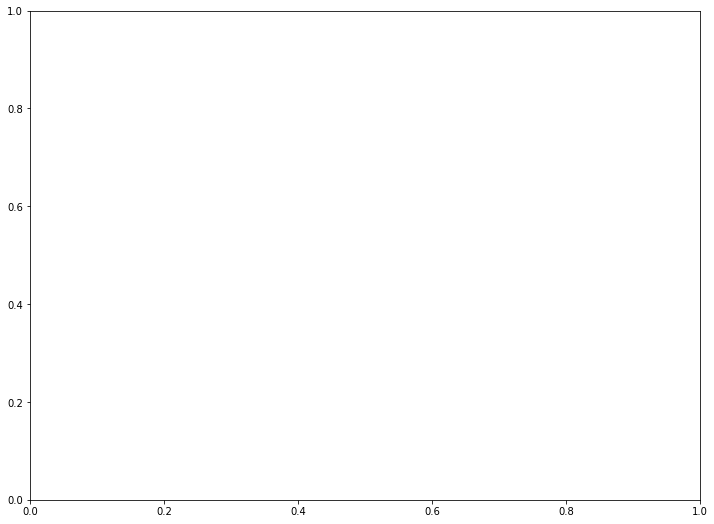

In [168]:
cormat = df1.corr()

f, ax = plt.subplots(figsize=(12, 9))

colormap = plt.cm.viridis
sns.heatmap(cormat, linewidths=0.1, cmap = colormap, 
            linecolor = 'White', vmax=0.8, annot=True)

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer

In [155]:

X = df1.drop('shot_type', axis = 1).values
y = df1['shot_type'].values

In [159]:
print(y)

[list(['backhand slice', 'forehand groundstroke', 'forehand groundstroke', 'forehand groundstroke', 'backhand groundstroke'])
 list(['backhand slice'])
 list(['backhand slice', 'backhand slice', 'forehand groundstroke', 'forehand groundstroke'])
 ...
 list(['backhand slice', 'backhand groundstroke', 'backhand slice', 'forehand groundstroke'])
 list(['winner'])
 list(['backhand groundstroke', 'forehand volley', 'winner'])]


In [156]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
#Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train)*100, 2)
print("Random Forest Classifier is %2.2f" %acc_random_forest)